# <span style="color:Orange"> **Import Packages and Settings** </span>

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <span style="color:Orange"> **Import Data - Combine Train and Test for Cleaning** </span>

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y = train['SalePrice']
y_log = np.log1p(y) # official score is using log of sale_price

#train.drop('SalePrice',axis =1,inplace=True)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import preprocess
import train_and_eval
import utility
import stacking

In [6]:
train1_linear = preprocess.impute_and_add(train,True,True,True,True,True)
train1_tree = preprocess.impute_and_add(train,True,True,True,True,False)
train2_linear = preprocess.impute_and_add(train,True,True,True,False,True)
train2_tree = preprocess.impute_and_add(train,True,True,True,False,False)
train3_linear = preprocess.impute_and_add(train,True,False,True,True,True)
train3_tree = preprocess.impute_and_add(train,True,False,True,True,False)
train4_linear = preprocess.impute_and_add(train,True,False,True,False,True)
train4_tree = preprocess.impute_and_add(train,True,False,True,False,False)

y_no = train2_linear['SalePrice'] 
y_no_log = np.log1p(y_no)                  # use for 2,4
y_remore = train1_linear['SalePrice']
y_remore_log = np.log1p(y_remore)          # use for 1,3
print(y_no.shape)
print(y_remore.shape)
train1_linear.drop('SalePrice',axis =1,inplace=True)
train1_tree.drop('SalePrice',axis =1,inplace=True)
train2_linear.drop('SalePrice',axis =1,inplace=True)
train2_tree.drop('SalePrice',axis =1,inplace=True)
train3_linear.drop('SalePrice',axis =1,inplace=True)
train3_tree.drop('SalePrice',axis =1,inplace=True)
train4_linear.drop('SalePrice',axis =1,inplace=True)
train4_tree.drop('SalePrice',axis =1,inplace=True)

(1456,)
(1441,)


In [7]:
test_cat_linear = preprocess.impute_and_add(test,True,True,False,False,True)
test_cat_tree = preprocess.impute_and_add(test,True,True,False,False,False)
test_linear = preprocess.impute_and_add(test,True,False,False,False,True)
test_tree = preprocess.impute_and_add(test,True,False,False,False,False)

In [8]:
total1_linear = pd.concat([train1_linear,test_cat_linear])
total2_linear = pd.concat([train2_linear,test_cat_linear])
total3_linear = pd.concat([train3_linear,test_linear])
total4_linear = pd.concat([train4_linear,test_linear])
total1_tree = pd.concat([train1_tree,test_cat_tree])
total2_tree = pd.concat([train2_tree,test_cat_tree])
total3_tree = pd.concat([train3_tree,test_tree])
total4_tree = pd.concat([train4_tree,test_tree])

### Could try more variable interations. But this doesn't work very well for me.

float_int = ['OverallQual','GrLivArea','TotalSF']

string_int = ['YrSold-Month','OverallQual','Neighborhood']

importantCols = float_int

for count1,col1 in enumerate(importantCols):
    
    for count2,col2 in enumerate(importantCols):
        
        if count1>= count2:
            
            total3_linear[str(str(col1)+'_'+str(col2))] = (total3_linear[col1]/100)*(total3_linear[col2]/100)

importantCols = string_int

for count1,col1 in enumerate(importantCols):
    
    for count2,col2 in enumerate(importantCols):
        
        if count1> count2:
            
            total3_linear[col1+'_']=total3_linear[col1].astype(str)
            
            total3_linear[col2+'_']=total3_linear[col2].astype(str)
            
            total3_linear[str(str(col1)+'_'+str(col2))] = total3_linear[[str(col1+'_'),str(col2+'_')]].astype(str).apply(lambda x: '_'.join(x), axis=1)
            
            total3_linear.drop(col1+'_',axis=1,inplace=True)
            
            total3_linear.drop(col2+'_',axis=1,inplace=True)

In [10]:
print(total1_linear.shape)
print(total1_tree.shape)
print(total2_linear.shape)
print(total2_tree.shape)
print(total3_linear.shape)
print(total3_tree.shape)
print(total4_linear.shape)
print(total4_tree.shape)
print(total1_linear.isnull().sum().sum())
print(total1_tree.isnull().sum().sum())
print(total2_linear.isnull().sum().sum())
print(total2_tree.isnull().sum().sum())
print(total3_linear.isnull().sum().sum())
print(total3_tree.isnull().sum().sum())
print(total4_linear.isnull().sum().sum())
print(total4_tree.isnull().sum().sum())

(2900, 114)
(2900, 114)
(2915, 114)
(2915, 114)
(2900, 123)
(2900, 114)
(2915, 114)
(2915, 114)
0
0
0
0
0
0
0
0


In [10]:
# impute missing values and add features
# MSSubClass,OverallCond,YrSold,MoSold are now categorical variables

In [11]:
# note that the index of housing is *not* from 0 to 2918. But we won't use index. So we will not bother to reset it.

In [9]:
cat_col = train1_linear.select_dtypes(include = ["object"]).columns

In [13]:
# cat_col is a list of names of categorical variables

## <span style="color:Orange"> **One hot encode** </span>

In [10]:
total1_linear_Encoded = pd.get_dummies(total1_linear, drop_first=True, dummy_na=False)
total1_tree_Encoded = pd.get_dummies(total1_tree, drop_first=True, dummy_na=False)
total2_linear_Encoded = pd.get_dummies(total2_linear, drop_first=True, dummy_na=False)
total2_tree_Encoded = pd.get_dummies(total2_tree, drop_first=True, dummy_na=False)
total3_linear_Encoded = pd.get_dummies(total3_linear, drop_first=True, dummy_na=False)
total3_tree_Encoded = pd.get_dummies(total3_tree, drop_first=True, dummy_na=False)
total4_linear_Encoded = pd.get_dummies(total4_linear, drop_first=True, dummy_na=False)
total4_tree_Encoded = pd.get_dummies(total4_tree, drop_first=True, dummy_na=False)

# Train a bunch of Random Forests

In [15]:
n_estimators = [10000]
max_features = [5,10,15,20]
max_depth = [3,5,7,9]

In [12]:
for t in n_estimators:
    for f in max_features:
        for d in max_depth:
            temp=train_and_eval.train_rf(total1_tree_Encoded,y_remore_log,5, t,f,d)
            temp=train_and_eval.train_rf(total2_tree_Encoded,y_no_log,6, t,f,d)
            temp=train_and_eval.train_rf(total3_tree_Encoded,y_remore_log,7, t,f,d)
            temp=train_and_eval.train_rf(total4_tree_Encoded,y_no_log,8, t,f,d)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.21828071843453475
Oob score:  0.6668698506257528
Rmse using oob prediction:  0.22314651162359303


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.22703061694072765
Oob score:  0.6570532195811325
Rmse using oob prediction:  0.23186973777409553


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.21324377102972836
Oob score:  0.6811912341974723
Rmse using oob prediction:  0.21829724726907618


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.2222018599844588
Oob score:  0.6702609667734112
Rmse using oob prediction:  0.2273609556236956


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1664514212881345
Oob score:  0.7864270248995825
Rmse using oob prediction:  0.178671910402629


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.17591588565630462
Oob score:  0.7726010821131616
Rmse using oob prediction:  0.18880996106636758


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1620361701137968
Oob score:  0.7961370191970872
Rmse using oob prediction:  0.17456304834539646


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.17181090347669892
Oob score:  0.7817602482773942
Rmse using oob prediction:  0.18496844063779228


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13045530272524983
Oob score:  0.8406646891171745
Rmse using oob prediction:  0.15432601724042447


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1391932681435079
Oob score:  0.8268440994689334
Rmse using oob prediction:  0.1647590782065526


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.12693127874694293
Oob score:  0.8467638871384497
Rmse using oob prediction:  0.15134347292202277


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13575739670258122
Oob score:  0.8326958365862213
Rmse using oob prediction:  0.16195116637641965


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.10262198455072255
Oob score:  0.8682173823954182
Rmse using oob prediction:  0.14034992895350729


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.11052708940053534
Oob score:  0.8533162941978619
Rmse using oob prediction:  0.1516427468213592


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09925165931760056
Oob score:  0.8731694756552084
Rmse using oob prediction:  0.13768766224028028


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1073685365970275
Oob score:  0.8578559042568827
Rmse using oob prediction:  0.14927776300938728


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.18560223077906152
Oob score:  0.753921698178328
Rmse using oob prediction:  0.191787276883747


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.19440061963691685
Oob score:  0.7433312119961717
Rmse using oob prediction:  0.20059367536002637


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.18142543920677953
Oob score:  0.7643402853167269
Rmse using oob prediction:  0.18768337566399845


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.19073478576996414
Oob score:  0.7523560450769367
Rmse using oob prediction:  0.19703554133970988


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13713605335663098
Oob score:  0.8436122597048374
Rmse using oob prediction:  0.1528919023838051


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.14676719389555948
Oob score:  0.8294869499987353
Rmse using oob prediction:  0.16349689798111589


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13332072013970775
Oob score:  0.8513475532884547
Rmse using oob prediction:  0.14906276169095206


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.14313390955181307
Oob score:  0.8369344988006336
Rmse using oob prediction:  0.1598864834243958


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.10419184593435629
Oob score:  0.8797901356271401
Rmse using oob prediction:  0.13404579224757732


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.11300729346509679
Oob score:  0.864495690119149
Rmse using oob prediction:  0.14574956262892313


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.10111543394804495
Oob score:  0.8850571123362826
Rmse using oob prediction:  0.13107630312389346


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.11020310171593979
Oob score:  0.8687568901023526
Rmse using oob prediction:  0.14343956589528878


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07988795312407229
Oob score:  0.8955542664903792
Rmse using oob prediction:  0.12494776278202797


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08703628252852781
Oob score:  0.879356206531011
Rmse using oob prediction:  0.1375254890753686


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07743803266625315
Oob score:  0.8993537854708324
Rmse using oob prediction:  0.1226540391881183


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08471915317037342
Oob score:  0.8826790269412335
Rmse using oob prediction:  0.13561837428930756


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1714930350219404
Oob score:  0.7872719376065983
Rmse using oob prediction:  0.17831813959373832


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.181186462008614
Oob score:  0.7741534351911143
Rmse using oob prediction:  0.18816439586847417


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.16792411409691987
Oob score:  0.7956225088738538
Rmse using oob prediction:  0.17478319104349066


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.17747196459131712
Oob score:  0.7830410522960385
Rmse using oob prediction:  0.18442487115641445


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.12534684938058885
Oob score:  0.8639932520058865
Rmse using oob prediction:  0.1425815594911622


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13539539712324825
Oob score:  0.8487630011084253
Rmse using oob prediction:  0.1539783747121843


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.12247411141472703
Oob score:  0.8694295930070502
Rmse using oob prediction:  0.13970292886928168


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.13266577270520982
Oob score:  0.854064920348412
Rmse using oob prediction:  0.15125528407256075


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09438595992887756
Oob score:  0.8923874040310331
Rmse using oob prediction:  0.12682786636263382


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.10302517501243147
Oob score:  0.876450823915904
Rmse using oob prediction:  0.1391716039854524


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09223211095936659
Oob score:  0.8959556221112338
Rmse using oob prediction:  0.12470746212711178


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1008056455491251
Oob score:  0.8798133471770785
Rmse using oob prediction:  0.13726468759867477


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07187714241845901
Oob score:  0.9038496916263654
Rmse using oob prediction:  0.1198832403289598


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07849975262800214
Oob score:  0.8873901471166115
Rmse using oob prediction:  0.13286754218111077


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07003299721485697
Oob score:  0.906674365302857
Rmse using oob prediction:  0.11810916750038045


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07666160813572845
Oob score:  0.8901368304848843
Rmse using oob prediction:  0.13123714316879848


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.16366442361571487
Oob score:  0.8044904547111891
Rmse using oob prediction:  0.17094921666909782


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.17345523938882104
Oob score:  0.7912317885844119
Rmse using oob prediction:  0.18091013223727148


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.16053844866556086
Oob score:  0.8118005912107444
Rmse using oob prediction:  0.16772286012083515


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.17031114293203653
Oob score:  0.7987700883487319
Rmse using oob prediction:  0.17761390964890003


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.11932876203687966
Oob score:  0.8732977030518051
Rmse using oob prediction:  0.13761804258339477


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.1295589125506059
Oob score:  0.8576782431857781
Rmse using oob prediction:  0.14937102247763362


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.11714570001159498
Oob score:  0.8774569429317407
Rmse using oob prediction:  0.135340409901908


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.12729002342635382
Oob score:  0.8623434440335687
Rmse using oob prediction:  0.14690248950830248


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08956704686826679
Oob score:  0.8980376569638981
Rmse using oob prediction:  0.12345339443281832


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09795625988413673
Oob score:  0.8813822421947052
Rmse using oob prediction:  0.13636583027129343


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08798593146981794
Oob score:  0.9007402753237215
Rmse using oob prediction:  0.1218062759252932


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09613842616049803
Oob score:  0.884412753356276
Rmse using oob prediction:  0.13461258530593057


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06795887015344222
Oob score:  0.9070885749529998
Rmse using oob prediction:  0.11784677249598599


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07428333911441944
Oob score:  0.8907051401712566
Rmse using oob prediction:  0.13089726565084714


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06659288319785463
Oob score:  0.9094789343014607
Rmse using oob prediction:  0.11632095561129122


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07268122628816225
Oob score:  0.8929102518695938
Rmse using oob prediction:  0.12957005836634275


Using total3_tree_encoded provides best in sample results.
Let's only train with total3_tree_encoded with better zoomed in parameters.

In [16]:
n_estimators = [10000]
max_features = [16,18,20,22,24]
max_depth = [7,8,9,10,11]

In [14]:
for t in n_estimators:
    for f in max_features:
        for d in max_depth:
            temp=train_and_eval.train_rf(total3_tree_Encoded,y_remore_log,9, t,f,d)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.09114615712714999
Oob score:  0.8971473151763015
Rmse using oob prediction:  0.1239912244138034


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07922574178181722
Oob score:  0.9033767386380466
Rmse using oob prediction:  0.12017772499804197


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06922253391324847
Oob score:  0.9073013865790197
Rmse using oob prediction:  0.11771173237279936


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06107697955066008
Oob score:  0.9096743370174226
Rmse using oob prediction:  0.11619534004370989


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.054885213882325846
Oob score:  0.9109899569260738
Rmse using oob prediction:  0.11534602638311817


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08945825959722822
Oob score:  0.8990122304178799
Rmse using oob prediction:  0.12286198354499434


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07760466811867009
Oob score:  0.9049103250347135
Rmse using oob prediction:  0.11922019112453629


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06771986618671048
Oob score:  0.9085646532952154
Rmse using oob prediction:  0.1169069123052623


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.05983150390556039
Oob score:  0.9106662795952214
Rmse using oob prediction:  0.1155555589984799


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.053750320805665414
Oob score:  0.9121677605728341
Rmse using oob prediction:  0.11458034095621446


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08798593146981792
Oob score:  0.9007402753237215
Rmse using oob prediction:  0.1218062759252932


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.0763045810075508
Oob score:  0.9061995601752723
Rmse using oob prediction:  0.11840923346014448


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06659288319785457
Oob score:  0.9094789343014607
Rmse using oob prediction:  0.11632095561129122


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.058818092469331694
Oob score:  0.9114825279785059
Rmse using oob prediction:  0.1150264279799257


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.052953646255159685
Oob score:  0.9127628774365278
Rmse using oob prediction:  0.11419150542417697


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.0868895421799298
Oob score:  0.90153705692033
Rmse using oob prediction:  0.12131640678697683


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.0752584881687112
Oob score:  0.9068986724217292
Rmse using oob prediction:  0.11796714508037362


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.0656056857493709
Oob score:  0.9101868536596929
Rmse using oob prediction:  0.11586521923360188


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.05795878234990087
Oob score:  0.9120576826723629
Rmse using oob prediction:  0.1146521187801143


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.05224795730572259
Oob score:  0.9132052950507705
Rmse using oob prediction:  0.11390157983100861


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.08587598274859312
Oob score:  0.902608147570881
Rmse using oob prediction:  0.12065475592654451


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.07437188488571948
Oob score:  0.9077357576768792
Rmse using oob prediction:  0.11743561922108126


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.06483510862937326
Oob score:  0.9105918620439353
Rmse using oob prediction:  0.11560367952657394


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.05726901693348725
Oob score:  0.9126836318157552
Rmse using oob prediction:  0.11424335905224459


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.051720591213034926
Oob score:  0.9136773800077355
Rmse using oob prediction:  0.11359139651560737


Using 24 features and depth 11, get LB score: 0.13895.
Train more complicated rf.

In [17]:
n_estimators = [10000]
max_features = [24,25,26]
max_depth = [11,12,13]

In [16]:
for t in n_estimators:
    for f in max_features:
        for d in max_depth:
            temp=train_and_eval.train_rf(total3_tree_Encoded,y_remore_log,10, t,f,d)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.051720591213034975
Oob score:  0.9136773800077355
Rmse using oob prediction:  0.11359139651560737


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.04777500694445048
Oob score:  0.914389498850383
Rmse using oob prediction:  0.11312188984224239


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.045214220425128376
Oob score:  0.9146538866543088
Rmse using oob prediction:  0.11294707965926991


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.051449386545140516
Oob score:  0.9136078315085726
Rmse using oob prediction:  0.11363714652032465


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.04764881496576305
Oob score:  0.9143019214519947
Rmse using oob prediction:  0.11317973548233504


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.04512054144218843
Oob score:  0.9145719717399162
Rmse using oob prediction:  0.11300126977432949


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.05122490105572809
Oob score:  0.9140258826883633
Rmse using oob prediction:  0.11336186836746784


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.04741467503119711
Oob score:  0.9146022762286886
Rmse using oob prediction:  0.1129812251266345


D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Rmse:  0.044920196066281684
Oob score:  0.9149051663053673
Rmse using oob prediction:  0.11278068529858672


Using 26 features and max_depth 13 gives LB score: 0.13812, which is only a small improvement. So this approach may not work very well.

# Train Elasticnet

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Chosen alpha:  0.0001275685558464133
Chosen l1_ratio:  1.0
1 means lasso, 0 means ridge
Train RMSE:  0.07894657306900393


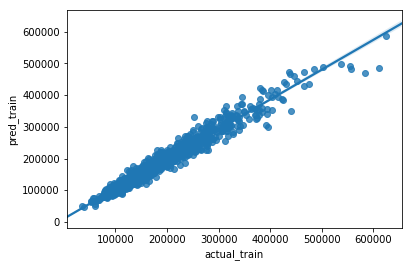

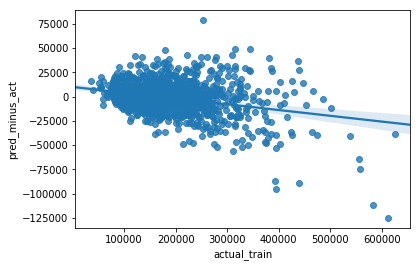

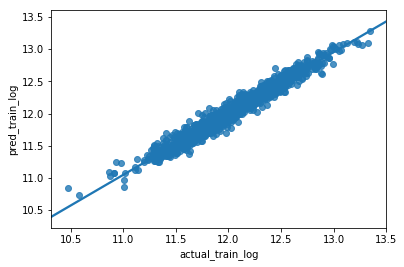

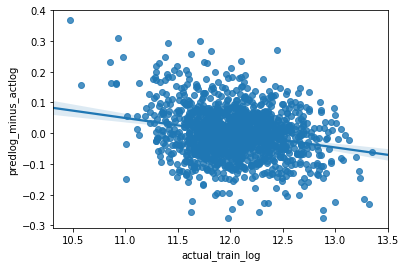

In [18]:
linear1 = train_and_eval.train_elastic(total1_linear_Encoded, y_remore_log,1, ratio = [0.01,0.25,0.5,0.75,1],n_alphas = 1000)

Using l1_ratio 1, alpha 0.0001275685558464133, we get LB score: 0.12195

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Chosen alpha:  0.0001802941184342467
Chosen l1_ratio:  1.0
1 means lasso, 0 means ridge
Train RMSE:  0.09374711374389322


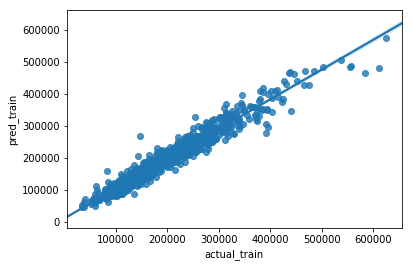

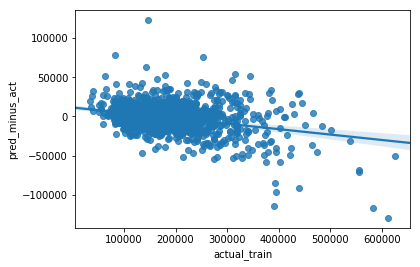

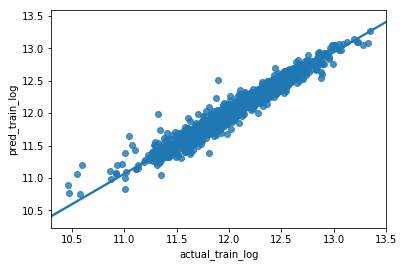

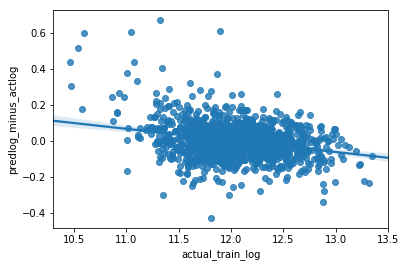

In [19]:
linear2 = train_and_eval.train_elastic(total2_linear_Encoded, y_no_log,2, ratio = [0.01,0.25,0.5,0.75,1],n_alphas = 1000)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Chosen alpha:  0.0001240885263685536
Chosen l1_ratio:  1.0
1 means lasso, 0 means ridge
Train RMSE:  0.07958422802275888


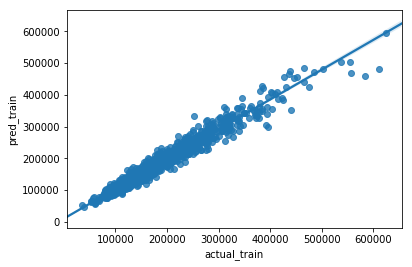

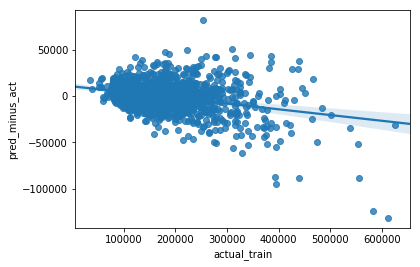

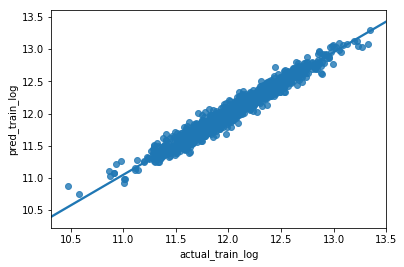

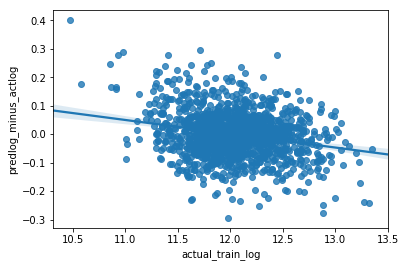

In [20]:
linear3 = train_and_eval.train_elastic(total3_linear_Encoded, y_remore_log,3, ratio = [.1, .5, .7, .9, .95, .99, 1],n_alphas = 1000)

Using l1_ratio:1 and alpha:0.0001240885263685536, we get LB score: 0.12085.
We see an overfitting problem for previous linear model!

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Chosen alpha:  0.00017781793127004592
Chosen l1_ratio:  1.0
1 means lasso, 0 means ridge
Train RMSE:  0.09447968225205089


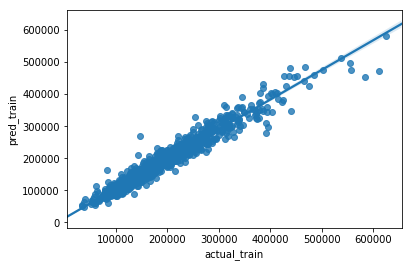

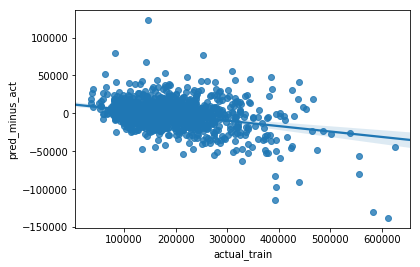

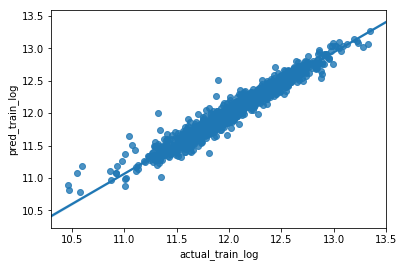

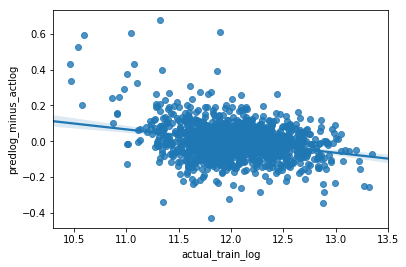

In [21]:
linear4 = train_and_eval.train_elastic(total4_linear_Encoded, y_no_log,4, ratio = [0.01,0.25,0.5,0.75,1],n_alphas = 1000)

# Train Boosting Trees

In [34]:
# First train a base one.
bst1 = train_and_eval.train_xgb(total1_tree_Encoded,y_remore_log,1,[0.03,0.05,0.1,0.3,0.5],[6,7,8,9,10],[0,0.1,0.3],[0.5,0.75,1])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[0]	train-rmse:11.1903+0.00309346	test-rmse:11.1902+0.0287469
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8552+0.0030042	test-rmse:10.8552+0.0288521
[2]	train-rmse:10.5302+0.00291756	test-rmse:10.5302+0.0289558
[3]	train-rmse:10.215+0.00283394	test-rmse:10.215+0.0290569
[4]	train-rmse:9.90923+0.00275237	test-rmse:9.90922+0.029156
[5]	train-rmse:9.61264+0.00267389	test-rmse:9.61264+0.02925
[6]	train-rmse:9.32494+0.00259506	test-rmse:9.3253+0.0291512
[7]	train-rmse:9.04587+0.00251765	test-rmse:9.04603+0.0286697
[8]	train-rmse:8.77517+0.00244315	test-rmse:8.7755+0.028439
[9]	train-rmse:8.51258+0.00237035	test-rmse:8.51275+0.0280262
[10]	train-rmse:8.25786+0.00230014	test-rmse:8.25802+0.0277346
[11]	train-rmse:8.01077+0.00223129	test-rmse:8.01101+0.0275827
[12]	train-rmse:7.77109+0.00216535	test-rmse:7.77137+0.0274074
[13]	train-rmse:7.53859+0.00210063	test-rmse:7.53871+0.027

[126]	train-rmse:0.264012+0.000148894	test-rmse:0.27645+0.009423
[127]	train-rmse:0.256937+0.000151374	test-rmse:0.269883+0.00937057
[128]	train-rmse:0.25008+0.000155505	test-rmse:0.263594+0.00935762
[129]	train-rmse:0.243428+0.000160242	test-rmse:0.257417+0.00929283
[130]	train-rmse:0.236996+0.000160857	test-rmse:0.251372+0.00922451
[131]	train-rmse:0.230754+0.000168208	test-rmse:0.245568+0.00922963
[132]	train-rmse:0.224715+0.000170085	test-rmse:0.239955+0.00912687
[133]	train-rmse:0.21887+0.000168552	test-rmse:0.234612+0.00911944
[134]	train-rmse:0.213199+0.00016559	test-rmse:0.229355+0.00906719
[135]	train-rmse:0.207721+0.00016533	test-rmse:0.224441+0.00900648
[136]	train-rmse:0.202402+0.000168492	test-rmse:0.219623+0.00898819
[137]	train-rmse:0.197258+0.00017039	test-rmse:0.214948+0.00891848
[138]	train-rmse:0.192271+0.000178135	test-rmse:0.21051+0.00895049
[139]	train-rmse:0.187455+0.000178794	test-rmse:0.206136+0.00885443
[140]	train-rmse:0.18279+0.000181869	test-rmse:0.201978+0

[247]	train-rmse:0.0504865+0.000817778	test-rmse:0.107709+0.0081719
[248]	train-rmse:0.0502753+0.000784262	test-rmse:0.107664+0.00816275
[249]	train-rmse:0.0500806+0.000786933	test-rmse:0.107605+0.00816028
[250]	train-rmse:0.0499053+0.000795594	test-rmse:0.107562+0.0081607
[251]	train-rmse:0.0497089+0.000782443	test-rmse:0.107496+0.00816316
[252]	train-rmse:0.0495196+0.000784113	test-rmse:0.107448+0.00814311
[253]	train-rmse:0.0493508+0.000774557	test-rmse:0.107427+0.00814057
[254]	train-rmse:0.049181+0.000772803	test-rmse:0.107377+0.0081527
[255]	train-rmse:0.048996+0.000767349	test-rmse:0.107319+0.00814806
[256]	train-rmse:0.0488293+0.000778409	test-rmse:0.107262+0.00815955
[257]	train-rmse:0.0486645+0.00078687	test-rmse:0.10721+0.0081376
[258]	train-rmse:0.0485207+0.000792673	test-rmse:0.107183+0.00814541
[259]	train-rmse:0.0483438+0.0008081	test-rmse:0.107147+0.00815693
[260]	train-rmse:0.0481879+0.000809594	test-rmse:0.107091+0.0081666
[261]	train-rmse:0.0480021+0.000815491	test-r

[35]	train-rmse:1.83652+0.000535422	test-rmse:1.83737+0.0159361
[36]	train-rmse:1.74564+0.000509877	test-rmse:1.74657+0.0154019
[37]	train-rmse:1.65931+0.000485515	test-rmse:1.66038+0.0151117
[38]	train-rmse:1.57731+0.000460538	test-rmse:1.57846+0.0149847
[39]	train-rmse:1.49942+0.000438616	test-rmse:1.50042+0.0146286
[40]	train-rmse:1.42541+0.000413755	test-rmse:1.42629+0.0142284
[41]	train-rmse:1.35512+0.000394826	test-rmse:1.35604+0.0138368
[42]	train-rmse:1.28835+0.000375601	test-rmse:1.28936+0.0136057
[43]	train-rmse:1.22492+0.000357158	test-rmse:1.22591+0.0132747
[44]	train-rmse:1.16467+0.000337236	test-rmse:1.16589+0.0129863
[45]	train-rmse:1.10744+0.000321236	test-rmse:1.10883+0.0125991
[46]	train-rmse:1.05309+0.00031035	test-rmse:1.05473+0.0122527
[47]	train-rmse:1.00146+0.000291485	test-rmse:1.00331+0.0119377
[48]	train-rmse:0.952429+0.000280488	test-rmse:0.954443+0.0117534
[49]	train-rmse:0.905863+0.000260388	test-rmse:0.908077+0.0115686
[50]	train-rmse:0.86164+0.000263529	t

[158]	train-rmse:0.0476716+0.000988714	test-rmse:0.107117+0.00859873
[159]	train-rmse:0.0474114+0.00100602	test-rmse:0.107068+0.00858347
[160]	train-rmse:0.0471542+0.00100273	test-rmse:0.106968+0.00860181
[161]	train-rmse:0.0469223+0.00102335	test-rmse:0.106947+0.00857714
[162]	train-rmse:0.046696+0.000997696	test-rmse:0.106873+0.00857739
[163]	train-rmse:0.0464713+0.00100252	test-rmse:0.106825+0.00857008
[164]	train-rmse:0.046256+0.000991481	test-rmse:0.106795+0.0085761
[165]	train-rmse:0.0460444+0.000973591	test-rmse:0.106767+0.00859376
[166]	train-rmse:0.0458221+0.000940586	test-rmse:0.106709+0.00857191
[167]	train-rmse:0.0455996+0.000957556	test-rmse:0.106698+0.00857672
[168]	train-rmse:0.0453648+0.000904705	test-rmse:0.106654+0.00857336
[169]	train-rmse:0.0451035+0.000914259	test-rmse:0.106594+0.00861473
[170]	train-rmse:0.044886+0.000941042	test-rmse:0.106609+0.00862199
[171]	train-rmse:0.044627+0.000888092	test-rmse:0.106572+0.00862204
[172]	train-rmse:0.0444089+0.000866487	test

[79]	train-rmse:0.0473058+0.000986683	test-rmse:0.105919+0.00924141
[80]	train-rmse:0.0468228+0.000951355	test-rmse:0.105932+0.00922705
[81]	train-rmse:0.046338+0.00102377	test-rmse:0.105806+0.00920462
[82]	train-rmse:0.0457671+0.000891893	test-rmse:0.105617+0.00925871
[83]	train-rmse:0.0452855+0.000862207	test-rmse:0.105504+0.00925065
[84]	train-rmse:0.0447881+0.000836803	test-rmse:0.10547+0.00929115
[85]	train-rmse:0.0442591+0.000865331	test-rmse:0.105394+0.00925382
[86]	train-rmse:0.0437802+0.000980154	test-rmse:0.105302+0.00920818
[87]	train-rmse:0.043329+0.000945559	test-rmse:0.105282+0.0092043
[88]	train-rmse:0.0428905+0.000842069	test-rmse:0.105259+0.00913708
[89]	train-rmse:0.0424101+0.000793506	test-rmse:0.105113+0.00916411
[90]	train-rmse:0.0420271+0.000805476	test-rmse:0.10504+0.009121
[91]	train-rmse:0.0416061+0.000835377	test-rmse:0.104969+0.00909371
[92]	train-rmse:0.041203+0.000828541	test-rmse:0.104924+0.00905645
[93]	train-rmse:0.0408292+0.00088294	test-rmse:0.104887+0

[45]	train-rmse:0.117541+0.000440749	test-rmse:0.148336+0.00808401
[46]	train-rmse:0.109512+0.00053597	test-rmse:0.142459+0.00822208
[47]	train-rmse:0.102432+0.000595315	test-rmse:0.137261+0.00814706
[48]	train-rmse:0.096141+0.000688393	test-rmse:0.132833+0.00820161
[49]	train-rmse:0.0907326+0.000719488	test-rmse:0.129169+0.00811282
[0]	train-rmse:10.3841+0.00287858	test-rmse:10.3841+0.0290025
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.3477+0.00259552	test-rmse:9.34741+0.0284686
[2]	train-rmse:8.41482+0.0023403	test-rmse:8.41501+0.0268015
[3]	train-rmse:7.57519+0.00210949	test-rmse:7.57477+0.0259845
[4]	train-rmse:6.81947+0.00190415	test-rmse:6.81926+0.0259978
[5]	train-rmse:6.13928+0.0017176	test-rmse:6.1391+0.0252593
[6]	train-rmse:5.5271+0.0015502	test-rmse:5.52704+0.0240311
[7]	train-rmse:4.97613+0.00140038	test-rmse:4.97601+0.0234872
[8]	train-rmse:4.48026+0.00126354

[16]	train-rmse:1.93575+0.000545382	test-rmse:1.93627+0.0140502
[17]	train-rmse:1.74365+0.000488059	test-rmse:1.74425+0.0135456
[18]	train-rmse:1.57077+0.000435983	test-rmse:1.57119+0.0128824
[19]	train-rmse:1.41523+0.000387899	test-rmse:1.41583+0.01258
[20]	train-rmse:1.27528+0.000362205	test-rmse:1.27576+0.0120101
[21]	train-rmse:1.14935+0.000322135	test-rmse:1.15026+0.011393
[22]	train-rmse:1.03607+0.000298742	test-rmse:1.03722+0.0109883
[23]	train-rmse:0.934156+0.000283488	test-rmse:0.935738+0.0107284
[24]	train-rmse:0.842469+0.000267396	test-rmse:0.844284+0.0105774
[25]	train-rmse:0.75998+0.000250372	test-rmse:0.762056+0.0104625
[26]	train-rmse:0.685798+0.00023095	test-rmse:0.688608+0.0104188
[27]	train-rmse:0.619091+0.00022489	test-rmse:0.622487+0.0101565
[28]	train-rmse:0.559086+0.000222478	test-rmse:0.563167+0.00999488
[29]	train-rmse:0.505145+0.000208339	test-rmse:0.510019+0.00992113
[30]	train-rmse:0.456645+0.000208496	test-rmse:0.462467+0.0100136
[31]	train-rmse:0.413047+0.0

[39]	train-rmse:0.196752+0.00021987	test-rmse:0.213495+0.00951879
[40]	train-rmse:0.180429+0.000265551	test-rmse:0.198773+0.00937651
[41]	train-rmse:0.165813+0.000327488	test-rmse:0.185855+0.00920826
[42]	train-rmse:0.152806+0.000337386	test-rmse:0.174706+0.00913849
[43]	train-rmse:0.141289+0.000373422	test-rmse:0.165132+0.00894672
[44]	train-rmse:0.130986+0.000379255	test-rmse:0.156847+0.00894849
[45]	train-rmse:0.121859+0.00041887	test-rmse:0.149645+0.00893282
[46]	train-rmse:0.113794+0.00049275	test-rmse:0.143471+0.00905313
[47]	train-rmse:0.106668+0.000516604	test-rmse:0.138112+0.00903426
[48]	train-rmse:0.100317+0.000477039	test-rmse:0.133635+0.00902353
[49]	train-rmse:0.0948052+0.000521962	test-rmse:0.129803+0.00891166
[0]	train-rmse:10.3837+0.00287138	test-rmse:10.3838+0.0278746
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34685+0.00258781	test-rmse:9.34699+0.0264762

[10]	train-rmse:3.63429+0.00102922	test-rmse:3.63469+0.0224397
[11]	train-rmse:3.2728+0.000919404	test-rmse:3.27346+0.0212802
[12]	train-rmse:2.94745+0.000834473	test-rmse:2.94774+0.0200343
[13]	train-rmse:2.65463+0.000741832	test-rmse:2.6549+0.0186162
[14]	train-rmse:2.39107+0.000679007	test-rmse:2.39152+0.0175753
[15]	train-rmse:2.15388+0.000613102	test-rmse:2.15409+0.0166738
[16]	train-rmse:1.94042+0.000557674	test-rmse:1.94102+0.0159826
[17]	train-rmse:1.74832+0.000501652	test-rmse:1.74888+0.0155135
[18]	train-rmse:1.57545+0.000453751	test-rmse:1.57593+0.0147945
[19]	train-rmse:1.41988+0.000421719	test-rmse:1.42001+0.0139025
[20]	train-rmse:1.2799+0.000380168	test-rmse:1.28006+0.0134188
[21]	train-rmse:1.15395+0.000345682	test-rmse:1.15451+0.0129011
[22]	train-rmse:1.04064+0.000308884	test-rmse:1.04129+0.0121279
[23]	train-rmse:0.938698+0.000273339	test-rmse:0.939683+0.0114829
[24]	train-rmse:0.84703+0.000254727	test-rmse:0.848367+0.0113454
[25]	train-rmse:0.76457+0.000235505	test-

[33]	train-rmse:0.341182+0.000224814	test-rmse:0.350804+0.0100735
[34]	train-rmse:0.309512+0.000240706	test-rmse:0.320589+0.0098098
[35]	train-rmse:0.281073+0.000255143	test-rmse:0.293656+0.00962722
[36]	train-rmse:0.255534+0.000283746	test-rmse:0.269619+0.00953389
[37]	train-rmse:0.232608+0.000303083	test-rmse:0.248361+0.00942134
[38]	train-rmse:0.212023+0.000322564	test-rmse:0.229635+0.00940092
[39]	train-rmse:0.193557+0.000322198	test-rmse:0.213203+0.00914288
[40]	train-rmse:0.177035+0.000319832	test-rmse:0.198643+0.00874546
[41]	train-rmse:0.162279+0.000365135	test-rmse:0.185906+0.00852161
[42]	train-rmse:0.149064+0.000409278	test-rmse:0.174531+0.00825546
[43]	train-rmse:0.137275+0.000393385	test-rmse:0.165128+0.00811393
[44]	train-rmse:0.126745+0.000442898	test-rmse:0.156686+0.00799528
[45]	train-rmse:0.117294+0.000429272	test-rmse:0.14953+0.00782235
[46]	train-rmse:0.108897+0.000486911	test-rmse:0.143255+0.00786039
[47]	train-rmse:0.101449+0.000498635	test-rmse:0.138049+0.0078121

[3]	train-rmse:7.57519+0.00210949	test-rmse:7.57477+0.0259845
[4]	train-rmse:6.81947+0.00190415	test-rmse:6.81926+0.0259978
[5]	train-rmse:6.13928+0.0017176	test-rmse:6.1391+0.0252593
[6]	train-rmse:5.5271+0.0015502	test-rmse:5.52704+0.0240311
[7]	train-rmse:4.97613+0.00140038	test-rmse:4.97601+0.0234872
[8]	train-rmse:4.48026+0.00126354	test-rmse:4.48019+0.0225056
[9]	train-rmse:4.03395+0.00113848	test-rmse:4.03429+0.0214663
[10]	train-rmse:3.63226+0.00102472	test-rmse:3.63275+0.0205186
[11]	train-rmse:3.27072+0.000924334	test-rmse:3.27155+0.0192493
[12]	train-rmse:2.94531+0.000826076	test-rmse:2.94675+0.0186588
[13]	train-rmse:2.65245+0.000738952	test-rmse:2.65388+0.0174158
[14]	train-rmse:2.38888+0.000668733	test-rmse:2.38992+0.0164602
[15]	train-rmse:2.15168+0.000600909	test-rmse:2.15278+0.0160468
[16]	train-rmse:1.93822+0.000549471	test-rmse:1.93964+0.0150043
[17]	train-rmse:1.74613+0.000485897	test-rmse:1.74723+0.014187
[18]	train-rmse:1.57327+0.000430585	test-rmse:1.57416+0.0135

[26]	train-rmse:0.685794+0.000232968	test-rmse:0.688843+0.0102454
[27]	train-rmse:0.619078+0.000232673	test-rmse:0.622642+0.0100318
[28]	train-rmse:0.559079+0.000231675	test-rmse:0.563446+0.00991848
[29]	train-rmse:0.505112+0.000231779	test-rmse:0.510404+0.00948651
[30]	train-rmse:0.456569+0.000238352	test-rmse:0.462974+0.00965329
[31]	train-rmse:0.412939+0.000224385	test-rmse:0.420436+0.00949649
[32]	train-rmse:0.373695+0.000231615	test-rmse:0.382724+0.00934208
[33]	train-rmse:0.338423+0.000249042	test-rmse:0.348805+0.00906006
[34]	train-rmse:0.306737+0.000275044	test-rmse:0.318738+0.00924476
[35]	train-rmse:0.278268+0.00027856	test-rmse:0.291774+0.00886701
[36]	train-rmse:0.252686+0.000293198	test-rmse:0.267819+0.00874571
[37]	train-rmse:0.22975+0.000318743	test-rmse:0.246433+0.00849757
[38]	train-rmse:0.209134+0.000314969	test-rmse:0.227869+0.00824649
[39]	train-rmse:0.19064+0.000337838	test-rmse:0.211416+0.00796063
[40]	train-rmse:0.17408+0.000340672	test-rmse:0.196864+0.00795628
[

[48]	train-rmse:0.0967968+0.000365659	test-rmse:0.133671+0.00861482
[49]	train-rmse:0.0909262+0.00039392	test-rmse:0.1298+0.00871215
[0]	train-rmse:10.3837+0.00287138	test-rmse:10.3838+0.0278746
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34685+0.00258781	test-rmse:9.34699+0.0264762
[2]	train-rmse:8.41367+0.00233097	test-rmse:8.41348+0.0257909
[3]	train-rmse:7.57379+0.00210028	test-rmse:7.57333+0.0258556
[4]	train-rmse:6.81786+0.00189242	test-rmse:6.81774+0.024695
[5]	train-rmse:6.13753+0.00170598	test-rmse:6.13761+0.0240546
[6]	train-rmse:5.52524+0.00153621	test-rmse:5.52522+0.0233206
[7]	train-rmse:4.97416+0.00137912	test-rmse:4.97426+0.0223524
[8]	train-rmse:4.47814+0.00124543	test-rmse:4.47828+0.0210015
[9]	train-rmse:4.03173+0.00111999	test-rmse:4.03142+0.0197371
[10]	train-rmse:3.62996+0.00101017	test-rmse:3.62959+0.0186496
[11]	train-rmse:3.26835+0.000908985	test-rm

[19]	train-rmse:1.41988+0.000421719	test-rmse:1.42001+0.0139025
[20]	train-rmse:1.2799+0.000380168	test-rmse:1.28006+0.0134188
[21]	train-rmse:1.15395+0.000345682	test-rmse:1.15451+0.0129011
[22]	train-rmse:1.04064+0.000308884	test-rmse:1.04129+0.0121279
[23]	train-rmse:0.938698+0.000273339	test-rmse:0.939683+0.0114829
[24]	train-rmse:0.84703+0.000254727	test-rmse:0.848367+0.0113454
[25]	train-rmse:0.764569+0.000235109	test-rmse:0.766491+0.0110966
[26]	train-rmse:0.690401+0.000202155	test-rmse:0.692552+0.0110864
[27]	train-rmse:0.623711+0.00019586	test-rmse:0.626367+0.0107806
[28]	train-rmse:0.563716+0.000183992	test-rmse:0.566989+0.010611
[29]	train-rmse:0.509791+0.00015322	test-rmse:0.513983+0.0101655
[30]	train-rmse:0.461284+0.000161622	test-rmse:0.466216+0.01014
[31]	train-rmse:0.417686+0.000148052	test-rmse:0.423622+0.0100407
[32]	train-rmse:0.378493+0.000143188	test-rmse:0.385297+0.00993104
[33]	train-rmse:0.343247+0.000154611	test-rmse:0.35136+0.0099179
[34]	train-rmse:0.311555+

[42]	train-rmse:0.147496+0.000302096	test-rmse:0.175199+0.00901215
[43]	train-rmse:0.135459+0.000312417	test-rmse:0.165566+0.00890771
[44]	train-rmse:0.124655+0.000408253	test-rmse:0.157267+0.00886161
[45]	train-rmse:0.115018+0.000479931	test-rmse:0.150174+0.00856221
[46]	train-rmse:0.106273+0.000513111	test-rmse:0.143965+0.00845875
[47]	train-rmse:0.0985503+0.000464866	test-rmse:0.138699+0.00828525
[48]	train-rmse:0.0915316+0.000531871	test-rmse:0.134069+0.00810463
[49]	train-rmse:0.0853188+0.000557351	test-rmse:0.130374+0.00816
[0]	train-rmse:10.3844+0.00287844	test-rmse:10.3843+0.0290026
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34823+0.0026039	test-rmse:9.34822+0.0293401
[2]	train-rmse:8.41572+0.00234817	test-rmse:8.41585+0.0280985
[3]	train-rmse:7.57635+0.00211853	test-rmse:7.57654+0.0270762
[4]	train-rmse:6.82086+0.00191104	test-rmse:6.81993+0.0260201
[5]	train-rms

[13]	train-rmse:2.65245+0.000738952	test-rmse:2.65388+0.0174158
[14]	train-rmse:2.38888+0.000668733	test-rmse:2.38992+0.0164602
[15]	train-rmse:2.15168+0.000600909	test-rmse:2.15278+0.0160468
[16]	train-rmse:1.93822+0.000549471	test-rmse:1.93964+0.0150043
[17]	train-rmse:1.74613+0.000485897	test-rmse:1.74723+0.014187
[18]	train-rmse:1.57327+0.000430585	test-rmse:1.57416+0.0135322
[19]	train-rmse:1.41771+0.00036849	test-rmse:1.4185+0.0131997
[20]	train-rmse:1.27774+0.000332923	test-rmse:1.27878+0.0124232
[21]	train-rmse:1.15181+0.000304212	test-rmse:1.15273+0.0119073
[22]	train-rmse:1.03853+0.000276417	test-rmse:1.03982+0.0113734
[23]	train-rmse:0.936609+0.000242103	test-rmse:0.938101+0.0110366
[24]	train-rmse:0.844932+0.000200284	test-rmse:0.84681+0.0109367
[25]	train-rmse:0.762479+0.00017339	test-rmse:0.764833+0.0110469
[26]	train-rmse:0.688312+0.000166754	test-rmse:0.690914+0.0109098
[27]	train-rmse:0.621606+0.000161088	test-rmse:0.624956+0.0109955
[28]	train-rmse:0.561605+0.00015510

[36]	train-rmse:0.251919+0.000181481	test-rmse:0.267914+0.00847798
[37]	train-rmse:0.228718+0.000172868	test-rmse:0.246838+0.0080791
[38]	train-rmse:0.207843+0.000198805	test-rmse:0.228146+0.00787233
[39]	train-rmse:0.189085+0.000239013	test-rmse:0.21182+0.00776657
[40]	train-rmse:0.172201+0.000309467	test-rmse:0.197397+0.00760434
[41]	train-rmse:0.15701+0.000278366	test-rmse:0.184551+0.0076968
[42]	train-rmse:0.143348+0.000330902	test-rmse:0.173738+0.00763834
[43]	train-rmse:0.131061+0.000388121	test-rmse:0.164212+0.00747631
[44]	train-rmse:0.119998+0.000342066	test-rmse:0.15586+0.00734487
[45]	train-rmse:0.110081+0.000436074	test-rmse:0.14871+0.00747446
[46]	train-rmse:0.101128+0.000411857	test-rmse:0.14288+0.00753032
[47]	train-rmse:0.0931214+0.000456427	test-rmse:0.137522+0.00753576
[48]	train-rmse:0.0859072+0.000532822	test-rmse:0.133188+0.0074504
[49]	train-rmse:0.0795501+0.000584826	test-rmse:0.129417+0.0075394
[0]	train-rmse:10.3841+0.00287858	test-rmse:10.3841+0.0290025
Multip

[7]	train-rmse:4.97416+0.00137912	test-rmse:4.97426+0.0223524
[8]	train-rmse:4.47814+0.00124543	test-rmse:4.47828+0.0210015
[9]	train-rmse:4.03173+0.00111999	test-rmse:4.03142+0.0197371
[10]	train-rmse:3.62996+0.00101017	test-rmse:3.62959+0.0186496
[11]	train-rmse:3.26835+0.000908985	test-rmse:3.26845+0.0177101
[12]	train-rmse:2.9429+0.000817194	test-rmse:2.94304+0.0164471
[13]	train-rmse:2.65+0.000738285	test-rmse:2.65061+0.0155216
[14]	train-rmse:2.38642+0.000669234	test-rmse:2.38688+0.0154472
[15]	train-rmse:2.14922+0.000606329	test-rmse:2.14983+0.0150309
[16]	train-rmse:1.93575+0.000545382	test-rmse:1.93627+0.0140502
[17]	train-rmse:1.74365+0.000488059	test-rmse:1.74425+0.0135456
[18]	train-rmse:1.57077+0.000435983	test-rmse:1.57119+0.0128824
[19]	train-rmse:1.41523+0.000387899	test-rmse:1.41583+0.01258
[20]	train-rmse:1.27528+0.000362205	test-rmse:1.27576+0.0120101
[21]	train-rmse:1.14935+0.000322135	test-rmse:1.15026+0.011393
[22]	train-rmse:1.03607+0.000298742	test-rmse:1.03722+

[30]	train-rmse:0.461282+0.000156837	test-rmse:0.466186+0.0101645
[31]	train-rmse:0.417669+0.000143612	test-rmse:0.42357+0.0100937
[32]	train-rmse:0.378484+0.000135232	test-rmse:0.385426+0.0100071
[33]	train-rmse:0.343231+0.000139046	test-rmse:0.351436+0.0100491
[34]	train-rmse:0.311526+0.000135735	test-rmse:0.321414+0.00962703
[35]	train-rmse:0.283008+0.000147221	test-rmse:0.294513+0.00887285
[36]	train-rmse:0.257326+0.000152551	test-rmse:0.270866+0.00910073
[37]	train-rmse:0.234226+0.000177195	test-rmse:0.249574+0.00896675
[38]	train-rmse:0.213411+0.000206472	test-rmse:0.230857+0.00876043
[39]	train-rmse:0.194678+0.000234475	test-rmse:0.214213+0.00835232
[40]	train-rmse:0.177806+0.000252343	test-rmse:0.199624+0.00800121
[41]	train-rmse:0.162664+0.00033166	test-rmse:0.186711+0.00807744
[42]	train-rmse:0.148994+0.000319668	test-rmse:0.175412+0.00779821
[43]	train-rmse:0.136717+0.000326752	test-rmse:0.165443+0.00762688
[44]	train-rmse:0.125687+0.00035427	test-rmse:0.156997+0.00757212
[4

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34823+0.0026039	test-rmse:9.34822+0.0293401
[2]	train-rmse:8.41572+0.00234817	test-rmse:8.41585+0.0280985
[3]	train-rmse:7.57635+0.00211853	test-rmse:7.57654+0.0270762
[4]	train-rmse:6.82086+0.00191104	test-rmse:6.81993+0.0260201
[5]	train-rmse:6.14085+0.00172576	test-rmse:6.14034+0.0257461
[6]	train-rmse:5.52879+0.00155869	test-rmse:5.52859+0.025386
[7]	train-rmse:4.97791+0.00140665	test-rmse:4.97812+0.024374
[8]	train-rmse:4.48211+0.00126994	test-rmse:4.4818+0.023386
[9]	train-rmse:4.03589+0.00114887	test-rmse:4.0357+0.0229444
[10]	train-rmse:3.63429+0.00102922	test-rmse:3.63469+0.0224397
[11]	train-rmse:3.2728+0.000919404	test-rmse:3.27346+0.0212802
[12]	train-rmse:2.94745+0.000834473	test-rmse:2.94774+0.0200343
[13]	train-rmse:2.65463+0.000741832	test-rmse:2.6549+0.0186162
[14]	train-rmse:2.39107+0.000679007	test-rmse:2.39152+0.0175753
[15]	train-rmse:2.15388+0.000613102	test-rmse:2.15409+0.0166738
[16]	train-

[24]	train-rmse:0.844932+0.000200284	test-rmse:0.84681+0.0109367
[25]	train-rmse:0.762479+0.00017339	test-rmse:0.764833+0.0110469
[26]	train-rmse:0.688312+0.000166754	test-rmse:0.690914+0.0109098
[27]	train-rmse:0.621605+0.000161081	test-rmse:0.624963+0.0110045
[28]	train-rmse:0.561603+0.000154952	test-rmse:0.565861+0.0109625
[29]	train-rmse:0.507661+0.000171905	test-rmse:0.512447+0.0106521
[30]	train-rmse:0.459163+0.000169466	test-rmse:0.465174+0.0101712
[31]	train-rmse:0.415531+0.000170277	test-rmse:0.422781+0.0100212
[32]	train-rmse:0.376278+0.000182405	test-rmse:0.384891+0.0101355
[33]	train-rmse:0.340966+0.000171117	test-rmse:0.35093+0.00985938
[34]	train-rmse:0.309174+0.000200206	test-rmse:0.320584+0.00988813
[35]	train-rmse:0.280583+0.000219457	test-rmse:0.293676+0.0100375
[36]	train-rmse:0.254839+0.000245675	test-rmse:0.270105+0.0100767
[37]	train-rmse:0.231646+0.000225073	test-rmse:0.249009+0.0101178
[38]	train-rmse:0.210733+0.000214048	test-rmse:0.230411+0.00970822
[39]	train

[46]	train-rmse:0.099522+0.000427721	test-rmse:0.143488+0.00830694
[47]	train-rmse:0.0912725+0.000489203	test-rmse:0.13814+0.00821284
[48]	train-rmse:0.083913+0.000592039	test-rmse:0.133836+0.00819043
[49]	train-rmse:0.0773037+0.000650376	test-rmse:0.130089+0.00826328
[0]	train-rmse:10.3841+0.00287858	test-rmse:10.3841+0.0290025
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.3477+0.00259552	test-rmse:9.34741+0.0284686
[2]	train-rmse:8.41482+0.0023403	test-rmse:8.41501+0.0268015
[3]	train-rmse:7.57519+0.00210949	test-rmse:7.57477+0.0259845
[4]	train-rmse:6.81947+0.00190415	test-rmse:6.81926+0.0259978
[5]	train-rmse:6.13928+0.0017176	test-rmse:6.1391+0.0252593
[6]	train-rmse:5.5271+0.0015502	test-rmse:5.52704+0.0240311
[7]	train-rmse:4.97613+0.00140038	test-rmse:4.97601+0.0234872
[8]	train-rmse:4.48026+0.00126354	test-rmse:4.48019+0.0225056
[9]	train-rmse:4.03395+0.00113848	tes

[17]	train-rmse:1.74365+0.000488059	test-rmse:1.74425+0.0135456
[18]	train-rmse:1.57077+0.000435983	test-rmse:1.57119+0.0128824
[19]	train-rmse:1.41523+0.000387899	test-rmse:1.41583+0.01258
[20]	train-rmse:1.27528+0.000362205	test-rmse:1.27576+0.0120101
[21]	train-rmse:1.14935+0.000322135	test-rmse:1.15026+0.011393
[22]	train-rmse:1.03607+0.000298742	test-rmse:1.03722+0.0109883
[23]	train-rmse:0.934156+0.000283488	test-rmse:0.935738+0.0107284
[24]	train-rmse:0.842468+0.000267303	test-rmse:0.844349+0.0105308
[25]	train-rmse:0.759977+0.000249821	test-rmse:0.76214+0.0104186
[26]	train-rmse:0.685794+0.000232509	test-rmse:0.688848+0.0102364
[27]	train-rmse:0.619073+0.000234076	test-rmse:0.622763+0.0100923
[28]	train-rmse:0.559064+0.00022517	test-rmse:0.563523+0.0099434
[29]	train-rmse:0.50508+0.000217552	test-rmse:0.510332+0.00953882
[30]	train-rmse:0.456502+0.000221713	test-rmse:0.463003+0.00929877
[31]	train-rmse:0.412805+0.000202694	test-rmse:0.420658+0.00937535
[32]	train-rmse:0.373485+

[39]	train-rmse:0.194437+0.000206852	test-rmse:0.214675+0.00908075
[40]	train-rmse:0.177465+0.000233786	test-rmse:0.200318+0.00884789
[41]	train-rmse:0.162201+0.000260831	test-rmse:0.187324+0.00880996
[42]	train-rmse:0.148405+0.000251703	test-rmse:0.17611+0.00875562
[43]	train-rmse:0.135998+0.000285512	test-rmse:0.166524+0.00851829
[44]	train-rmse:0.124798+0.000284752	test-rmse:0.158192+0.00859543
[45]	train-rmse:0.114648+0.000314773	test-rmse:0.150724+0.00846051
[46]	train-rmse:0.105581+0.000358289	test-rmse:0.144531+0.00827498
[47]	train-rmse:0.0973819+0.000358475	test-rmse:0.138966+0.00808428
[48]	train-rmse:0.0900123+0.000367842	test-rmse:0.134276+0.00811227
[49]	train-rmse:0.0833827+0.000401273	test-rmse:0.13032+0.00807555
[0]	train-rmse:10.3836
Will train until train-rmse hasn't improved in 5 rounds.
[1]	train-rmse:9.34669
[2]	train-rmse:8.41346
[3]	train-rmse:7.57353
[4]	train-rmse:6.81759
[5]	train-rmse:6.13722
[6]	train-rmse:5.5249
[7]	train-rmse:4.97382
[8]	train-rmse:4.47778

[291]	train-rmse:0.002093
[292]	train-rmse:0.002058
[293]	train-rmse:0.002044
[294]	train-rmse:0.002019
[295]	train-rmse:0.001997
[296]	train-rmse:0.001965
[297]	train-rmse:0.001946
[298]	train-rmse:0.001919
[299]	train-rmse:0.001909
[300]	train-rmse:0.00189
[301]	train-rmse:0.001875
[302]	train-rmse:0.001858
[303]	train-rmse:0.001828
[304]	train-rmse:0.001803
[305]	train-rmse:0.001784
[306]	train-rmse:0.001769
[307]	train-rmse:0.001736
[308]	train-rmse:0.001721
[309]	train-rmse:0.001695
[310]	train-rmse:0.001655
[311]	train-rmse:0.001641
[312]	train-rmse:0.00162
[313]	train-rmse:0.001605
[314]	train-rmse:0.001567
[315]	train-rmse:0.001542
[316]	train-rmse:0.001523
[317]	train-rmse:0.001505
[318]	train-rmse:0.001495
[319]	train-rmse:0.001462
[320]	train-rmse:0.001414
[321]	train-rmse:0.001405
[322]	train-rmse:0.001395
[323]	train-rmse:0.001391
[324]	train-rmse:0.001362
[325]	train-rmse:0.001358
[326]	train-rmse:0.001341
[327]	train-rmse:0.001333
[328]	train-rmse:0.001312
[329]	train-rm

In [37]:
# Fine tune bst1
bst1_fine = train_and_eval.train_xgb(total1_tree_Encoded,y_remore_log,1,[0.08,0.1,0.12],[7,8,9],[0],[0.45,0.48,0.5])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning learning rate:
[0]	train-rmse:10.6146+0.00294012	test-rmse:10.6146+0.0289289
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.76726+0.00271472	test-rmse:9.76725+0.029202
[2]	train-rmse:8.98775+0.00250203	test-rmse:8.98774+0.0294675
[3]	train-rmse:8.27054+0.0023003	test-rmse:8.27102+0.0282732
[4]	train-rmse:7.61065+0.00211826	test-rmse:7.61059+0.0277938
[5]	train-rmse:7.00351+0.0019467	test-rmse:7.0033+0.0269237
[6]	train-rmse:6.4449+0.00178808	test-rmse:6.44493+0.0269154
[7]	train-rmse:5.93095+0.00164572	test-rmse:5.9314+0.0260849
[8]	train-rmse:5.45808+0.00151115	test-rmse:5.45854+0.0252572
[9]	train-rmse:5.02303+0.00138893	test-rmse:5.02328+0.0247284
[10]	train-rmse:4.62278+0.0012734	test-rmse:4.62302+0.0241569
[11]	train-rmse:4.25454+0.00116978	test-rmse:4.25476+0.0236459
[12]	train-rmse:3.91577+0.00107333	test-rmse:3.91638+0.0231864
[13]	train-rmse:3.60408+0.00098660

[122]	train-rmse:0.0386964+0.000878745	test-rmse:0.105891+0.00947656
[123]	train-rmse:0.0383767+0.000912816	test-rmse:0.105872+0.00949917
[124]	train-rmse:0.038117+0.000928302	test-rmse:0.105876+0.0094841
[0]	train-rmse:10.3844+0.00287844	test-rmse:10.3843+0.0290026
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34823+0.0026039	test-rmse:9.34822+0.0293401
[2]	train-rmse:8.41572+0.00234817	test-rmse:8.41585+0.0280985
[3]	train-rmse:7.57635+0.00211853	test-rmse:7.57654+0.0270762
[4]	train-rmse:6.82086+0.00191104	test-rmse:6.81993+0.0260201
[5]	train-rmse:6.14085+0.00172576	test-rmse:6.14034+0.0257461
[6]	train-rmse:5.52879+0.00155869	test-rmse:5.52859+0.025386
[7]	train-rmse:4.97791+0.00140665	test-rmse:4.97812+0.024374
[8]	train-rmse:4.48211+0.00126994	test-rmse:4.4818+0.023386
[9]	train-rmse:4.03589+0.00114887	test-rmse:4.0357+0.0229444
[10]	train-rmse:3.63429+0.00102922	test

[18]	train-rmse:1.03531+0.000334219	test-rmse:1.03584+0.0125664
[19]	train-rmse:0.91368+0.000301213	test-rmse:0.9143+0.012129
[20]	train-rmse:0.806726+0.000264589	test-rmse:0.807878+0.0115263
[21]	train-rmse:0.712666+0.000263237	test-rmse:0.714356+0.0112034
[22]	train-rmse:0.629981+0.000241973	test-rmse:0.632667+0.010877
[23]	train-rmse:0.55729+0.000214877	test-rmse:0.560313+0.0103617
[24]	train-rmse:0.493412+0.000211461	test-rmse:0.497668+0.010328
[25]	train-rmse:0.4373+0.000208881	test-rmse:0.442672+0.00998503
[26]	train-rmse:0.388008+0.000202936	test-rmse:0.394287+0.00983079
[27]	train-rmse:0.344735+0.000199069	test-rmse:0.352371+0.0096537
[28]	train-rmse:0.306754+0.000208786	test-rmse:0.315647+0.00962556
[29]	train-rmse:0.273466+0.000232787	test-rmse:0.284251+0.00989655
[30]	train-rmse:0.244268+0.000252772	test-rmse:0.257148+0.009803
[31]	train-rmse:0.218718+0.000254795	test-rmse:0.233473+0.00993136
[32]	train-rmse:0.196393+0.000295768	test-rmse:0.213396+0.00996949
[33]	train-rmse:

[5]	train-rmse:6.13741+0.00170809	test-rmse:6.13762+0.0239565
[6]	train-rmse:5.5251+0.00153684	test-rmse:5.52533+0.0229893
[7]	train-rmse:4.97402+0.00139022	test-rmse:4.9744+0.0221483
[8]	train-rmse:4.47801+0.00125365	test-rmse:4.47826+0.0208513
[9]	train-rmse:4.03159+0.00112606	test-rmse:4.03148+0.0195266
[10]	train-rmse:3.62981+0.00102166	test-rmse:3.62977+0.0185696
[11]	train-rmse:3.2682+0.000920252	test-rmse:3.26865+0.0176435
[12]	train-rmse:2.94275+0.000831682	test-rmse:2.94285+0.016897
[13]	train-rmse:2.64985+0.000756989	test-rmse:2.65023+0.0160107
[14]	train-rmse:2.38627+0.000681651	test-rmse:2.38677+0.0154633
[15]	train-rmse:2.14906+0.000612354	test-rmse:2.14978+0.0145267
[16]	train-rmse:1.93559+0.000549658	test-rmse:1.93629+0.0139217
[17]	train-rmse:1.74349+0.000500499	test-rmse:1.74402+0.0133516
[18]	train-rmse:1.57061+0.000441711	test-rmse:1.57113+0.0125871
[19]	train-rmse:1.41507+0.000385695	test-rmse:1.41566+0.0120464
[20]	train-rmse:1.27511+0.00033713	test-rmse:1.27575+0.

[28]	train-rmse:0.558605+0.000186593	test-rmse:0.564211+0.0101818
[29]	train-rmse:0.504595+0.000187533	test-rmse:0.511317+0.00990287
[30]	train-rmse:0.456019+0.000177106	test-rmse:0.463756+0.00955749
[31]	train-rmse:0.412315+0.000169736	test-rmse:0.421302+0.00969022
[32]	train-rmse:0.373035+0.000161217	test-rmse:0.383211+0.00959893
[33]	train-rmse:0.337697+0.000169857	test-rmse:0.349386+0.00915322
[34]	train-rmse:0.305903+0.00016494	test-rmse:0.318944+0.00931485
[35]	train-rmse:0.277308+0.000175973	test-rmse:0.292062+0.00952887
[36]	train-rmse:0.251583+0.000190994	test-rmse:0.268056+0.00932655
[37]	train-rmse:0.228462+0.000195443	test-rmse:0.246876+0.00907082
[38]	train-rmse:0.207681+0.000168622	test-rmse:0.228021+0.00900725
[39]	train-rmse:0.189026+0.000142939	test-rmse:0.211576+0.00884118
[40]	train-rmse:0.172308+0.000162386	test-rmse:0.19722+0.00883573
[41]	train-rmse:0.15724+0.000184023	test-rmse:0.184532+0.0087208
[42]	train-rmse:0.143747+0.000258282	test-rmse:0.173625+0.00865027


[0]	train-rmse:10.3836+0.00287174	test-rmse:10.3837+0.0278741
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:9.34669+0.00258797	test-rmse:9.34677+0.0265528
[2]	train-rmse:8.41346+0.00233202	test-rmse:8.41365+0.0257336
[3]	train-rmse:7.57353+0.00210178	test-rmse:7.57336+0.0253209
[4]	train-rmse:6.81757+0.00189452	test-rmse:6.8177+0.024594
[5]	train-rmse:6.13721+0.00170895	test-rmse:6.13747+0.0239939
[6]	train-rmse:5.52489+0.00153606	test-rmse:5.52524+0.0231851
[7]	train-rmse:4.97379+0.00138453	test-rmse:4.97424+0.0223138
[8]	train-rmse:4.47775+0.00124558	test-rmse:4.47811+0.0207264
[9]	train-rmse:4.03132+0.00112296	test-rmse:4.03091+0.0198376
[10]	train-rmse:3.62953+0.00101758	test-rmse:3.62957+0.018923
[11]	train-rmse:3.26791+0.000914122	test-rmse:3.26829+0.0178904
[12]	train-rmse:2.94245+0.000817097	test-rmse:2.94313+0.0167976
[13]	train-rmse:2.64956+0.000735522	test-rmse:2.65

[21]	train-rmse:1.14935+0.000322135	test-rmse:1.15026+0.011393
[22]	train-rmse:1.03607+0.000298742	test-rmse:1.03722+0.0109883
[23]	train-rmse:0.934156+0.000283488	test-rmse:0.935738+0.0107284
[24]	train-rmse:0.842468+0.000267303	test-rmse:0.844349+0.0105308
[25]	train-rmse:0.759977+0.000249821	test-rmse:0.76214+0.0104186
[26]	train-rmse:0.685794+0.000232509	test-rmse:0.688848+0.0102364
[27]	train-rmse:0.619073+0.000234076	test-rmse:0.622763+0.0100923
[28]	train-rmse:0.559066+0.000227403	test-rmse:0.563518+0.00995307
[29]	train-rmse:0.505083+0.000220433	test-rmse:0.510327+0.00953476
[30]	train-rmse:0.456511+0.000224641	test-rmse:0.46301+0.00932837
[31]	train-rmse:0.412828+0.000210567	test-rmse:0.420554+0.00923474
[32]	train-rmse:0.373517+0.000204803	test-rmse:0.382914+0.00895124
[33]	train-rmse:0.338165+0.000206313	test-rmse:0.3491+0.00886666
[34]	train-rmse:0.306327+0.00020375	test-rmse:0.318878+0.00852703
[35]	train-rmse:0.277698+0.000220225	test-rmse:0.292048+0.00842027
[36]	train-r

[243]	train-rmse:0.003567
[244]	train-rmse:0.003519
[245]	train-rmse:0.003415
[246]	train-rmse:0.003404
[247]	train-rmse:0.003383
[248]	train-rmse:0.003313
[249]	train-rmse:0.003269
[250]	train-rmse:0.003248
[251]	train-rmse:0.003204
[252]	train-rmse:0.003185
[253]	train-rmse:0.003127
[254]	train-rmse:0.003107
[255]	train-rmse:0.003093
[256]	train-rmse:0.003062
[257]	train-rmse:0.003047
[258]	train-rmse:0.003013
[259]	train-rmse:0.002986
[260]	train-rmse:0.002967
[261]	train-rmse:0.002957
[262]	train-rmse:0.002904
[263]	train-rmse:0.00288
[264]	train-rmse:0.002875
[265]	train-rmse:0.00287
[266]	train-rmse:0.002821
[267]	train-rmse:0.002775
[268]	train-rmse:0.002769
[269]	train-rmse:0.002716
[270]	train-rmse:0.00267
[271]	train-rmse:0.002665
[272]	train-rmse:0.002631
[273]	train-rmse:0.002582
[274]	train-rmse:0.002545
[275]	train-rmse:0.002514
[276]	train-rmse:0.002492
[277]	train-rmse:0.002448
[278]	train-rmse:0.002402
[279]	train-rmse:0.002382
[280]	train-rmse:0.002368
[281]	train-rms

In [39]:
bst2 = train_and_eval.train_xgb(total2_tree_Encoded,y_no_log,2,[0.03,0.05,0.1,0.3,0.5],[6,7,8,9,10],[0],[0.5,0.75,1])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning learning rate:
[0]	train-rmse:11.1836+0.00394901	test-rmse:11.1835+0.0367885
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8487+0.00382848	test-rmse:10.8487+0.0368978
[2]	train-rmse:10.524+0.00371186	test-rmse:10.5239+0.037003
[3]	train-rmse:10.2089+0.0035982	test-rmse:10.2089+0.0371048
[4]	train-rmse:9.90337+0.00348828	test-rmse:9.90331+0.0372026
[5]	train-rmse:9.60698+0.00338344	test-rmse:9.60685+0.0368626
[6]	train-rmse:9.31946+0.00328102	test-rmse:9.31925+0.0361878
[7]	train-rmse:9.04057+0.00318234	test-rmse:9.04033+0.0357809
[8]	train-rmse:8.77003+0.00308701	test-rmse:8.76972+0.0351738
[9]	train-rmse:8.5076+0.00299397	test-rmse:8.50743+0.0347185
[10]	train-rmse:8.25304+0.00290418	test-rmse:8.25275+0.0342097
[11]	train-rmse:8.00611+0.00281687	test-rmse:8.00576+0.0338281
[12]	train-rmse:7.76658+0.00273225	test-rmse:7.76629+0.0335446
[13]	train-rmse:7.53424+0.00264

[126]	train-rmse:0.265782+0.000410095	test-rmse:0.282798+0.00817932
[127]	train-rmse:0.258723+0.00040509	test-rmse:0.276294+0.00808634
[128]	train-rmse:0.251888+0.000421132	test-rmse:0.270083+0.00795309
[129]	train-rmse:0.245261+0.0004278	test-rmse:0.264007+0.00789546
[130]	train-rmse:0.238844+0.000444908	test-rmse:0.258217+0.00778388
[131]	train-rmse:0.232632+0.000446655	test-rmse:0.252541+0.0076375
[132]	train-rmse:0.226614+0.000467314	test-rmse:0.247078+0.00751558
[133]	train-rmse:0.220788+0.000479273	test-rmse:0.241859+0.00745274
[134]	train-rmse:0.21515+0.000488812	test-rmse:0.236844+0.0073552
[135]	train-rmse:0.209678+0.00049859	test-rmse:0.232056+0.0072236
[136]	train-rmse:0.204396+0.000508673	test-rmse:0.227337+0.00706385
[137]	train-rmse:0.199281+0.000516028	test-rmse:0.222832+0.00699559
[138]	train-rmse:0.19432+0.000523539	test-rmse:0.218499+0.00692678
[139]	train-rmse:0.189525+0.000528189	test-rmse:0.214359+0.00692042
[140]	train-rmse:0.184886+0.000544489	test-rmse:0.210312+

[249]	train-rmse:0.0549843+0.00137166	test-rmse:0.12223+0.0123547
[250]	train-rmse:0.0547974+0.00138339	test-rmse:0.122174+0.0123697
[251]	train-rmse:0.0545965+0.00135286	test-rmse:0.122136+0.0123892
[252]	train-rmse:0.0544225+0.00134869	test-rmse:0.122091+0.0123955
[253]	train-rmse:0.0542413+0.00136188	test-rmse:0.122061+0.0123993
[254]	train-rmse:0.0540522+0.00137942	test-rmse:0.122026+0.0124164
[255]	train-rmse:0.053873+0.00136573	test-rmse:0.122008+0.0123976
[256]	train-rmse:0.0536822+0.00137717	test-rmse:0.121962+0.012391
[257]	train-rmse:0.0535054+0.001386	test-rmse:0.121935+0.0123824
[258]	train-rmse:0.0533332+0.0013802	test-rmse:0.121875+0.0123999
[259]	train-rmse:0.0531318+0.0013927	test-rmse:0.121835+0.0124169
[260]	train-rmse:0.0529531+0.00138164	test-rmse:0.121792+0.0124176
[261]	train-rmse:0.0528162+0.00138327	test-rmse:0.12176+0.012428
[262]	train-rmse:0.0526625+0.00136875	test-rmse:0.121738+0.0124386
[263]	train-rmse:0.0524673+0.00137255	test-rmse:0.1217+0.012433
[264]	t

[40]	train-rmse:1.42553+0.000519424	test-rmse:1.42631+0.0183077
[41]	train-rmse:1.35531+0.000498209	test-rmse:1.35635+0.0179739
[42]	train-rmse:1.2886+0.000470793	test-rmse:1.28974+0.0175643
[43]	train-rmse:1.22524+0.000445116	test-rmse:1.22662+0.0172098
[44]	train-rmse:1.16506+0.000429118	test-rmse:1.16659+0.0166889
[45]	train-rmse:1.1079+0.000410825	test-rmse:1.10929+0.0163586
[46]	train-rmse:1.05361+0.000394396	test-rmse:1.05532+0.0159286
[47]	train-rmse:1.00204+0.00038071	test-rmse:1.00405+0.0154766
[48]	train-rmse:0.953063+0.000369292	test-rmse:0.95531+0.0151358
[49]	train-rmse:0.906559+0.000355114	test-rmse:0.909013+0.0147764
[50]	train-rmse:0.862385+0.000352382	test-rmse:0.865125+0.0144243
[51]	train-rmse:0.820438+0.000343823	test-rmse:0.823433+0.0140829
[52]	train-rmse:0.780605+0.000336894	test-rmse:0.783906+0.0138607
[53]	train-rmse:0.742764+0.000330534	test-rmse:0.746362+0.013496
[54]	train-rmse:0.706832+0.000318489	test-rmse:0.710729+0.0131277
[55]	train-rmse:0.672711+0.0003

[164]	train-rmse:0.0504747+0.00136233	test-rmse:0.122437+0.0133331
[165]	train-rmse:0.0501849+0.00131913	test-rmse:0.122377+0.0133431
[166]	train-rmse:0.0499197+0.00128602	test-rmse:0.12239+0.0133139
[167]	train-rmse:0.0496822+0.00130987	test-rmse:0.122352+0.0133278
[168]	train-rmse:0.0494472+0.00127698	test-rmse:0.122296+0.013328
[169]	train-rmse:0.0492098+0.00127872	test-rmse:0.122228+0.013346
[170]	train-rmse:0.0489869+0.00124204	test-rmse:0.122183+0.0133521
[171]	train-rmse:0.0487726+0.00124459	test-rmse:0.122149+0.0133376
[172]	train-rmse:0.0485197+0.0012584	test-rmse:0.122115+0.0133533
[173]	train-rmse:0.0483098+0.0012604	test-rmse:0.122095+0.0133626
[174]	train-rmse:0.0480506+0.00126064	test-rmse:0.122048+0.0133876
[175]	train-rmse:0.0478429+0.00124576	test-rmse:0.122043+0.0133904
[176]	train-rmse:0.0475942+0.00124009	test-rmse:0.122032+0.0133935
[177]	train-rmse:0.0473862+0.00121245	test-rmse:0.121991+0.0134011
[178]	train-rmse:0.047151+0.0011692	test-rmse:0.121941+0.0133908
[1

[88]	train-rmse:0.0470577+0.00118862	test-rmse:0.123392+0.0142031
[89]	train-rmse:0.0466594+0.0011739	test-rmse:0.123406+0.0141657
Stopping. Best iteration:
[86]	train-rmse:0.0480245+0.00109235	test-rmse:0.123329+0.0141595

[0]	train-rmse:8.07771+0.00282979	test-rmse:8.07763+0.0377682
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:5.66175+0.00197005	test-rmse:5.66151+0.0304521
[2]	train-rmse:3.97025+0.00136763	test-rmse:3.96834+0.0279575
[3]	train-rmse:2.78621+0.000967751	test-rmse:2.78408+0.0257666
[4]	train-rmse:1.95746+0.000712065	test-rmse:1.95706+0.0242296
[5]	train-rmse:1.37759+0.000604006	test-rmse:1.37775+0.0197728
[6]	train-rmse:0.972195+0.000419518	test-rmse:0.971874+0.0162209
[7]	train-rmse:0.68938+0.000414335	test-rmse:0.690219+0.0140833
[8]	train-rmse:0.492464+0.00050311	test-rmse:0.497111+0.0140938
[9]	train-rmse:0.355656+0.000530028	test-rmse:0.364396+0.0123469
[

[13]	train-rmse:7.53299+0.00265231	test-rmse:7.53278+0.0316287
[14]	train-rmse:7.30754+0.0025717	test-rmse:7.30722+0.0314009
[15]	train-rmse:7.08885+0.0024936	test-rmse:7.08862+0.0313595
[16]	train-rmse:6.87672+0.0024176	test-rmse:6.87638+0.0310188
[17]	train-rmse:6.67095+0.00234419	test-rmse:6.67057+0.0308587
[18]	train-rmse:6.47135+0.00227289	test-rmse:6.47088+0.0305696
[19]	train-rmse:6.27774+0.00220331	test-rmse:6.27747+0.0304368
[20]	train-rmse:6.08993+0.0021357	test-rmse:6.08949+0.03034
[21]	train-rmse:5.90776+0.00207066	test-rmse:5.90743+0.0300892
[22]	train-rmse:5.73105+0.00200699	test-rmse:5.73072+0.0298921
[23]	train-rmse:5.55965+0.00194553	test-rmse:5.55923+0.0297225
[24]	train-rmse:5.39339+0.00188587	test-rmse:5.39317+0.0295381
[25]	train-rmse:5.23211+0.00182801	test-rmse:5.23172+0.0294274
[26]	train-rmse:5.07567+0.00177243	test-rmse:5.07531+0.0292581
[27]	train-rmse:4.92393+0.00171788	test-rmse:4.92366+0.0288334
[28]	train-rmse:4.77674+0.00166612	test-rmse:4.7766+0.0286049

[40]	train-rmse:3.31747+0.00114464	test-rmse:3.31735+0.0235799
[41]	train-rmse:3.21838+0.00111211	test-rmse:3.21829+0.0231515
[42]	train-rmse:3.12226+0.00107784	test-rmse:3.12216+0.0229056
[43]	train-rmse:3.02903+0.001044	test-rmse:3.02904+0.0225522
[44]	train-rmse:2.9386+0.00101273	test-rmse:2.93869+0.0221813
[45]	train-rmse:2.85088+0.000983423	test-rmse:2.85101+0.0218568
[46]	train-rmse:2.76579+0.000952498	test-rmse:2.76596+0.0215828
[47]	train-rmse:2.68326+0.000923985	test-rmse:2.68348+0.0213033
[48]	train-rmse:2.60321+0.000895278	test-rmse:2.60343+0.0211302
[49]	train-rmse:2.52556+0.00086716	test-rmse:2.52581+0.0208523
[0]	train-rmse:11.1835+0.00394948	test-rmse:11.1834+0.0368221
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8486+0.00383073	test-rmse:10.8485+0.0359659
[2]	train-rmse:10.5237+0.00371551	test-rmse:10.5236+0.0356969
[3]	train-rmse:10.2086+0.00360329	test-rm

[15]	train-rmse:7.08748+0.00248965	test-rmse:7.08694+0.0311475
[16]	train-rmse:6.8753+0.00241344	test-rmse:6.87487+0.0308641
[17]	train-rmse:6.66949+0.0023394	test-rmse:6.66897+0.0305795
[18]	train-rmse:6.46986+0.00226716	test-rmse:6.46937+0.0303056
[19]	train-rmse:6.27621+0.00219779	test-rmse:6.2756+0.030205
[20]	train-rmse:6.08837+0.00213164	test-rmse:6.08791+0.029989
[21]	train-rmse:5.90617+0.00206598	test-rmse:5.90581+0.0296759
[22]	train-rmse:5.72943+0.00200197	test-rmse:5.72914+0.0293279
[23]	train-rmse:5.558+0.00194146	test-rmse:5.55782+0.0290434
[24]	train-rmse:5.3917+0.00188282	test-rmse:5.39148+0.0288255
[25]	train-rmse:5.23039+0.00182653	test-rmse:5.23012+0.028518
[26]	train-rmse:5.07392+0.00176873	test-rmse:5.07377+0.028232
[27]	train-rmse:4.92215+0.0017147	test-rmse:4.92209+0.0281275
[28]	train-rmse:4.77492+0.00166289	test-rmse:4.77488+0.0276881
[29]	train-rmse:4.63211+0.00161345	test-rmse:4.63201+0.0274162
[30]	train-rmse:4.49358+0.00156433	test-rmse:4.49349+0.026969
[31]

[42]	train-rmse:3.12661+0.00107408	test-rmse:3.12631+0.0258524
[43]	train-rmse:3.0334+0.00104357	test-rmse:3.03323+0.0254361
[44]	train-rmse:2.94299+0.00101141	test-rmse:2.94266+0.0250108
[45]	train-rmse:2.8553+0.000978457	test-rmse:2.85505+0.0248354
[46]	train-rmse:2.77023+0.000948335	test-rmse:2.7701+0.0245016
[47]	train-rmse:2.68771+0.00092092	test-rmse:2.68757+0.0240235
[48]	train-rmse:2.60767+0.000892203	test-rmse:2.60757+0.023666
[49]	train-rmse:2.53003+0.00086701	test-rmse:2.52994+0.0232588
[0]	train-rmse:11.1834+0.00394981	test-rmse:11.1833+0.0359393
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383084	test-rmse:10.8482+0.0355945
[2]	train-rmse:10.5234+0.00371539	test-rmse:10.523+0.0348985
[3]	train-rmse:10.2081+0.00360312	test-rmse:10.208+0.0345576
[4]	train-rmse:9.90235+0.00349466	test-rmse:9.9021+0.0339226
[5]	train-rmse:9.60574+0.00338925	test-rmse:9.60

[17]	train-rmse:6.67244+0.00234328	test-rmse:6.67201+0.0320317
[18]	train-rmse:6.47289+0.00227205	test-rmse:6.47252+0.0318556
[19]	train-rmse:6.27933+0.00220268	test-rmse:6.27887+0.0316542
[20]	train-rmse:6.09156+0.00213552	test-rmse:6.09117+0.0315085
[21]	train-rmse:5.90943+0.00207029	test-rmse:5.90895+0.0311819
[22]	train-rmse:5.73276+0.00200683	test-rmse:5.7322+0.0308872
[23]	train-rmse:5.56139+0.00194595	test-rmse:5.56105+0.0306853
[24]	train-rmse:5.39516+0.00188636	test-rmse:5.39464+0.0304805
[25]	train-rmse:5.23391+0.0018282	test-rmse:5.23342+0.0303608
[26]	train-rmse:5.0775+0.00177177	test-rmse:5.07701+0.0300648
[27]	train-rmse:4.92579+0.00171712	test-rmse:4.92531+0.0299299
[28]	train-rmse:4.77862+0.00166432	test-rmse:4.77813+0.0297672
[29]	train-rmse:4.63587+0.00161316	test-rmse:4.63549+0.0296716
[30]	train-rmse:4.4974+0.00156328	test-rmse:4.4969+0.0293555
[31]	train-rmse:4.36309+0.00151429	test-rmse:4.36269+0.0289703
[32]	train-rmse:4.2328+0.00146695	test-rmse:4.23247+0.028790

[44]	train-rmse:2.94077+0.00101612	test-rmse:2.94099+0.0235954
[45]	train-rmse:2.85307+0.000986201	test-rmse:2.85332+0.0232273
[46]	train-rmse:2.768+0.000957919	test-rmse:2.7682+0.0230251
[47]	train-rmse:2.68547+0.000928683	test-rmse:2.68564+0.022721
[48]	train-rmse:2.60543+0.000899418	test-rmse:2.60582+0.0224429
[49]	train-rmse:2.52779+0.000872631	test-rmse:2.52816+0.0220933
[0]	train-rmse:11.1836+0.00394901	test-rmse:11.1835+0.0367885
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8487+0.00382848	test-rmse:10.8487+0.0368978
[2]	train-rmse:10.524+0.00371186	test-rmse:10.5239+0.037003
[3]	train-rmse:10.2089+0.0035982	test-rmse:10.2089+0.0371048
[4]	train-rmse:9.90337+0.00348828	test-rmse:9.90331+0.0372026
[5]	train-rmse:9.60698+0.00338344	test-rmse:9.60685+0.0368626
[6]	train-rmse:9.31946+0.00328102	test-rmse:9.31925+0.0361878
[7]	train-rmse:9.04057+0.00318234	test-rmse:9.04

[178]	train-rmse:0.084921
[179]	train-rmse:0.083731
[180]	train-rmse:0.082696
[181]	train-rmse:0.081609
[182]	train-rmse:0.080532
[183]	train-rmse:0.079552
[184]	train-rmse:0.078591
[185]	train-rmse:0.077746
[186]	train-rmse:0.076852
[187]	train-rmse:0.075998
[188]	train-rmse:0.075199
[189]	train-rmse:0.074453
[190]	train-rmse:0.073657
[191]	train-rmse:0.072934
[192]	train-rmse:0.072275
[193]	train-rmse:0.071617
[194]	train-rmse:0.07085
[195]	train-rmse:0.070183
[196]	train-rmse:0.069612
[197]	train-rmse:0.069021
[198]	train-rmse:0.068474
[199]	train-rmse:0.067887
[200]	train-rmse:0.067389
[201]	train-rmse:0.066877
[202]	train-rmse:0.066414
[203]	train-rmse:0.065939
[204]	train-rmse:0.065503
[205]	train-rmse:0.065086
[206]	train-rmse:0.064673
[207]	train-rmse:0.064201
[208]	train-rmse:0.063794
[209]	train-rmse:0.063396
[210]	train-rmse:0.063043
[211]	train-rmse:0.062704
[212]	train-rmse:0.062387
[213]	train-rmse:0.062005
[214]	train-rmse:0.06163
[215]	train-rmse:0.061335
[216]	train-rm

[495]	train-rmse:0.030351
[496]	train-rmse:0.030235
[497]	train-rmse:0.030158
[498]	train-rmse:0.030087
[499]	train-rmse:0.030058
[500]	train-rmse:0.029986
[501]	train-rmse:0.029912
[502]	train-rmse:0.029822
[503]	train-rmse:0.029802
[504]	train-rmse:0.029768
[505]	train-rmse:0.029716
[506]	train-rmse:0.02964
[507]	train-rmse:0.029622
[508]	train-rmse:0.029555
[509]	train-rmse:0.029503
[510]	train-rmse:0.029439
[511]	train-rmse:0.029372
[512]	train-rmse:0.029354
[513]	train-rmse:0.029314
[514]	train-rmse:0.029236
[515]	train-rmse:0.029177
[516]	train-rmse:0.029088
[517]	train-rmse:0.029055
[518]	train-rmse:0.028973
[519]	train-rmse:0.028945
[520]	train-rmse:0.02889
[521]	train-rmse:0.028848
[522]	train-rmse:0.028794
[523]	train-rmse:0.028745
[524]	train-rmse:0.02869
[525]	train-rmse:0.028628
[526]	train-rmse:0.028568
[527]	train-rmse:0.028493
[528]	train-rmse:0.02846
[529]	train-rmse:0.028377
[530]	train-rmse:0.028328
[531]	train-rmse:0.028279
[532]	train-rmse:0.0282
[533]	train-rmse:0

[812]	train-rmse:0.016258
[813]	train-rmse:0.016202
[814]	train-rmse:0.016177
[815]	train-rmse:0.01617
[816]	train-rmse:0.016136
[817]	train-rmse:0.016067
[818]	train-rmse:0.016036
[819]	train-rmse:0.016019
[820]	train-rmse:0.015999
[821]	train-rmse:0.015968
[822]	train-rmse:0.015946
[823]	train-rmse:0.015906
[824]	train-rmse:0.015901
[825]	train-rmse:0.01586
[826]	train-rmse:0.015823
[827]	train-rmse:0.015812
[828]	train-rmse:0.015757
[829]	train-rmse:0.015717
[830]	train-rmse:0.015689
[831]	train-rmse:0.015673
[832]	train-rmse:0.015641
[833]	train-rmse:0.015617
[834]	train-rmse:0.015606
[835]	train-rmse:0.015543
[836]	train-rmse:0.015512
[837]	train-rmse:0.015453
[838]	train-rmse:0.015435
[839]	train-rmse:0.015416
[840]	train-rmse:0.015368
[841]	train-rmse:0.01535
[842]	train-rmse:0.015327
[843]	train-rmse:0.015316
[844]	train-rmse:0.015283
[845]	train-rmse:0.015264
[846]	train-rmse:0.015248
[847]	train-rmse:0.015229
[848]	train-rmse:0.015219
[849]	train-rmse:0.015201
[850]	train-rms

In [41]:
bst2_fine = train_and_eval.train_xgb(total2_tree_Encoded,y_no_log,2,[0.03],[4,5,6,7,8],[0],[0.45,0.48,0.5])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning depth,gamma and lambda:
[0]	train-rmse:11.1833+0.00395	test-rmse:11.1831+0.035823
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383105	test-rmse:10.8481+0.0355914
[2]	train-rmse:10.5233+0.00371514	test-rmse:10.5229+0.0348782
[3]	train-rmse:10.208+0.00360321	test-rmse:10.2079+0.0345365
[4]	train-rmse:9.90223+0.00349455	test-rmse:9.90191+0.0339832
[5]	train-rmse:9.60561+0.00338883	test-rmse:9.60524+0.0337925
[6]	train-rmse:9.31788+0.0032866	test-rmse:9.31749+0.033199
[7]	train-rmse:9.03878+0.00318729	test-rmse:9.03842+0.0330912
[8]	train-rmse:8.76805+0.00309071	test-rmse:8.7676+0.0326603
[9]	train-rmse:8.50545+0.00299706	test-rmse:8.50498+0.0324849
[10]	train-rmse:8.25072+0.00290589	test-rmse:8.25043+0.0319879
[11]	train-rmse:8.00363+0.00281714	test-rmse:8.00313+0.0317829
[12]	train-rmse:7.76395+0.00273195	test-rmse:7.76338+0.0316821
[13]	train-rmse:7.53147+0.

[25]	train-rmse:5.23039+0.00182653	test-rmse:5.23012+0.028518
[26]	train-rmse:5.07392+0.00176873	test-rmse:5.07377+0.028232
[27]	train-rmse:4.92215+0.0017147	test-rmse:4.92209+0.0281275
[28]	train-rmse:4.77492+0.00166289	test-rmse:4.77488+0.0276881
[29]	train-rmse:4.63211+0.00161345	test-rmse:4.63201+0.0274162
[30]	train-rmse:4.49358+0.00156433	test-rmse:4.49349+0.026969
[31]	train-rmse:4.35921+0.00151635	test-rmse:4.35918+0.0267078
[32]	train-rmse:4.22886+0.00147111	test-rmse:4.22868+0.0264499
[33]	train-rmse:4.10243+0.00142228	test-rmse:4.10232+0.0260631
[34]	train-rmse:3.97979+0.00137932	test-rmse:3.97975+0.0258679
[35]	train-rmse:3.86083+0.00133756	test-rmse:3.86089+0.0254081
[36]	train-rmse:3.74544+0.00129703	test-rmse:3.74523+0.0250205
[37]	train-rmse:3.63351+0.00125672	test-rmse:3.63327+0.0245078
[38]	train-rmse:3.52493+0.00122174	test-rmse:3.52472+0.0242719
[39]	train-rmse:3.41962+0.00118402	test-rmse:3.41944+0.0239008
[40]	train-rmse:3.31747+0.00114464	test-rmse:3.31735+0.0235

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383084	test-rmse:10.8482+0.0355945
[2]	train-rmse:10.5234+0.00371539	test-rmse:10.523+0.0348985
[3]	train-rmse:10.2081+0.00360312	test-rmse:10.208+0.0345576
[4]	train-rmse:9.90235+0.00349466	test-rmse:9.9021+0.0339226
[5]	train-rmse:9.60574+0.00338925	test-rmse:9.60545+0.0337335
[6]	train-rmse:9.31803+0.0032865	test-rmse:9.31766+0.0331909
[7]	train-rmse:9.03895+0.00318721	test-rmse:9.03858+0.0331205
[8]	train-rmse:8.76824+0.00309095	test-rmse:8.76778+0.032689
[9]	train-rmse:8.50565+0.00299723	test-rmse:8.50523+0.0325142
[10]	train-rmse:8.25093+0.00290606	test-rmse:8.25079+0.0320699
[11]	train-rmse:8.00386+0.00281763	test-rmse:8.00339+0.031796
[12]	train-rmse:7.76419+0.00273195	test-rmse:7.76367+0.0317147
[13]	train-rmse:7.53172+0.00264821	test-rmse:7.53121+0.0312949
[14]	train-rmse:7.30621+0.00256781	test-rmse:7.3059+0.0313626
[15]	train-rmse:7.08748+0.00248965	test-rmse:7.08694+0.0311475
[16]	train-rmse

[27]	train-rmse:4.92199+0.00172032	test-rmse:4.92193+0.0277591
[28]	train-rmse:4.77477+0.00166777	test-rmse:4.77473+0.0273317
[29]	train-rmse:4.63195+0.00161571	test-rmse:4.6318+0.0271009
[30]	train-rmse:4.49342+0.00156483	test-rmse:4.4935+0.0266978
[31]	train-rmse:4.35904+0.00151944	test-rmse:4.35903+0.026391
[32]	train-rmse:4.2287+0.00147319	test-rmse:4.22874+0.0261161
[33]	train-rmse:4.10226+0.0014274	test-rmse:4.10221+0.0258554
[34]	train-rmse:3.97962+0.00138514	test-rmse:3.97963+0.0254796
[35]	train-rmse:3.86066+0.00134277	test-rmse:3.86058+0.0251821
[36]	train-rmse:3.74526+0.00130317	test-rmse:3.74514+0.0246456
[37]	train-rmse:3.63333+0.00126436	test-rmse:3.63318+0.0244206
[38]	train-rmse:3.52476+0.00122936	test-rmse:3.52459+0.0240805
[39]	train-rmse:3.41944+0.00119381	test-rmse:3.41928+0.0238135
[40]	train-rmse:3.31729+0.00115726	test-rmse:3.31716+0.0235747
[41]	train-rmse:3.2182+0.00112308	test-rmse:3.21801+0.0232146
[42]	train-rmse:3.12208+0.00109223	test-rmse:3.12205+0.022902

[2]	train-rmse:10.5233+0.00371526	test-rmse:10.523+0.0348785
[3]	train-rmse:10.2081+0.00360326	test-rmse:10.208+0.0345371
[4]	train-rmse:9.9023+0.0034946	test-rmse:9.90205+0.0339192
[5]	train-rmse:9.60569+0.00338888	test-rmse:9.60539+0.0337301
[6]	train-rmse:9.31797+0.00328674	test-rmse:9.3176+0.0331874
[7]	train-rmse:9.03888+0.00318729	test-rmse:9.0385+0.0331084
[8]	train-rmse:8.76816+0.00309095	test-rmse:8.76769+0.032677
[9]	train-rmse:8.50557+0.00299734	test-rmse:8.50511+0.0324734
[10]	train-rmse:8.25085+0.002906	test-rmse:8.25065+0.0319987
[11]	train-rmse:8.00376+0.00281764	test-rmse:8.00331+0.0318051
[12]	train-rmse:7.7641+0.00273187	test-rmse:7.76356+0.0317053
[13]	train-rmse:7.53162+0.00264848	test-rmse:7.53109+0.0312754
[14]	train-rmse:7.30611+0.00256803	test-rmse:7.30578+0.0313421
[15]	train-rmse:7.08737+0.00248972	test-rmse:7.08681+0.0311273
[16]	train-rmse:6.87519+0.00241344	test-rmse:6.87472+0.0308264
[17]	train-rmse:6.66938+0.00233931	test-rmse:6.66889+0.0305048
[18]	train

[29]	train-rmse:4.6317+0.001617	test-rmse:4.63102+0.026837
[30]	train-rmse:4.49316+0.00156583	test-rmse:4.4924+0.0262644
[31]	train-rmse:4.35878+0.00151761	test-rmse:4.35806+0.0259295
[32]	train-rmse:4.22843+0.00147117	test-rmse:4.22761+0.0257037
[33]	train-rmse:4.10199+0.00142542	test-rmse:4.10123+0.0252861
[34]	train-rmse:3.97935+0.00138293	test-rmse:3.97861+0.0250164
[35]	train-rmse:3.86038+0.00134323	test-rmse:3.85976+0.0247451
[36]	train-rmse:3.74498+0.00130399	test-rmse:3.74428+0.024282
[37]	train-rmse:3.63305+0.0012659	test-rmse:3.63247+0.0240522
[38]	train-rmse:3.52447+0.00122802	test-rmse:3.52396+0.0235366
[39]	train-rmse:3.41915+0.00119035	test-rmse:3.41878+0.0232334
[40]	train-rmse:3.31699+0.00115422	test-rmse:3.31662+0.0230693
[41]	train-rmse:3.2179+0.00111928	test-rmse:3.2176+0.0226914
[42]	train-rmse:3.12178+0.00108587	test-rmse:3.12154+0.0223549
[43]	train-rmse:3.02855+0.00105136	test-rmse:3.02832+0.022094
[44]	train-rmse:2.93811+0.00101868	test-rmse:2.93782+0.0217681
[4

[10]	train-rmse:8.25053
[11]	train-rmse:8.00343
[12]	train-rmse:7.76374
[13]	train-rmse:7.53125
[14]	train-rmse:7.30573
[15]	train-rmse:7.08697
[16]	train-rmse:6.87478
[17]	train-rmse:6.66895
[18]	train-rmse:6.46929
[19]	train-rmse:6.27563
[20]	train-rmse:6.08777
[21]	train-rmse:5.90555
[22]	train-rmse:5.72878
[23]	train-rmse:5.55733
[24]	train-rmse:5.391
[25]	train-rmse:5.22967
[26]	train-rmse:5.07319
[27]	train-rmse:4.9214
[28]	train-rmse:4.77415
[29]	train-rmse:4.63132
[30]	train-rmse:4.49278
[31]	train-rmse:4.35839
[32]	train-rmse:4.22804
[33]	train-rmse:4.10159
[34]	train-rmse:3.97894
[35]	train-rmse:3.85997
[36]	train-rmse:3.74456
[37]	train-rmse:3.63263
[38]	train-rmse:3.52405
[39]	train-rmse:3.41872
[40]	train-rmse:3.31656
[41]	train-rmse:3.21746
[42]	train-rmse:3.12134
[43]	train-rmse:3.0281
[44]	train-rmse:2.93767
[45]	train-rmse:2.84995
[46]	train-rmse:2.76485
[47]	train-rmse:2.68232
[48]	train-rmse:2.60226
[49]	train-rmse:2.52461
[50]	train-rmse:2.44929
[51]	train-rmse:2.37

[333]	train-rmse:0.066715
[334]	train-rmse:0.066635
[335]	train-rmse:0.066585
[336]	train-rmse:0.066524
[337]	train-rmse:0.066381
[338]	train-rmse:0.066297
[339]	train-rmse:0.066212
[340]	train-rmse:0.066117
[341]	train-rmse:0.066077
[342]	train-rmse:0.065991
[343]	train-rmse:0.065923
[344]	train-rmse:0.065818
[345]	train-rmse:0.065671
[346]	train-rmse:0.065567
[347]	train-rmse:0.065501
[348]	train-rmse:0.06541
[349]	train-rmse:0.065322
[350]	train-rmse:0.065249
[351]	train-rmse:0.065203
[352]	train-rmse:0.065125
[353]	train-rmse:0.065022
[354]	train-rmse:0.064979
[355]	train-rmse:0.064925
[356]	train-rmse:0.064878
[357]	train-rmse:0.064793
[358]	train-rmse:0.064711
[359]	train-rmse:0.064642
[360]	train-rmse:0.064543
[361]	train-rmse:0.064484
[362]	train-rmse:0.064421
[363]	train-rmse:0.064311
[364]	train-rmse:0.064173
[365]	train-rmse:0.064049
[366]	train-rmse:0.063944
[367]	train-rmse:0.063881
[368]	train-rmse:0.063801
[369]	train-rmse:0.063645
[370]	train-rmse:0.0636
[371]	train-rms

[650]	train-rmse:0.047988
[651]	train-rmse:0.047943
[652]	train-rmse:0.047902
[653]	train-rmse:0.047832
[654]	train-rmse:0.047805
[655]	train-rmse:0.047775
[656]	train-rmse:0.047718
[657]	train-rmse:0.047647
[658]	train-rmse:0.04761
[659]	train-rmse:0.047568
[660]	train-rmse:0.047517
[661]	train-rmse:0.047483
[662]	train-rmse:0.047428
[663]	train-rmse:0.047366
[664]	train-rmse:0.047338
[665]	train-rmse:0.047301
[666]	train-rmse:0.04728
[667]	train-rmse:0.047241
[668]	train-rmse:0.047211
[669]	train-rmse:0.047177
[670]	train-rmse:0.047152
[671]	train-rmse:0.047081
[672]	train-rmse:0.04702
[673]	train-rmse:0.046983
[674]	train-rmse:0.046955
[675]	train-rmse:0.046919
[676]	train-rmse:0.046893
[677]	train-rmse:0.046868
[678]	train-rmse:0.046812
[679]	train-rmse:0.046799
[680]	train-rmse:0.04677
[681]	train-rmse:0.046726
[682]	train-rmse:0.046685
[683]	train-rmse:0.046646
[684]	train-rmse:0.04658
[685]	train-rmse:0.046554
[686]	train-rmse:0.046511
[687]	train-rmse:0.046473
[688]	train-rmse:

[967]	train-rmse:0.036411
[968]	train-rmse:0.036386
[969]	train-rmse:0.036374
[970]	train-rmse:0.036338
[971]	train-rmse:0.036318
[972]	train-rmse:0.036305
[973]	train-rmse:0.03626
[974]	train-rmse:0.036236
[975]	train-rmse:0.036221
[976]	train-rmse:0.036191
[977]	train-rmse:0.036162
[978]	train-rmse:0.036122
[979]	train-rmse:0.036064
[980]	train-rmse:0.03604
[981]	train-rmse:0.036002
[982]	train-rmse:0.03599
[983]	train-rmse:0.03596
[984]	train-rmse:0.035932
[985]	train-rmse:0.035918
[986]	train-rmse:0.035885
[987]	train-rmse:0.035863
[988]	train-rmse:0.035847
[989]	train-rmse:0.035837
[990]	train-rmse:0.035796
[991]	train-rmse:0.035776
[992]	train-rmse:0.035749
[993]	train-rmse:0.035718
[994]	train-rmse:0.035645
[995]	train-rmse:0.035613
[996]	train-rmse:0.035597
[997]	train-rmse:0.035579
[998]	train-rmse:0.035543
[999]	train-rmse:0.035518


In [42]:
bst3 = train_and_eval.train_xgb(total3_tree_Encoded,y_remore_log,3,[0.03,0.05,0.1,0.3,0.5],[6,7,8,9,10],[0],[0.5,0.75,1])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning learning rate:
[0]	train-rmse:11.1903+0.00309346	test-rmse:11.1902+0.0287469
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8552+0.0030042	test-rmse:10.8552+0.0288521
[2]	train-rmse:10.5302+0.00291756	test-rmse:10.5302+0.0289558
[3]	train-rmse:10.215+0.00283394	test-rmse:10.215+0.0290569
[4]	train-rmse:9.90923+0.00275237	test-rmse:9.90922+0.029156
[5]	train-rmse:9.61264+0.00267389	test-rmse:9.61264+0.02925
[6]	train-rmse:9.32494+0.00259506	test-rmse:9.3253+0.0291512
[7]	train-rmse:9.04587+0.00251765	test-rmse:9.04603+0.0286697
[8]	train-rmse:8.77517+0.00244315	test-rmse:8.7755+0.028439
[9]	train-rmse:8.51258+0.00237035	test-rmse:8.51275+0.0280262
[10]	train-rmse:8.25786+0.00230014	test-rmse:8.25802+0.0277346
[11]	train-rmse:8.01077+0.00223129	test-rmse:8.01101+0.0275827
[12]	train-rmse:7.77109+0.00216535	test-rmse:7.77137+0.0274074
[13]	train-rmse:7.53859+0.00210063	t

[126]	train-rmse:0.263938+0.000161574	test-rmse:0.276221+0.00930296
[127]	train-rmse:0.256857+0.000162839	test-rmse:0.269584+0.00923107
[128]	train-rmse:0.249991+0.000164064	test-rmse:0.263154+0.00923338
[129]	train-rmse:0.243337+0.00016979	test-rmse:0.256951+0.00917623
[130]	train-rmse:0.236894+0.000175967	test-rmse:0.251012+0.0091488
[131]	train-rmse:0.230657+0.000180215	test-rmse:0.24524+0.00910143
[132]	train-rmse:0.224611+0.000175906	test-rmse:0.239648+0.00902668
[133]	train-rmse:0.218752+0.000182099	test-rmse:0.234242+0.00900869
[134]	train-rmse:0.21308+0.000182595	test-rmse:0.229065+0.00896488
[135]	train-rmse:0.20759+0.000185452	test-rmse:0.224031+0.00894859
[136]	train-rmse:0.202261+0.000190521	test-rmse:0.219209+0.00889294
[137]	train-rmse:0.19711+0.000193374	test-rmse:0.214559+0.00889839
[138]	train-rmse:0.192128+0.000199611	test-rmse:0.210082+0.00885782
[139]	train-rmse:0.187294+0.00020198	test-rmse:0.205782+0.00887263
[140]	train-rmse:0.18262+0.000204416	test-rmse:0.20159+

[247]	train-rmse:0.0502783+0.000870082	test-rmse:0.106608+0.00890573
[248]	train-rmse:0.0500796+0.000837845	test-rmse:0.10655+0.00888788
[249]	train-rmse:0.0499208+0.000856806	test-rmse:0.106515+0.00889961
[250]	train-rmse:0.0497382+0.000868796	test-rmse:0.106464+0.0089084
[251]	train-rmse:0.0495684+0.00085773	test-rmse:0.106435+0.00890615
[252]	train-rmse:0.0493733+0.000858638	test-rmse:0.106395+0.00890146
[253]	train-rmse:0.0491847+0.000861144	test-rmse:0.106352+0.00889654
[254]	train-rmse:0.0490234+0.000862153	test-rmse:0.106283+0.00891719
[255]	train-rmse:0.0488434+0.000863478	test-rmse:0.106254+0.00891473
[256]	train-rmse:0.048656+0.000889054	test-rmse:0.106219+0.00891311
[257]	train-rmse:0.0484871+0.000902691	test-rmse:0.106167+0.00892753
[258]	train-rmse:0.0483016+0.000906008	test-rmse:0.106142+0.00891482
[259]	train-rmse:0.0481325+0.000895332	test-rmse:0.106086+0.00889668
[260]	train-rmse:0.0479575+0.000924675	test-rmse:0.106048+0.00890594
[261]	train-rmse:0.0478032+0.000929645

[35]	train-rmse:1.83652+0.000535422	test-rmse:1.83737+0.0159361
[36]	train-rmse:1.74564+0.000509877	test-rmse:1.74657+0.0154019
[37]	train-rmse:1.65931+0.000485515	test-rmse:1.66038+0.0151117
[38]	train-rmse:1.57731+0.000460538	test-rmse:1.57846+0.0149847
[39]	train-rmse:1.49942+0.000438616	test-rmse:1.50042+0.0146286
[40]	train-rmse:1.42541+0.000413887	test-rmse:1.42629+0.0142258
[41]	train-rmse:1.35512+0.000394826	test-rmse:1.35604+0.0138342
[42]	train-rmse:1.28835+0.000376222	test-rmse:1.28941+0.0136557
[43]	train-rmse:1.22492+0.000358111	test-rmse:1.22597+0.0133276
[44]	train-rmse:1.16467+0.000338275	test-rmse:1.16602+0.0130471
[45]	train-rmse:1.10744+0.000323382	test-rmse:1.10897+0.0126801
[46]	train-rmse:1.05309+0.000312697	test-rmse:1.05489+0.0123226
[47]	train-rmse:1.00146+0.000294427	test-rmse:1.00335+0.011964
[48]	train-rmse:0.952429+0.000283106	test-rmse:0.954455+0.0117613
[49]	train-rmse:0.905855+0.000261277	test-rmse:0.908094+0.0115219
[50]	train-rmse:0.861631+0.000264075	

[158]	train-rmse:0.0473639+0.000719953	test-rmse:0.106284+0.00859356
[159]	train-rmse:0.0470977+0.000731658	test-rmse:0.106213+0.00862701
[160]	train-rmse:0.0468626+0.000723501	test-rmse:0.106142+0.00863242
[161]	train-rmse:0.046591+0.000750917	test-rmse:0.106088+0.00862842
[162]	train-rmse:0.0463124+0.000783024	test-rmse:0.106016+0.00860781
[163]	train-rmse:0.0460597+0.000801542	test-rmse:0.105963+0.00859155
[164]	train-rmse:0.0458408+0.000792298	test-rmse:0.10592+0.00863869
[165]	train-rmse:0.0456091+0.000785168	test-rmse:0.10589+0.00862176
[166]	train-rmse:0.0453666+0.000792841	test-rmse:0.105833+0.00859542
[167]	train-rmse:0.0451201+0.000802503	test-rmse:0.105823+0.00859332
[168]	train-rmse:0.0448864+0.000829598	test-rmse:0.105789+0.00859124
[169]	train-rmse:0.0446227+0.000840977	test-rmse:0.105735+0.00862278
[170]	train-rmse:0.0444034+0.000896536	test-rmse:0.105717+0.00863896
[171]	train-rmse:0.0441718+0.000908647	test-rmse:0.105691+0.00861253
[172]	train-rmse:0.0439146+0.00089641

[80]	train-rmse:0.0464608+0.00109441	test-rmse:0.107455+0.00765427
[81]	train-rmse:0.0459651+0.00107013	test-rmse:0.107371+0.00766321
[82]	train-rmse:0.0454101+0.00106109	test-rmse:0.107288+0.00772695
[83]	train-rmse:0.0449401+0.001066	test-rmse:0.107218+0.00771494
[84]	train-rmse:0.0444564+0.00101782	test-rmse:0.10713+0.00771738
[85]	train-rmse:0.0439422+0.00094811	test-rmse:0.107098+0.00769312
[86]	train-rmse:0.0435315+0.00104677	test-rmse:0.107048+0.00773141
[87]	train-rmse:0.0431856+0.00108541	test-rmse:0.106961+0.00776016
[88]	train-rmse:0.0426968+0.00108064	test-rmse:0.106925+0.00770039
[89]	train-rmse:0.0421875+0.000971857	test-rmse:0.106887+0.00775028
[90]	train-rmse:0.0417253+0.00100576	test-rmse:0.106819+0.0077883
[91]	train-rmse:0.0413351+0.00100361	test-rmse:0.106822+0.00781125
[92]	train-rmse:0.0408968+0.000981039	test-rmse:0.106793+0.00775067
[93]	train-rmse:0.0404835+0.000974101	test-rmse:0.106734+0.0076998
[94]	train-rmse:0.0401639+0.0010734	test-rmse:0.106625+0.0076449

[47]	train-rmse:2.68428+0.000747226	test-rmse:2.68461+0.0161321
[48]	train-rmse:2.60417+0.000723733	test-rmse:2.60463+0.01585
[49]	train-rmse:2.52646+0.000702537	test-rmse:2.52689+0.0155696
[0]	train-rmse:11.1902+0.00309356	test-rmse:11.1902+0.0287469
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8551+0.00300286	test-rmse:10.8552+0.0289048
[2]	train-rmse:10.53+0.00291408	test-rmse:10.5302+0.0283555
[3]	train-rmse:10.2147+0.00282748	test-rmse:10.2148+0.0282392
[4]	train-rmse:9.90883+0.00274391	test-rmse:9.90894+0.0277142
[5]	train-rmse:9.61214+0.00266229	test-rmse:9.61216+0.0274876
[6]	train-rmse:9.32434+0.0025838	test-rmse:9.32468+0.0272179
[7]	train-rmse:9.04517+0.00250693	test-rmse:9.0453+0.0272024
[8]	train-rmse:8.77436+0.00243254	test-rmse:8.7745+0.0268625
[9]	train-rmse:8.51168+0.00236089	test-rmse:8.51172+0.0265633
[10]	train-rmse:8.25687+0.00229101	test-rmse:8.25711+

[22]	train-rmse:5.73258+0.00159747	test-rmse:5.73282+0.0234582
[23]	train-rmse:5.56103+0.00155118	test-rmse:5.56123+0.0231622
[24]	train-rmse:5.39462+0.00150488	test-rmse:5.39485+0.0227108
[25]	train-rmse:5.2332+0.00145839	test-rmse:5.23359+0.0224378
[26]	train-rmse:5.07663+0.00141791	test-rmse:5.07692+0.0221685
[27]	train-rmse:4.92475+0.00137435	test-rmse:4.92508+0.0218168
[28]	train-rmse:4.77742+0.00133074	test-rmse:4.77778+0.0214763
[29]	train-rmse:4.63451+0.00129136	test-rmse:4.63488+0.0210962
[30]	train-rmse:4.49589+0.00125161	test-rmse:4.4963+0.020788
[31]	train-rmse:4.36142+0.00121208	test-rmse:4.36177+0.0203267
[32]	train-rmse:4.23099+0.00117778	test-rmse:4.23129+0.0201205
[33]	train-rmse:4.10447+0.00114289	test-rmse:4.10477+0.0198916
[34]	train-rmse:3.98175+0.00110839	test-rmse:3.98202+0.0194774
[35]	train-rmse:3.8627+0.00107709	test-rmse:3.86287+0.0192172
[36]	train-rmse:3.74723+0.00104556	test-rmse:3.74742+0.0189343
[37]	train-rmse:3.63523+0.00101406	test-rmse:3.6354+0.01861

[49]	train-rmse:2.5309+0.000689004	test-rmse:2.53125+0.0182742
[0]	train-rmse:11.1901+0.00309153	test-rmse:11.1901+0.0283954
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8548+0.00299974	test-rmse:10.8549+0.0279512
[2]	train-rmse:10.5296+0.00291097	test-rmse:10.5298+0.0276379
[3]	train-rmse:10.2142+0.00282471	test-rmse:10.2143+0.0273418
[4]	train-rmse:9.90824+0.00274096	test-rmse:9.90822+0.0270477
[5]	train-rmse:9.61144+0.00266007	test-rmse:9.61148+0.0268726
[6]	train-rmse:9.32354+0.00258178	test-rmse:9.32347+0.0265093
[7]	train-rmse:9.04428+0.00250497	test-rmse:9.04433+0.0265005
[8]	train-rmse:8.7734+0.00243039	test-rmse:8.77344+0.0263219
[9]	train-rmse:8.51064+0.00235893	test-rmse:8.51073+0.0260249
[10]	train-rmse:8.25575+0.00228963	test-rmse:8.25585+0.025803
[11]	train-rmse:8.00852+0.00222161	test-rmse:8.00868+0.0256159
[12]	train-rmse:7.76869+0.00215621	test-rmse:7.7686

[24]	train-rmse:5.3981+0.00150568	test-rmse:5.39834+0.0249693
[25]	train-rmse:5.23675+0.00146089	test-rmse:5.23692+0.024652
[26]	train-rmse:5.08023+0.00141683	test-rmse:5.08048+0.0243313
[27]	train-rmse:4.9284+0.00137448	test-rmse:4.92871+0.0241297
[28]	train-rmse:4.78113+0.00133359	test-rmse:4.78134+0.0239701
[29]	train-rmse:4.63828+0.00129371	test-rmse:4.63864+0.0238051
[30]	train-rmse:4.49971+0.00125498	test-rmse:4.5+0.023576
[31]	train-rmse:4.3653+0.00121789	test-rmse:4.36549+0.0232995
[32]	train-rmse:4.23493+0.0011819	test-rmse:4.23521+0.0232295
[33]	train-rmse:4.10846+0.00114558	test-rmse:4.10891+0.0229271
[34]	train-rmse:3.98578+0.00111166	test-rmse:3.98627+0.0227053
[35]	train-rmse:3.86679+0.00107609	test-rmse:3.86716+0.0225109
[36]	train-rmse:3.75136+0.0010424	test-rmse:3.75175+0.022128
[37]	train-rmse:3.63939+0.00100844	test-rmse:3.63994+0.0219764
[38]	train-rmse:3.53078+0.000979141	test-rmse:3.53129+0.0217848
[39]	train-rmse:3.42543+0.00094888	test-rmse:3.42579+0.0213667
[40

Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8552+0.0030042	test-rmse:10.8552+0.0288521
[2]	train-rmse:10.5302+0.00291756	test-rmse:10.5302+0.0289558
[3]	train-rmse:10.215+0.00283394	test-rmse:10.215+0.0290569
[4]	train-rmse:9.90923+0.00275237	test-rmse:9.90922+0.029156
[5]	train-rmse:9.61264+0.00267389	test-rmse:9.61264+0.02925
[6]	train-rmse:9.32494+0.00259506	test-rmse:9.3253+0.0291512
[7]	train-rmse:9.04587+0.00251765	test-rmse:9.04603+0.0286697
[8]	train-rmse:8.77517+0.00244315	test-rmse:8.7755+0.028439
[9]	train-rmse:8.51258+0.00237035	test-rmse:8.51275+0.0280262
[10]	train-rmse:8.25786+0.00230014	test-rmse:8.25802+0.0277346
[11]	train-rmse:8.01077+0.00223129	test-rmse:8.01101+0.0275827
[12]	train-rmse:7.77109+0.00216535	test-rmse:7.77137+0.0274074
[13]	train-rmse:7.53859+0.00210063	test-rmse:7.53871+0.0272023
[14]	train-rmse:7.31306+0.00203841	test-rmse:7.31339+0.02

[26]	train-rmse:5.07841+0.00141661	test-rmse:5.07857+0.0230705
[27]	train-rmse:4.92656+0.00137429	test-rmse:4.9268+0.0229152
[28]	train-rmse:4.77927+0.00133363	test-rmse:4.77965+0.0227559
[29]	train-rmse:4.63639+0.00129367	test-rmse:4.63679+0.0225718
[30]	train-rmse:4.49781+0.00125419	test-rmse:4.49816+0.0223488
[31]	train-rmse:4.36337+0.00121831	test-rmse:4.36371+0.0221151
[32]	train-rmse:4.23297+0.00117998	test-rmse:4.23335+0.0218433
[33]	train-rmse:4.10648+0.0011439	test-rmse:4.10694+0.0215851
[34]	train-rmse:3.98377+0.00110788	test-rmse:3.98409+0.0212561
[35]	train-rmse:3.86475+0.00107573	test-rmse:3.86506+0.021061
[36]	train-rmse:3.7493+0.00104071	test-rmse:3.74966+0.0206408
[37]	train-rmse:3.63731+0.00100889	test-rmse:3.63768+0.0203738
[38]	train-rmse:3.52868+0.000975418	test-rmse:3.52889+0.0200531
[39]	train-rmse:3.4233+0.000945262	test-rmse:3.42343+0.0197201
[40]	train-rmse:3.32109+0.000917324	test-rmse:3.32128+0.0194164
[41]	train-rmse:3.22195+0.000886161	test-rmse:3.22226+0.0

[134]	train-rmse:0.208568
[135]	train-rmse:0.203115
[136]	train-rmse:0.19782
[137]	train-rmse:0.192673
[138]	train-rmse:0.187719
[139]	train-rmse:0.18291
[140]	train-rmse:0.178275
[141]	train-rmse:0.173772
[142]	train-rmse:0.169395
[143]	train-rmse:0.165207
[144]	train-rmse:0.161146
[145]	train-rmse:0.157224
[146]	train-rmse:0.153406
[147]	train-rmse:0.149762
[148]	train-rmse:0.146194
[149]	train-rmse:0.142795
[150]	train-rmse:0.139466
[151]	train-rmse:0.136273
[152]	train-rmse:0.133184
[153]	train-rmse:0.130161
[154]	train-rmse:0.127247
[155]	train-rmse:0.124493
[156]	train-rmse:0.121788
[157]	train-rmse:0.119202
[158]	train-rmse:0.116755
[159]	train-rmse:0.114337
[160]	train-rmse:0.112022
[161]	train-rmse:0.109788
[162]	train-rmse:0.107588
[163]	train-rmse:0.105433
[164]	train-rmse:0.10331
[165]	train-rmse:0.101336
[166]	train-rmse:0.099439
[167]	train-rmse:0.097631
[168]	train-rmse:0.09588
[169]	train-rmse:0.094112
[170]	train-rmse:0.092427
[171]	train-rmse:0.090855
[172]	train-rmse

[451]	train-rmse:0.029348
[452]	train-rmse:0.029307
[453]	train-rmse:0.029229
[454]	train-rmse:0.029139
[455]	train-rmse:0.029068
[456]	train-rmse:0.029028
[457]	train-rmse:0.028961
[458]	train-rmse:0.028919
[459]	train-rmse:0.028874
[460]	train-rmse:0.02882
[461]	train-rmse:0.028776
[462]	train-rmse:0.028706
[463]	train-rmse:0.028633
[464]	train-rmse:0.028557
[465]	train-rmse:0.028481
[466]	train-rmse:0.028444
[467]	train-rmse:0.028362
[468]	train-rmse:0.02831
[469]	train-rmse:0.02827
[470]	train-rmse:0.028235
[471]	train-rmse:0.028199
[472]	train-rmse:0.028155
[473]	train-rmse:0.028099
[474]	train-rmse:0.028037
[475]	train-rmse:0.028016
[476]	train-rmse:0.027936
[477]	train-rmse:0.027885
[478]	train-rmse:0.02784
[479]	train-rmse:0.027809
[480]	train-rmse:0.027736
[481]	train-rmse:0.027698
[482]	train-rmse:0.027616
[483]	train-rmse:0.027545
[484]	train-rmse:0.02746
[485]	train-rmse:0.027412
[486]	train-rmse:0.027342
[487]	train-rmse:0.027264
[488]	train-rmse:0.027206
[489]	train-rmse:

[768]	train-rmse:0.015005
[769]	train-rmse:0.014979
[770]	train-rmse:0.014927
[771]	train-rmse:0.014887
[772]	train-rmse:0.014848
[773]	train-rmse:0.014824
[774]	train-rmse:0.014807
[775]	train-rmse:0.014778
[776]	train-rmse:0.014754
[777]	train-rmse:0.014717
[778]	train-rmse:0.014677
[779]	train-rmse:0.014671
[780]	train-rmse:0.014635
[781]	train-rmse:0.014574
[782]	train-rmse:0.014551
[783]	train-rmse:0.014497
[784]	train-rmse:0.014483
[785]	train-rmse:0.01445
[786]	train-rmse:0.01441
[787]	train-rmse:0.014352
[788]	train-rmse:0.014323
[789]	train-rmse:0.01431
[790]	train-rmse:0.014275
[791]	train-rmse:0.014241
[792]	train-rmse:0.014219
[793]	train-rmse:0.014182
[794]	train-rmse:0.014162
[795]	train-rmse:0.014131
[796]	train-rmse:0.014092
[797]	train-rmse:0.014078
[798]	train-rmse:0.014055
[799]	train-rmse:0.014022
[800]	train-rmse:0.014009
[801]	train-rmse:0.013975
[802]	train-rmse:0.013954
[803]	train-rmse:0.013936
[804]	train-rmse:0.013907
[805]	train-rmse:0.013896
[806]	train-rms

In [43]:
bst3_fine = train_and_eval.train_xgb(total3_tree_Encoded,y_remore_log,3,[0.03],[4,5,6,7,8],[0],[0.45,0.48,0.5])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning depth,gamma and lambda:
[0]	train-rmse:11.19+0.0030915	test-rmse:11.1901+0.028395
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8548+0.00299989	test-rmse:10.8548+0.0279511
[2]	train-rmse:10.5296+0.00291086	test-rmse:10.5297+0.0276878
[3]	train-rmse:10.2141+0.0028247	test-rmse:10.2142+0.0273496
[4]	train-rmse:9.90812+0.00274111	test-rmse:9.90812+0.0270405
[5]	train-rmse:9.6113+0.00265975	test-rmse:9.6113+0.0267781
[6]	train-rmse:9.32339+0.002581	test-rmse:9.32331+0.0264929
[7]	train-rmse:9.04411+0.00250504	test-rmse:9.04418+0.0264824
[8]	train-rmse:8.77321+0.00243049	test-rmse:8.77303+0.0261181
[9]	train-rmse:8.51043+0.00235879	test-rmse:8.51054+0.0259534
[10]	train-rmse:8.25554+0.0022897	test-rmse:8.2556+0.0257319
[11]	train-rmse:8.00829+0.00222133	test-rmse:8.00838+0.0255541
[12]	train-rmse:7.76845+0.00215616	test-rmse:7.76835+0.0254592
[13]	train-rmse:7.53581+0.002

[24]	train-rmse:5.39462+0.00150488	test-rmse:5.39485+0.0227108
[25]	train-rmse:5.2332+0.00145839	test-rmse:5.23359+0.0224378
[26]	train-rmse:5.07663+0.00141791	test-rmse:5.07692+0.0221685
[27]	train-rmse:4.92475+0.00137435	test-rmse:4.92508+0.0218168
[28]	train-rmse:4.77742+0.00133074	test-rmse:4.77778+0.0214763
[29]	train-rmse:4.63451+0.00129136	test-rmse:4.63488+0.0210962
[30]	train-rmse:4.49589+0.00125161	test-rmse:4.4963+0.020788
[31]	train-rmse:4.36142+0.00121208	test-rmse:4.36177+0.0203267
[32]	train-rmse:4.23099+0.00117778	test-rmse:4.23129+0.0201205
[33]	train-rmse:4.10447+0.00114289	test-rmse:4.10477+0.0198916
[34]	train-rmse:3.98175+0.00110839	test-rmse:3.98202+0.0194774
[35]	train-rmse:3.8627+0.00107709	test-rmse:3.86287+0.0192172
[36]	train-rmse:3.74723+0.00104556	test-rmse:3.74742+0.0189343
[37]	train-rmse:3.63523+0.00101406	test-rmse:3.6354+0.0186137
[38]	train-rmse:3.52658+0.000983795	test-rmse:3.52672+0.018211
[39]	train-rmse:3.42119+0.000956007	test-rmse:3.42144+0.0179

Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8548+0.00299974	test-rmse:10.8549+0.0279512
[2]	train-rmse:10.5296+0.00291097	test-rmse:10.5298+0.0276379
[3]	train-rmse:10.2142+0.00282471	test-rmse:10.2143+0.0273418
[4]	train-rmse:9.90824+0.00274096	test-rmse:9.90822+0.0270477
[5]	train-rmse:9.61144+0.00266007	test-rmse:9.61148+0.0268726
[6]	train-rmse:9.32354+0.00258178	test-rmse:9.32347+0.0265093
[7]	train-rmse:9.04428+0.00250497	test-rmse:9.04433+0.0265005
[8]	train-rmse:8.7734+0.00243039	test-rmse:8.77344+0.0263219
[9]	train-rmse:8.51064+0.00235893	test-rmse:8.51073+0.0260249
[10]	train-rmse:8.25575+0.00228963	test-rmse:8.25585+0.025803
[11]	train-rmse:8.00852+0.00222161	test-rmse:8.00868+0.0256159
[12]	train-rmse:7.76869+0.00215621	test-rmse:7.76861+0.0254612
[13]	train-rmse:7.53607+0.00209296	test-rmse:7.53612+0.0251903
[14]	train-rmse:7.31041+0.00203078	test-rmse:7.310

[26]	train-rmse:5.07648+0.00141434	test-rmse:5.07667+0.0220596
[27]	train-rmse:4.9246+0.0013669	test-rmse:4.92486+0.0216304
[28]	train-rmse:4.77727+0.00132542	test-rmse:4.77739+0.0213041
[29]	train-rmse:4.63435+0.00128496	test-rmse:4.63461+0.0209448
[30]	train-rmse:4.49573+0.0012455	test-rmse:4.49601+0.0206529
[31]	train-rmse:4.36126+0.00120642	test-rmse:4.36155+0.0203583
[32]	train-rmse:4.23083+0.00116958	test-rmse:4.23107+0.0201636
[33]	train-rmse:4.10431+0.00113484	test-rmse:4.10449+0.0198781
[34]	train-rmse:3.98158+0.00110044	test-rmse:3.98164+0.0195139
[35]	train-rmse:3.86254+0.0010675	test-rmse:3.86274+0.0191715
[36]	train-rmse:3.74706+0.00103384	test-rmse:3.74714+0.0188789
[37]	train-rmse:3.63505+0.00100426	test-rmse:3.63523+0.0186773
[38]	train-rmse:3.5264+0.000971362	test-rmse:3.52665+0.0184159
[39]	train-rmse:3.42101+0.000941763	test-rmse:3.42127+0.0180371
[40]	train-rmse:3.31878+0.000913585	test-rmse:3.31912+0.0176825
[41]	train-rmse:3.21961+0.00088506	test-rmse:3.21996+0.01

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8548+0.00299957	test-rmse:10.8548+0.027951
[2]	train-rmse:10.5296+0.00291115	test-rmse:10.5297+0.0276374
[3]	train-rmse:10.2142+0.00282468	test-rmse:10.2143+0.0273416
[4]	train-rmse:9.90819+0.0027407	test-rmse:9.90817+0.0270475
[5]	train-rmse:9.61138+0.00266005	test-rmse:9.61144+0.0268451
[6]	train-rmse:9.32348+0.00258143	test-rmse:9.32343+0.0264824
[7]	train-rmse:9.04421+0.00250489	test-rmse:9.04431+0.0264717
[8]	train-rmse:8.77332+0.0024304	test-rmse:8.77316+0.0261099
[9]	train-rmse:8.51055+0.00235879	test-rmse:8.51068+0.0259451
[10]	train-rmse:8.25567+0.00228952	test-rmse:8.2558+0.02579
[11]	train-rmse:8.00842+0.00222147	test-rmse:8.00854+0.0256148
[12]	train-rmse:7.7686+0.00215595	test-rmse:7.76857+0.0254177
[13]	train-rmse:7.53596+0.00209271	test-rmse:7.53598+0.0252219
[14]	train-rmse:7.31031+0.00203055	test-rmse:7.31035+0.0248305
[15]	train-rmse:7.09142+0.0019704	test-rmse:7.09144+0.0247035
[16]	train-rmse:

[27]	train-rmse:4.92436+0.00137043	test-rmse:4.92448+0.0214749
[28]	train-rmse:4.77703+0.00133114	test-rmse:4.77709+0.0212679
[29]	train-rmse:4.63411+0.00128994	test-rmse:4.63424+0.0209406
[30]	train-rmse:4.49548+0.00124977	test-rmse:4.49566+0.0205473
[31]	train-rmse:4.36101+0.00121456	test-rmse:4.36104+0.0201166
[32]	train-rmse:4.23057+0.00117865	test-rmse:4.23065+0.0198476
[33]	train-rmse:4.10404+0.00114263	test-rmse:4.10421+0.019492
[34]	train-rmse:3.98131+0.00110935	test-rmse:3.98137+0.0192069
[35]	train-rmse:3.86227+0.00107502	test-rmse:3.86224+0.0188108
[36]	train-rmse:3.74679+0.00104247	test-rmse:3.74681+0.0187074
[37]	train-rmse:3.63477+0.00100925	test-rmse:3.63493+0.0183973
[38]	train-rmse:3.52612+0.000978548	test-rmse:3.52622+0.0181437
[39]	train-rmse:3.42072+0.000951479	test-rmse:3.42068+0.0179451
[40]	train-rmse:3.31849+0.000924433	test-rmse:3.31859+0.0175802
[41]	train-rmse:3.21932+0.00089589	test-rmse:3.21951+0.0171311
[42]	train-rmse:3.12313+0.000868969	test-rmse:3.12342

[3]	train-rmse:10.214
[4]	train-rmse:9.90801
[5]	train-rmse:9.61118
[6]	train-rmse:9.32325
[7]	train-rmse:9.04396
[8]	train-rmse:8.77304
[9]	train-rmse:8.51025
[10]	train-rmse:8.25534
[11]	train-rmse:8.00808
[12]	train-rmse:7.76824
[13]	train-rmse:7.53559
[14]	train-rmse:7.30992
[15]	train-rmse:7.09102
[16]	train-rmse:6.87869
[17]	train-rmse:6.67272
[18]	train-rmse:6.47294
[19]	train-rmse:6.27914
[20]	train-rmse:6.09115
[21]	train-rmse:5.90882
[22]	train-rmse:5.73194
[23]	train-rmse:5.56036
[24]	train-rmse:5.39394
[25]	train-rmse:5.2325
[26]	train-rmse:5.07591
[27]	train-rmse:4.92401
[28]	train-rmse:4.77667
[29]	train-rmse:4.63374
[30]	train-rmse:4.49511
[31]	train-rmse:4.36063
[32]	train-rmse:4.23019
[33]	train-rmse:4.10366
[34]	train-rmse:3.98092
[35]	train-rmse:3.86187
[36]	train-rmse:3.74639
[37]	train-rmse:3.63437
[38]	train-rmse:3.52571
[39]	train-rmse:3.42031
[40]	train-rmse:3.31808
[41]	train-rmse:3.21892
[42]	train-rmse:3.12272
[43]	train-rmse:3.02942
[44]	train-rmse:2.93891
[

[327]	train-rmse:0.060746
[328]	train-rmse:0.060686
[329]	train-rmse:0.060632
[330]	train-rmse:0.060555
[331]	train-rmse:0.060517
[332]	train-rmse:0.060444
[333]	train-rmse:0.06037
[334]	train-rmse:0.060311
[335]	train-rmse:0.060248
[336]	train-rmse:0.060152
[337]	train-rmse:0.060081
[338]	train-rmse:0.060015
[339]	train-rmse:0.05995
[340]	train-rmse:0.059873
[341]	train-rmse:0.059812
[342]	train-rmse:0.059775
[343]	train-rmse:0.059659
[344]	train-rmse:0.059563
[345]	train-rmse:0.059506
[346]	train-rmse:0.059419
[347]	train-rmse:0.059311
[348]	train-rmse:0.059234
[349]	train-rmse:0.059147
[350]	train-rmse:0.059062
[351]	train-rmse:0.058975
[352]	train-rmse:0.058917
[353]	train-rmse:0.05885
[354]	train-rmse:0.058754
[355]	train-rmse:0.05869
[356]	train-rmse:0.058627
[357]	train-rmse:0.058547
[358]	train-rmse:0.058501
[359]	train-rmse:0.058423
[360]	train-rmse:0.058349
[361]	train-rmse:0.058248
[362]	train-rmse:0.058204
[363]	train-rmse:0.058145
[364]	train-rmse:0.058064
[365]	train-rmse

[644]	train-rmse:0.043623
[645]	train-rmse:0.043588
[646]	train-rmse:0.043551
[647]	train-rmse:0.043519
[648]	train-rmse:0.043487
[649]	train-rmse:0.043427
[650]	train-rmse:0.043397
[651]	train-rmse:0.043352
[652]	train-rmse:0.043318
[653]	train-rmse:0.043278
[654]	train-rmse:0.043252
[655]	train-rmse:0.043227
[656]	train-rmse:0.043182
[657]	train-rmse:0.043156
[658]	train-rmse:0.043075
[659]	train-rmse:0.043036
[660]	train-rmse:0.043003
[661]	train-rmse:0.042957
[662]	train-rmse:0.042927
[663]	train-rmse:0.04289
[664]	train-rmse:0.04284
[665]	train-rmse:0.042811
[666]	train-rmse:0.042787
[667]	train-rmse:0.042739
[668]	train-rmse:0.042704
[669]	train-rmse:0.042673
[670]	train-rmse:0.042626
[671]	train-rmse:0.042604
[672]	train-rmse:0.042555
[673]	train-rmse:0.042501
[674]	train-rmse:0.042463
[675]	train-rmse:0.042435
[676]	train-rmse:0.042372
[677]	train-rmse:0.042355
[678]	train-rmse:0.042312
[679]	train-rmse:0.04229
[680]	train-rmse:0.042271
[681]	train-rmse:0.04221
[682]	train-rmse

[961]	train-rmse:0.032841
[962]	train-rmse:0.032798
[963]	train-rmse:0.03278
[964]	train-rmse:0.032747
[965]	train-rmse:0.032726
[966]	train-rmse:0.032698
[967]	train-rmse:0.032678
[968]	train-rmse:0.032657
[969]	train-rmse:0.032625
[970]	train-rmse:0.032615
[971]	train-rmse:0.032601
[972]	train-rmse:0.032582
[973]	train-rmse:0.032539
[974]	train-rmse:0.032486
[975]	train-rmse:0.032446
[976]	train-rmse:0.032413
[977]	train-rmse:0.032387
[978]	train-rmse:0.032365
[979]	train-rmse:0.032334
[980]	train-rmse:0.032311
[981]	train-rmse:0.032283
[982]	train-rmse:0.032244
[983]	train-rmse:0.032228
[984]	train-rmse:0.032191
[985]	train-rmse:0.032165
[986]	train-rmse:0.032133
[987]	train-rmse:0.03211
[988]	train-rmse:0.03207
[989]	train-rmse:0.032056
[990]	train-rmse:0.032016
[991]	train-rmse:0.031981
[992]	train-rmse:0.031944
[993]	train-rmse:0.031923
[994]	train-rmse:0.031906
[995]	train-rmse:0.031876
[996]	train-rmse:0.031864
[997]	train-rmse:0.031856
[998]	train-rmse:0.031834
[999]	train-rms

Parameters:
Learning rate:  0.03
Max depth:  4
Gamma:  0
Lambda:  0.45
max_steps: 1000
LB score: 0.12179

In [44]:
bst4 = train_and_eval.train_xgb(total4_tree_Encoded,y_no_log,4,[0.03,0.05,0.1,0.3,0.5],[6,7,8,9,10],[0],[0.5,0.75,1])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning learning rate:
[0]	train-rmse:11.1836+0.00394901	test-rmse:11.1835+0.0367885
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8487+0.00382848	test-rmse:10.8487+0.0368978
[2]	train-rmse:10.524+0.00371186	test-rmse:10.5239+0.037003
[3]	train-rmse:10.2089+0.0035982	test-rmse:10.2089+0.0371048
[4]	train-rmse:9.90337+0.00348828	test-rmse:9.90331+0.0372026
[5]	train-rmse:9.60698+0.00338344	test-rmse:9.60685+0.0368626
[6]	train-rmse:9.31946+0.00328102	test-rmse:9.31925+0.0361878
[7]	train-rmse:9.04057+0.00318234	test-rmse:9.04033+0.0357809
[8]	train-rmse:8.77003+0.00308701	test-rmse:8.76972+0.0351738
[9]	train-rmse:8.5076+0.00299397	test-rmse:8.50743+0.0347185
[10]	train-rmse:8.25304+0.00290418	test-rmse:8.25275+0.0342097
[11]	train-rmse:8.00611+0.00281687	test-rmse:8.00576+0.0338281
[12]	train-rmse:7.76658+0.00273225	test-rmse:7.76629+0.0335446
[13]	train-rmse:7.53424+0.00264

[126]	train-rmse:0.265751+0.000435767	test-rmse:0.282731+0.00868244
[127]	train-rmse:0.258689+0.000446546	test-rmse:0.276209+0.00856052
[128]	train-rmse:0.251853+0.00044847	test-rmse:0.269888+0.00839989
[129]	train-rmse:0.24523+0.000451536	test-rmse:0.263914+0.00824529
[130]	train-rmse:0.238814+0.000459023	test-rmse:0.2581+0.00814849
[131]	train-rmse:0.232598+0.000464044	test-rmse:0.252453+0.00798837
[132]	train-rmse:0.226574+0.000472315	test-rmse:0.247065+0.00785215
[133]	train-rmse:0.220747+0.000476983	test-rmse:0.241846+0.00773726
[134]	train-rmse:0.215092+0.00049059	test-rmse:0.236752+0.00764555
[135]	train-rmse:0.209629+0.000494189	test-rmse:0.231897+0.00760574
[136]	train-rmse:0.204331+0.000504492	test-rmse:0.227208+0.00749337
[137]	train-rmse:0.199212+0.000520601	test-rmse:0.222714+0.00751791
[138]	train-rmse:0.194257+0.000535571	test-rmse:0.218334+0.00744676
[139]	train-rmse:0.189472+0.000551277	test-rmse:0.214151+0.00739053
[140]	train-rmse:0.184833+0.000572403	test-rmse:0.210

[249]	train-rmse:0.0549762+0.0012304	test-rmse:0.122084+0.012363
[250]	train-rmse:0.0548016+0.00122285	test-rmse:0.122052+0.012376
[251]	train-rmse:0.0546094+0.00124078	test-rmse:0.121981+0.0123934
[252]	train-rmse:0.0544338+0.00122369	test-rmse:0.121946+0.0123933
[253]	train-rmse:0.0542518+0.00121439	test-rmse:0.121909+0.0124132
[254]	train-rmse:0.0540901+0.00121704	test-rmse:0.121865+0.0124306
[255]	train-rmse:0.0539146+0.00121862	test-rmse:0.121842+0.0124276
[256]	train-rmse:0.0537574+0.00121768	test-rmse:0.121812+0.0124064
[257]	train-rmse:0.0535941+0.00118894	test-rmse:0.121768+0.0124429
[258]	train-rmse:0.0534153+0.0011686	test-rmse:0.121749+0.0124607
[259]	train-rmse:0.0532626+0.00116461	test-rmse:0.121734+0.012458
[260]	train-rmse:0.0531089+0.00116048	test-rmse:0.121692+0.0124499
[261]	train-rmse:0.0529626+0.00117397	test-rmse:0.121677+0.0124535
[262]	train-rmse:0.0528175+0.0011836	test-rmse:0.121652+0.012439
[263]	train-rmse:0.0526568+0.00116825	test-rmse:0.121616+0.0124576
[2

[66]	train-rmse:0.393877+0.000372185	test-rmse:0.404131+0.010214
[67]	train-rmse:0.375573+0.000382729	test-rmse:0.38643+0.00998261
[68]	train-rmse:0.358192+0.000390663	test-rmse:0.369818+0.00966925
[69]	train-rmse:0.341709+0.000397675	test-rmse:0.353946+0.0092283
[70]	train-rmse:0.326061+0.000397932	test-rmse:0.339104+0.00898178
[71]	train-rmse:0.311222+0.000407044	test-rmse:0.324988+0.00874157
[72]	train-rmse:0.297129+0.000400171	test-rmse:0.311637+0.00856846
[73]	train-rmse:0.283783+0.000413143	test-rmse:0.299083+0.00841997
[74]	train-rmse:0.27111+0.000426273	test-rmse:0.287182+0.00826708
[75]	train-rmse:0.259084+0.00043815	test-rmse:0.276088+0.00819733
[76]	train-rmse:0.247683+0.000454107	test-rmse:0.265662+0.00797397
[77]	train-rmse:0.23689+0.000477361	test-rmse:0.255835+0.00786363
[78]	train-rmse:0.226657+0.000484503	test-rmse:0.246541+0.0076802
[79]	train-rmse:0.21697+0.000496132	test-rmse:0.237887+0.00763455
[80]	train-rmse:0.207788+0.000518718	test-rmse:0.229685+0.0075995
[81]	

[3]	train-rmse:7.57199+0.00265781	test-rmse:7.57195+0.0335607
[4]	train-rmse:6.81699+0.00239034	test-rmse:6.81622+0.0324931
[5]	train-rmse:6.13743+0.00214943	test-rmse:6.13738+0.0313792
[6]	train-rmse:5.5258+0.00192977	test-rmse:5.52566+0.0305553
[7]	train-rmse:4.97531+0.0017257	test-rmse:4.97501+0.0307993
[8]	train-rmse:4.47987+0.00154941	test-rmse:4.47939+0.0294309
[9]	train-rmse:4.03397+0.00138847	test-rmse:4.0337+0.0291451
[10]	train-rmse:3.63265+0.00124588	test-rmse:3.6328+0.0276315
[11]	train-rmse:3.27142+0.00112448	test-rmse:3.27122+0.026868
[12]	train-rmse:2.94633+0.00101117	test-rmse:2.94611+0.0252874
[13]	train-rmse:2.65373+0.000893406	test-rmse:2.6537+0.0241449
[14]	train-rmse:2.39039+0.000805189	test-rmse:2.39027+0.0233238
[15]	train-rmse:2.1534+0.000727259	test-rmse:2.15354+0.0224554
[16]	train-rmse:1.94014+0.000657486	test-rmse:1.94047+0.0218256
[17]	train-rmse:1.7482+0.000606148	test-rmse:1.74857+0.0207168
[18]	train-rmse:1.57549+0.000558696	test-rmse:1.57613+0.020138
[1

[27]	train-rmse:0.0499295+0.00182651	test-rmse:0.13126+0.0140169
[28]	train-rmse:0.0485782+0.00191633	test-rmse:0.130993+0.0140069
[29]	train-rmse:0.0469236+0.00178535	test-rmse:0.130621+0.0142864
[30]	train-rmse:0.0453298+0.00191631	test-rmse:0.130538+0.0138485
[31]	train-rmse:0.0438279+0.0018062	test-rmse:0.130273+0.0140423
[32]	train-rmse:0.0422993+0.00165535	test-rmse:0.130065+0.0138375
[0]	train-rmse:5.77895+0.00199646	test-rmse:5.77884+0.0383985
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:2.90436+0.000991441	test-rmse:2.90162+0.0240696
[2]	train-rmse:1.46738+0.000506575	test-rmse:1.46548+0.0166046
[3]	train-rmse:0.750781+0.00042431	test-rmse:0.752978+0.0108926
[4]	train-rmse:0.396699+0.000566386	test-rmse:0.4088+0.00650819
[5]	train-rmse:0.224248+0.000898279	test-rmse:0.24914+0.00676484
[6]	train-rmse:0.142173+0.000856466	test-rmse:0.184847+0.00926127
[7]	train-rmse:0.

[47]	train-rmse:2.68547+0.000928683	test-rmse:2.68564+0.022721
[48]	train-rmse:2.60543+0.000899418	test-rmse:2.60582+0.0224429
[49]	train-rmse:2.52779+0.000872631	test-rmse:2.52816+0.0220933
[0]	train-rmse:11.1836+0.00394901	test-rmse:11.1835+0.0367885
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8487+0.00382848	test-rmse:10.8487+0.0368978
[2]	train-rmse:10.524+0.00371186	test-rmse:10.5239+0.037003
[3]	train-rmse:10.2089+0.0035982	test-rmse:10.2089+0.0371048
[4]	train-rmse:9.90337+0.00348828	test-rmse:9.90331+0.0372026
[5]	train-rmse:9.60698+0.00338344	test-rmse:9.60685+0.0368626
[6]	train-rmse:9.31946+0.00328102	test-rmse:9.31925+0.0361878
[7]	train-rmse:9.04057+0.00318234	test-rmse:9.04033+0.0357809
[8]	train-rmse:8.77003+0.00308701	test-rmse:8.76972+0.0351738
[9]	train-rmse:8.5076+0.00299397	test-rmse:8.50743+0.0347185
[10]	train-rmse:8.25304+0.00290418	test-rmse:8.2527

[22]	train-rmse:5.73105+0.00200699	test-rmse:5.73072+0.0298921
[23]	train-rmse:5.55965+0.00194553	test-rmse:5.55923+0.0297225
[24]	train-rmse:5.39339+0.00188587	test-rmse:5.39317+0.0295381
[25]	train-rmse:5.23211+0.00182801	test-rmse:5.23172+0.0294274
[26]	train-rmse:5.07567+0.00177243	test-rmse:5.07531+0.0292581
[27]	train-rmse:4.92393+0.00171788	test-rmse:4.92366+0.0288334
[28]	train-rmse:4.77674+0.00166612	test-rmse:4.7766+0.0286049
[29]	train-rmse:4.63396+0.00161676	test-rmse:4.63371+0.0283942
[30]	train-rmse:4.49547+0.00156599	test-rmse:4.49532+0.0279961
[31]	train-rmse:4.36113+0.00151794	test-rmse:4.36108+0.0276203
[32]	train-rmse:4.23081+0.00147228	test-rmse:4.23075+0.0274674
[33]	train-rmse:4.10441+0.00142537	test-rmse:4.10441+0.0270382
[34]	train-rmse:3.98179+0.00138373	test-rmse:3.98173+0.0267239
[35]	train-rmse:3.86285+0.00134214	test-rmse:3.86279+0.0264811
[36]	train-rmse:3.74748+0.00130292	test-rmse:3.7475+0.0261291
[37]	train-rmse:3.63557+0.00126224	test-rmse:3.63565+0.02

[49]	train-rmse:2.52556+0.000867167	test-rmse:2.52585+0.0208451
[0]	train-rmse:11.1835+0.00394948	test-rmse:11.1834+0.0368221
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8486+0.00383073	test-rmse:10.8485+0.0359659
[2]	train-rmse:10.5237+0.00371551	test-rmse:10.5236+0.0356969
[3]	train-rmse:10.2086+0.00360329	test-rmse:10.2085+0.0350031
[4]	train-rmse:9.90294+0.00349507	test-rmse:9.90268+0.0347164
[5]	train-rmse:9.60643+0.00338981	test-rmse:9.6062+0.0340857
[6]	train-rmse:9.31881+0.00328806	test-rmse:9.31848+0.0337751
[7]	train-rmse:9.03982+0.00318907	test-rmse:9.03962+0.0333613
[8]	train-rmse:8.76919+0.00309291	test-rmse:8.76893+0.0330006
[9]	train-rmse:8.50667+0.00299935	test-rmse:8.50627+0.0327989
[10]	train-rmse:8.25202+0.00290846	test-rmse:8.25185+0.0324408
[11]	train-rmse:8.00501+0.00282118	test-rmse:8.00468+0.0321262
[12]	train-rmse:7.76541+0.00273539	test-rmse:7.76

[24]	train-rmse:5.3917+0.00188282	test-rmse:5.39148+0.0288255
[25]	train-rmse:5.23039+0.00182653	test-rmse:5.23012+0.028518
[26]	train-rmse:5.07392+0.00176873	test-rmse:5.07377+0.028232
[27]	train-rmse:4.92215+0.0017147	test-rmse:4.92209+0.0281275
[28]	train-rmse:4.77492+0.00166289	test-rmse:4.77488+0.0276881
[29]	train-rmse:4.63211+0.00161345	test-rmse:4.63201+0.0274162
[30]	train-rmse:4.49358+0.00156433	test-rmse:4.49349+0.026969
[31]	train-rmse:4.35921+0.00151635	test-rmse:4.35918+0.0267078
[32]	train-rmse:4.22886+0.00147111	test-rmse:4.22868+0.0264499
[33]	train-rmse:4.10243+0.00142228	test-rmse:4.10232+0.0260631
[34]	train-rmse:3.97979+0.00137932	test-rmse:3.97975+0.0258679
[35]	train-rmse:3.86083+0.00133756	test-rmse:3.86089+0.0254081
[36]	train-rmse:3.74544+0.00129703	test-rmse:3.74523+0.0250205
[37]	train-rmse:3.63351+0.00125672	test-rmse:3.63327+0.0245078
[38]	train-rmse:3.52493+0.00122174	test-rmse:3.52472+0.0242719
[39]	train-rmse:3.41962+0.00118402	test-rmse:3.41944+0.02390

Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383084	test-rmse:10.8482+0.0355945
[2]	train-rmse:10.5234+0.00371539	test-rmse:10.523+0.0348985
[3]	train-rmse:10.2081+0.00360312	test-rmse:10.208+0.0345576
[4]	train-rmse:9.90235+0.00349466	test-rmse:9.9021+0.0339226
[5]	train-rmse:9.60574+0.00338925	test-rmse:9.60545+0.0337335
[6]	train-rmse:9.31803+0.0032865	test-rmse:9.31766+0.0331909
[7]	train-rmse:9.03895+0.00318721	test-rmse:9.03858+0.0331205
[8]	train-rmse:8.76824+0.00309095	test-rmse:8.76778+0.032689
[9]	train-rmse:8.50565+0.00299723	test-rmse:8.50523+0.0325142
[10]	train-rmse:8.25093+0.00290606	test-rmse:8.25079+0.0320699
[11]	train-rmse:8.00386+0.00281763	test-rmse:8.00339+0.031796
[12]	train-rmse:7.76419+0.00273195	test-rmse:7.76367+0.0317147
[13]	train-rmse:7.53172+0.00264821	test-rmse:7.53121+0.0312949
[14]	train-rmse:7.30621+0.00256781	test-rmse:7.3059+0.

[26]	train-rmse:5.0775+0.00177177	test-rmse:5.07701+0.0300648
[27]	train-rmse:4.92579+0.00171712	test-rmse:4.92531+0.0299299
[28]	train-rmse:4.77862+0.00166432	test-rmse:4.77813+0.0297672
[29]	train-rmse:4.63587+0.00161316	test-rmse:4.63549+0.0296716
[30]	train-rmse:4.4974+0.00156328	test-rmse:4.4969+0.0293555
[31]	train-rmse:4.36309+0.00151429	test-rmse:4.36269+0.0289703
[32]	train-rmse:4.2328+0.00146695	test-rmse:4.23247+0.0287909
[33]	train-rmse:4.10643+0.00142169	test-rmse:4.10604+0.0285265
[34]	train-rmse:3.98384+0.00137917	test-rmse:3.98352+0.0282699
[35]	train-rmse:3.86492+0.00133484	test-rmse:3.86466+0.0279889
[36]	train-rmse:3.74958+0.00129734	test-rmse:3.74932+0.0276967
[37]	train-rmse:3.63769+0.00125763	test-rmse:3.6375+0.0274895
[38]	train-rmse:3.52916+0.00121813	test-rmse:3.52892+0.0271005
[39]	train-rmse:3.42388+0.00117831	test-rmse:3.42361+0.0268929
[40]	train-rmse:3.32175+0.00114168	test-rmse:3.32159+0.0264855
[41]	train-rmse:3.2227+0.00110887	test-rmse:3.22239+0.026092

[261]	train-rmse:0.050681
[262]	train-rmse:0.050519
[263]	train-rmse:0.050332
[264]	train-rmse:0.050175
[265]	train-rmse:0.050064
[266]	train-rmse:0.049886
[267]	train-rmse:0.04979
[268]	train-rmse:0.049602
[269]	train-rmse:0.04945
[270]	train-rmse:0.049369
[271]	train-rmse:0.049224
[272]	train-rmse:0.049063
[273]	train-rmse:0.048915
[274]	train-rmse:0.048806
[275]	train-rmse:0.048626
[276]	train-rmse:0.048478
[277]	train-rmse:0.048313
[278]	train-rmse:0.048167
[279]	train-rmse:0.048051
[280]	train-rmse:0.047924
[281]	train-rmse:0.047781
[282]	train-rmse:0.047692
[283]	train-rmse:0.047615
[284]	train-rmse:0.047488
[285]	train-rmse:0.04741
[286]	train-rmse:0.047298
[287]	train-rmse:0.047152
[288]	train-rmse:0.047012
[289]	train-rmse:0.046793
[290]	train-rmse:0.04666
[291]	train-rmse:0.046501
[292]	train-rmse:0.046376
[293]	train-rmse:0.046241
[294]	train-rmse:0.046072
[295]	train-rmse:0.04592
[296]	train-rmse:0.045785
[297]	train-rmse:0.04566
[298]	train-rmse:0.045462
[299]	train-rmse:0

[578]	train-rmse:0.023871
[579]	train-rmse:0.023815
[580]	train-rmse:0.023784
[581]	train-rmse:0.023746
[582]	train-rmse:0.023692
[583]	train-rmse:0.023667
[584]	train-rmse:0.023636
[585]	train-rmse:0.023597
[586]	train-rmse:0.023556
[587]	train-rmse:0.023527
[588]	train-rmse:0.023512
[589]	train-rmse:0.023464
[590]	train-rmse:0.023374
[591]	train-rmse:0.023304
[592]	train-rmse:0.023241
[593]	train-rmse:0.023203
[594]	train-rmse:0.02318
[595]	train-rmse:0.023139
[596]	train-rmse:0.023085
[597]	train-rmse:0.023029
[598]	train-rmse:0.022958
[599]	train-rmse:0.02293
[600]	train-rmse:0.022896
[601]	train-rmse:0.022832
[602]	train-rmse:0.022799
[603]	train-rmse:0.02278
[604]	train-rmse:0.022719
[605]	train-rmse:0.022694
[606]	train-rmse:0.022652
[607]	train-rmse:0.022578
[608]	train-rmse:0.022542
[609]	train-rmse:0.022528
[610]	train-rmse:0.0225
[611]	train-rmse:0.022463
[612]	train-rmse:0.022437
[613]	train-rmse:0.022395
[614]	train-rmse:0.022332
[615]	train-rmse:0.022266
[616]	train-rmse:

[895]	train-rmse:0.012822
[896]	train-rmse:0.012813
[897]	train-rmse:0.012788
[898]	train-rmse:0.012773
[899]	train-rmse:0.012758
[900]	train-rmse:0.012732
[901]	train-rmse:0.012702
[902]	train-rmse:0.012671
[903]	train-rmse:0.012664
[904]	train-rmse:0.012656
[905]	train-rmse:0.012633
[906]	train-rmse:0.012603
[907]	train-rmse:0.012593
[908]	train-rmse:0.01257
[909]	train-rmse:0.012541
[910]	train-rmse:0.012511
[911]	train-rmse:0.012493
[912]	train-rmse:0.012457
[913]	train-rmse:0.01245
[914]	train-rmse:0.012427
[915]	train-rmse:0.012409
[916]	train-rmse:0.012397
[917]	train-rmse:0.01238
[918]	train-rmse:0.012369
[919]	train-rmse:0.012343
[920]	train-rmse:0.012316
[921]	train-rmse:0.012269
[922]	train-rmse:0.012254
[923]	train-rmse:0.012237
[924]	train-rmse:0.012229
[925]	train-rmse:0.012208
[926]	train-rmse:0.01219
[927]	train-rmse:0.012176
[928]	train-rmse:0.012128
[929]	train-rmse:0.012104
[930]	train-rmse:0.012088
[931]	train-rmse:0.012037
[932]	train-rmse:0.012018
[933]	train-rmse

In [45]:
bst4_fine = train_and_eval.train_xgb(total4_tree_Encoded,y_no_log,4,[0.03],[4,5,6,7,8],[0],[0.45,0.48,0.5])

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Tuning depth,gamma and lambda:
[0]	train-rmse:11.1833+0.00395	test-rmse:11.1831+0.035823
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383105	test-rmse:10.8481+0.0355914
[2]	train-rmse:10.5233+0.00371514	test-rmse:10.5229+0.0348782
[3]	train-rmse:10.208+0.00360321	test-rmse:10.2079+0.0345365
[4]	train-rmse:9.90223+0.00349455	test-rmse:9.90191+0.0339832
[5]	train-rmse:9.60561+0.00338883	test-rmse:9.60524+0.0337925
[6]	train-rmse:9.31788+0.0032866	test-rmse:9.31749+0.033199
[7]	train-rmse:9.03878+0.00318729	test-rmse:9.03842+0.0330912
[8]	train-rmse:8.76805+0.00309071	test-rmse:8.7676+0.0326603
[9]	train-rmse:8.50545+0.00299706	test-rmse:8.50498+0.0324849
[10]	train-rmse:8.25072+0.00290589	test-rmse:8.25043+0.0319879
[11]	train-rmse:8.00363+0.00281714	test-rmse:8.00313+0.0317829
[12]	train-rmse:7.76395+0.00273195	test-rmse:7.76338+0.0316821
[13]	train-rmse:7.53147+0.

[25]	train-rmse:5.23039+0.00182653	test-rmse:5.23012+0.028518
[26]	train-rmse:5.07392+0.00176873	test-rmse:5.07377+0.028232
[27]	train-rmse:4.92215+0.0017147	test-rmse:4.92209+0.0281275
[28]	train-rmse:4.77492+0.00166289	test-rmse:4.77488+0.0276881
[29]	train-rmse:4.63211+0.00161345	test-rmse:4.63201+0.0274162
[30]	train-rmse:4.49358+0.00156433	test-rmse:4.49349+0.026969
[31]	train-rmse:4.35921+0.00151635	test-rmse:4.35918+0.0267078
[32]	train-rmse:4.22886+0.00147111	test-rmse:4.22868+0.0264499
[33]	train-rmse:4.10243+0.00142228	test-rmse:4.10232+0.0260631
[34]	train-rmse:3.97979+0.00137932	test-rmse:3.97975+0.0258679
[35]	train-rmse:3.86083+0.00133756	test-rmse:3.86089+0.0254081
[36]	train-rmse:3.74544+0.00129703	test-rmse:3.74523+0.0250205
[37]	train-rmse:3.63351+0.00125672	test-rmse:3.63327+0.0245078
[38]	train-rmse:3.52493+0.00122174	test-rmse:3.52472+0.0242719
[39]	train-rmse:3.41962+0.00118402	test-rmse:3.41944+0.0239008
[40]	train-rmse:3.31747+0.00114464	test-rmse:3.31735+0.0235

Will train until test-rmse hasn't improved in 3 rounds.
[1]	train-rmse:10.8483+0.00383084	test-rmse:10.8482+0.0355945
[2]	train-rmse:10.5234+0.00371539	test-rmse:10.523+0.0348985
[3]	train-rmse:10.2081+0.00360312	test-rmse:10.208+0.0345576
[4]	train-rmse:9.90235+0.00349466	test-rmse:9.9021+0.0339226
[5]	train-rmse:9.60574+0.00338925	test-rmse:9.60545+0.0337335
[6]	train-rmse:9.31803+0.0032865	test-rmse:9.31766+0.0331909
[7]	train-rmse:9.03895+0.00318721	test-rmse:9.03858+0.0331205
[8]	train-rmse:8.76824+0.00309095	test-rmse:8.76778+0.032689
[9]	train-rmse:8.50565+0.00299723	test-rmse:8.50523+0.0325142
[10]	train-rmse:8.25093+0.00290606	test-rmse:8.25079+0.0320699
[11]	train-rmse:8.00386+0.00281763	test-rmse:8.00339+0.031796
[12]	train-rmse:7.76419+0.00273195	test-rmse:7.76367+0.0317147
[13]	train-rmse:7.53172+0.00264821	test-rmse:7.53121+0.0312949
[14]	train-rmse:7.30621+0.00256781	test-rmse:7.3059+0.0313626
[15]	train-rmse:7.08748+0.00248965	test-rmse:7.08694+0.0311475
[16]	train-rmse

[27]	train-rmse:4.92199+0.00172032	test-rmse:4.92193+0.0277591
[28]	train-rmse:4.77477+0.00166777	test-rmse:4.77473+0.0273317
[29]	train-rmse:4.63195+0.00161571	test-rmse:4.6318+0.0271009
[30]	train-rmse:4.49342+0.00156483	test-rmse:4.4935+0.0266978
[31]	train-rmse:4.35904+0.00151944	test-rmse:4.35903+0.026391
[32]	train-rmse:4.2287+0.00147319	test-rmse:4.22874+0.0261161
[33]	train-rmse:4.10226+0.0014274	test-rmse:4.10221+0.0258554
[34]	train-rmse:3.97962+0.00138514	test-rmse:3.97963+0.0254796
[35]	train-rmse:3.86066+0.00134277	test-rmse:3.86058+0.0251821
[36]	train-rmse:3.74526+0.00130317	test-rmse:3.74514+0.0246456
[37]	train-rmse:3.63333+0.00126442	test-rmse:3.63318+0.0244195
[38]	train-rmse:3.52476+0.00122939	test-rmse:3.52459+0.0240794
[39]	train-rmse:3.41944+0.0011938	test-rmse:3.41932+0.0238035
[40]	train-rmse:3.31728+0.00115724	test-rmse:3.31723+0.0235585
[41]	train-rmse:3.2182+0.00112308	test-rmse:3.21809+0.0231973
[42]	train-rmse:3.12208+0.00109226	test-rmse:3.12211+0.0228908

[2]	train-rmse:10.5233+0.00371526	test-rmse:10.523+0.0348785
[3]	train-rmse:10.2081+0.00360326	test-rmse:10.208+0.0345371
[4]	train-rmse:9.9023+0.0034946	test-rmse:9.90205+0.0339192
[5]	train-rmse:9.60569+0.00338888	test-rmse:9.60539+0.0337301
[6]	train-rmse:9.31797+0.00328674	test-rmse:9.3176+0.0331874
[7]	train-rmse:9.03888+0.00318729	test-rmse:9.0385+0.0331084
[8]	train-rmse:8.76816+0.00309095	test-rmse:8.76769+0.032677
[9]	train-rmse:8.50557+0.00299734	test-rmse:8.50511+0.0324734
[10]	train-rmse:8.25085+0.002906	test-rmse:8.25065+0.0319987
[11]	train-rmse:8.00376+0.00281764	test-rmse:8.00331+0.0318051
[12]	train-rmse:7.7641+0.00273187	test-rmse:7.76356+0.0317053
[13]	train-rmse:7.53162+0.00264848	test-rmse:7.53109+0.0312754
[14]	train-rmse:7.30611+0.00256803	test-rmse:7.30578+0.0313421
[15]	train-rmse:7.08737+0.00248972	test-rmse:7.08681+0.0311273
[16]	train-rmse:6.87519+0.00241344	test-rmse:6.87472+0.0308264
[17]	train-rmse:6.66938+0.00233931	test-rmse:6.66889+0.0305048
[18]	train

[29]	train-rmse:4.6317+0.001617	test-rmse:4.63102+0.026837
[30]	train-rmse:4.49316+0.00156583	test-rmse:4.4924+0.0262644
[31]	train-rmse:4.35878+0.00151761	test-rmse:4.35806+0.0259295
[32]	train-rmse:4.22843+0.00147117	test-rmse:4.22761+0.0257037
[33]	train-rmse:4.10199+0.00142542	test-rmse:4.10123+0.0252861
[34]	train-rmse:3.97935+0.00138293	test-rmse:3.97861+0.0250164
[35]	train-rmse:3.86038+0.00134323	test-rmse:3.85976+0.0247451
[36]	train-rmse:3.74498+0.00130399	test-rmse:3.74428+0.024282
[37]	train-rmse:3.63305+0.0012659	test-rmse:3.63247+0.0240522
[38]	train-rmse:3.52447+0.00122802	test-rmse:3.52396+0.0235366
[39]	train-rmse:3.41915+0.00119035	test-rmse:3.41878+0.0232334
[40]	train-rmse:3.31699+0.00115422	test-rmse:3.31662+0.0230693
[41]	train-rmse:3.2179+0.00111928	test-rmse:3.2176+0.0226914
[42]	train-rmse:3.12178+0.00108587	test-rmse:3.12154+0.0223549
[43]	train-rmse:3.02855+0.00105136	test-rmse:3.02832+0.022094
[44]	train-rmse:2.93811+0.00101866	test-rmse:2.93781+0.0217715
[4

[10]	train-rmse:8.25053
[11]	train-rmse:8.00343
[12]	train-rmse:7.76374
[13]	train-rmse:7.53125
[14]	train-rmse:7.30573
[15]	train-rmse:7.08697
[16]	train-rmse:6.87478
[17]	train-rmse:6.66895
[18]	train-rmse:6.46929
[19]	train-rmse:6.27563
[20]	train-rmse:6.08777
[21]	train-rmse:5.90555
[22]	train-rmse:5.72878
[23]	train-rmse:5.55733
[24]	train-rmse:5.391
[25]	train-rmse:5.22967
[26]	train-rmse:5.07319
[27]	train-rmse:4.9214
[28]	train-rmse:4.77415
[29]	train-rmse:4.63132
[30]	train-rmse:4.49278
[31]	train-rmse:4.35839
[32]	train-rmse:4.22804
[33]	train-rmse:4.10159
[34]	train-rmse:3.97894
[35]	train-rmse:3.85997
[36]	train-rmse:3.74456
[37]	train-rmse:3.63263
[38]	train-rmse:3.52405
[39]	train-rmse:3.41872
[40]	train-rmse:3.31656
[41]	train-rmse:3.21746
[42]	train-rmse:3.12134
[43]	train-rmse:3.0281
[44]	train-rmse:2.93767
[45]	train-rmse:2.84995
[46]	train-rmse:2.76485
[47]	train-rmse:2.68232
[48]	train-rmse:2.60226
[49]	train-rmse:2.52461
[50]	train-rmse:2.44929
[51]	train-rmse:2.37

[333]	train-rmse:0.066059
[334]	train-rmse:0.065942
[335]	train-rmse:0.065907
[336]	train-rmse:0.065849
[337]	train-rmse:0.065799
[338]	train-rmse:0.065717
[339]	train-rmse:0.065626
[340]	train-rmse:0.06558
[341]	train-rmse:0.065469
[342]	train-rmse:0.065325
[343]	train-rmse:0.06525
[344]	train-rmse:0.06517
[345]	train-rmse:0.0651
[346]	train-rmse:0.064988
[347]	train-rmse:0.064948
[348]	train-rmse:0.064863
[349]	train-rmse:0.064769
[350]	train-rmse:0.064665
[351]	train-rmse:0.06459
[352]	train-rmse:0.064514
[353]	train-rmse:0.064444
[354]	train-rmse:0.06437
[355]	train-rmse:0.064303
[356]	train-rmse:0.064205
[357]	train-rmse:0.064139
[358]	train-rmse:0.064108
[359]	train-rmse:0.06406
[360]	train-rmse:0.064007
[361]	train-rmse:0.063964
[362]	train-rmse:0.063891
[363]	train-rmse:0.06382
[364]	train-rmse:0.063761
[365]	train-rmse:0.06369
[366]	train-rmse:0.063652
[367]	train-rmse:0.063555
[368]	train-rmse:0.063515
[369]	train-rmse:0.063445
[370]	train-rmse:0.0634
[371]	train-rmse:0.06331

[650]	train-rmse:0.04774
[651]	train-rmse:0.047714
[652]	train-rmse:0.047644
[653]	train-rmse:0.04754
[654]	train-rmse:0.047519
[655]	train-rmse:0.047474
[656]	train-rmse:0.04745
[657]	train-rmse:0.047392
[658]	train-rmse:0.04736
[659]	train-rmse:0.047332
[660]	train-rmse:0.047256
[661]	train-rmse:0.047238
[662]	train-rmse:0.047216
[663]	train-rmse:0.047172
[664]	train-rmse:0.047127
[665]	train-rmse:0.047067
[666]	train-rmse:0.047033
[667]	train-rmse:0.046987
[668]	train-rmse:0.046959
[669]	train-rmse:0.046889
[670]	train-rmse:0.046843
[671]	train-rmse:0.046734
[672]	train-rmse:0.046705
[673]	train-rmse:0.046649
[674]	train-rmse:0.04662
[675]	train-rmse:0.046578
[676]	train-rmse:0.046561
[677]	train-rmse:0.046534
[678]	train-rmse:0.046509
[679]	train-rmse:0.046467
[680]	train-rmse:0.046413
[681]	train-rmse:0.046371
[682]	train-rmse:0.046346
[683]	train-rmse:0.046303
[684]	train-rmse:0.046212
[685]	train-rmse:0.046191
[686]	train-rmse:0.046174
[687]	train-rmse:0.046146
[688]	train-rmse:

[967]	train-rmse:0.03588
[968]	train-rmse:0.035856
[969]	train-rmse:0.035836
[970]	train-rmse:0.035805
[971]	train-rmse:0.035774
[972]	train-rmse:0.035747
[973]	train-rmse:0.035738
[974]	train-rmse:0.035696
[975]	train-rmse:0.035635
[976]	train-rmse:0.035589
[977]	train-rmse:0.035574
[978]	train-rmse:0.035539
[979]	train-rmse:0.035492
[980]	train-rmse:0.035467
[981]	train-rmse:0.035448
[982]	train-rmse:0.035408
[983]	train-rmse:0.03535
[984]	train-rmse:0.035331
[985]	train-rmse:0.035305
[986]	train-rmse:0.035291
[987]	train-rmse:0.035271
[988]	train-rmse:0.035247
[989]	train-rmse:0.035217
[990]	train-rmse:0.035187
[991]	train-rmse:0.035143
[992]	train-rmse:0.03512
[993]	train-rmse:0.035102
[994]	train-rmse:0.035058
[995]	train-rmse:0.035028
[996]	train-rmse:0.034993
[997]	train-rmse:0.034957
[998]	train-rmse:0.034921
[999]	train-rmse:0.034877


# Stacking

In [30]:
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [15]:
# Provid a bunch of models:
# Elasticnets:
en1 = ElasticNet(l1_ratio=1,alpha=0.001)
en2 = ElasticNet(l1_ratio=1,alpha=0.0015)
en3 = ElasticNet(l1_ratio=1,alpha=0.002)
en4 = ElasticNet(l1_ratio=1,alpha=0.0025)
en5 = ElasticNet(l1_ratio=1,alpha=0.003)
# Random Forests:
rf1 = RandomForestRegressor(n_estimators=5000, max_depth=5,  max_features=5, n_jobs=-1)
rf2 = RandomForestRegressor(n_estimators =5000, max_depth = 5, max_features=10, n_jobs=-1)
rf3 = RandomForestRegressor(n_estimators=5000, max_depth=5,  max_features='auto', n_jobs=-1)
rf4 = RandomForestRegressor(n_estimators =5000, max_depth = 10, max_features=5, n_jobs=-1)
rf5 = RandomForestRegressor(n_estimators=5000, max_depth=10,  max_features=10, n_jobs=-1)
rf6 = RandomForestRegressor(n_estimators =5000, max_depth = 10, max_features='auto', n_jobs=-1)
rf7 = RandomForestRegressor(n_estimators=5000, max_depth=15,  max_features=5, n_jobs=-1)
rf8 = RandomForestRegressor(n_estimators =5000, max_depth = 15, max_features=10, n_jobs=-1)
rf9 = RandomForestRegressor(n_estimators=5000, max_depth=15,  max_features='auto', n_jobs=-1)
# Gradient Boosting Trees:
lr_list = [0.005,0.01,0.03]
step_dict = {0.01:1000,0.03:500,0.005:2000}
dep_list = [3,4,8,9]
lam_list = [0.3,0.45,0.6]
model_list = []
for lr in lr_list:
    for dep in dep_list:
        for lam in lam_list:
            model_list.append(xgb.XGBRegressor(max_depth=dep, learning_rate=lr, n_estimators=step_dict[lr], n_jobs=-1, reg_lambda=lam))
    
model_list.extend([rf1,rf2,rf3,rf4,rf5,rf6,rf7,rf8,rf9,en1,en2,en3,en4,en5])

In [18]:
# saves all the predictions to 2 csv files.
# could train a second level model from there.
# Caution: this takes a 'moderate' amount of time to run.
stacking.stacking_regression(model_list,total3_linear_Encoded,y_remore_log,5,1)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [XGBRegressor]
    ----
    MEAN:   [0.01207496]

model 2: [XGBRegressor]
    ----
    MEAN:   [0.01215584]

model 3: [XGBRegressor]
    ----
    MEAN:   [0.01225945]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01184121]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01196329]

model 6: [XGBRegressor]
    ----
    MEAN:   [0.01205721]

model 7: [XGBRegressor]
    ----
    MEAN:   [0.01177363]

model 8: [XGBRegressor]
    ----
    MEAN:   [0.01188021]

model 9: [XGBRegressor]
    ----
    MEAN:   [0.01193629]

model 10: [XGBRegressor]
    ----
    MEAN:   [0.01180203]

model 11: [XGBRegressor]
    ----
    MEAN:   [0.01195406]

model 12: [XGBRegressor]
    ----
    MEAN:   [0.01212424]

model 13: [XGBRegressor]
    ----
    MEAN:   [0.01209914]

model 14: [XGBRegressor]
    ----
    MEAN:   [0.01218590]

model 15: [XGBRegressor]
    ----
    MEAN:   [0.01231489]

model 16: [XGBRegressor]
    ----
    MEAN:   [0.01183955]

model 17: [XGBRegressor]
    ----
    MEAN:   [0.

In [21]:
import itertools

In [25]:
x_stack = pd.read_csv('./stacking_submissions/raw/stack_raw_train1.csv')

In [29]:
x_stack_test = pd.read_csv('./stacking_submissions/raw/stack_raw_test1.csv')

In [38]:
# Train on all sorts of combinations...
# Caution: This takes a long time to run and consumes 3Gb+ of space. It is *not* efficient and not working very well.
count = 0
stacking_score = {}
metric = mean_squared_error
for xgb_ind in itertools.combinations(range(36),2):
    for rf_ind in itertools.combinations(range(36,45),2):
        for en_ind in range(45,50):
            xgb_ind_str = [str(i) for i in xgb_ind]
            rf_ind_str = [str(i) for i in rf_ind]
            en_ind_str = str(en_ind)
            total_ind = []
            total_ind.extend(xgb_ind_str)
            total_ind.extend(rf_ind_str)
            total_ind.append(en_ind_str)
            print("Stacking , count :",count)
            local_train = x_stack[total_ind]
            local_test = x_stack_test[total_ind]
            lr = LinearRegression(fit_intercept=False)
            lr.fit(local_train, y_remore_log)
            score = metric(y_remore_log,lr.predict(local_train))
            stacking_prediction = lr.predict(local_test)
            stacking_prediction = np.expm1(stacking_prediction)
            submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':stacking_prediction})
            submission.to_csv('./stacking_submissions/stack'+str(count)+'___'+str(score)+'.csv',index=False)
            stacking_score[count] = score
            count+=1

Stacking , count : 0
Stacking , count : 1
Stacking , count : 2
Stacking , count : 3
Stacking , count : 4
Stacking , count : 5
Stacking , count : 6
Stacking , count : 7
Stacking , count : 8
Stacking , count : 9
Stacking , count : 10
Stacking , count : 11
Stacking , count : 12
Stacking , count : 13
Stacking , count : 14
Stacking , count : 15
Stacking , count : 16
Stacking , count : 17
Stacking , count : 18
Stacking , count : 19
Stacking , count : 20
Stacking , count : 21
Stacking , count : 22
Stacking , count : 23
Stacking , count : 24
Stacking , count : 25
Stacking , count : 26
Stacking , count : 27
Stacking , count : 28
Stacking , count : 29
Stacking , count : 30
Stacking , count : 31
Stacking , count : 32
Stacking , count : 33
Stacking , count : 34
Stacking , count : 35
Stacking , count : 36
Stacking , count : 37
Stacking , count : 38
Stacking , count : 39
Stacking , count : 40
Stacking , count : 41
Stacking , count : 42
Stacking , count : 43
Stacking , count : 44
Stacking , count : 4

Stacking , count : 373
Stacking , count : 374
Stacking , count : 375
Stacking , count : 376
Stacking , count : 377
Stacking , count : 378
Stacking , count : 379
Stacking , count : 380
Stacking , count : 381
Stacking , count : 382
Stacking , count : 383
Stacking , count : 384
Stacking , count : 385
Stacking , count : 386
Stacking , count : 387
Stacking , count : 388
Stacking , count : 389
Stacking , count : 390
Stacking , count : 391
Stacking , count : 392
Stacking , count : 393
Stacking , count : 394
Stacking , count : 395
Stacking , count : 396
Stacking , count : 397
Stacking , count : 398
Stacking , count : 399
Stacking , count : 400
Stacking , count : 401
Stacking , count : 402
Stacking , count : 403
Stacking , count : 404
Stacking , count : 405
Stacking , count : 406
Stacking , count : 407
Stacking , count : 408
Stacking , count : 409
Stacking , count : 410
Stacking , count : 411
Stacking , count : 412
Stacking , count : 413
Stacking , count : 414
Stacking , count : 415
Stacking , 

Stacking , count : 742
Stacking , count : 743
Stacking , count : 744
Stacking , count : 745
Stacking , count : 746
Stacking , count : 747
Stacking , count : 748
Stacking , count : 749
Stacking , count : 750
Stacking , count : 751
Stacking , count : 752
Stacking , count : 753
Stacking , count : 754
Stacking , count : 755
Stacking , count : 756
Stacking , count : 757
Stacking , count : 758
Stacking , count : 759
Stacking , count : 760
Stacking , count : 761
Stacking , count : 762
Stacking , count : 763
Stacking , count : 764
Stacking , count : 765
Stacking , count : 766
Stacking , count : 767
Stacking , count : 768
Stacking , count : 769
Stacking , count : 770
Stacking , count : 771
Stacking , count : 772
Stacking , count : 773
Stacking , count : 774
Stacking , count : 775
Stacking , count : 776
Stacking , count : 777
Stacking , count : 778
Stacking , count : 779
Stacking , count : 780
Stacking , count : 781
Stacking , count : 782
Stacking , count : 783
Stacking , count : 784
Stacking , 

Stacking , count : 1098
Stacking , count : 1099
Stacking , count : 1100
Stacking , count : 1101
Stacking , count : 1102
Stacking , count : 1103
Stacking , count : 1104
Stacking , count : 1105
Stacking , count : 1106
Stacking , count : 1107
Stacking , count : 1108
Stacking , count : 1109
Stacking , count : 1110
Stacking , count : 1111
Stacking , count : 1112
Stacking , count : 1113
Stacking , count : 1114
Stacking , count : 1115
Stacking , count : 1116
Stacking , count : 1117
Stacking , count : 1118
Stacking , count : 1119
Stacking , count : 1120
Stacking , count : 1121
Stacking , count : 1122
Stacking , count : 1123
Stacking , count : 1124
Stacking , count : 1125
Stacking , count : 1126
Stacking , count : 1127
Stacking , count : 1128
Stacking , count : 1129
Stacking , count : 1130
Stacking , count : 1131
Stacking , count : 1132
Stacking , count : 1133
Stacking , count : 1134
Stacking , count : 1135
Stacking , count : 1136
Stacking , count : 1137
Stacking , count : 1138
Stacking , count

Stacking , count : 1448
Stacking , count : 1449
Stacking , count : 1450
Stacking , count : 1451
Stacking , count : 1452
Stacking , count : 1453
Stacking , count : 1454
Stacking , count : 1455
Stacking , count : 1456
Stacking , count : 1457
Stacking , count : 1458
Stacking , count : 1459
Stacking , count : 1460
Stacking , count : 1461
Stacking , count : 1462
Stacking , count : 1463
Stacking , count : 1464
Stacking , count : 1465
Stacking , count : 1466
Stacking , count : 1467
Stacking , count : 1468
Stacking , count : 1469
Stacking , count : 1470
Stacking , count : 1471
Stacking , count : 1472
Stacking , count : 1473
Stacking , count : 1474
Stacking , count : 1475
Stacking , count : 1476
Stacking , count : 1477
Stacking , count : 1478
Stacking , count : 1479
Stacking , count : 1480
Stacking , count : 1481
Stacking , count : 1482
Stacking , count : 1483
Stacking , count : 1484
Stacking , count : 1485
Stacking , count : 1486
Stacking , count : 1487
Stacking , count : 1488
Stacking , count

Stacking , count : 1793
Stacking , count : 1794
Stacking , count : 1795
Stacking , count : 1796
Stacking , count : 1797
Stacking , count : 1798
Stacking , count : 1799
Stacking , count : 1800
Stacking , count : 1801
Stacking , count : 1802
Stacking , count : 1803
Stacking , count : 1804
Stacking , count : 1805
Stacking , count : 1806
Stacking , count : 1807
Stacking , count : 1808
Stacking , count : 1809
Stacking , count : 1810
Stacking , count : 1811
Stacking , count : 1812
Stacking , count : 1813
Stacking , count : 1814
Stacking , count : 1815
Stacking , count : 1816
Stacking , count : 1817
Stacking , count : 1818
Stacking , count : 1819
Stacking , count : 1820
Stacking , count : 1821
Stacking , count : 1822
Stacking , count : 1823
Stacking , count : 1824
Stacking , count : 1825
Stacking , count : 1826
Stacking , count : 1827
Stacking , count : 1828
Stacking , count : 1829
Stacking , count : 1830
Stacking , count : 1831
Stacking , count : 1832
Stacking , count : 1833
Stacking , count

Stacking , count : 2140
Stacking , count : 2141
Stacking , count : 2142
Stacking , count : 2143
Stacking , count : 2144
Stacking , count : 2145
Stacking , count : 2146
Stacking , count : 2147
Stacking , count : 2148
Stacking , count : 2149
Stacking , count : 2150
Stacking , count : 2151
Stacking , count : 2152
Stacking , count : 2153
Stacking , count : 2154
Stacking , count : 2155
Stacking , count : 2156
Stacking , count : 2157
Stacking , count : 2158
Stacking , count : 2159
Stacking , count : 2160
Stacking , count : 2161
Stacking , count : 2162
Stacking , count : 2163
Stacking , count : 2164
Stacking , count : 2165
Stacking , count : 2166
Stacking , count : 2167
Stacking , count : 2168
Stacking , count : 2169
Stacking , count : 2170
Stacking , count : 2171
Stacking , count : 2172
Stacking , count : 2173
Stacking , count : 2174
Stacking , count : 2175
Stacking , count : 2176
Stacking , count : 2177
Stacking , count : 2178
Stacking , count : 2179
Stacking , count : 2180
Stacking , count

Stacking , count : 2490
Stacking , count : 2491
Stacking , count : 2492
Stacking , count : 2493
Stacking , count : 2494
Stacking , count : 2495
Stacking , count : 2496
Stacking , count : 2497
Stacking , count : 2498
Stacking , count : 2499
Stacking , count : 2500
Stacking , count : 2501
Stacking , count : 2502
Stacking , count : 2503
Stacking , count : 2504
Stacking , count : 2505
Stacking , count : 2506
Stacking , count : 2507
Stacking , count : 2508
Stacking , count : 2509
Stacking , count : 2510
Stacking , count : 2511
Stacking , count : 2512
Stacking , count : 2513
Stacking , count : 2514
Stacking , count : 2515
Stacking , count : 2516
Stacking , count : 2517
Stacking , count : 2518
Stacking , count : 2519
Stacking , count : 2520
Stacking , count : 2521
Stacking , count : 2522
Stacking , count : 2523
Stacking , count : 2524
Stacking , count : 2525
Stacking , count : 2526
Stacking , count : 2527
Stacking , count : 2528
Stacking , count : 2529
Stacking , count : 2530
Stacking , count

Stacking , count : 2834
Stacking , count : 2835
Stacking , count : 2836
Stacking , count : 2837
Stacking , count : 2838
Stacking , count : 2839
Stacking , count : 2840
Stacking , count : 2841
Stacking , count : 2842
Stacking , count : 2843
Stacking , count : 2844
Stacking , count : 2845
Stacking , count : 2846
Stacking , count : 2847
Stacking , count : 2848
Stacking , count : 2849
Stacking , count : 2850
Stacking , count : 2851
Stacking , count : 2852
Stacking , count : 2853
Stacking , count : 2854
Stacking , count : 2855
Stacking , count : 2856
Stacking , count : 2857
Stacking , count : 2858
Stacking , count : 2859
Stacking , count : 2860
Stacking , count : 2861
Stacking , count : 2862
Stacking , count : 2863
Stacking , count : 2864
Stacking , count : 2865
Stacking , count : 2866
Stacking , count : 2867
Stacking , count : 2868
Stacking , count : 2869
Stacking , count : 2870
Stacking , count : 2871
Stacking , count : 2872
Stacking , count : 2873
Stacking , count : 2874
Stacking , count

Stacking , count : 3182
Stacking , count : 3183
Stacking , count : 3184
Stacking , count : 3185
Stacking , count : 3186
Stacking , count : 3187
Stacking , count : 3188
Stacking , count : 3189
Stacking , count : 3190
Stacking , count : 3191
Stacking , count : 3192
Stacking , count : 3193
Stacking , count : 3194
Stacking , count : 3195
Stacking , count : 3196
Stacking , count : 3197
Stacking , count : 3198
Stacking , count : 3199
Stacking , count : 3200
Stacking , count : 3201
Stacking , count : 3202
Stacking , count : 3203
Stacking , count : 3204
Stacking , count : 3205
Stacking , count : 3206
Stacking , count : 3207
Stacking , count : 3208
Stacking , count : 3209
Stacking , count : 3210
Stacking , count : 3211
Stacking , count : 3212
Stacking , count : 3213
Stacking , count : 3214
Stacking , count : 3215
Stacking , count : 3216
Stacking , count : 3217
Stacking , count : 3218
Stacking , count : 3219
Stacking , count : 3220
Stacking , count : 3221
Stacking , count : 3222
Stacking , count

Stacking , count : 3528
Stacking , count : 3529
Stacking , count : 3530
Stacking , count : 3531
Stacking , count : 3532
Stacking , count : 3533
Stacking , count : 3534
Stacking , count : 3535
Stacking , count : 3536
Stacking , count : 3537
Stacking , count : 3538
Stacking , count : 3539
Stacking , count : 3540
Stacking , count : 3541
Stacking , count : 3542
Stacking , count : 3543
Stacking , count : 3544
Stacking , count : 3545
Stacking , count : 3546
Stacking , count : 3547
Stacking , count : 3548
Stacking , count : 3549
Stacking , count : 3550
Stacking , count : 3551
Stacking , count : 3552
Stacking , count : 3553
Stacking , count : 3554
Stacking , count : 3555
Stacking , count : 3556
Stacking , count : 3557
Stacking , count : 3558
Stacking , count : 3559
Stacking , count : 3560
Stacking , count : 3561
Stacking , count : 3562
Stacking , count : 3563
Stacking , count : 3564
Stacking , count : 3565
Stacking , count : 3566
Stacking , count : 3567
Stacking , count : 3568
Stacking , count

Stacking , count : 3870
Stacking , count : 3871
Stacking , count : 3872
Stacking , count : 3873
Stacking , count : 3874
Stacking , count : 3875
Stacking , count : 3876
Stacking , count : 3877
Stacking , count : 3878
Stacking , count : 3879
Stacking , count : 3880
Stacking , count : 3881
Stacking , count : 3882
Stacking , count : 3883
Stacking , count : 3884
Stacking , count : 3885
Stacking , count : 3886
Stacking , count : 3887
Stacking , count : 3888
Stacking , count : 3889
Stacking , count : 3890
Stacking , count : 3891
Stacking , count : 3892
Stacking , count : 3893
Stacking , count : 3894
Stacking , count : 3895
Stacking , count : 3896
Stacking , count : 3897
Stacking , count : 3898
Stacking , count : 3899
Stacking , count : 3900
Stacking , count : 3901
Stacking , count : 3902
Stacking , count : 3903
Stacking , count : 3904
Stacking , count : 3905
Stacking , count : 3906
Stacking , count : 3907
Stacking , count : 3908
Stacking , count : 3909
Stacking , count : 3910
Stacking , count

Stacking , count : 4221
Stacking , count : 4222
Stacking , count : 4223
Stacking , count : 4224
Stacking , count : 4225
Stacking , count : 4226
Stacking , count : 4227
Stacking , count : 4228
Stacking , count : 4229
Stacking , count : 4230
Stacking , count : 4231
Stacking , count : 4232
Stacking , count : 4233
Stacking , count : 4234
Stacking , count : 4235
Stacking , count : 4236
Stacking , count : 4237
Stacking , count : 4238
Stacking , count : 4239
Stacking , count : 4240
Stacking , count : 4241
Stacking , count : 4242
Stacking , count : 4243
Stacking , count : 4244
Stacking , count : 4245
Stacking , count : 4246
Stacking , count : 4247
Stacking , count : 4248
Stacking , count : 4249
Stacking , count : 4250
Stacking , count : 4251
Stacking , count : 4252
Stacking , count : 4253
Stacking , count : 4254
Stacking , count : 4255
Stacking , count : 4256
Stacking , count : 4257
Stacking , count : 4258
Stacking , count : 4259
Stacking , count : 4260
Stacking , count : 4261
Stacking , count

Stacking , count : 4570
Stacking , count : 4571
Stacking , count : 4572
Stacking , count : 4573
Stacking , count : 4574
Stacking , count : 4575
Stacking , count : 4576
Stacking , count : 4577
Stacking , count : 4578
Stacking , count : 4579
Stacking , count : 4580
Stacking , count : 4581
Stacking , count : 4582
Stacking , count : 4583
Stacking , count : 4584
Stacking , count : 4585
Stacking , count : 4586
Stacking , count : 4587
Stacking , count : 4588
Stacking , count : 4589
Stacking , count : 4590
Stacking , count : 4591
Stacking , count : 4592
Stacking , count : 4593
Stacking , count : 4594
Stacking , count : 4595
Stacking , count : 4596
Stacking , count : 4597
Stacking , count : 4598
Stacking , count : 4599
Stacking , count : 4600
Stacking , count : 4601
Stacking , count : 4602
Stacking , count : 4603
Stacking , count : 4604
Stacking , count : 4605
Stacking , count : 4606
Stacking , count : 4607
Stacking , count : 4608
Stacking , count : 4609
Stacking , count : 4610
Stacking , count

Stacking , count : 4920
Stacking , count : 4921
Stacking , count : 4922
Stacking , count : 4923
Stacking , count : 4924
Stacking , count : 4925
Stacking , count : 4926
Stacking , count : 4927
Stacking , count : 4928
Stacking , count : 4929
Stacking , count : 4930
Stacking , count : 4931
Stacking , count : 4932
Stacking , count : 4933
Stacking , count : 4934
Stacking , count : 4935
Stacking , count : 4936
Stacking , count : 4937
Stacking , count : 4938
Stacking , count : 4939
Stacking , count : 4940
Stacking , count : 4941
Stacking , count : 4942
Stacking , count : 4943
Stacking , count : 4944
Stacking , count : 4945
Stacking , count : 4946
Stacking , count : 4947
Stacking , count : 4948
Stacking , count : 4949
Stacking , count : 4950
Stacking , count : 4951
Stacking , count : 4952
Stacking , count : 4953
Stacking , count : 4954
Stacking , count : 4955
Stacking , count : 4956
Stacking , count : 4957
Stacking , count : 4958
Stacking , count : 4959
Stacking , count : 4960
Stacking , count

Stacking , count : 5268
Stacking , count : 5269
Stacking , count : 5270
Stacking , count : 5271
Stacking , count : 5272
Stacking , count : 5273
Stacking , count : 5274
Stacking , count : 5275
Stacking , count : 5276
Stacking , count : 5277
Stacking , count : 5278
Stacking , count : 5279
Stacking , count : 5280
Stacking , count : 5281
Stacking , count : 5282
Stacking , count : 5283
Stacking , count : 5284
Stacking , count : 5285
Stacking , count : 5286
Stacking , count : 5287
Stacking , count : 5288
Stacking , count : 5289
Stacking , count : 5290
Stacking , count : 5291
Stacking , count : 5292
Stacking , count : 5293
Stacking , count : 5294
Stacking , count : 5295
Stacking , count : 5296
Stacking , count : 5297
Stacking , count : 5298
Stacking , count : 5299
Stacking , count : 5300
Stacking , count : 5301
Stacking , count : 5302
Stacking , count : 5303
Stacking , count : 5304
Stacking , count : 5305
Stacking , count : 5306
Stacking , count : 5307
Stacking , count : 5308
Stacking , count

Stacking , count : 5614
Stacking , count : 5615
Stacking , count : 5616
Stacking , count : 5617
Stacking , count : 5618
Stacking , count : 5619
Stacking , count : 5620
Stacking , count : 5621
Stacking , count : 5622
Stacking , count : 5623
Stacking , count : 5624
Stacking , count : 5625
Stacking , count : 5626
Stacking , count : 5627
Stacking , count : 5628
Stacking , count : 5629
Stacking , count : 5630
Stacking , count : 5631
Stacking , count : 5632
Stacking , count : 5633
Stacking , count : 5634
Stacking , count : 5635
Stacking , count : 5636
Stacking , count : 5637
Stacking , count : 5638
Stacking , count : 5639
Stacking , count : 5640
Stacking , count : 5641
Stacking , count : 5642
Stacking , count : 5643
Stacking , count : 5644
Stacking , count : 5645
Stacking , count : 5646
Stacking , count : 5647
Stacking , count : 5648
Stacking , count : 5649
Stacking , count : 5650
Stacking , count : 5651
Stacking , count : 5652
Stacking , count : 5653
Stacking , count : 5654
Stacking , count

Stacking , count : 5959
Stacking , count : 5960
Stacking , count : 5961
Stacking , count : 5962
Stacking , count : 5963
Stacking , count : 5964
Stacking , count : 5965
Stacking , count : 5966
Stacking , count : 5967
Stacking , count : 5968
Stacking , count : 5969
Stacking , count : 5970
Stacking , count : 5971
Stacking , count : 5972
Stacking , count : 5973
Stacking , count : 5974
Stacking , count : 5975
Stacking , count : 5976
Stacking , count : 5977
Stacking , count : 5978
Stacking , count : 5979
Stacking , count : 5980
Stacking , count : 5981
Stacking , count : 5982
Stacking , count : 5983
Stacking , count : 5984
Stacking , count : 5985
Stacking , count : 5986
Stacking , count : 5987
Stacking , count : 5988
Stacking , count : 5989
Stacking , count : 5990
Stacking , count : 5991
Stacking , count : 5992
Stacking , count : 5993
Stacking , count : 5994
Stacking , count : 5995
Stacking , count : 5996
Stacking , count : 5997
Stacking , count : 5998
Stacking , count : 5999
Stacking , count

Stacking , count : 6301
Stacking , count : 6302
Stacking , count : 6303
Stacking , count : 6304
Stacking , count : 6305
Stacking , count : 6306
Stacking , count : 6307
Stacking , count : 6308
Stacking , count : 6309
Stacking , count : 6310
Stacking , count : 6311
Stacking , count : 6312
Stacking , count : 6313
Stacking , count : 6314
Stacking , count : 6315
Stacking , count : 6316
Stacking , count : 6317
Stacking , count : 6318
Stacking , count : 6319
Stacking , count : 6320
Stacking , count : 6321
Stacking , count : 6322
Stacking , count : 6323
Stacking , count : 6324
Stacking , count : 6325
Stacking , count : 6326
Stacking , count : 6327
Stacking , count : 6328
Stacking , count : 6329
Stacking , count : 6330
Stacking , count : 6331
Stacking , count : 6332
Stacking , count : 6333
Stacking , count : 6334
Stacking , count : 6335
Stacking , count : 6336
Stacking , count : 6337
Stacking , count : 6338
Stacking , count : 6339
Stacking , count : 6340
Stacking , count : 6341
Stacking , count

Stacking , count : 6653
Stacking , count : 6654
Stacking , count : 6655
Stacking , count : 6656
Stacking , count : 6657
Stacking , count : 6658
Stacking , count : 6659
Stacking , count : 6660
Stacking , count : 6661
Stacking , count : 6662
Stacking , count : 6663
Stacking , count : 6664
Stacking , count : 6665
Stacking , count : 6666
Stacking , count : 6667
Stacking , count : 6668
Stacking , count : 6669
Stacking , count : 6670
Stacking , count : 6671
Stacking , count : 6672
Stacking , count : 6673
Stacking , count : 6674
Stacking , count : 6675
Stacking , count : 6676
Stacking , count : 6677
Stacking , count : 6678
Stacking , count : 6679
Stacking , count : 6680
Stacking , count : 6681
Stacking , count : 6682
Stacking , count : 6683
Stacking , count : 6684
Stacking , count : 6685
Stacking , count : 6686
Stacking , count : 6687
Stacking , count : 6688
Stacking , count : 6689
Stacking , count : 6690
Stacking , count : 6691
Stacking , count : 6692
Stacking , count : 6693
Stacking , count

Stacking , count : 7005
Stacking , count : 7006
Stacking , count : 7007
Stacking , count : 7008
Stacking , count : 7009
Stacking , count : 7010
Stacking , count : 7011
Stacking , count : 7012
Stacking , count : 7013
Stacking , count : 7014
Stacking , count : 7015
Stacking , count : 7016
Stacking , count : 7017
Stacking , count : 7018
Stacking , count : 7019
Stacking , count : 7020
Stacking , count : 7021
Stacking , count : 7022
Stacking , count : 7023
Stacking , count : 7024
Stacking , count : 7025
Stacking , count : 7026
Stacking , count : 7027
Stacking , count : 7028
Stacking , count : 7029
Stacking , count : 7030
Stacking , count : 7031
Stacking , count : 7032
Stacking , count : 7033
Stacking , count : 7034
Stacking , count : 7035
Stacking , count : 7036
Stacking , count : 7037
Stacking , count : 7038
Stacking , count : 7039
Stacking , count : 7040
Stacking , count : 7041
Stacking , count : 7042
Stacking , count : 7043
Stacking , count : 7044
Stacking , count : 7045
Stacking , count

Stacking , count : 7356
Stacking , count : 7357
Stacking , count : 7358
Stacking , count : 7359
Stacking , count : 7360
Stacking , count : 7361
Stacking , count : 7362
Stacking , count : 7363
Stacking , count : 7364
Stacking , count : 7365
Stacking , count : 7366
Stacking , count : 7367
Stacking , count : 7368
Stacking , count : 7369
Stacking , count : 7370
Stacking , count : 7371
Stacking , count : 7372
Stacking , count : 7373
Stacking , count : 7374
Stacking , count : 7375
Stacking , count : 7376
Stacking , count : 7377
Stacking , count : 7378
Stacking , count : 7379
Stacking , count : 7380
Stacking , count : 7381
Stacking , count : 7382
Stacking , count : 7383
Stacking , count : 7384
Stacking , count : 7385
Stacking , count : 7386
Stacking , count : 7387
Stacking , count : 7388
Stacking , count : 7389
Stacking , count : 7390
Stacking , count : 7391
Stacking , count : 7392
Stacking , count : 7393
Stacking , count : 7394
Stacking , count : 7395
Stacking , count : 7396
Stacking , count

Stacking , count : 7701
Stacking , count : 7702
Stacking , count : 7703
Stacking , count : 7704
Stacking , count : 7705
Stacking , count : 7706
Stacking , count : 7707
Stacking , count : 7708
Stacking , count : 7709
Stacking , count : 7710
Stacking , count : 7711
Stacking , count : 7712
Stacking , count : 7713
Stacking , count : 7714
Stacking , count : 7715
Stacking , count : 7716
Stacking , count : 7717
Stacking , count : 7718
Stacking , count : 7719
Stacking , count : 7720
Stacking , count : 7721
Stacking , count : 7722
Stacking , count : 7723
Stacking , count : 7724
Stacking , count : 7725
Stacking , count : 7726
Stacking , count : 7727
Stacking , count : 7728
Stacking , count : 7729
Stacking , count : 7730
Stacking , count : 7731
Stacking , count : 7732
Stacking , count : 7733
Stacking , count : 7734
Stacking , count : 7735
Stacking , count : 7736
Stacking , count : 7737
Stacking , count : 7738
Stacking , count : 7739
Stacking , count : 7740
Stacking , count : 7741
Stacking , count

Stacking , count : 8053
Stacking , count : 8054
Stacking , count : 8055
Stacking , count : 8056
Stacking , count : 8057
Stacking , count : 8058
Stacking , count : 8059
Stacking , count : 8060
Stacking , count : 8061
Stacking , count : 8062
Stacking , count : 8063
Stacking , count : 8064
Stacking , count : 8065
Stacking , count : 8066
Stacking , count : 8067
Stacking , count : 8068
Stacking , count : 8069
Stacking , count : 8070
Stacking , count : 8071
Stacking , count : 8072
Stacking , count : 8073
Stacking , count : 8074
Stacking , count : 8075
Stacking , count : 8076
Stacking , count : 8077
Stacking , count : 8078
Stacking , count : 8079
Stacking , count : 8080
Stacking , count : 8081
Stacking , count : 8082
Stacking , count : 8083
Stacking , count : 8084
Stacking , count : 8085
Stacking , count : 8086
Stacking , count : 8087
Stacking , count : 8088
Stacking , count : 8089
Stacking , count : 8090
Stacking , count : 8091
Stacking , count : 8092
Stacking , count : 8093
Stacking , count

Stacking , count : 8399
Stacking , count : 8400
Stacking , count : 8401
Stacking , count : 8402
Stacking , count : 8403
Stacking , count : 8404
Stacking , count : 8405
Stacking , count : 8406
Stacking , count : 8407
Stacking , count : 8408
Stacking , count : 8409
Stacking , count : 8410
Stacking , count : 8411
Stacking , count : 8412
Stacking , count : 8413
Stacking , count : 8414
Stacking , count : 8415
Stacking , count : 8416
Stacking , count : 8417
Stacking , count : 8418
Stacking , count : 8419
Stacking , count : 8420
Stacking , count : 8421
Stacking , count : 8422
Stacking , count : 8423
Stacking , count : 8424
Stacking , count : 8425
Stacking , count : 8426
Stacking , count : 8427
Stacking , count : 8428
Stacking , count : 8429
Stacking , count : 8430
Stacking , count : 8431
Stacking , count : 8432
Stacking , count : 8433
Stacking , count : 8434
Stacking , count : 8435
Stacking , count : 8436
Stacking , count : 8437
Stacking , count : 8438
Stacking , count : 8439
Stacking , count

Stacking , count : 8742
Stacking , count : 8743
Stacking , count : 8744
Stacking , count : 8745
Stacking , count : 8746
Stacking , count : 8747
Stacking , count : 8748
Stacking , count : 8749
Stacking , count : 8750
Stacking , count : 8751
Stacking , count : 8752
Stacking , count : 8753
Stacking , count : 8754
Stacking , count : 8755
Stacking , count : 8756
Stacking , count : 8757
Stacking , count : 8758
Stacking , count : 8759
Stacking , count : 8760
Stacking , count : 8761
Stacking , count : 8762
Stacking , count : 8763
Stacking , count : 8764
Stacking , count : 8765
Stacking , count : 8766
Stacking , count : 8767
Stacking , count : 8768
Stacking , count : 8769
Stacking , count : 8770
Stacking , count : 8771
Stacking , count : 8772
Stacking , count : 8773
Stacking , count : 8774
Stacking , count : 8775
Stacking , count : 8776
Stacking , count : 8777
Stacking , count : 8778
Stacking , count : 8779
Stacking , count : 8780
Stacking , count : 8781
Stacking , count : 8782
Stacking , count

Stacking , count : 9091
Stacking , count : 9092
Stacking , count : 9093
Stacking , count : 9094
Stacking , count : 9095
Stacking , count : 9096
Stacking , count : 9097
Stacking , count : 9098
Stacking , count : 9099
Stacking , count : 9100
Stacking , count : 9101
Stacking , count : 9102
Stacking , count : 9103
Stacking , count : 9104
Stacking , count : 9105
Stacking , count : 9106
Stacking , count : 9107
Stacking , count : 9108
Stacking , count : 9109
Stacking , count : 9110
Stacking , count : 9111
Stacking , count : 9112
Stacking , count : 9113
Stacking , count : 9114
Stacking , count : 9115
Stacking , count : 9116
Stacking , count : 9117
Stacking , count : 9118
Stacking , count : 9119
Stacking , count : 9120
Stacking , count : 9121
Stacking , count : 9122
Stacking , count : 9123
Stacking , count : 9124
Stacking , count : 9125
Stacking , count : 9126
Stacking , count : 9127
Stacking , count : 9128
Stacking , count : 9129
Stacking , count : 9130
Stacking , count : 9131
Stacking , count

Stacking , count : 9438
Stacking , count : 9439
Stacking , count : 9440
Stacking , count : 9441
Stacking , count : 9442
Stacking , count : 9443
Stacking , count : 9444
Stacking , count : 9445
Stacking , count : 9446
Stacking , count : 9447
Stacking , count : 9448
Stacking , count : 9449
Stacking , count : 9450
Stacking , count : 9451
Stacking , count : 9452
Stacking , count : 9453
Stacking , count : 9454
Stacking , count : 9455
Stacking , count : 9456
Stacking , count : 9457
Stacking , count : 9458
Stacking , count : 9459
Stacking , count : 9460
Stacking , count : 9461
Stacking , count : 9462
Stacking , count : 9463
Stacking , count : 9464
Stacking , count : 9465
Stacking , count : 9466
Stacking , count : 9467
Stacking , count : 9468
Stacking , count : 9469
Stacking , count : 9470
Stacking , count : 9471
Stacking , count : 9472
Stacking , count : 9473
Stacking , count : 9474
Stacking , count : 9475
Stacking , count : 9476
Stacking , count : 9477
Stacking , count : 9478
Stacking , count

Stacking , count : 9781
Stacking , count : 9782
Stacking , count : 9783
Stacking , count : 9784
Stacking , count : 9785
Stacking , count : 9786
Stacking , count : 9787
Stacking , count : 9788
Stacking , count : 9789
Stacking , count : 9790
Stacking , count : 9791
Stacking , count : 9792
Stacking , count : 9793
Stacking , count : 9794
Stacking , count : 9795
Stacking , count : 9796
Stacking , count : 9797
Stacking , count : 9798
Stacking , count : 9799
Stacking , count : 9800
Stacking , count : 9801
Stacking , count : 9802
Stacking , count : 9803
Stacking , count : 9804
Stacking , count : 9805
Stacking , count : 9806
Stacking , count : 9807
Stacking , count : 9808
Stacking , count : 9809
Stacking , count : 9810
Stacking , count : 9811
Stacking , count : 9812
Stacking , count : 9813
Stacking , count : 9814
Stacking , count : 9815
Stacking , count : 9816
Stacking , count : 9817
Stacking , count : 9818
Stacking , count : 9819
Stacking , count : 9820
Stacking , count : 9821
Stacking , count

Stacking , count : 10125
Stacking , count : 10126
Stacking , count : 10127
Stacking , count : 10128
Stacking , count : 10129
Stacking , count : 10130
Stacking , count : 10131
Stacking , count : 10132
Stacking , count : 10133
Stacking , count : 10134
Stacking , count : 10135
Stacking , count : 10136
Stacking , count : 10137
Stacking , count : 10138
Stacking , count : 10139
Stacking , count : 10140
Stacking , count : 10141
Stacking , count : 10142
Stacking , count : 10143
Stacking , count : 10144
Stacking , count : 10145
Stacking , count : 10146
Stacking , count : 10147
Stacking , count : 10148
Stacking , count : 10149
Stacking , count : 10150
Stacking , count : 10151
Stacking , count : 10152
Stacking , count : 10153
Stacking , count : 10154
Stacking , count : 10155
Stacking , count : 10156
Stacking , count : 10157
Stacking , count : 10158
Stacking , count : 10159
Stacking , count : 10160
Stacking , count : 10161
Stacking , count : 10162
Stacking , count : 10163
Stacking , count : 10164


Stacking , count : 10453
Stacking , count : 10454
Stacking , count : 10455
Stacking , count : 10456
Stacking , count : 10457
Stacking , count : 10458
Stacking , count : 10459
Stacking , count : 10460
Stacking , count : 10461
Stacking , count : 10462
Stacking , count : 10463
Stacking , count : 10464
Stacking , count : 10465
Stacking , count : 10466
Stacking , count : 10467
Stacking , count : 10468
Stacking , count : 10469
Stacking , count : 10470
Stacking , count : 10471
Stacking , count : 10472
Stacking , count : 10473
Stacking , count : 10474
Stacking , count : 10475
Stacking , count : 10476
Stacking , count : 10477
Stacking , count : 10478
Stacking , count : 10479
Stacking , count : 10480
Stacking , count : 10481
Stacking , count : 10482
Stacking , count : 10483
Stacking , count : 10484
Stacking , count : 10485
Stacking , count : 10486
Stacking , count : 10487
Stacking , count : 10488
Stacking , count : 10489
Stacking , count : 10490
Stacking , count : 10491
Stacking , count : 10492


Stacking , count : 10782
Stacking , count : 10783
Stacking , count : 10784
Stacking , count : 10785
Stacking , count : 10786
Stacking , count : 10787
Stacking , count : 10788
Stacking , count : 10789
Stacking , count : 10790
Stacking , count : 10791
Stacking , count : 10792
Stacking , count : 10793
Stacking , count : 10794
Stacking , count : 10795
Stacking , count : 10796
Stacking , count : 10797
Stacking , count : 10798
Stacking , count : 10799
Stacking , count : 10800
Stacking , count : 10801
Stacking , count : 10802
Stacking , count : 10803
Stacking , count : 10804
Stacking , count : 10805
Stacking , count : 10806
Stacking , count : 10807
Stacking , count : 10808
Stacking , count : 10809
Stacking , count : 10810
Stacking , count : 10811
Stacking , count : 10812
Stacking , count : 10813
Stacking , count : 10814
Stacking , count : 10815
Stacking , count : 10816
Stacking , count : 10817
Stacking , count : 10818
Stacking , count : 10819
Stacking , count : 10820
Stacking , count : 10821


Stacking , count : 11112
Stacking , count : 11113
Stacking , count : 11114
Stacking , count : 11115
Stacking , count : 11116
Stacking , count : 11117
Stacking , count : 11118
Stacking , count : 11119
Stacking , count : 11120
Stacking , count : 11121
Stacking , count : 11122
Stacking , count : 11123
Stacking , count : 11124
Stacking , count : 11125
Stacking , count : 11126
Stacking , count : 11127
Stacking , count : 11128
Stacking , count : 11129
Stacking , count : 11130
Stacking , count : 11131
Stacking , count : 11132
Stacking , count : 11133
Stacking , count : 11134
Stacking , count : 11135
Stacking , count : 11136
Stacking , count : 11137
Stacking , count : 11138
Stacking , count : 11139
Stacking , count : 11140
Stacking , count : 11141
Stacking , count : 11142
Stacking , count : 11143
Stacking , count : 11144
Stacking , count : 11145
Stacking , count : 11146
Stacking , count : 11147
Stacking , count : 11148
Stacking , count : 11149
Stacking , count : 11150
Stacking , count : 11151


Stacking , count : 11445
Stacking , count : 11446
Stacking , count : 11447
Stacking , count : 11448
Stacking , count : 11449
Stacking , count : 11450
Stacking , count : 11451
Stacking , count : 11452
Stacking , count : 11453
Stacking , count : 11454
Stacking , count : 11455
Stacking , count : 11456
Stacking , count : 11457
Stacking , count : 11458
Stacking , count : 11459
Stacking , count : 11460
Stacking , count : 11461
Stacking , count : 11462
Stacking , count : 11463
Stacking , count : 11464
Stacking , count : 11465
Stacking , count : 11466
Stacking , count : 11467
Stacking , count : 11468
Stacking , count : 11469
Stacking , count : 11470
Stacking , count : 11471
Stacking , count : 11472
Stacking , count : 11473
Stacking , count : 11474
Stacking , count : 11475
Stacking , count : 11476
Stacking , count : 11477
Stacking , count : 11478
Stacking , count : 11479
Stacking , count : 11480
Stacking , count : 11481
Stacking , count : 11482
Stacking , count : 11483
Stacking , count : 11484


Stacking , count : 11777
Stacking , count : 11778
Stacking , count : 11779
Stacking , count : 11780
Stacking , count : 11781
Stacking , count : 11782
Stacking , count : 11783
Stacking , count : 11784
Stacking , count : 11785
Stacking , count : 11786
Stacking , count : 11787
Stacking , count : 11788
Stacking , count : 11789
Stacking , count : 11790
Stacking , count : 11791
Stacking , count : 11792
Stacking , count : 11793
Stacking , count : 11794
Stacking , count : 11795
Stacking , count : 11796
Stacking , count : 11797
Stacking , count : 11798
Stacking , count : 11799
Stacking , count : 11800
Stacking , count : 11801
Stacking , count : 11802
Stacking , count : 11803
Stacking , count : 11804
Stacking , count : 11805
Stacking , count : 11806
Stacking , count : 11807
Stacking , count : 11808
Stacking , count : 11809
Stacking , count : 11810
Stacking , count : 11811
Stacking , count : 11812
Stacking , count : 11813
Stacking , count : 11814
Stacking , count : 11815
Stacking , count : 11816


Stacking , count : 12115
Stacking , count : 12116
Stacking , count : 12117
Stacking , count : 12118
Stacking , count : 12119
Stacking , count : 12120
Stacking , count : 12121
Stacking , count : 12122
Stacking , count : 12123
Stacking , count : 12124
Stacking , count : 12125
Stacking , count : 12126
Stacking , count : 12127
Stacking , count : 12128
Stacking , count : 12129
Stacking , count : 12130
Stacking , count : 12131
Stacking , count : 12132
Stacking , count : 12133
Stacking , count : 12134
Stacking , count : 12135
Stacking , count : 12136
Stacking , count : 12137
Stacking , count : 12138
Stacking , count : 12139
Stacking , count : 12140
Stacking , count : 12141
Stacking , count : 12142
Stacking , count : 12143
Stacking , count : 12144
Stacking , count : 12145
Stacking , count : 12146
Stacking , count : 12147
Stacking , count : 12148
Stacking , count : 12149
Stacking , count : 12150
Stacking , count : 12151
Stacking , count : 12152
Stacking , count : 12153
Stacking , count : 12154


Stacking , count : 12452
Stacking , count : 12453
Stacking , count : 12454
Stacking , count : 12455
Stacking , count : 12456
Stacking , count : 12457
Stacking , count : 12458
Stacking , count : 12459
Stacking , count : 12460
Stacking , count : 12461
Stacking , count : 12462
Stacking , count : 12463
Stacking , count : 12464
Stacking , count : 12465
Stacking , count : 12466
Stacking , count : 12467
Stacking , count : 12468
Stacking , count : 12469
Stacking , count : 12470
Stacking , count : 12471
Stacking , count : 12472
Stacking , count : 12473
Stacking , count : 12474
Stacking , count : 12475
Stacking , count : 12476
Stacking , count : 12477
Stacking , count : 12478
Stacking , count : 12479
Stacking , count : 12480
Stacking , count : 12481
Stacking , count : 12482
Stacking , count : 12483
Stacking , count : 12484
Stacking , count : 12485
Stacking , count : 12486
Stacking , count : 12487
Stacking , count : 12488
Stacking , count : 12489
Stacking , count : 12490
Stacking , count : 12491


Stacking , count : 12788
Stacking , count : 12789
Stacking , count : 12790
Stacking , count : 12791
Stacking , count : 12792
Stacking , count : 12793
Stacking , count : 12794
Stacking , count : 12795
Stacking , count : 12796
Stacking , count : 12797
Stacking , count : 12798
Stacking , count : 12799
Stacking , count : 12800
Stacking , count : 12801
Stacking , count : 12802
Stacking , count : 12803
Stacking , count : 12804
Stacking , count : 12805
Stacking , count : 12806
Stacking , count : 12807
Stacking , count : 12808
Stacking , count : 12809
Stacking , count : 12810
Stacking , count : 12811
Stacking , count : 12812
Stacking , count : 12813
Stacking , count : 12814
Stacking , count : 12815
Stacking , count : 12816
Stacking , count : 12817
Stacking , count : 12818
Stacking , count : 12819
Stacking , count : 12820
Stacking , count : 12821
Stacking , count : 12822
Stacking , count : 12823
Stacking , count : 12824
Stacking , count : 12825
Stacking , count : 12826
Stacking , count : 12827


Stacking , count : 13120
Stacking , count : 13121
Stacking , count : 13122
Stacking , count : 13123
Stacking , count : 13124
Stacking , count : 13125
Stacking , count : 13126
Stacking , count : 13127
Stacking , count : 13128
Stacking , count : 13129
Stacking , count : 13130
Stacking , count : 13131
Stacking , count : 13132
Stacking , count : 13133
Stacking , count : 13134
Stacking , count : 13135
Stacking , count : 13136
Stacking , count : 13137
Stacking , count : 13138
Stacking , count : 13139
Stacking , count : 13140
Stacking , count : 13141
Stacking , count : 13142
Stacking , count : 13143
Stacking , count : 13144
Stacking , count : 13145
Stacking , count : 13146
Stacking , count : 13147
Stacking , count : 13148
Stacking , count : 13149
Stacking , count : 13150
Stacking , count : 13151
Stacking , count : 13152
Stacking , count : 13153
Stacking , count : 13154
Stacking , count : 13155
Stacking , count : 13156
Stacking , count : 13157
Stacking , count : 13158
Stacking , count : 13159


Stacking , count : 13448
Stacking , count : 13449
Stacking , count : 13450
Stacking , count : 13451
Stacking , count : 13452
Stacking , count : 13453
Stacking , count : 13454
Stacking , count : 13455
Stacking , count : 13456
Stacking , count : 13457
Stacking , count : 13458
Stacking , count : 13459
Stacking , count : 13460
Stacking , count : 13461
Stacking , count : 13462
Stacking , count : 13463
Stacking , count : 13464
Stacking , count : 13465
Stacking , count : 13466
Stacking , count : 13467
Stacking , count : 13468
Stacking , count : 13469
Stacking , count : 13470
Stacking , count : 13471
Stacking , count : 13472
Stacking , count : 13473
Stacking , count : 13474
Stacking , count : 13475
Stacking , count : 13476
Stacking , count : 13477
Stacking , count : 13478
Stacking , count : 13479
Stacking , count : 13480
Stacking , count : 13481
Stacking , count : 13482
Stacking , count : 13483
Stacking , count : 13484
Stacking , count : 13485
Stacking , count : 13486
Stacking , count : 13487


Stacking , count : 13782
Stacking , count : 13783
Stacking , count : 13784
Stacking , count : 13785
Stacking , count : 13786
Stacking , count : 13787
Stacking , count : 13788
Stacking , count : 13789
Stacking , count : 13790
Stacking , count : 13791
Stacking , count : 13792
Stacking , count : 13793
Stacking , count : 13794
Stacking , count : 13795
Stacking , count : 13796
Stacking , count : 13797
Stacking , count : 13798
Stacking , count : 13799
Stacking , count : 13800
Stacking , count : 13801
Stacking , count : 13802
Stacking , count : 13803
Stacking , count : 13804
Stacking , count : 13805
Stacking , count : 13806
Stacking , count : 13807
Stacking , count : 13808
Stacking , count : 13809
Stacking , count : 13810
Stacking , count : 13811
Stacking , count : 13812
Stacking , count : 13813
Stacking , count : 13814
Stacking , count : 13815
Stacking , count : 13816
Stacking , count : 13817
Stacking , count : 13818
Stacking , count : 13819
Stacking , count : 13820
Stacking , count : 13821


Stacking , count : 14116
Stacking , count : 14117
Stacking , count : 14118
Stacking , count : 14119
Stacking , count : 14120
Stacking , count : 14121
Stacking , count : 14122
Stacking , count : 14123
Stacking , count : 14124
Stacking , count : 14125
Stacking , count : 14126
Stacking , count : 14127
Stacking , count : 14128
Stacking , count : 14129
Stacking , count : 14130
Stacking , count : 14131
Stacking , count : 14132
Stacking , count : 14133
Stacking , count : 14134
Stacking , count : 14135
Stacking , count : 14136
Stacking , count : 14137
Stacking , count : 14138
Stacking , count : 14139
Stacking , count : 14140
Stacking , count : 14141
Stacking , count : 14142
Stacking , count : 14143
Stacking , count : 14144
Stacking , count : 14145
Stacking , count : 14146
Stacking , count : 14147
Stacking , count : 14148
Stacking , count : 14149
Stacking , count : 14150
Stacking , count : 14151
Stacking , count : 14152
Stacking , count : 14153
Stacking , count : 14154
Stacking , count : 14155


Stacking , count : 14451
Stacking , count : 14452
Stacking , count : 14453
Stacking , count : 14454
Stacking , count : 14455
Stacking , count : 14456
Stacking , count : 14457
Stacking , count : 14458
Stacking , count : 14459
Stacking , count : 14460
Stacking , count : 14461
Stacking , count : 14462
Stacking , count : 14463
Stacking , count : 14464
Stacking , count : 14465
Stacking , count : 14466
Stacking , count : 14467
Stacking , count : 14468
Stacking , count : 14469
Stacking , count : 14470
Stacking , count : 14471
Stacking , count : 14472
Stacking , count : 14473
Stacking , count : 14474
Stacking , count : 14475
Stacking , count : 14476
Stacking , count : 14477
Stacking , count : 14478
Stacking , count : 14479
Stacking , count : 14480
Stacking , count : 14481
Stacking , count : 14482
Stacking , count : 14483
Stacking , count : 14484
Stacking , count : 14485
Stacking , count : 14486
Stacking , count : 14487
Stacking , count : 14488
Stacking , count : 14489
Stacking , count : 14490


Stacking , count : 14787
Stacking , count : 14788
Stacking , count : 14789
Stacking , count : 14790
Stacking , count : 14791
Stacking , count : 14792
Stacking , count : 14793
Stacking , count : 14794
Stacking , count : 14795
Stacking , count : 14796
Stacking , count : 14797
Stacking , count : 14798
Stacking , count : 14799
Stacking , count : 14800
Stacking , count : 14801
Stacking , count : 14802
Stacking , count : 14803
Stacking , count : 14804
Stacking , count : 14805
Stacking , count : 14806
Stacking , count : 14807
Stacking , count : 14808
Stacking , count : 14809
Stacking , count : 14810
Stacking , count : 14811
Stacking , count : 14812
Stacking , count : 14813
Stacking , count : 14814
Stacking , count : 14815
Stacking , count : 14816
Stacking , count : 14817
Stacking , count : 14818
Stacking , count : 14819
Stacking , count : 14820
Stacking , count : 14821
Stacking , count : 14822
Stacking , count : 14823
Stacking , count : 14824
Stacking , count : 14825
Stacking , count : 14826


Stacking , count : 15117
Stacking , count : 15118
Stacking , count : 15119
Stacking , count : 15120
Stacking , count : 15121
Stacking , count : 15122
Stacking , count : 15123
Stacking , count : 15124
Stacking , count : 15125
Stacking , count : 15126
Stacking , count : 15127
Stacking , count : 15128
Stacking , count : 15129
Stacking , count : 15130
Stacking , count : 15131
Stacking , count : 15132
Stacking , count : 15133
Stacking , count : 15134
Stacking , count : 15135
Stacking , count : 15136
Stacking , count : 15137
Stacking , count : 15138
Stacking , count : 15139
Stacking , count : 15140
Stacking , count : 15141
Stacking , count : 15142
Stacking , count : 15143
Stacking , count : 15144
Stacking , count : 15145
Stacking , count : 15146
Stacking , count : 15147
Stacking , count : 15148
Stacking , count : 15149
Stacking , count : 15150
Stacking , count : 15151
Stacking , count : 15152
Stacking , count : 15153
Stacking , count : 15154
Stacking , count : 15155
Stacking , count : 15156


Stacking , count : 15453
Stacking , count : 15454
Stacking , count : 15455
Stacking , count : 15456
Stacking , count : 15457
Stacking , count : 15458
Stacking , count : 15459
Stacking , count : 15460
Stacking , count : 15461
Stacking , count : 15462
Stacking , count : 15463
Stacking , count : 15464
Stacking , count : 15465
Stacking , count : 15466
Stacking , count : 15467
Stacking , count : 15468
Stacking , count : 15469
Stacking , count : 15470
Stacking , count : 15471
Stacking , count : 15472
Stacking , count : 15473
Stacking , count : 15474
Stacking , count : 15475
Stacking , count : 15476
Stacking , count : 15477
Stacking , count : 15478
Stacking , count : 15479
Stacking , count : 15480
Stacking , count : 15481
Stacking , count : 15482
Stacking , count : 15483
Stacking , count : 15484
Stacking , count : 15485
Stacking , count : 15486
Stacking , count : 15487
Stacking , count : 15488
Stacking , count : 15489
Stacking , count : 15490
Stacking , count : 15491
Stacking , count : 15492


Stacking , count : 15781
Stacking , count : 15782
Stacking , count : 15783
Stacking , count : 15784
Stacking , count : 15785
Stacking , count : 15786
Stacking , count : 15787
Stacking , count : 15788
Stacking , count : 15789
Stacking , count : 15790
Stacking , count : 15791
Stacking , count : 15792
Stacking , count : 15793
Stacking , count : 15794
Stacking , count : 15795
Stacking , count : 15796
Stacking , count : 15797
Stacking , count : 15798
Stacking , count : 15799
Stacking , count : 15800
Stacking , count : 15801
Stacking , count : 15802
Stacking , count : 15803
Stacking , count : 15804
Stacking , count : 15805
Stacking , count : 15806
Stacking , count : 15807
Stacking , count : 15808
Stacking , count : 15809
Stacking , count : 15810
Stacking , count : 15811
Stacking , count : 15812
Stacking , count : 15813
Stacking , count : 15814
Stacking , count : 15815
Stacking , count : 15816
Stacking , count : 15817
Stacking , count : 15818
Stacking , count : 15819
Stacking , count : 15820


Stacking , count : 16116
Stacking , count : 16117
Stacking , count : 16118
Stacking , count : 16119
Stacking , count : 16120
Stacking , count : 16121
Stacking , count : 16122
Stacking , count : 16123
Stacking , count : 16124
Stacking , count : 16125
Stacking , count : 16126
Stacking , count : 16127
Stacking , count : 16128
Stacking , count : 16129
Stacking , count : 16130
Stacking , count : 16131
Stacking , count : 16132
Stacking , count : 16133
Stacking , count : 16134
Stacking , count : 16135
Stacking , count : 16136
Stacking , count : 16137
Stacking , count : 16138
Stacking , count : 16139
Stacking , count : 16140
Stacking , count : 16141
Stacking , count : 16142
Stacking , count : 16143
Stacking , count : 16144
Stacking , count : 16145
Stacking , count : 16146
Stacking , count : 16147
Stacking , count : 16148
Stacking , count : 16149
Stacking , count : 16150
Stacking , count : 16151
Stacking , count : 16152
Stacking , count : 16153
Stacking , count : 16154
Stacking , count : 16155


Stacking , count : 16444
Stacking , count : 16445
Stacking , count : 16446
Stacking , count : 16447
Stacking , count : 16448
Stacking , count : 16449
Stacking , count : 16450
Stacking , count : 16451
Stacking , count : 16452
Stacking , count : 16453
Stacking , count : 16454
Stacking , count : 16455
Stacking , count : 16456
Stacking , count : 16457
Stacking , count : 16458
Stacking , count : 16459
Stacking , count : 16460
Stacking , count : 16461
Stacking , count : 16462
Stacking , count : 16463
Stacking , count : 16464
Stacking , count : 16465
Stacking , count : 16466
Stacking , count : 16467
Stacking , count : 16468
Stacking , count : 16469
Stacking , count : 16470
Stacking , count : 16471
Stacking , count : 16472
Stacking , count : 16473
Stacking , count : 16474
Stacking , count : 16475
Stacking , count : 16476
Stacking , count : 16477
Stacking , count : 16478
Stacking , count : 16479
Stacking , count : 16480
Stacking , count : 16481
Stacking , count : 16482
Stacking , count : 16483


Stacking , count : 16774
Stacking , count : 16775
Stacking , count : 16776
Stacking , count : 16777
Stacking , count : 16778
Stacking , count : 16779
Stacking , count : 16780
Stacking , count : 16781
Stacking , count : 16782
Stacking , count : 16783
Stacking , count : 16784
Stacking , count : 16785
Stacking , count : 16786
Stacking , count : 16787
Stacking , count : 16788
Stacking , count : 16789
Stacking , count : 16790
Stacking , count : 16791
Stacking , count : 16792
Stacking , count : 16793
Stacking , count : 16794
Stacking , count : 16795
Stacking , count : 16796
Stacking , count : 16797
Stacking , count : 16798
Stacking , count : 16799
Stacking , count : 16800
Stacking , count : 16801
Stacking , count : 16802
Stacking , count : 16803
Stacking , count : 16804
Stacking , count : 16805
Stacking , count : 16806
Stacking , count : 16807
Stacking , count : 16808
Stacking , count : 16809
Stacking , count : 16810
Stacking , count : 16811
Stacking , count : 16812
Stacking , count : 16813


Stacking , count : 17106
Stacking , count : 17107
Stacking , count : 17108
Stacking , count : 17109
Stacking , count : 17110
Stacking , count : 17111
Stacking , count : 17112
Stacking , count : 17113
Stacking , count : 17114
Stacking , count : 17115
Stacking , count : 17116
Stacking , count : 17117
Stacking , count : 17118
Stacking , count : 17119
Stacking , count : 17120
Stacking , count : 17121
Stacking , count : 17122
Stacking , count : 17123
Stacking , count : 17124
Stacking , count : 17125
Stacking , count : 17126
Stacking , count : 17127
Stacking , count : 17128
Stacking , count : 17129
Stacking , count : 17130
Stacking , count : 17131
Stacking , count : 17132
Stacking , count : 17133
Stacking , count : 17134
Stacking , count : 17135
Stacking , count : 17136
Stacking , count : 17137
Stacking , count : 17138
Stacking , count : 17139
Stacking , count : 17140
Stacking , count : 17141
Stacking , count : 17142
Stacking , count : 17143
Stacking , count : 17144
Stacking , count : 17145


Stacking , count : 17440
Stacking , count : 17441
Stacking , count : 17442
Stacking , count : 17443
Stacking , count : 17444
Stacking , count : 17445
Stacking , count : 17446
Stacking , count : 17447
Stacking , count : 17448
Stacking , count : 17449
Stacking , count : 17450
Stacking , count : 17451
Stacking , count : 17452
Stacking , count : 17453
Stacking , count : 17454
Stacking , count : 17455
Stacking , count : 17456
Stacking , count : 17457
Stacking , count : 17458
Stacking , count : 17459
Stacking , count : 17460
Stacking , count : 17461
Stacking , count : 17462
Stacking , count : 17463
Stacking , count : 17464
Stacking , count : 17465
Stacking , count : 17466
Stacking , count : 17467
Stacking , count : 17468
Stacking , count : 17469
Stacking , count : 17470
Stacking , count : 17471
Stacking , count : 17472
Stacking , count : 17473
Stacking , count : 17474
Stacking , count : 17475
Stacking , count : 17476
Stacking , count : 17477
Stacking , count : 17478
Stacking , count : 17479


Stacking , count : 17776
Stacking , count : 17777
Stacking , count : 17778
Stacking , count : 17779
Stacking , count : 17780
Stacking , count : 17781
Stacking , count : 17782
Stacking , count : 17783
Stacking , count : 17784
Stacking , count : 17785
Stacking , count : 17786
Stacking , count : 17787
Stacking , count : 17788
Stacking , count : 17789
Stacking , count : 17790
Stacking , count : 17791
Stacking , count : 17792
Stacking , count : 17793
Stacking , count : 17794
Stacking , count : 17795
Stacking , count : 17796
Stacking , count : 17797
Stacking , count : 17798
Stacking , count : 17799
Stacking , count : 17800
Stacking , count : 17801
Stacking , count : 17802
Stacking , count : 17803
Stacking , count : 17804
Stacking , count : 17805
Stacking , count : 17806
Stacking , count : 17807
Stacking , count : 17808
Stacking , count : 17809
Stacking , count : 17810
Stacking , count : 17811
Stacking , count : 17812
Stacking , count : 17813
Stacking , count : 17814
Stacking , count : 17815


Stacking , count : 18105
Stacking , count : 18106
Stacking , count : 18107
Stacking , count : 18108
Stacking , count : 18109
Stacking , count : 18110
Stacking , count : 18111
Stacking , count : 18112
Stacking , count : 18113
Stacking , count : 18114
Stacking , count : 18115
Stacking , count : 18116
Stacking , count : 18117
Stacking , count : 18118
Stacking , count : 18119
Stacking , count : 18120
Stacking , count : 18121
Stacking , count : 18122
Stacking , count : 18123
Stacking , count : 18124
Stacking , count : 18125
Stacking , count : 18126
Stacking , count : 18127
Stacking , count : 18128
Stacking , count : 18129
Stacking , count : 18130
Stacking , count : 18131
Stacking , count : 18132
Stacking , count : 18133
Stacking , count : 18134
Stacking , count : 18135
Stacking , count : 18136
Stacking , count : 18137
Stacking , count : 18138
Stacking , count : 18139
Stacking , count : 18140
Stacking , count : 18141
Stacking , count : 18142
Stacking , count : 18143
Stacking , count : 18144


Stacking , count : 18436
Stacking , count : 18437
Stacking , count : 18438
Stacking , count : 18439
Stacking , count : 18440
Stacking , count : 18441
Stacking , count : 18442
Stacking , count : 18443
Stacking , count : 18444
Stacking , count : 18445
Stacking , count : 18446
Stacking , count : 18447
Stacking , count : 18448
Stacking , count : 18449
Stacking , count : 18450
Stacking , count : 18451
Stacking , count : 18452
Stacking , count : 18453
Stacking , count : 18454
Stacking , count : 18455
Stacking , count : 18456
Stacking , count : 18457
Stacking , count : 18458
Stacking , count : 18459
Stacking , count : 18460
Stacking , count : 18461
Stacking , count : 18462
Stacking , count : 18463
Stacking , count : 18464
Stacking , count : 18465
Stacking , count : 18466
Stacking , count : 18467
Stacking , count : 18468
Stacking , count : 18469
Stacking , count : 18470
Stacking , count : 18471
Stacking , count : 18472
Stacking , count : 18473
Stacking , count : 18474
Stacking , count : 18475


Stacking , count : 18773
Stacking , count : 18774
Stacking , count : 18775
Stacking , count : 18776
Stacking , count : 18777
Stacking , count : 18778
Stacking , count : 18779
Stacking , count : 18780
Stacking , count : 18781
Stacking , count : 18782
Stacking , count : 18783
Stacking , count : 18784
Stacking , count : 18785
Stacking , count : 18786
Stacking , count : 18787
Stacking , count : 18788
Stacking , count : 18789
Stacking , count : 18790
Stacking , count : 18791
Stacking , count : 18792
Stacking , count : 18793
Stacking , count : 18794
Stacking , count : 18795
Stacking , count : 18796
Stacking , count : 18797
Stacking , count : 18798
Stacking , count : 18799
Stacking , count : 18800
Stacking , count : 18801
Stacking , count : 18802
Stacking , count : 18803
Stacking , count : 18804
Stacking , count : 18805
Stacking , count : 18806
Stacking , count : 18807
Stacking , count : 18808
Stacking , count : 18809
Stacking , count : 18810
Stacking , count : 18811
Stacking , count : 18812


Stacking , count : 19105
Stacking , count : 19106
Stacking , count : 19107
Stacking , count : 19108
Stacking , count : 19109
Stacking , count : 19110
Stacking , count : 19111
Stacking , count : 19112
Stacking , count : 19113
Stacking , count : 19114
Stacking , count : 19115
Stacking , count : 19116
Stacking , count : 19117
Stacking , count : 19118
Stacking , count : 19119
Stacking , count : 19120
Stacking , count : 19121
Stacking , count : 19122
Stacking , count : 19123
Stacking , count : 19124
Stacking , count : 19125
Stacking , count : 19126
Stacking , count : 19127
Stacking , count : 19128
Stacking , count : 19129
Stacking , count : 19130
Stacking , count : 19131
Stacking , count : 19132
Stacking , count : 19133
Stacking , count : 19134
Stacking , count : 19135
Stacking , count : 19136
Stacking , count : 19137
Stacking , count : 19138
Stacking , count : 19139
Stacking , count : 19140
Stacking , count : 19141
Stacking , count : 19142
Stacking , count : 19143
Stacking , count : 19144


Stacking , count : 19441
Stacking , count : 19442
Stacking , count : 19443
Stacking , count : 19444
Stacking , count : 19445
Stacking , count : 19446
Stacking , count : 19447
Stacking , count : 19448
Stacking , count : 19449
Stacking , count : 19450
Stacking , count : 19451
Stacking , count : 19452
Stacking , count : 19453
Stacking , count : 19454
Stacking , count : 19455
Stacking , count : 19456
Stacking , count : 19457
Stacking , count : 19458
Stacking , count : 19459
Stacking , count : 19460
Stacking , count : 19461
Stacking , count : 19462
Stacking , count : 19463
Stacking , count : 19464
Stacking , count : 19465
Stacking , count : 19466
Stacking , count : 19467
Stacking , count : 19468
Stacking , count : 19469
Stacking , count : 19470
Stacking , count : 19471
Stacking , count : 19472
Stacking , count : 19473
Stacking , count : 19474
Stacking , count : 19475
Stacking , count : 19476
Stacking , count : 19477
Stacking , count : 19478
Stacking , count : 19479
Stacking , count : 19480


Stacking , count : 19778
Stacking , count : 19779
Stacking , count : 19780
Stacking , count : 19781
Stacking , count : 19782
Stacking , count : 19783
Stacking , count : 19784
Stacking , count : 19785
Stacking , count : 19786
Stacking , count : 19787
Stacking , count : 19788
Stacking , count : 19789
Stacking , count : 19790
Stacking , count : 19791
Stacking , count : 19792
Stacking , count : 19793
Stacking , count : 19794
Stacking , count : 19795
Stacking , count : 19796
Stacking , count : 19797
Stacking , count : 19798
Stacking , count : 19799
Stacking , count : 19800
Stacking , count : 19801
Stacking , count : 19802
Stacking , count : 19803
Stacking , count : 19804
Stacking , count : 19805
Stacking , count : 19806
Stacking , count : 19807
Stacking , count : 19808
Stacking , count : 19809
Stacking , count : 19810
Stacking , count : 19811
Stacking , count : 19812
Stacking , count : 19813
Stacking , count : 19814
Stacking , count : 19815
Stacking , count : 19816
Stacking , count : 19817


Stacking , count : 20108
Stacking , count : 20109
Stacking , count : 20110
Stacking , count : 20111
Stacking , count : 20112
Stacking , count : 20113
Stacking , count : 20114
Stacking , count : 20115
Stacking , count : 20116
Stacking , count : 20117
Stacking , count : 20118
Stacking , count : 20119
Stacking , count : 20120
Stacking , count : 20121
Stacking , count : 20122
Stacking , count : 20123
Stacking , count : 20124
Stacking , count : 20125
Stacking , count : 20126
Stacking , count : 20127
Stacking , count : 20128
Stacking , count : 20129
Stacking , count : 20130
Stacking , count : 20131
Stacking , count : 20132
Stacking , count : 20133
Stacking , count : 20134
Stacking , count : 20135
Stacking , count : 20136
Stacking , count : 20137
Stacking , count : 20138
Stacking , count : 20139
Stacking , count : 20140
Stacking , count : 20141
Stacking , count : 20142
Stacking , count : 20143
Stacking , count : 20144
Stacking , count : 20145
Stacking , count : 20146
Stacking , count : 20147


Stacking , count : 20436
Stacking , count : 20437
Stacking , count : 20438
Stacking , count : 20439
Stacking , count : 20440
Stacking , count : 20441
Stacking , count : 20442
Stacking , count : 20443
Stacking , count : 20444
Stacking , count : 20445
Stacking , count : 20446
Stacking , count : 20447
Stacking , count : 20448
Stacking , count : 20449
Stacking , count : 20450
Stacking , count : 20451
Stacking , count : 20452
Stacking , count : 20453
Stacking , count : 20454
Stacking , count : 20455
Stacking , count : 20456
Stacking , count : 20457
Stacking , count : 20458
Stacking , count : 20459
Stacking , count : 20460
Stacking , count : 20461
Stacking , count : 20462
Stacking , count : 20463
Stacking , count : 20464
Stacking , count : 20465
Stacking , count : 20466
Stacking , count : 20467
Stacking , count : 20468
Stacking , count : 20469
Stacking , count : 20470
Stacking , count : 20471
Stacking , count : 20472
Stacking , count : 20473
Stacking , count : 20474
Stacking , count : 20475


Stacking , count : 20766
Stacking , count : 20767
Stacking , count : 20768
Stacking , count : 20769
Stacking , count : 20770
Stacking , count : 20771
Stacking , count : 20772
Stacking , count : 20773
Stacking , count : 20774
Stacking , count : 20775
Stacking , count : 20776
Stacking , count : 20777
Stacking , count : 20778
Stacking , count : 20779
Stacking , count : 20780
Stacking , count : 20781
Stacking , count : 20782
Stacking , count : 20783
Stacking , count : 20784
Stacking , count : 20785
Stacking , count : 20786
Stacking , count : 20787
Stacking , count : 20788
Stacking , count : 20789
Stacking , count : 20790
Stacking , count : 20791
Stacking , count : 20792
Stacking , count : 20793
Stacking , count : 20794
Stacking , count : 20795
Stacking , count : 20796
Stacking , count : 20797
Stacking , count : 20798
Stacking , count : 20799
Stacking , count : 20800
Stacking , count : 20801
Stacking , count : 20802
Stacking , count : 20803
Stacking , count : 20804
Stacking , count : 20805


Stacking , count : 21102
Stacking , count : 21103
Stacking , count : 21104
Stacking , count : 21105
Stacking , count : 21106
Stacking , count : 21107
Stacking , count : 21108
Stacking , count : 21109
Stacking , count : 21110
Stacking , count : 21111
Stacking , count : 21112
Stacking , count : 21113
Stacking , count : 21114
Stacking , count : 21115
Stacking , count : 21116
Stacking , count : 21117
Stacking , count : 21118
Stacking , count : 21119
Stacking , count : 21120
Stacking , count : 21121
Stacking , count : 21122
Stacking , count : 21123
Stacking , count : 21124
Stacking , count : 21125
Stacking , count : 21126
Stacking , count : 21127
Stacking , count : 21128
Stacking , count : 21129
Stacking , count : 21130
Stacking , count : 21131
Stacking , count : 21132
Stacking , count : 21133
Stacking , count : 21134
Stacking , count : 21135
Stacking , count : 21136
Stacking , count : 21137
Stacking , count : 21138
Stacking , count : 21139
Stacking , count : 21140
Stacking , count : 21141


Stacking , count : 21432
Stacking , count : 21433
Stacking , count : 21434
Stacking , count : 21435
Stacking , count : 21436
Stacking , count : 21437
Stacking , count : 21438
Stacking , count : 21439
Stacking , count : 21440
Stacking , count : 21441
Stacking , count : 21442
Stacking , count : 21443
Stacking , count : 21444
Stacking , count : 21445
Stacking , count : 21446
Stacking , count : 21447
Stacking , count : 21448
Stacking , count : 21449
Stacking , count : 21450
Stacking , count : 21451
Stacking , count : 21452
Stacking , count : 21453
Stacking , count : 21454
Stacking , count : 21455
Stacking , count : 21456
Stacking , count : 21457
Stacking , count : 21458
Stacking , count : 21459
Stacking , count : 21460
Stacking , count : 21461
Stacking , count : 21462
Stacking , count : 21463
Stacking , count : 21464
Stacking , count : 21465
Stacking , count : 21466
Stacking , count : 21467
Stacking , count : 21468
Stacking , count : 21469
Stacking , count : 21470
Stacking , count : 21471


Stacking , count : 21769
Stacking , count : 21770
Stacking , count : 21771
Stacking , count : 21772
Stacking , count : 21773
Stacking , count : 21774
Stacking , count : 21775
Stacking , count : 21776
Stacking , count : 21777
Stacking , count : 21778
Stacking , count : 21779
Stacking , count : 21780
Stacking , count : 21781
Stacking , count : 21782
Stacking , count : 21783
Stacking , count : 21784
Stacking , count : 21785
Stacking , count : 21786
Stacking , count : 21787
Stacking , count : 21788
Stacking , count : 21789
Stacking , count : 21790
Stacking , count : 21791
Stacking , count : 21792
Stacking , count : 21793
Stacking , count : 21794
Stacking , count : 21795
Stacking , count : 21796
Stacking , count : 21797
Stacking , count : 21798
Stacking , count : 21799
Stacking , count : 21800
Stacking , count : 21801
Stacking , count : 21802
Stacking , count : 21803
Stacking , count : 21804
Stacking , count : 21805
Stacking , count : 21806
Stacking , count : 21807
Stacking , count : 21808


Stacking , count : 22104
Stacking , count : 22105
Stacking , count : 22106
Stacking , count : 22107
Stacking , count : 22108
Stacking , count : 22109
Stacking , count : 22110
Stacking , count : 22111
Stacking , count : 22112
Stacking , count : 22113
Stacking , count : 22114
Stacking , count : 22115
Stacking , count : 22116
Stacking , count : 22117
Stacking , count : 22118
Stacking , count : 22119
Stacking , count : 22120
Stacking , count : 22121
Stacking , count : 22122
Stacking , count : 22123
Stacking , count : 22124
Stacking , count : 22125
Stacking , count : 22126
Stacking , count : 22127
Stacking , count : 22128
Stacking , count : 22129
Stacking , count : 22130
Stacking , count : 22131
Stacking , count : 22132
Stacking , count : 22133
Stacking , count : 22134
Stacking , count : 22135
Stacking , count : 22136
Stacking , count : 22137
Stacking , count : 22138
Stacking , count : 22139
Stacking , count : 22140
Stacking , count : 22141
Stacking , count : 22142
Stacking , count : 22143


Stacking , count : 22436
Stacking , count : 22437
Stacking , count : 22438
Stacking , count : 22439
Stacking , count : 22440
Stacking , count : 22441
Stacking , count : 22442
Stacking , count : 22443
Stacking , count : 22444
Stacking , count : 22445
Stacking , count : 22446
Stacking , count : 22447
Stacking , count : 22448
Stacking , count : 22449
Stacking , count : 22450
Stacking , count : 22451
Stacking , count : 22452
Stacking , count : 22453
Stacking , count : 22454
Stacking , count : 22455
Stacking , count : 22456
Stacking , count : 22457
Stacking , count : 22458
Stacking , count : 22459
Stacking , count : 22460
Stacking , count : 22461
Stacking , count : 22462
Stacking , count : 22463
Stacking , count : 22464
Stacking , count : 22465
Stacking , count : 22466
Stacking , count : 22467
Stacking , count : 22468
Stacking , count : 22469
Stacking , count : 22470
Stacking , count : 22471
Stacking , count : 22472
Stacking , count : 22473
Stacking , count : 22474
Stacking , count : 22475


Stacking , count : 22768
Stacking , count : 22769
Stacking , count : 22770
Stacking , count : 22771
Stacking , count : 22772
Stacking , count : 22773
Stacking , count : 22774
Stacking , count : 22775
Stacking , count : 22776
Stacking , count : 22777
Stacking , count : 22778
Stacking , count : 22779
Stacking , count : 22780
Stacking , count : 22781
Stacking , count : 22782
Stacking , count : 22783
Stacking , count : 22784
Stacking , count : 22785
Stacking , count : 22786
Stacking , count : 22787
Stacking , count : 22788
Stacking , count : 22789
Stacking , count : 22790
Stacking , count : 22791
Stacking , count : 22792
Stacking , count : 22793
Stacking , count : 22794
Stacking , count : 22795
Stacking , count : 22796
Stacking , count : 22797
Stacking , count : 22798
Stacking , count : 22799
Stacking , count : 22800
Stacking , count : 22801
Stacking , count : 22802
Stacking , count : 22803
Stacking , count : 22804
Stacking , count : 22805
Stacking , count : 22806
Stacking , count : 22807


Stacking , count : 23096
Stacking , count : 23097
Stacking , count : 23098
Stacking , count : 23099
Stacking , count : 23100
Stacking , count : 23101
Stacking , count : 23102
Stacking , count : 23103
Stacking , count : 23104
Stacking , count : 23105
Stacking , count : 23106
Stacking , count : 23107
Stacking , count : 23108
Stacking , count : 23109
Stacking , count : 23110
Stacking , count : 23111
Stacking , count : 23112
Stacking , count : 23113
Stacking , count : 23114
Stacking , count : 23115
Stacking , count : 23116
Stacking , count : 23117
Stacking , count : 23118
Stacking , count : 23119
Stacking , count : 23120
Stacking , count : 23121
Stacking , count : 23122
Stacking , count : 23123
Stacking , count : 23124
Stacking , count : 23125
Stacking , count : 23126
Stacking , count : 23127
Stacking , count : 23128
Stacking , count : 23129
Stacking , count : 23130
Stacking , count : 23131
Stacking , count : 23132
Stacking , count : 23133
Stacking , count : 23134
Stacking , count : 23135


Stacking , count : 23435
Stacking , count : 23436
Stacking , count : 23437
Stacking , count : 23438
Stacking , count : 23439
Stacking , count : 23440
Stacking , count : 23441
Stacking , count : 23442
Stacking , count : 23443
Stacking , count : 23444
Stacking , count : 23445
Stacking , count : 23446
Stacking , count : 23447
Stacking , count : 23448
Stacking , count : 23449
Stacking , count : 23450
Stacking , count : 23451
Stacking , count : 23452
Stacking , count : 23453
Stacking , count : 23454
Stacking , count : 23455
Stacking , count : 23456
Stacking , count : 23457
Stacking , count : 23458
Stacking , count : 23459
Stacking , count : 23460
Stacking , count : 23461
Stacking , count : 23462
Stacking , count : 23463
Stacking , count : 23464
Stacking , count : 23465
Stacking , count : 23466
Stacking , count : 23467
Stacking , count : 23468
Stacking , count : 23469
Stacking , count : 23470
Stacking , count : 23471
Stacking , count : 23472
Stacking , count : 23473
Stacking , count : 23474


Stacking , count : 23772
Stacking , count : 23773
Stacking , count : 23774
Stacking , count : 23775
Stacking , count : 23776
Stacking , count : 23777
Stacking , count : 23778
Stacking , count : 23779
Stacking , count : 23780
Stacking , count : 23781
Stacking , count : 23782
Stacking , count : 23783
Stacking , count : 23784
Stacking , count : 23785
Stacking , count : 23786
Stacking , count : 23787
Stacking , count : 23788
Stacking , count : 23789
Stacking , count : 23790
Stacking , count : 23791
Stacking , count : 23792
Stacking , count : 23793
Stacking , count : 23794
Stacking , count : 23795
Stacking , count : 23796
Stacking , count : 23797
Stacking , count : 23798
Stacking , count : 23799
Stacking , count : 23800
Stacking , count : 23801
Stacking , count : 23802
Stacking , count : 23803
Stacking , count : 23804
Stacking , count : 23805
Stacking , count : 23806
Stacking , count : 23807
Stacking , count : 23808
Stacking , count : 23809
Stacking , count : 23810
Stacking , count : 23811


Stacking , count : 24100
Stacking , count : 24101
Stacking , count : 24102
Stacking , count : 24103
Stacking , count : 24104
Stacking , count : 24105
Stacking , count : 24106
Stacking , count : 24107
Stacking , count : 24108
Stacking , count : 24109
Stacking , count : 24110
Stacking , count : 24111
Stacking , count : 24112
Stacking , count : 24113
Stacking , count : 24114
Stacking , count : 24115
Stacking , count : 24116
Stacking , count : 24117
Stacking , count : 24118
Stacking , count : 24119
Stacking , count : 24120
Stacking , count : 24121
Stacking , count : 24122
Stacking , count : 24123
Stacking , count : 24124
Stacking , count : 24125
Stacking , count : 24126
Stacking , count : 24127
Stacking , count : 24128
Stacking , count : 24129
Stacking , count : 24130
Stacking , count : 24131
Stacking , count : 24132
Stacking , count : 24133
Stacking , count : 24134
Stacking , count : 24135
Stacking , count : 24136
Stacking , count : 24137
Stacking , count : 24138
Stacking , count : 24139


Stacking , count : 24435
Stacking , count : 24436
Stacking , count : 24437
Stacking , count : 24438
Stacking , count : 24439
Stacking , count : 24440
Stacking , count : 24441
Stacking , count : 24442
Stacking , count : 24443
Stacking , count : 24444
Stacking , count : 24445
Stacking , count : 24446
Stacking , count : 24447
Stacking , count : 24448
Stacking , count : 24449
Stacking , count : 24450
Stacking , count : 24451
Stacking , count : 24452
Stacking , count : 24453
Stacking , count : 24454
Stacking , count : 24455
Stacking , count : 24456
Stacking , count : 24457
Stacking , count : 24458
Stacking , count : 24459
Stacking , count : 24460
Stacking , count : 24461
Stacking , count : 24462
Stacking , count : 24463
Stacking , count : 24464
Stacking , count : 24465
Stacking , count : 24466
Stacking , count : 24467
Stacking , count : 24468
Stacking , count : 24469
Stacking , count : 24470
Stacking , count : 24471
Stacking , count : 24472
Stacking , count : 24473
Stacking , count : 24474


Stacking , count : 24775
Stacking , count : 24776
Stacking , count : 24777
Stacking , count : 24778
Stacking , count : 24779
Stacking , count : 24780
Stacking , count : 24781
Stacking , count : 24782
Stacking , count : 24783
Stacking , count : 24784
Stacking , count : 24785
Stacking , count : 24786
Stacking , count : 24787
Stacking , count : 24788
Stacking , count : 24789
Stacking , count : 24790
Stacking , count : 24791
Stacking , count : 24792
Stacking , count : 24793
Stacking , count : 24794
Stacking , count : 24795
Stacking , count : 24796
Stacking , count : 24797
Stacking , count : 24798
Stacking , count : 24799
Stacking , count : 24800
Stacking , count : 24801
Stacking , count : 24802
Stacking , count : 24803
Stacking , count : 24804
Stacking , count : 24805
Stacking , count : 24806
Stacking , count : 24807
Stacking , count : 24808
Stacking , count : 24809
Stacking , count : 24810
Stacking , count : 24811
Stacking , count : 24812
Stacking , count : 24813
Stacking , count : 24814


Stacking , count : 25104
Stacking , count : 25105
Stacking , count : 25106
Stacking , count : 25107
Stacking , count : 25108
Stacking , count : 25109
Stacking , count : 25110
Stacking , count : 25111
Stacking , count : 25112
Stacking , count : 25113
Stacking , count : 25114
Stacking , count : 25115
Stacking , count : 25116
Stacking , count : 25117
Stacking , count : 25118
Stacking , count : 25119
Stacking , count : 25120
Stacking , count : 25121
Stacking , count : 25122
Stacking , count : 25123
Stacking , count : 25124
Stacking , count : 25125
Stacking , count : 25126
Stacking , count : 25127
Stacking , count : 25128
Stacking , count : 25129
Stacking , count : 25130
Stacking , count : 25131
Stacking , count : 25132
Stacking , count : 25133
Stacking , count : 25134
Stacking , count : 25135
Stacking , count : 25136
Stacking , count : 25137
Stacking , count : 25138
Stacking , count : 25139
Stacking , count : 25140
Stacking , count : 25141
Stacking , count : 25142
Stacking , count : 25143


Stacking , count : 25436
Stacking , count : 25437
Stacking , count : 25438
Stacking , count : 25439
Stacking , count : 25440
Stacking , count : 25441
Stacking , count : 25442
Stacking , count : 25443
Stacking , count : 25444
Stacking , count : 25445
Stacking , count : 25446
Stacking , count : 25447
Stacking , count : 25448
Stacking , count : 25449
Stacking , count : 25450
Stacking , count : 25451
Stacking , count : 25452
Stacking , count : 25453
Stacking , count : 25454
Stacking , count : 25455
Stacking , count : 25456
Stacking , count : 25457
Stacking , count : 25458
Stacking , count : 25459
Stacking , count : 25460
Stacking , count : 25461
Stacking , count : 25462
Stacking , count : 25463
Stacking , count : 25464
Stacking , count : 25465
Stacking , count : 25466
Stacking , count : 25467
Stacking , count : 25468
Stacking , count : 25469
Stacking , count : 25470
Stacking , count : 25471
Stacking , count : 25472
Stacking , count : 25473
Stacking , count : 25474
Stacking , count : 25475


Stacking , count : 25767
Stacking , count : 25768
Stacking , count : 25769
Stacking , count : 25770
Stacking , count : 25771
Stacking , count : 25772
Stacking , count : 25773
Stacking , count : 25774
Stacking , count : 25775
Stacking , count : 25776
Stacking , count : 25777
Stacking , count : 25778
Stacking , count : 25779
Stacking , count : 25780
Stacking , count : 25781
Stacking , count : 25782
Stacking , count : 25783
Stacking , count : 25784
Stacking , count : 25785
Stacking , count : 25786
Stacking , count : 25787
Stacking , count : 25788
Stacking , count : 25789
Stacking , count : 25790
Stacking , count : 25791
Stacking , count : 25792
Stacking , count : 25793
Stacking , count : 25794
Stacking , count : 25795
Stacking , count : 25796
Stacking , count : 25797
Stacking , count : 25798
Stacking , count : 25799
Stacking , count : 25800
Stacking , count : 25801
Stacking , count : 25802
Stacking , count : 25803
Stacking , count : 25804
Stacking , count : 25805
Stacking , count : 25806


Stacking , count : 26097
Stacking , count : 26098
Stacking , count : 26099
Stacking , count : 26100
Stacking , count : 26101
Stacking , count : 26102
Stacking , count : 26103
Stacking , count : 26104
Stacking , count : 26105
Stacking , count : 26106
Stacking , count : 26107
Stacking , count : 26108
Stacking , count : 26109
Stacking , count : 26110
Stacking , count : 26111
Stacking , count : 26112
Stacking , count : 26113
Stacking , count : 26114
Stacking , count : 26115
Stacking , count : 26116
Stacking , count : 26117
Stacking , count : 26118
Stacking , count : 26119
Stacking , count : 26120
Stacking , count : 26121
Stacking , count : 26122
Stacking , count : 26123
Stacking , count : 26124
Stacking , count : 26125
Stacking , count : 26126
Stacking , count : 26127
Stacking , count : 26128
Stacking , count : 26129
Stacking , count : 26130
Stacking , count : 26131
Stacking , count : 26132
Stacking , count : 26133
Stacking , count : 26134
Stacking , count : 26135
Stacking , count : 26136


Stacking , count : 26431
Stacking , count : 26432
Stacking , count : 26433
Stacking , count : 26434
Stacking , count : 26435
Stacking , count : 26436
Stacking , count : 26437
Stacking , count : 26438
Stacking , count : 26439
Stacking , count : 26440
Stacking , count : 26441
Stacking , count : 26442
Stacking , count : 26443
Stacking , count : 26444
Stacking , count : 26445
Stacking , count : 26446
Stacking , count : 26447
Stacking , count : 26448
Stacking , count : 26449
Stacking , count : 26450
Stacking , count : 26451
Stacking , count : 26452
Stacking , count : 26453
Stacking , count : 26454
Stacking , count : 26455
Stacking , count : 26456
Stacking , count : 26457
Stacking , count : 26458
Stacking , count : 26459
Stacking , count : 26460
Stacking , count : 26461
Stacking , count : 26462
Stacking , count : 26463
Stacking , count : 26464
Stacking , count : 26465
Stacking , count : 26466
Stacking , count : 26467
Stacking , count : 26468
Stacking , count : 26469
Stacking , count : 26470


Stacking , count : 26767
Stacking , count : 26768
Stacking , count : 26769
Stacking , count : 26770
Stacking , count : 26771
Stacking , count : 26772
Stacking , count : 26773
Stacking , count : 26774
Stacking , count : 26775
Stacking , count : 26776
Stacking , count : 26777
Stacking , count : 26778
Stacking , count : 26779
Stacking , count : 26780
Stacking , count : 26781
Stacking , count : 26782
Stacking , count : 26783
Stacking , count : 26784
Stacking , count : 26785
Stacking , count : 26786
Stacking , count : 26787
Stacking , count : 26788
Stacking , count : 26789
Stacking , count : 26790
Stacking , count : 26791
Stacking , count : 26792
Stacking , count : 26793
Stacking , count : 26794
Stacking , count : 26795
Stacking , count : 26796
Stacking , count : 26797
Stacking , count : 26798
Stacking , count : 26799
Stacking , count : 26800
Stacking , count : 26801
Stacking , count : 26802
Stacking , count : 26803
Stacking , count : 26804
Stacking , count : 26805
Stacking , count : 26806


Stacking , count : 27105
Stacking , count : 27106
Stacking , count : 27107
Stacking , count : 27108
Stacking , count : 27109
Stacking , count : 27110
Stacking , count : 27111
Stacking , count : 27112
Stacking , count : 27113
Stacking , count : 27114
Stacking , count : 27115
Stacking , count : 27116
Stacking , count : 27117
Stacking , count : 27118
Stacking , count : 27119
Stacking , count : 27120
Stacking , count : 27121
Stacking , count : 27122
Stacking , count : 27123
Stacking , count : 27124
Stacking , count : 27125
Stacking , count : 27126
Stacking , count : 27127
Stacking , count : 27128
Stacking , count : 27129
Stacking , count : 27130
Stacking , count : 27131
Stacking , count : 27132
Stacking , count : 27133
Stacking , count : 27134
Stacking , count : 27135
Stacking , count : 27136
Stacking , count : 27137
Stacking , count : 27138
Stacking , count : 27139
Stacking , count : 27140
Stacking , count : 27141
Stacking , count : 27142
Stacking , count : 27143
Stacking , count : 27144


Stacking , count : 27435
Stacking , count : 27436
Stacking , count : 27437
Stacking , count : 27438
Stacking , count : 27439
Stacking , count : 27440
Stacking , count : 27441
Stacking , count : 27442
Stacking , count : 27443
Stacking , count : 27444
Stacking , count : 27445
Stacking , count : 27446
Stacking , count : 27447
Stacking , count : 27448
Stacking , count : 27449
Stacking , count : 27450
Stacking , count : 27451
Stacking , count : 27452
Stacking , count : 27453
Stacking , count : 27454
Stacking , count : 27455
Stacking , count : 27456
Stacking , count : 27457
Stacking , count : 27458
Stacking , count : 27459
Stacking , count : 27460
Stacking , count : 27461
Stacking , count : 27462
Stacking , count : 27463
Stacking , count : 27464
Stacking , count : 27465
Stacking , count : 27466
Stacking , count : 27467
Stacking , count : 27468
Stacking , count : 27469
Stacking , count : 27470
Stacking , count : 27471
Stacking , count : 27472
Stacking , count : 27473
Stacking , count : 27474


Stacking , count : 27765
Stacking , count : 27766
Stacking , count : 27767
Stacking , count : 27768
Stacking , count : 27769
Stacking , count : 27770
Stacking , count : 27771
Stacking , count : 27772
Stacking , count : 27773
Stacking , count : 27774
Stacking , count : 27775
Stacking , count : 27776
Stacking , count : 27777
Stacking , count : 27778
Stacking , count : 27779
Stacking , count : 27780
Stacking , count : 27781
Stacking , count : 27782
Stacking , count : 27783
Stacking , count : 27784
Stacking , count : 27785
Stacking , count : 27786
Stacking , count : 27787
Stacking , count : 27788
Stacking , count : 27789
Stacking , count : 27790
Stacking , count : 27791
Stacking , count : 27792
Stacking , count : 27793
Stacking , count : 27794
Stacking , count : 27795
Stacking , count : 27796
Stacking , count : 27797
Stacking , count : 27798
Stacking , count : 27799
Stacking , count : 27800
Stacking , count : 27801
Stacking , count : 27802
Stacking , count : 27803
Stacking , count : 27804


Stacking , count : 28095
Stacking , count : 28096
Stacking , count : 28097
Stacking , count : 28098
Stacking , count : 28099
Stacking , count : 28100
Stacking , count : 28101
Stacking , count : 28102
Stacking , count : 28103
Stacking , count : 28104
Stacking , count : 28105
Stacking , count : 28106
Stacking , count : 28107
Stacking , count : 28108
Stacking , count : 28109
Stacking , count : 28110
Stacking , count : 28111
Stacking , count : 28112
Stacking , count : 28113
Stacking , count : 28114
Stacking , count : 28115
Stacking , count : 28116
Stacking , count : 28117
Stacking , count : 28118
Stacking , count : 28119
Stacking , count : 28120
Stacking , count : 28121
Stacking , count : 28122
Stacking , count : 28123
Stacking , count : 28124
Stacking , count : 28125
Stacking , count : 28126
Stacking , count : 28127
Stacking , count : 28128
Stacking , count : 28129
Stacking , count : 28130
Stacking , count : 28131
Stacking , count : 28132
Stacking , count : 28133
Stacking , count : 28134


Stacking , count : 28433
Stacking , count : 28434
Stacking , count : 28435
Stacking , count : 28436
Stacking , count : 28437
Stacking , count : 28438
Stacking , count : 28439
Stacking , count : 28440
Stacking , count : 28441
Stacking , count : 28442
Stacking , count : 28443
Stacking , count : 28444
Stacking , count : 28445
Stacking , count : 28446
Stacking , count : 28447
Stacking , count : 28448
Stacking , count : 28449
Stacking , count : 28450
Stacking , count : 28451
Stacking , count : 28452
Stacking , count : 28453
Stacking , count : 28454
Stacking , count : 28455
Stacking , count : 28456
Stacking , count : 28457
Stacking , count : 28458
Stacking , count : 28459
Stacking , count : 28460
Stacking , count : 28461
Stacking , count : 28462
Stacking , count : 28463
Stacking , count : 28464
Stacking , count : 28465
Stacking , count : 28466
Stacking , count : 28467
Stacking , count : 28468
Stacking , count : 28469
Stacking , count : 28470
Stacking , count : 28471
Stacking , count : 28472


Stacking , count : 28772
Stacking , count : 28773
Stacking , count : 28774
Stacking , count : 28775
Stacking , count : 28776
Stacking , count : 28777
Stacking , count : 28778
Stacking , count : 28779
Stacking , count : 28780
Stacking , count : 28781
Stacking , count : 28782
Stacking , count : 28783
Stacking , count : 28784
Stacking , count : 28785
Stacking , count : 28786
Stacking , count : 28787
Stacking , count : 28788
Stacking , count : 28789
Stacking , count : 28790
Stacking , count : 28791
Stacking , count : 28792
Stacking , count : 28793
Stacking , count : 28794
Stacking , count : 28795
Stacking , count : 28796
Stacking , count : 28797
Stacking , count : 28798
Stacking , count : 28799
Stacking , count : 28800
Stacking , count : 28801
Stacking , count : 28802
Stacking , count : 28803
Stacking , count : 28804
Stacking , count : 28805
Stacking , count : 28806
Stacking , count : 28807
Stacking , count : 28808
Stacking , count : 28809
Stacking , count : 28810
Stacking , count : 28811


Stacking , count : 29111
Stacking , count : 29112
Stacking , count : 29113
Stacking , count : 29114
Stacking , count : 29115
Stacking , count : 29116
Stacking , count : 29117
Stacking , count : 29118
Stacking , count : 29119
Stacking , count : 29120
Stacking , count : 29121
Stacking , count : 29122
Stacking , count : 29123
Stacking , count : 29124
Stacking , count : 29125
Stacking , count : 29126
Stacking , count : 29127
Stacking , count : 29128
Stacking , count : 29129
Stacking , count : 29130
Stacking , count : 29131
Stacking , count : 29132
Stacking , count : 29133
Stacking , count : 29134
Stacking , count : 29135
Stacking , count : 29136
Stacking , count : 29137
Stacking , count : 29138
Stacking , count : 29139
Stacking , count : 29140
Stacking , count : 29141
Stacking , count : 29142
Stacking , count : 29143
Stacking , count : 29144
Stacking , count : 29145
Stacking , count : 29146
Stacking , count : 29147
Stacking , count : 29148
Stacking , count : 29149
Stacking , count : 29150


Stacking , count : 29445
Stacking , count : 29446
Stacking , count : 29447
Stacking , count : 29448
Stacking , count : 29449
Stacking , count : 29450
Stacking , count : 29451
Stacking , count : 29452
Stacking , count : 29453
Stacking , count : 29454
Stacking , count : 29455
Stacking , count : 29456
Stacking , count : 29457
Stacking , count : 29458
Stacking , count : 29459
Stacking , count : 29460
Stacking , count : 29461
Stacking , count : 29462
Stacking , count : 29463
Stacking , count : 29464
Stacking , count : 29465
Stacking , count : 29466
Stacking , count : 29467
Stacking , count : 29468
Stacking , count : 29469
Stacking , count : 29470
Stacking , count : 29471
Stacking , count : 29472
Stacking , count : 29473
Stacking , count : 29474
Stacking , count : 29475
Stacking , count : 29476
Stacking , count : 29477
Stacking , count : 29478
Stacking , count : 29479
Stacking , count : 29480
Stacking , count : 29481
Stacking , count : 29482
Stacking , count : 29483
Stacking , count : 29484


Stacking , count : 29779
Stacking , count : 29780
Stacking , count : 29781
Stacking , count : 29782
Stacking , count : 29783
Stacking , count : 29784
Stacking , count : 29785
Stacking , count : 29786
Stacking , count : 29787
Stacking , count : 29788
Stacking , count : 29789
Stacking , count : 29790
Stacking , count : 29791
Stacking , count : 29792
Stacking , count : 29793
Stacking , count : 29794
Stacking , count : 29795
Stacking , count : 29796
Stacking , count : 29797
Stacking , count : 29798
Stacking , count : 29799
Stacking , count : 29800
Stacking , count : 29801
Stacking , count : 29802
Stacking , count : 29803
Stacking , count : 29804
Stacking , count : 29805
Stacking , count : 29806
Stacking , count : 29807
Stacking , count : 29808
Stacking , count : 29809
Stacking , count : 29810
Stacking , count : 29811
Stacking , count : 29812
Stacking , count : 29813
Stacking , count : 29814
Stacking , count : 29815
Stacking , count : 29816
Stacking , count : 29817
Stacking , count : 29818


Stacking , count : 30116
Stacking , count : 30117
Stacking , count : 30118
Stacking , count : 30119
Stacking , count : 30120
Stacking , count : 30121
Stacking , count : 30122
Stacking , count : 30123
Stacking , count : 30124
Stacking , count : 30125
Stacking , count : 30126
Stacking , count : 30127
Stacking , count : 30128
Stacking , count : 30129
Stacking , count : 30130
Stacking , count : 30131
Stacking , count : 30132
Stacking , count : 30133
Stacking , count : 30134
Stacking , count : 30135
Stacking , count : 30136
Stacking , count : 30137
Stacking , count : 30138
Stacking , count : 30139
Stacking , count : 30140
Stacking , count : 30141
Stacking , count : 30142
Stacking , count : 30143
Stacking , count : 30144
Stacking , count : 30145
Stacking , count : 30146
Stacking , count : 30147
Stacking , count : 30148
Stacking , count : 30149
Stacking , count : 30150
Stacking , count : 30151
Stacking , count : 30152
Stacking , count : 30153
Stacking , count : 30154
Stacking , count : 30155


Stacking , count : 30452
Stacking , count : 30453
Stacking , count : 30454
Stacking , count : 30455
Stacking , count : 30456
Stacking , count : 30457
Stacking , count : 30458
Stacking , count : 30459
Stacking , count : 30460
Stacking , count : 30461
Stacking , count : 30462
Stacking , count : 30463
Stacking , count : 30464
Stacking , count : 30465
Stacking , count : 30466
Stacking , count : 30467
Stacking , count : 30468
Stacking , count : 30469
Stacking , count : 30470
Stacking , count : 30471
Stacking , count : 30472
Stacking , count : 30473
Stacking , count : 30474
Stacking , count : 30475
Stacking , count : 30476
Stacking , count : 30477
Stacking , count : 30478
Stacking , count : 30479
Stacking , count : 30480
Stacking , count : 30481
Stacking , count : 30482
Stacking , count : 30483
Stacking , count : 30484
Stacking , count : 30485
Stacking , count : 30486
Stacking , count : 30487
Stacking , count : 30488
Stacking , count : 30489
Stacking , count : 30490
Stacking , count : 30491


Stacking , count : 30787
Stacking , count : 30788
Stacking , count : 30789
Stacking , count : 30790
Stacking , count : 30791
Stacking , count : 30792
Stacking , count : 30793
Stacking , count : 30794
Stacking , count : 30795
Stacking , count : 30796
Stacking , count : 30797
Stacking , count : 30798
Stacking , count : 30799
Stacking , count : 30800
Stacking , count : 30801
Stacking , count : 30802
Stacking , count : 30803
Stacking , count : 30804
Stacking , count : 30805
Stacking , count : 30806
Stacking , count : 30807
Stacking , count : 30808
Stacking , count : 30809
Stacking , count : 30810
Stacking , count : 30811
Stacking , count : 30812
Stacking , count : 30813
Stacking , count : 30814
Stacking , count : 30815
Stacking , count : 30816
Stacking , count : 30817
Stacking , count : 30818
Stacking , count : 30819
Stacking , count : 30820
Stacking , count : 30821
Stacking , count : 30822
Stacking , count : 30823
Stacking , count : 30824
Stacking , count : 30825
Stacking , count : 30826


Stacking , count : 31124
Stacking , count : 31125
Stacking , count : 31126
Stacking , count : 31127
Stacking , count : 31128
Stacking , count : 31129
Stacking , count : 31130
Stacking , count : 31131
Stacking , count : 31132
Stacking , count : 31133
Stacking , count : 31134
Stacking , count : 31135
Stacking , count : 31136
Stacking , count : 31137
Stacking , count : 31138
Stacking , count : 31139
Stacking , count : 31140
Stacking , count : 31141
Stacking , count : 31142
Stacking , count : 31143
Stacking , count : 31144
Stacking , count : 31145
Stacking , count : 31146
Stacking , count : 31147
Stacking , count : 31148
Stacking , count : 31149
Stacking , count : 31150
Stacking , count : 31151
Stacking , count : 31152
Stacking , count : 31153
Stacking , count : 31154
Stacking , count : 31155
Stacking , count : 31156
Stacking , count : 31157
Stacking , count : 31158
Stacking , count : 31159
Stacking , count : 31160
Stacking , count : 31161
Stacking , count : 31162
Stacking , count : 31163


Stacking , count : 31461
Stacking , count : 31462
Stacking , count : 31463
Stacking , count : 31464
Stacking , count : 31465
Stacking , count : 31466
Stacking , count : 31467
Stacking , count : 31468
Stacking , count : 31469
Stacking , count : 31470
Stacking , count : 31471
Stacking , count : 31472
Stacking , count : 31473
Stacking , count : 31474
Stacking , count : 31475
Stacking , count : 31476
Stacking , count : 31477
Stacking , count : 31478
Stacking , count : 31479
Stacking , count : 31480
Stacking , count : 31481
Stacking , count : 31482
Stacking , count : 31483
Stacking , count : 31484
Stacking , count : 31485
Stacking , count : 31486
Stacking , count : 31487
Stacking , count : 31488
Stacking , count : 31489
Stacking , count : 31490
Stacking , count : 31491
Stacking , count : 31492
Stacking , count : 31493
Stacking , count : 31494
Stacking , count : 31495
Stacking , count : 31496
Stacking , count : 31497
Stacking , count : 31498
Stacking , count : 31499
Stacking , count : 31500


Stacking , count : 31799
Stacking , count : 31800
Stacking , count : 31801
Stacking , count : 31802
Stacking , count : 31803
Stacking , count : 31804
Stacking , count : 31805
Stacking , count : 31806
Stacking , count : 31807
Stacking , count : 31808
Stacking , count : 31809
Stacking , count : 31810
Stacking , count : 31811
Stacking , count : 31812
Stacking , count : 31813
Stacking , count : 31814
Stacking , count : 31815
Stacking , count : 31816
Stacking , count : 31817
Stacking , count : 31818
Stacking , count : 31819
Stacking , count : 31820
Stacking , count : 31821
Stacking , count : 31822
Stacking , count : 31823
Stacking , count : 31824
Stacking , count : 31825
Stacking , count : 31826
Stacking , count : 31827
Stacking , count : 31828
Stacking , count : 31829
Stacking , count : 31830
Stacking , count : 31831
Stacking , count : 31832
Stacking , count : 31833
Stacking , count : 31834
Stacking , count : 31835
Stacking , count : 31836
Stacking , count : 31837
Stacking , count : 31838


Stacking , count : 32128
Stacking , count : 32129
Stacking , count : 32130
Stacking , count : 32131
Stacking , count : 32132
Stacking , count : 32133
Stacking , count : 32134
Stacking , count : 32135
Stacking , count : 32136
Stacking , count : 32137
Stacking , count : 32138
Stacking , count : 32139
Stacking , count : 32140
Stacking , count : 32141
Stacking , count : 32142
Stacking , count : 32143
Stacking , count : 32144
Stacking , count : 32145
Stacking , count : 32146
Stacking , count : 32147
Stacking , count : 32148
Stacking , count : 32149
Stacking , count : 32150
Stacking , count : 32151
Stacking , count : 32152
Stacking , count : 32153
Stacking , count : 32154
Stacking , count : 32155
Stacking , count : 32156
Stacking , count : 32157
Stacking , count : 32158
Stacking , count : 32159
Stacking , count : 32160
Stacking , count : 32161
Stacking , count : 32162
Stacking , count : 32163
Stacking , count : 32164
Stacking , count : 32165
Stacking , count : 32166
Stacking , count : 32167


Stacking , count : 32460
Stacking , count : 32461
Stacking , count : 32462
Stacking , count : 32463
Stacking , count : 32464
Stacking , count : 32465
Stacking , count : 32466
Stacking , count : 32467
Stacking , count : 32468
Stacking , count : 32469
Stacking , count : 32470
Stacking , count : 32471
Stacking , count : 32472
Stacking , count : 32473
Stacking , count : 32474
Stacking , count : 32475
Stacking , count : 32476
Stacking , count : 32477
Stacking , count : 32478
Stacking , count : 32479
Stacking , count : 32480
Stacking , count : 32481
Stacking , count : 32482
Stacking , count : 32483
Stacking , count : 32484
Stacking , count : 32485
Stacking , count : 32486
Stacking , count : 32487
Stacking , count : 32488
Stacking , count : 32489
Stacking , count : 32490
Stacking , count : 32491
Stacking , count : 32492
Stacking , count : 32493
Stacking , count : 32494
Stacking , count : 32495
Stacking , count : 32496
Stacking , count : 32497
Stacking , count : 32498
Stacking , count : 32499


Stacking , count : 32796
Stacking , count : 32797
Stacking , count : 32798
Stacking , count : 32799
Stacking , count : 32800
Stacking , count : 32801
Stacking , count : 32802
Stacking , count : 32803
Stacking , count : 32804
Stacking , count : 32805
Stacking , count : 32806
Stacking , count : 32807
Stacking , count : 32808
Stacking , count : 32809
Stacking , count : 32810
Stacking , count : 32811
Stacking , count : 32812
Stacking , count : 32813
Stacking , count : 32814
Stacking , count : 32815
Stacking , count : 32816
Stacking , count : 32817
Stacking , count : 32818
Stacking , count : 32819
Stacking , count : 32820
Stacking , count : 32821
Stacking , count : 32822
Stacking , count : 32823
Stacking , count : 32824
Stacking , count : 32825
Stacking , count : 32826
Stacking , count : 32827
Stacking , count : 32828
Stacking , count : 32829
Stacking , count : 32830
Stacking , count : 32831
Stacking , count : 32832
Stacking , count : 32833
Stacking , count : 32834
Stacking , count : 32835


Stacking , count : 33130
Stacking , count : 33131
Stacking , count : 33132
Stacking , count : 33133
Stacking , count : 33134
Stacking , count : 33135
Stacking , count : 33136
Stacking , count : 33137
Stacking , count : 33138
Stacking , count : 33139
Stacking , count : 33140
Stacking , count : 33141
Stacking , count : 33142
Stacking , count : 33143
Stacking , count : 33144
Stacking , count : 33145
Stacking , count : 33146
Stacking , count : 33147
Stacking , count : 33148
Stacking , count : 33149
Stacking , count : 33150
Stacking , count : 33151
Stacking , count : 33152
Stacking , count : 33153
Stacking , count : 33154
Stacking , count : 33155
Stacking , count : 33156
Stacking , count : 33157
Stacking , count : 33158
Stacking , count : 33159
Stacking , count : 33160
Stacking , count : 33161
Stacking , count : 33162
Stacking , count : 33163
Stacking , count : 33164
Stacking , count : 33165
Stacking , count : 33166
Stacking , count : 33167
Stacking , count : 33168
Stacking , count : 33169


Stacking , count : 33462
Stacking , count : 33463
Stacking , count : 33464
Stacking , count : 33465
Stacking , count : 33466
Stacking , count : 33467
Stacking , count : 33468
Stacking , count : 33469
Stacking , count : 33470
Stacking , count : 33471
Stacking , count : 33472
Stacking , count : 33473
Stacking , count : 33474
Stacking , count : 33475
Stacking , count : 33476
Stacking , count : 33477
Stacking , count : 33478
Stacking , count : 33479
Stacking , count : 33480
Stacking , count : 33481
Stacking , count : 33482
Stacking , count : 33483
Stacking , count : 33484
Stacking , count : 33485
Stacking , count : 33486
Stacking , count : 33487
Stacking , count : 33488
Stacking , count : 33489
Stacking , count : 33490
Stacking , count : 33491
Stacking , count : 33492
Stacking , count : 33493
Stacking , count : 33494
Stacking , count : 33495
Stacking , count : 33496
Stacking , count : 33497
Stacking , count : 33498
Stacking , count : 33499
Stacking , count : 33500
Stacking , count : 33501


Stacking , count : 33802
Stacking , count : 33803
Stacking , count : 33804
Stacking , count : 33805
Stacking , count : 33806
Stacking , count : 33807
Stacking , count : 33808
Stacking , count : 33809
Stacking , count : 33810
Stacking , count : 33811
Stacking , count : 33812
Stacking , count : 33813
Stacking , count : 33814
Stacking , count : 33815
Stacking , count : 33816
Stacking , count : 33817
Stacking , count : 33818
Stacking , count : 33819
Stacking , count : 33820
Stacking , count : 33821
Stacking , count : 33822
Stacking , count : 33823
Stacking , count : 33824
Stacking , count : 33825
Stacking , count : 33826
Stacking , count : 33827
Stacking , count : 33828
Stacking , count : 33829
Stacking , count : 33830
Stacking , count : 33831
Stacking , count : 33832
Stacking , count : 33833
Stacking , count : 33834
Stacking , count : 33835
Stacking , count : 33836
Stacking , count : 33837
Stacking , count : 33838
Stacking , count : 33839
Stacking , count : 33840
Stacking , count : 33841


Stacking , count : 34138
Stacking , count : 34139
Stacking , count : 34140
Stacking , count : 34141
Stacking , count : 34142
Stacking , count : 34143
Stacking , count : 34144
Stacking , count : 34145
Stacking , count : 34146
Stacking , count : 34147
Stacking , count : 34148
Stacking , count : 34149
Stacking , count : 34150
Stacking , count : 34151
Stacking , count : 34152
Stacking , count : 34153
Stacking , count : 34154
Stacking , count : 34155
Stacking , count : 34156
Stacking , count : 34157
Stacking , count : 34158
Stacking , count : 34159
Stacking , count : 34160
Stacking , count : 34161
Stacking , count : 34162
Stacking , count : 34163
Stacking , count : 34164
Stacking , count : 34165
Stacking , count : 34166
Stacking , count : 34167
Stacking , count : 34168
Stacking , count : 34169
Stacking , count : 34170
Stacking , count : 34171
Stacking , count : 34172
Stacking , count : 34173
Stacking , count : 34174
Stacking , count : 34175
Stacking , count : 34176
Stacking , count : 34177


Stacking , count : 34468
Stacking , count : 34469
Stacking , count : 34470
Stacking , count : 34471
Stacking , count : 34472
Stacking , count : 34473
Stacking , count : 34474
Stacking , count : 34475
Stacking , count : 34476
Stacking , count : 34477
Stacking , count : 34478
Stacking , count : 34479
Stacking , count : 34480
Stacking , count : 34481
Stacking , count : 34482
Stacking , count : 34483
Stacking , count : 34484
Stacking , count : 34485
Stacking , count : 34486
Stacking , count : 34487
Stacking , count : 34488
Stacking , count : 34489
Stacking , count : 34490
Stacking , count : 34491
Stacking , count : 34492
Stacking , count : 34493
Stacking , count : 34494
Stacking , count : 34495
Stacking , count : 34496
Stacking , count : 34497
Stacking , count : 34498
Stacking , count : 34499
Stacking , count : 34500
Stacking , count : 34501
Stacking , count : 34502
Stacking , count : 34503
Stacking , count : 34504
Stacking , count : 34505
Stacking , count : 34506
Stacking , count : 34507


Stacking , count : 34801
Stacking , count : 34802
Stacking , count : 34803
Stacking , count : 34804
Stacking , count : 34805
Stacking , count : 34806
Stacking , count : 34807
Stacking , count : 34808
Stacking , count : 34809
Stacking , count : 34810
Stacking , count : 34811
Stacking , count : 34812
Stacking , count : 34813
Stacking , count : 34814
Stacking , count : 34815
Stacking , count : 34816
Stacking , count : 34817
Stacking , count : 34818
Stacking , count : 34819
Stacking , count : 34820
Stacking , count : 34821
Stacking , count : 34822
Stacking , count : 34823
Stacking , count : 34824
Stacking , count : 34825
Stacking , count : 34826
Stacking , count : 34827
Stacking , count : 34828
Stacking , count : 34829
Stacking , count : 34830
Stacking , count : 34831
Stacking , count : 34832
Stacking , count : 34833
Stacking , count : 34834
Stacking , count : 34835
Stacking , count : 34836
Stacking , count : 34837
Stacking , count : 34838
Stacking , count : 34839
Stacking , count : 34840


Stacking , count : 35130
Stacking , count : 35131
Stacking , count : 35132
Stacking , count : 35133
Stacking , count : 35134
Stacking , count : 35135
Stacking , count : 35136
Stacking , count : 35137
Stacking , count : 35138
Stacking , count : 35139
Stacking , count : 35140
Stacking , count : 35141
Stacking , count : 35142
Stacking , count : 35143
Stacking , count : 35144
Stacking , count : 35145
Stacking , count : 35146
Stacking , count : 35147
Stacking , count : 35148
Stacking , count : 35149
Stacking , count : 35150
Stacking , count : 35151
Stacking , count : 35152
Stacking , count : 35153
Stacking , count : 35154
Stacking , count : 35155
Stacking , count : 35156
Stacking , count : 35157
Stacking , count : 35158
Stacking , count : 35159
Stacking , count : 35160
Stacking , count : 35161
Stacking , count : 35162
Stacking , count : 35163
Stacking , count : 35164
Stacking , count : 35165
Stacking , count : 35166
Stacking , count : 35167
Stacking , count : 35168
Stacking , count : 35169


Stacking , count : 35463
Stacking , count : 35464
Stacking , count : 35465
Stacking , count : 35466
Stacking , count : 35467
Stacking , count : 35468
Stacking , count : 35469
Stacking , count : 35470
Stacking , count : 35471
Stacking , count : 35472
Stacking , count : 35473
Stacking , count : 35474
Stacking , count : 35475
Stacking , count : 35476
Stacking , count : 35477
Stacking , count : 35478
Stacking , count : 35479
Stacking , count : 35480
Stacking , count : 35481
Stacking , count : 35482
Stacking , count : 35483
Stacking , count : 35484
Stacking , count : 35485
Stacking , count : 35486
Stacking , count : 35487
Stacking , count : 35488
Stacking , count : 35489
Stacking , count : 35490
Stacking , count : 35491
Stacking , count : 35492
Stacking , count : 35493
Stacking , count : 35494
Stacking , count : 35495
Stacking , count : 35496
Stacking , count : 35497
Stacking , count : 35498
Stacking , count : 35499
Stacking , count : 35500
Stacking , count : 35501
Stacking , count : 35502


Stacking , count : 35799
Stacking , count : 35800
Stacking , count : 35801
Stacking , count : 35802
Stacking , count : 35803
Stacking , count : 35804
Stacking , count : 35805
Stacking , count : 35806
Stacking , count : 35807
Stacking , count : 35808
Stacking , count : 35809
Stacking , count : 35810
Stacking , count : 35811
Stacking , count : 35812
Stacking , count : 35813
Stacking , count : 35814
Stacking , count : 35815
Stacking , count : 35816
Stacking , count : 35817
Stacking , count : 35818
Stacking , count : 35819
Stacking , count : 35820
Stacking , count : 35821
Stacking , count : 35822
Stacking , count : 35823
Stacking , count : 35824
Stacking , count : 35825
Stacking , count : 35826
Stacking , count : 35827
Stacking , count : 35828
Stacking , count : 35829
Stacking , count : 35830
Stacking , count : 35831
Stacking , count : 35832
Stacking , count : 35833
Stacking , count : 35834
Stacking , count : 35835
Stacking , count : 35836
Stacking , count : 35837
Stacking , count : 35838


Stacking , count : 36130
Stacking , count : 36131
Stacking , count : 36132
Stacking , count : 36133
Stacking , count : 36134
Stacking , count : 36135
Stacking , count : 36136
Stacking , count : 36137
Stacking , count : 36138
Stacking , count : 36139
Stacking , count : 36140
Stacking , count : 36141
Stacking , count : 36142
Stacking , count : 36143
Stacking , count : 36144
Stacking , count : 36145
Stacking , count : 36146
Stacking , count : 36147
Stacking , count : 36148
Stacking , count : 36149
Stacking , count : 36150
Stacking , count : 36151
Stacking , count : 36152
Stacking , count : 36153
Stacking , count : 36154
Stacking , count : 36155
Stacking , count : 36156
Stacking , count : 36157
Stacking , count : 36158
Stacking , count : 36159
Stacking , count : 36160
Stacking , count : 36161
Stacking , count : 36162
Stacking , count : 36163
Stacking , count : 36164
Stacking , count : 36165
Stacking , count : 36166
Stacking , count : 36167
Stacking , count : 36168
Stacking , count : 36169


Stacking , count : 36465
Stacking , count : 36466
Stacking , count : 36467
Stacking , count : 36468
Stacking , count : 36469
Stacking , count : 36470
Stacking , count : 36471
Stacking , count : 36472
Stacking , count : 36473
Stacking , count : 36474
Stacking , count : 36475
Stacking , count : 36476
Stacking , count : 36477
Stacking , count : 36478
Stacking , count : 36479
Stacking , count : 36480
Stacking , count : 36481
Stacking , count : 36482
Stacking , count : 36483
Stacking , count : 36484
Stacking , count : 36485
Stacking , count : 36486
Stacking , count : 36487
Stacking , count : 36488
Stacking , count : 36489
Stacking , count : 36490
Stacking , count : 36491
Stacking , count : 36492
Stacking , count : 36493
Stacking , count : 36494
Stacking , count : 36495
Stacking , count : 36496
Stacking , count : 36497
Stacking , count : 36498
Stacking , count : 36499
Stacking , count : 36500
Stacking , count : 36501
Stacking , count : 36502
Stacking , count : 36503
Stacking , count : 36504


Stacking , count : 36793
Stacking , count : 36794
Stacking , count : 36795
Stacking , count : 36796
Stacking , count : 36797
Stacking , count : 36798
Stacking , count : 36799
Stacking , count : 36800
Stacking , count : 36801
Stacking , count : 36802
Stacking , count : 36803
Stacking , count : 36804
Stacking , count : 36805
Stacking , count : 36806
Stacking , count : 36807
Stacking , count : 36808
Stacking , count : 36809
Stacking , count : 36810
Stacking , count : 36811
Stacking , count : 36812
Stacking , count : 36813
Stacking , count : 36814
Stacking , count : 36815
Stacking , count : 36816
Stacking , count : 36817
Stacking , count : 36818
Stacking , count : 36819
Stacking , count : 36820
Stacking , count : 36821
Stacking , count : 36822
Stacking , count : 36823
Stacking , count : 36824
Stacking , count : 36825
Stacking , count : 36826
Stacking , count : 36827
Stacking , count : 36828
Stacking , count : 36829
Stacking , count : 36830
Stacking , count : 36831
Stacking , count : 36832


Stacking , count : 37129
Stacking , count : 37130
Stacking , count : 37131
Stacking , count : 37132
Stacking , count : 37133
Stacking , count : 37134
Stacking , count : 37135
Stacking , count : 37136
Stacking , count : 37137
Stacking , count : 37138
Stacking , count : 37139
Stacking , count : 37140
Stacking , count : 37141
Stacking , count : 37142
Stacking , count : 37143
Stacking , count : 37144
Stacking , count : 37145
Stacking , count : 37146
Stacking , count : 37147
Stacking , count : 37148
Stacking , count : 37149
Stacking , count : 37150
Stacking , count : 37151
Stacking , count : 37152
Stacking , count : 37153
Stacking , count : 37154
Stacking , count : 37155
Stacking , count : 37156
Stacking , count : 37157
Stacking , count : 37158
Stacking , count : 37159
Stacking , count : 37160
Stacking , count : 37161
Stacking , count : 37162
Stacking , count : 37163
Stacking , count : 37164
Stacking , count : 37165
Stacking , count : 37166
Stacking , count : 37167
Stacking , count : 37168


Stacking , count : 37463
Stacking , count : 37464
Stacking , count : 37465
Stacking , count : 37466
Stacking , count : 37467
Stacking , count : 37468
Stacking , count : 37469
Stacking , count : 37470
Stacking , count : 37471
Stacking , count : 37472
Stacking , count : 37473
Stacking , count : 37474
Stacking , count : 37475
Stacking , count : 37476
Stacking , count : 37477
Stacking , count : 37478
Stacking , count : 37479
Stacking , count : 37480
Stacking , count : 37481
Stacking , count : 37482
Stacking , count : 37483
Stacking , count : 37484
Stacking , count : 37485
Stacking , count : 37486
Stacking , count : 37487
Stacking , count : 37488
Stacking , count : 37489
Stacking , count : 37490
Stacking , count : 37491
Stacking , count : 37492
Stacking , count : 37493
Stacking , count : 37494
Stacking , count : 37495
Stacking , count : 37496
Stacking , count : 37497
Stacking , count : 37498
Stacking , count : 37499
Stacking , count : 37500
Stacking , count : 37501
Stacking , count : 37502


Stacking , count : 37803
Stacking , count : 37804
Stacking , count : 37805
Stacking , count : 37806
Stacking , count : 37807
Stacking , count : 37808
Stacking , count : 37809
Stacking , count : 37810
Stacking , count : 37811
Stacking , count : 37812
Stacking , count : 37813
Stacking , count : 37814
Stacking , count : 37815
Stacking , count : 37816
Stacking , count : 37817
Stacking , count : 37818
Stacking , count : 37819
Stacking , count : 37820
Stacking , count : 37821
Stacking , count : 37822
Stacking , count : 37823
Stacking , count : 37824
Stacking , count : 37825
Stacking , count : 37826
Stacking , count : 37827
Stacking , count : 37828
Stacking , count : 37829
Stacking , count : 37830
Stacking , count : 37831
Stacking , count : 37832
Stacking , count : 37833
Stacking , count : 37834
Stacking , count : 37835
Stacking , count : 37836
Stacking , count : 37837
Stacking , count : 37838
Stacking , count : 37839
Stacking , count : 37840
Stacking , count : 37841
Stacking , count : 37842


Stacking , count : 38141
Stacking , count : 38142
Stacking , count : 38143
Stacking , count : 38144
Stacking , count : 38145
Stacking , count : 38146
Stacking , count : 38147
Stacking , count : 38148
Stacking , count : 38149
Stacking , count : 38150
Stacking , count : 38151
Stacking , count : 38152
Stacking , count : 38153
Stacking , count : 38154
Stacking , count : 38155
Stacking , count : 38156
Stacking , count : 38157
Stacking , count : 38158
Stacking , count : 38159
Stacking , count : 38160
Stacking , count : 38161
Stacking , count : 38162
Stacking , count : 38163
Stacking , count : 38164
Stacking , count : 38165
Stacking , count : 38166
Stacking , count : 38167
Stacking , count : 38168
Stacking , count : 38169
Stacking , count : 38170
Stacking , count : 38171
Stacking , count : 38172
Stacking , count : 38173
Stacking , count : 38174
Stacking , count : 38175
Stacking , count : 38176
Stacking , count : 38177
Stacking , count : 38178
Stacking , count : 38179
Stacking , count : 38180


Stacking , count : 38472
Stacking , count : 38473
Stacking , count : 38474
Stacking , count : 38475
Stacking , count : 38476
Stacking , count : 38477
Stacking , count : 38478
Stacking , count : 38479
Stacking , count : 38480
Stacking , count : 38481
Stacking , count : 38482
Stacking , count : 38483
Stacking , count : 38484
Stacking , count : 38485
Stacking , count : 38486
Stacking , count : 38487
Stacking , count : 38488
Stacking , count : 38489
Stacking , count : 38490
Stacking , count : 38491
Stacking , count : 38492
Stacking , count : 38493
Stacking , count : 38494
Stacking , count : 38495
Stacking , count : 38496
Stacking , count : 38497
Stacking , count : 38498
Stacking , count : 38499
Stacking , count : 38500
Stacking , count : 38501
Stacking , count : 38502
Stacking , count : 38503
Stacking , count : 38504
Stacking , count : 38505
Stacking , count : 38506
Stacking , count : 38507
Stacking , count : 38508
Stacking , count : 38509
Stacking , count : 38510
Stacking , count : 38511


Stacking , count : 38810
Stacking , count : 38811
Stacking , count : 38812
Stacking , count : 38813
Stacking , count : 38814
Stacking , count : 38815
Stacking , count : 38816
Stacking , count : 38817
Stacking , count : 38818
Stacking , count : 38819
Stacking , count : 38820
Stacking , count : 38821
Stacking , count : 38822
Stacking , count : 38823
Stacking , count : 38824
Stacking , count : 38825
Stacking , count : 38826
Stacking , count : 38827
Stacking , count : 38828
Stacking , count : 38829
Stacking , count : 38830
Stacking , count : 38831
Stacking , count : 38832
Stacking , count : 38833
Stacking , count : 38834
Stacking , count : 38835
Stacking , count : 38836
Stacking , count : 38837
Stacking , count : 38838
Stacking , count : 38839
Stacking , count : 38840
Stacking , count : 38841
Stacking , count : 38842
Stacking , count : 38843
Stacking , count : 38844
Stacking , count : 38845
Stacking , count : 38846
Stacking , count : 38847
Stacking , count : 38848
Stacking , count : 38849


Stacking , count : 39142
Stacking , count : 39143
Stacking , count : 39144
Stacking , count : 39145
Stacking , count : 39146
Stacking , count : 39147
Stacking , count : 39148
Stacking , count : 39149
Stacking , count : 39150
Stacking , count : 39151
Stacking , count : 39152
Stacking , count : 39153
Stacking , count : 39154
Stacking , count : 39155
Stacking , count : 39156
Stacking , count : 39157
Stacking , count : 39158
Stacking , count : 39159
Stacking , count : 39160
Stacking , count : 39161
Stacking , count : 39162
Stacking , count : 39163
Stacking , count : 39164
Stacking , count : 39165
Stacking , count : 39166
Stacking , count : 39167
Stacking , count : 39168
Stacking , count : 39169
Stacking , count : 39170
Stacking , count : 39171
Stacking , count : 39172
Stacking , count : 39173
Stacking , count : 39174
Stacking , count : 39175
Stacking , count : 39176
Stacking , count : 39177
Stacking , count : 39178
Stacking , count : 39179
Stacking , count : 39180
Stacking , count : 39181


Stacking , count : 39475
Stacking , count : 39476
Stacking , count : 39477
Stacking , count : 39478
Stacking , count : 39479
Stacking , count : 39480
Stacking , count : 39481
Stacking , count : 39482
Stacking , count : 39483
Stacking , count : 39484
Stacking , count : 39485
Stacking , count : 39486
Stacking , count : 39487
Stacking , count : 39488
Stacking , count : 39489
Stacking , count : 39490
Stacking , count : 39491
Stacking , count : 39492
Stacking , count : 39493
Stacking , count : 39494
Stacking , count : 39495
Stacking , count : 39496
Stacking , count : 39497
Stacking , count : 39498
Stacking , count : 39499
Stacking , count : 39500
Stacking , count : 39501
Stacking , count : 39502
Stacking , count : 39503
Stacking , count : 39504
Stacking , count : 39505
Stacking , count : 39506
Stacking , count : 39507
Stacking , count : 39508
Stacking , count : 39509
Stacking , count : 39510
Stacking , count : 39511
Stacking , count : 39512
Stacking , count : 39513
Stacking , count : 39514


Stacking , count : 39811
Stacking , count : 39812
Stacking , count : 39813
Stacking , count : 39814
Stacking , count : 39815
Stacking , count : 39816
Stacking , count : 39817
Stacking , count : 39818
Stacking , count : 39819
Stacking , count : 39820
Stacking , count : 39821
Stacking , count : 39822
Stacking , count : 39823
Stacking , count : 39824
Stacking , count : 39825
Stacking , count : 39826
Stacking , count : 39827
Stacking , count : 39828
Stacking , count : 39829
Stacking , count : 39830
Stacking , count : 39831
Stacking , count : 39832
Stacking , count : 39833
Stacking , count : 39834
Stacking , count : 39835
Stacking , count : 39836
Stacking , count : 39837
Stacking , count : 39838
Stacking , count : 39839
Stacking , count : 39840
Stacking , count : 39841
Stacking , count : 39842
Stacking , count : 39843
Stacking , count : 39844
Stacking , count : 39845
Stacking , count : 39846
Stacking , count : 39847
Stacking , count : 39848
Stacking , count : 39849
Stacking , count : 39850


Stacking , count : 40140
Stacking , count : 40141
Stacking , count : 40142
Stacking , count : 40143
Stacking , count : 40144
Stacking , count : 40145
Stacking , count : 40146
Stacking , count : 40147
Stacking , count : 40148
Stacking , count : 40149
Stacking , count : 40150
Stacking , count : 40151
Stacking , count : 40152
Stacking , count : 40153
Stacking , count : 40154
Stacking , count : 40155
Stacking , count : 40156
Stacking , count : 40157
Stacking , count : 40158
Stacking , count : 40159
Stacking , count : 40160
Stacking , count : 40161
Stacking , count : 40162
Stacking , count : 40163
Stacking , count : 40164
Stacking , count : 40165
Stacking , count : 40166
Stacking , count : 40167
Stacking , count : 40168
Stacking , count : 40169
Stacking , count : 40170
Stacking , count : 40171
Stacking , count : 40172
Stacking , count : 40173
Stacking , count : 40174
Stacking , count : 40175
Stacking , count : 40176
Stacking , count : 40177
Stacking , count : 40178
Stacking , count : 40179


Stacking , count : 40470
Stacking , count : 40471
Stacking , count : 40472
Stacking , count : 40473
Stacking , count : 40474
Stacking , count : 40475
Stacking , count : 40476
Stacking , count : 40477
Stacking , count : 40478
Stacking , count : 40479
Stacking , count : 40480
Stacking , count : 40481
Stacking , count : 40482
Stacking , count : 40483
Stacking , count : 40484
Stacking , count : 40485
Stacking , count : 40486
Stacking , count : 40487
Stacking , count : 40488
Stacking , count : 40489
Stacking , count : 40490
Stacking , count : 40491
Stacking , count : 40492
Stacking , count : 40493
Stacking , count : 40494
Stacking , count : 40495
Stacking , count : 40496
Stacking , count : 40497
Stacking , count : 40498
Stacking , count : 40499
Stacking , count : 40500
Stacking , count : 40501
Stacking , count : 40502
Stacking , count : 40503
Stacking , count : 40504
Stacking , count : 40505
Stacking , count : 40506
Stacking , count : 40507
Stacking , count : 40508
Stacking , count : 40509


Stacking , count : 40806
Stacking , count : 40807
Stacking , count : 40808
Stacking , count : 40809
Stacking , count : 40810
Stacking , count : 40811
Stacking , count : 40812
Stacking , count : 40813
Stacking , count : 40814
Stacking , count : 40815
Stacking , count : 40816
Stacking , count : 40817
Stacking , count : 40818
Stacking , count : 40819
Stacking , count : 40820
Stacking , count : 40821
Stacking , count : 40822
Stacking , count : 40823
Stacking , count : 40824
Stacking , count : 40825
Stacking , count : 40826
Stacking , count : 40827
Stacking , count : 40828
Stacking , count : 40829
Stacking , count : 40830
Stacking , count : 40831
Stacking , count : 40832
Stacking , count : 40833
Stacking , count : 40834
Stacking , count : 40835
Stacking , count : 40836
Stacking , count : 40837
Stacking , count : 40838
Stacking , count : 40839
Stacking , count : 40840
Stacking , count : 40841
Stacking , count : 40842
Stacking , count : 40843
Stacking , count : 40844
Stacking , count : 40845


Stacking , count : 41137
Stacking , count : 41138
Stacking , count : 41139
Stacking , count : 41140
Stacking , count : 41141
Stacking , count : 41142
Stacking , count : 41143
Stacking , count : 41144
Stacking , count : 41145
Stacking , count : 41146
Stacking , count : 41147
Stacking , count : 41148
Stacking , count : 41149
Stacking , count : 41150
Stacking , count : 41151
Stacking , count : 41152
Stacking , count : 41153
Stacking , count : 41154
Stacking , count : 41155
Stacking , count : 41156
Stacking , count : 41157
Stacking , count : 41158
Stacking , count : 41159
Stacking , count : 41160
Stacking , count : 41161
Stacking , count : 41162
Stacking , count : 41163
Stacking , count : 41164
Stacking , count : 41165
Stacking , count : 41166
Stacking , count : 41167
Stacking , count : 41168
Stacking , count : 41169
Stacking , count : 41170
Stacking , count : 41171
Stacking , count : 41172
Stacking , count : 41173
Stacking , count : 41174
Stacking , count : 41175
Stacking , count : 41176


Stacking , count : 41471
Stacking , count : 41472
Stacking , count : 41473
Stacking , count : 41474
Stacking , count : 41475
Stacking , count : 41476
Stacking , count : 41477
Stacking , count : 41478
Stacking , count : 41479
Stacking , count : 41480
Stacking , count : 41481
Stacking , count : 41482
Stacking , count : 41483
Stacking , count : 41484
Stacking , count : 41485
Stacking , count : 41486
Stacking , count : 41487
Stacking , count : 41488
Stacking , count : 41489
Stacking , count : 41490
Stacking , count : 41491
Stacking , count : 41492
Stacking , count : 41493
Stacking , count : 41494
Stacking , count : 41495
Stacking , count : 41496
Stacking , count : 41497
Stacking , count : 41498
Stacking , count : 41499
Stacking , count : 41500
Stacking , count : 41501
Stacking , count : 41502
Stacking , count : 41503
Stacking , count : 41504
Stacking , count : 41505
Stacking , count : 41506
Stacking , count : 41507
Stacking , count : 41508
Stacking , count : 41509
Stacking , count : 41510


Stacking , count : 41801
Stacking , count : 41802
Stacking , count : 41803
Stacking , count : 41804
Stacking , count : 41805
Stacking , count : 41806
Stacking , count : 41807
Stacking , count : 41808
Stacking , count : 41809
Stacking , count : 41810
Stacking , count : 41811
Stacking , count : 41812
Stacking , count : 41813
Stacking , count : 41814
Stacking , count : 41815
Stacking , count : 41816
Stacking , count : 41817
Stacking , count : 41818
Stacking , count : 41819
Stacking , count : 41820
Stacking , count : 41821
Stacking , count : 41822
Stacking , count : 41823
Stacking , count : 41824
Stacking , count : 41825
Stacking , count : 41826
Stacking , count : 41827
Stacking , count : 41828
Stacking , count : 41829
Stacking , count : 41830
Stacking , count : 41831
Stacking , count : 41832
Stacking , count : 41833
Stacking , count : 41834
Stacking , count : 41835
Stacking , count : 41836
Stacking , count : 41837
Stacking , count : 41838
Stacking , count : 41839
Stacking , count : 41840


Stacking , count : 42130
Stacking , count : 42131
Stacking , count : 42132
Stacking , count : 42133
Stacking , count : 42134
Stacking , count : 42135
Stacking , count : 42136
Stacking , count : 42137
Stacking , count : 42138
Stacking , count : 42139
Stacking , count : 42140
Stacking , count : 42141
Stacking , count : 42142
Stacking , count : 42143
Stacking , count : 42144
Stacking , count : 42145
Stacking , count : 42146
Stacking , count : 42147
Stacking , count : 42148
Stacking , count : 42149
Stacking , count : 42150
Stacking , count : 42151
Stacking , count : 42152
Stacking , count : 42153
Stacking , count : 42154
Stacking , count : 42155
Stacking , count : 42156
Stacking , count : 42157
Stacking , count : 42158
Stacking , count : 42159
Stacking , count : 42160
Stacking , count : 42161
Stacking , count : 42162
Stacking , count : 42163
Stacking , count : 42164
Stacking , count : 42165
Stacking , count : 42166
Stacking , count : 42167
Stacking , count : 42168
Stacking , count : 42169


Stacking , count : 42462
Stacking , count : 42463
Stacking , count : 42464
Stacking , count : 42465
Stacking , count : 42466
Stacking , count : 42467
Stacking , count : 42468
Stacking , count : 42469
Stacking , count : 42470
Stacking , count : 42471
Stacking , count : 42472
Stacking , count : 42473
Stacking , count : 42474
Stacking , count : 42475
Stacking , count : 42476
Stacking , count : 42477
Stacking , count : 42478
Stacking , count : 42479
Stacking , count : 42480
Stacking , count : 42481
Stacking , count : 42482
Stacking , count : 42483
Stacking , count : 42484
Stacking , count : 42485
Stacking , count : 42486
Stacking , count : 42487
Stacking , count : 42488
Stacking , count : 42489
Stacking , count : 42490
Stacking , count : 42491
Stacking , count : 42492
Stacking , count : 42493
Stacking , count : 42494
Stacking , count : 42495
Stacking , count : 42496
Stacking , count : 42497
Stacking , count : 42498
Stacking , count : 42499
Stacking , count : 42500
Stacking , count : 42501


Stacking , count : 42790
Stacking , count : 42791
Stacking , count : 42792
Stacking , count : 42793
Stacking , count : 42794
Stacking , count : 42795
Stacking , count : 42796
Stacking , count : 42797
Stacking , count : 42798
Stacking , count : 42799
Stacking , count : 42800
Stacking , count : 42801
Stacking , count : 42802
Stacking , count : 42803
Stacking , count : 42804
Stacking , count : 42805
Stacking , count : 42806
Stacking , count : 42807
Stacking , count : 42808
Stacking , count : 42809
Stacking , count : 42810
Stacking , count : 42811
Stacking , count : 42812
Stacking , count : 42813
Stacking , count : 42814
Stacking , count : 42815
Stacking , count : 42816
Stacking , count : 42817
Stacking , count : 42818
Stacking , count : 42819
Stacking , count : 42820
Stacking , count : 42821
Stacking , count : 42822
Stacking , count : 42823
Stacking , count : 42824
Stacking , count : 42825
Stacking , count : 42826
Stacking , count : 42827
Stacking , count : 42828
Stacking , count : 42829


Stacking , count : 43124
Stacking , count : 43125
Stacking , count : 43126
Stacking , count : 43127
Stacking , count : 43128
Stacking , count : 43129
Stacking , count : 43130
Stacking , count : 43131
Stacking , count : 43132
Stacking , count : 43133
Stacking , count : 43134
Stacking , count : 43135
Stacking , count : 43136
Stacking , count : 43137
Stacking , count : 43138
Stacking , count : 43139
Stacking , count : 43140
Stacking , count : 43141
Stacking , count : 43142
Stacking , count : 43143
Stacking , count : 43144
Stacking , count : 43145
Stacking , count : 43146
Stacking , count : 43147
Stacking , count : 43148
Stacking , count : 43149
Stacking , count : 43150
Stacking , count : 43151
Stacking , count : 43152
Stacking , count : 43153
Stacking , count : 43154
Stacking , count : 43155
Stacking , count : 43156
Stacking , count : 43157
Stacking , count : 43158
Stacking , count : 43159
Stacking , count : 43160
Stacking , count : 43161
Stacking , count : 43162
Stacking , count : 43163


Stacking , count : 43459
Stacking , count : 43460
Stacking , count : 43461
Stacking , count : 43462
Stacking , count : 43463
Stacking , count : 43464
Stacking , count : 43465
Stacking , count : 43466
Stacking , count : 43467
Stacking , count : 43468
Stacking , count : 43469
Stacking , count : 43470
Stacking , count : 43471
Stacking , count : 43472
Stacking , count : 43473
Stacking , count : 43474
Stacking , count : 43475
Stacking , count : 43476
Stacking , count : 43477
Stacking , count : 43478
Stacking , count : 43479
Stacking , count : 43480
Stacking , count : 43481
Stacking , count : 43482
Stacking , count : 43483
Stacking , count : 43484
Stacking , count : 43485
Stacking , count : 43486
Stacking , count : 43487
Stacking , count : 43488
Stacking , count : 43489
Stacking , count : 43490
Stacking , count : 43491
Stacking , count : 43492
Stacking , count : 43493
Stacking , count : 43494
Stacking , count : 43495
Stacking , count : 43496
Stacking , count : 43497
Stacking , count : 43498


Stacking , count : 43796
Stacking , count : 43797
Stacking , count : 43798
Stacking , count : 43799
Stacking , count : 43800
Stacking , count : 43801
Stacking , count : 43802
Stacking , count : 43803
Stacking , count : 43804
Stacking , count : 43805
Stacking , count : 43806
Stacking , count : 43807
Stacking , count : 43808
Stacking , count : 43809
Stacking , count : 43810
Stacking , count : 43811
Stacking , count : 43812
Stacking , count : 43813
Stacking , count : 43814
Stacking , count : 43815
Stacking , count : 43816
Stacking , count : 43817
Stacking , count : 43818
Stacking , count : 43819
Stacking , count : 43820
Stacking , count : 43821
Stacking , count : 43822
Stacking , count : 43823
Stacking , count : 43824
Stacking , count : 43825
Stacking , count : 43826
Stacking , count : 43827
Stacking , count : 43828
Stacking , count : 43829
Stacking , count : 43830
Stacking , count : 43831
Stacking , count : 43832
Stacking , count : 43833
Stacking , count : 43834
Stacking , count : 43835


Stacking , count : 44131
Stacking , count : 44132
Stacking , count : 44133
Stacking , count : 44134
Stacking , count : 44135
Stacking , count : 44136
Stacking , count : 44137
Stacking , count : 44138
Stacking , count : 44139
Stacking , count : 44140
Stacking , count : 44141
Stacking , count : 44142
Stacking , count : 44143
Stacking , count : 44144
Stacking , count : 44145
Stacking , count : 44146
Stacking , count : 44147
Stacking , count : 44148
Stacking , count : 44149
Stacking , count : 44150
Stacking , count : 44151
Stacking , count : 44152
Stacking , count : 44153
Stacking , count : 44154
Stacking , count : 44155
Stacking , count : 44156
Stacking , count : 44157
Stacking , count : 44158
Stacking , count : 44159
Stacking , count : 44160
Stacking , count : 44161
Stacking , count : 44162
Stacking , count : 44163
Stacking , count : 44164
Stacking , count : 44165
Stacking , count : 44166
Stacking , count : 44167
Stacking , count : 44168
Stacking , count : 44169
Stacking , count : 44170


Stacking , count : 44466
Stacking , count : 44467
Stacking , count : 44468
Stacking , count : 44469
Stacking , count : 44470
Stacking , count : 44471
Stacking , count : 44472
Stacking , count : 44473
Stacking , count : 44474
Stacking , count : 44475
Stacking , count : 44476
Stacking , count : 44477
Stacking , count : 44478
Stacking , count : 44479
Stacking , count : 44480
Stacking , count : 44481
Stacking , count : 44482
Stacking , count : 44483
Stacking , count : 44484
Stacking , count : 44485
Stacking , count : 44486
Stacking , count : 44487
Stacking , count : 44488
Stacking , count : 44489
Stacking , count : 44490
Stacking , count : 44491
Stacking , count : 44492
Stacking , count : 44493
Stacking , count : 44494
Stacking , count : 44495
Stacking , count : 44496
Stacking , count : 44497
Stacking , count : 44498
Stacking , count : 44499
Stacking , count : 44500
Stacking , count : 44501
Stacking , count : 44502
Stacking , count : 44503
Stacking , count : 44504
Stacking , count : 44505


Stacking , count : 44800
Stacking , count : 44801
Stacking , count : 44802
Stacking , count : 44803
Stacking , count : 44804
Stacking , count : 44805
Stacking , count : 44806
Stacking , count : 44807
Stacking , count : 44808
Stacking , count : 44809
Stacking , count : 44810
Stacking , count : 44811
Stacking , count : 44812
Stacking , count : 44813
Stacking , count : 44814
Stacking , count : 44815
Stacking , count : 44816
Stacking , count : 44817
Stacking , count : 44818
Stacking , count : 44819
Stacking , count : 44820
Stacking , count : 44821
Stacking , count : 44822
Stacking , count : 44823
Stacking , count : 44824
Stacking , count : 44825
Stacking , count : 44826
Stacking , count : 44827
Stacking , count : 44828
Stacking , count : 44829
Stacking , count : 44830
Stacking , count : 44831
Stacking , count : 44832
Stacking , count : 44833
Stacking , count : 44834
Stacking , count : 44835
Stacking , count : 44836
Stacking , count : 44837
Stacking , count : 44838
Stacking , count : 44839


Stacking , count : 45140
Stacking , count : 45141
Stacking , count : 45142
Stacking , count : 45143
Stacking , count : 45144
Stacking , count : 45145
Stacking , count : 45146
Stacking , count : 45147
Stacking , count : 45148
Stacking , count : 45149
Stacking , count : 45150
Stacking , count : 45151
Stacking , count : 45152
Stacking , count : 45153
Stacking , count : 45154
Stacking , count : 45155
Stacking , count : 45156
Stacking , count : 45157
Stacking , count : 45158
Stacking , count : 45159
Stacking , count : 45160
Stacking , count : 45161
Stacking , count : 45162
Stacking , count : 45163
Stacking , count : 45164
Stacking , count : 45165
Stacking , count : 45166
Stacking , count : 45167
Stacking , count : 45168
Stacking , count : 45169
Stacking , count : 45170
Stacking , count : 45171
Stacking , count : 45172
Stacking , count : 45173
Stacking , count : 45174
Stacking , count : 45175
Stacking , count : 45176
Stacking , count : 45177
Stacking , count : 45178
Stacking , count : 45179


Stacking , count : 45470
Stacking , count : 45471
Stacking , count : 45472
Stacking , count : 45473
Stacking , count : 45474
Stacking , count : 45475
Stacking , count : 45476
Stacking , count : 45477
Stacking , count : 45478
Stacking , count : 45479
Stacking , count : 45480
Stacking , count : 45481
Stacking , count : 45482
Stacking , count : 45483
Stacking , count : 45484
Stacking , count : 45485
Stacking , count : 45486
Stacking , count : 45487
Stacking , count : 45488
Stacking , count : 45489
Stacking , count : 45490
Stacking , count : 45491
Stacking , count : 45492
Stacking , count : 45493
Stacking , count : 45494
Stacking , count : 45495
Stacking , count : 45496
Stacking , count : 45497
Stacking , count : 45498
Stacking , count : 45499
Stacking , count : 45500
Stacking , count : 45501
Stacking , count : 45502
Stacking , count : 45503
Stacking , count : 45504
Stacking , count : 45505
Stacking , count : 45506
Stacking , count : 45507
Stacking , count : 45508
Stacking , count : 45509


Stacking , count : 45807
Stacking , count : 45808
Stacking , count : 45809
Stacking , count : 45810
Stacking , count : 45811
Stacking , count : 45812
Stacking , count : 45813
Stacking , count : 45814
Stacking , count : 45815
Stacking , count : 45816
Stacking , count : 45817
Stacking , count : 45818
Stacking , count : 45819
Stacking , count : 45820
Stacking , count : 45821
Stacking , count : 45822
Stacking , count : 45823
Stacking , count : 45824
Stacking , count : 45825
Stacking , count : 45826
Stacking , count : 45827
Stacking , count : 45828
Stacking , count : 45829
Stacking , count : 45830
Stacking , count : 45831
Stacking , count : 45832
Stacking , count : 45833
Stacking , count : 45834
Stacking , count : 45835
Stacking , count : 45836
Stacking , count : 45837
Stacking , count : 45838
Stacking , count : 45839
Stacking , count : 45840
Stacking , count : 45841
Stacking , count : 45842
Stacking , count : 45843
Stacking , count : 45844
Stacking , count : 45845
Stacking , count : 45846


Stacking , count : 46137
Stacking , count : 46138
Stacking , count : 46139
Stacking , count : 46140
Stacking , count : 46141
Stacking , count : 46142
Stacking , count : 46143
Stacking , count : 46144
Stacking , count : 46145
Stacking , count : 46146
Stacking , count : 46147
Stacking , count : 46148
Stacking , count : 46149
Stacking , count : 46150
Stacking , count : 46151
Stacking , count : 46152
Stacking , count : 46153
Stacking , count : 46154
Stacking , count : 46155
Stacking , count : 46156
Stacking , count : 46157
Stacking , count : 46158
Stacking , count : 46159
Stacking , count : 46160
Stacking , count : 46161
Stacking , count : 46162
Stacking , count : 46163
Stacking , count : 46164
Stacking , count : 46165
Stacking , count : 46166
Stacking , count : 46167
Stacking , count : 46168
Stacking , count : 46169
Stacking , count : 46170
Stacking , count : 46171
Stacking , count : 46172
Stacking , count : 46173
Stacking , count : 46174
Stacking , count : 46175
Stacking , count : 46176


Stacking , count : 46475
Stacking , count : 46476
Stacking , count : 46477
Stacking , count : 46478
Stacking , count : 46479
Stacking , count : 46480
Stacking , count : 46481
Stacking , count : 46482
Stacking , count : 46483
Stacking , count : 46484
Stacking , count : 46485
Stacking , count : 46486
Stacking , count : 46487
Stacking , count : 46488
Stacking , count : 46489
Stacking , count : 46490
Stacking , count : 46491
Stacking , count : 46492
Stacking , count : 46493
Stacking , count : 46494
Stacking , count : 46495
Stacking , count : 46496
Stacking , count : 46497
Stacking , count : 46498
Stacking , count : 46499
Stacking , count : 46500
Stacking , count : 46501
Stacking , count : 46502
Stacking , count : 46503
Stacking , count : 46504
Stacking , count : 46505
Stacking , count : 46506
Stacking , count : 46507
Stacking , count : 46508
Stacking , count : 46509
Stacking , count : 46510
Stacking , count : 46511
Stacking , count : 46512
Stacking , count : 46513
Stacking , count : 46514


Stacking , count : 46809
Stacking , count : 46810
Stacking , count : 46811
Stacking , count : 46812
Stacking , count : 46813
Stacking , count : 46814
Stacking , count : 46815
Stacking , count : 46816
Stacking , count : 46817
Stacking , count : 46818
Stacking , count : 46819
Stacking , count : 46820
Stacking , count : 46821
Stacking , count : 46822
Stacking , count : 46823
Stacking , count : 46824
Stacking , count : 46825
Stacking , count : 46826
Stacking , count : 46827
Stacking , count : 46828
Stacking , count : 46829
Stacking , count : 46830
Stacking , count : 46831
Stacking , count : 46832
Stacking , count : 46833
Stacking , count : 46834
Stacking , count : 46835
Stacking , count : 46836
Stacking , count : 46837
Stacking , count : 46838
Stacking , count : 46839
Stacking , count : 46840
Stacking , count : 46841
Stacking , count : 46842
Stacking , count : 46843
Stacking , count : 46844
Stacking , count : 46845
Stacking , count : 46846
Stacking , count : 46847
Stacking , count : 46848


Stacking , count : 47143
Stacking , count : 47144
Stacking , count : 47145
Stacking , count : 47146
Stacking , count : 47147
Stacking , count : 47148
Stacking , count : 47149
Stacking , count : 47150
Stacking , count : 47151
Stacking , count : 47152
Stacking , count : 47153
Stacking , count : 47154
Stacking , count : 47155
Stacking , count : 47156
Stacking , count : 47157
Stacking , count : 47158
Stacking , count : 47159
Stacking , count : 47160
Stacking , count : 47161
Stacking , count : 47162
Stacking , count : 47163
Stacking , count : 47164
Stacking , count : 47165
Stacking , count : 47166
Stacking , count : 47167
Stacking , count : 47168
Stacking , count : 47169
Stacking , count : 47170
Stacking , count : 47171
Stacking , count : 47172
Stacking , count : 47173
Stacking , count : 47174
Stacking , count : 47175
Stacking , count : 47176
Stacking , count : 47177
Stacking , count : 47178
Stacking , count : 47179
Stacking , count : 47180
Stacking , count : 47181
Stacking , count : 47182


Stacking , count : 47479
Stacking , count : 47480
Stacking , count : 47481
Stacking , count : 47482
Stacking , count : 47483
Stacking , count : 47484
Stacking , count : 47485
Stacking , count : 47486
Stacking , count : 47487
Stacking , count : 47488
Stacking , count : 47489
Stacking , count : 47490
Stacking , count : 47491
Stacking , count : 47492
Stacking , count : 47493
Stacking , count : 47494
Stacking , count : 47495
Stacking , count : 47496
Stacking , count : 47497
Stacking , count : 47498
Stacking , count : 47499
Stacking , count : 47500
Stacking , count : 47501
Stacking , count : 47502
Stacking , count : 47503
Stacking , count : 47504
Stacking , count : 47505
Stacking , count : 47506
Stacking , count : 47507
Stacking , count : 47508
Stacking , count : 47509
Stacking , count : 47510
Stacking , count : 47511
Stacking , count : 47512
Stacking , count : 47513
Stacking , count : 47514
Stacking , count : 47515
Stacking , count : 47516
Stacking , count : 47517
Stacking , count : 47518


Stacking , count : 47810
Stacking , count : 47811
Stacking , count : 47812
Stacking , count : 47813
Stacking , count : 47814
Stacking , count : 47815
Stacking , count : 47816
Stacking , count : 47817
Stacking , count : 47818
Stacking , count : 47819
Stacking , count : 47820
Stacking , count : 47821
Stacking , count : 47822
Stacking , count : 47823
Stacking , count : 47824
Stacking , count : 47825
Stacking , count : 47826
Stacking , count : 47827
Stacking , count : 47828
Stacking , count : 47829
Stacking , count : 47830
Stacking , count : 47831
Stacking , count : 47832
Stacking , count : 47833
Stacking , count : 47834
Stacking , count : 47835
Stacking , count : 47836
Stacking , count : 47837
Stacking , count : 47838
Stacking , count : 47839
Stacking , count : 47840
Stacking , count : 47841
Stacking , count : 47842
Stacking , count : 47843
Stacking , count : 47844
Stacking , count : 47845
Stacking , count : 47846
Stacking , count : 47847
Stacking , count : 47848
Stacking , count : 47849


Stacking , count : 48147
Stacking , count : 48148
Stacking , count : 48149
Stacking , count : 48150
Stacking , count : 48151
Stacking , count : 48152
Stacking , count : 48153
Stacking , count : 48154
Stacking , count : 48155
Stacking , count : 48156
Stacking , count : 48157
Stacking , count : 48158
Stacking , count : 48159
Stacking , count : 48160
Stacking , count : 48161
Stacking , count : 48162
Stacking , count : 48163
Stacking , count : 48164
Stacking , count : 48165
Stacking , count : 48166
Stacking , count : 48167
Stacking , count : 48168
Stacking , count : 48169
Stacking , count : 48170
Stacking , count : 48171
Stacking , count : 48172
Stacking , count : 48173
Stacking , count : 48174
Stacking , count : 48175
Stacking , count : 48176
Stacking , count : 48177
Stacking , count : 48178
Stacking , count : 48179
Stacking , count : 48180
Stacking , count : 48181
Stacking , count : 48182
Stacking , count : 48183
Stacking , count : 48184
Stacking , count : 48185
Stacking , count : 48186


Stacking , count : 48475
Stacking , count : 48476
Stacking , count : 48477
Stacking , count : 48478
Stacking , count : 48479
Stacking , count : 48480
Stacking , count : 48481
Stacking , count : 48482
Stacking , count : 48483
Stacking , count : 48484
Stacking , count : 48485
Stacking , count : 48486
Stacking , count : 48487
Stacking , count : 48488
Stacking , count : 48489
Stacking , count : 48490
Stacking , count : 48491
Stacking , count : 48492
Stacking , count : 48493
Stacking , count : 48494
Stacking , count : 48495
Stacking , count : 48496
Stacking , count : 48497
Stacking , count : 48498
Stacking , count : 48499
Stacking , count : 48500
Stacking , count : 48501
Stacking , count : 48502
Stacking , count : 48503
Stacking , count : 48504
Stacking , count : 48505
Stacking , count : 48506
Stacking , count : 48507
Stacking , count : 48508
Stacking , count : 48509
Stacking , count : 48510
Stacking , count : 48511
Stacking , count : 48512
Stacking , count : 48513
Stacking , count : 48514


Stacking , count : 48808
Stacking , count : 48809
Stacking , count : 48810
Stacking , count : 48811
Stacking , count : 48812
Stacking , count : 48813
Stacking , count : 48814
Stacking , count : 48815
Stacking , count : 48816
Stacking , count : 48817
Stacking , count : 48818
Stacking , count : 48819
Stacking , count : 48820
Stacking , count : 48821
Stacking , count : 48822
Stacking , count : 48823
Stacking , count : 48824
Stacking , count : 48825
Stacking , count : 48826
Stacking , count : 48827
Stacking , count : 48828
Stacking , count : 48829
Stacking , count : 48830
Stacking , count : 48831
Stacking , count : 48832
Stacking , count : 48833
Stacking , count : 48834
Stacking , count : 48835
Stacking , count : 48836
Stacking , count : 48837
Stacking , count : 48838
Stacking , count : 48839
Stacking , count : 48840
Stacking , count : 48841
Stacking , count : 48842
Stacking , count : 48843
Stacking , count : 48844
Stacking , count : 48845
Stacking , count : 48846
Stacking , count : 48847


Stacking , count : 49143
Stacking , count : 49144
Stacking , count : 49145
Stacking , count : 49146
Stacking , count : 49147
Stacking , count : 49148
Stacking , count : 49149
Stacking , count : 49150
Stacking , count : 49151
Stacking , count : 49152
Stacking , count : 49153
Stacking , count : 49154
Stacking , count : 49155
Stacking , count : 49156
Stacking , count : 49157
Stacking , count : 49158
Stacking , count : 49159
Stacking , count : 49160
Stacking , count : 49161
Stacking , count : 49162
Stacking , count : 49163
Stacking , count : 49164
Stacking , count : 49165
Stacking , count : 49166
Stacking , count : 49167
Stacking , count : 49168
Stacking , count : 49169
Stacking , count : 49170
Stacking , count : 49171
Stacking , count : 49172
Stacking , count : 49173
Stacking , count : 49174
Stacking , count : 49175
Stacking , count : 49176
Stacking , count : 49177
Stacking , count : 49178
Stacking , count : 49179
Stacking , count : 49180
Stacking , count : 49181
Stacking , count : 49182


Stacking , count : 49476
Stacking , count : 49477
Stacking , count : 49478
Stacking , count : 49479
Stacking , count : 49480
Stacking , count : 49481
Stacking , count : 49482
Stacking , count : 49483
Stacking , count : 49484
Stacking , count : 49485
Stacking , count : 49486
Stacking , count : 49487
Stacking , count : 49488
Stacking , count : 49489
Stacking , count : 49490
Stacking , count : 49491
Stacking , count : 49492
Stacking , count : 49493
Stacking , count : 49494
Stacking , count : 49495
Stacking , count : 49496
Stacking , count : 49497
Stacking , count : 49498
Stacking , count : 49499
Stacking , count : 49500
Stacking , count : 49501
Stacking , count : 49502
Stacking , count : 49503
Stacking , count : 49504
Stacking , count : 49505
Stacking , count : 49506
Stacking , count : 49507
Stacking , count : 49508
Stacking , count : 49509
Stacking , count : 49510
Stacking , count : 49511
Stacking , count : 49512
Stacking , count : 49513
Stacking , count : 49514
Stacking , count : 49515


Stacking , count : 49806
Stacking , count : 49807
Stacking , count : 49808
Stacking , count : 49809
Stacking , count : 49810
Stacking , count : 49811
Stacking , count : 49812
Stacking , count : 49813
Stacking , count : 49814
Stacking , count : 49815
Stacking , count : 49816
Stacking , count : 49817
Stacking , count : 49818
Stacking , count : 49819
Stacking , count : 49820
Stacking , count : 49821
Stacking , count : 49822
Stacking , count : 49823
Stacking , count : 49824
Stacking , count : 49825
Stacking , count : 49826
Stacking , count : 49827
Stacking , count : 49828
Stacking , count : 49829
Stacking , count : 49830
Stacking , count : 49831
Stacking , count : 49832
Stacking , count : 49833
Stacking , count : 49834
Stacking , count : 49835
Stacking , count : 49836
Stacking , count : 49837
Stacking , count : 49838
Stacking , count : 49839
Stacking , count : 49840
Stacking , count : 49841
Stacking , count : 49842
Stacking , count : 49843
Stacking , count : 49844
Stacking , count : 49845


Stacking , count : 50139
Stacking , count : 50140
Stacking , count : 50141
Stacking , count : 50142
Stacking , count : 50143
Stacking , count : 50144
Stacking , count : 50145
Stacking , count : 50146
Stacking , count : 50147
Stacking , count : 50148
Stacking , count : 50149
Stacking , count : 50150
Stacking , count : 50151
Stacking , count : 50152
Stacking , count : 50153
Stacking , count : 50154
Stacking , count : 50155
Stacking , count : 50156
Stacking , count : 50157
Stacking , count : 50158
Stacking , count : 50159
Stacking , count : 50160
Stacking , count : 50161
Stacking , count : 50162
Stacking , count : 50163
Stacking , count : 50164
Stacking , count : 50165
Stacking , count : 50166
Stacking , count : 50167
Stacking , count : 50168
Stacking , count : 50169
Stacking , count : 50170
Stacking , count : 50171
Stacking , count : 50172
Stacking , count : 50173
Stacking , count : 50174
Stacking , count : 50175
Stacking , count : 50176
Stacking , count : 50177
Stacking , count : 50178


Stacking , count : 50473
Stacking , count : 50474
Stacking , count : 50475
Stacking , count : 50476
Stacking , count : 50477
Stacking , count : 50478
Stacking , count : 50479
Stacking , count : 50480
Stacking , count : 50481
Stacking , count : 50482
Stacking , count : 50483
Stacking , count : 50484
Stacking , count : 50485
Stacking , count : 50486
Stacking , count : 50487
Stacking , count : 50488
Stacking , count : 50489
Stacking , count : 50490
Stacking , count : 50491
Stacking , count : 50492
Stacking , count : 50493
Stacking , count : 50494
Stacking , count : 50495
Stacking , count : 50496
Stacking , count : 50497
Stacking , count : 50498
Stacking , count : 50499
Stacking , count : 50500
Stacking , count : 50501
Stacking , count : 50502
Stacking , count : 50503
Stacking , count : 50504
Stacking , count : 50505
Stacking , count : 50506
Stacking , count : 50507
Stacking , count : 50508
Stacking , count : 50509
Stacking , count : 50510
Stacking , count : 50511
Stacking , count : 50512


Stacking , count : 50808
Stacking , count : 50809
Stacking , count : 50810
Stacking , count : 50811
Stacking , count : 50812
Stacking , count : 50813
Stacking , count : 50814
Stacking , count : 50815
Stacking , count : 50816
Stacking , count : 50817
Stacking , count : 50818
Stacking , count : 50819
Stacking , count : 50820
Stacking , count : 50821
Stacking , count : 50822
Stacking , count : 50823
Stacking , count : 50824
Stacking , count : 50825
Stacking , count : 50826
Stacking , count : 50827
Stacking , count : 50828
Stacking , count : 50829
Stacking , count : 50830
Stacking , count : 50831
Stacking , count : 50832
Stacking , count : 50833
Stacking , count : 50834
Stacking , count : 50835
Stacking , count : 50836
Stacking , count : 50837
Stacking , count : 50838
Stacking , count : 50839
Stacking , count : 50840
Stacking , count : 50841
Stacking , count : 50842
Stacking , count : 50843
Stacking , count : 50844
Stacking , count : 50845
Stacking , count : 50846
Stacking , count : 50847


Stacking , count : 51147
Stacking , count : 51148
Stacking , count : 51149
Stacking , count : 51150
Stacking , count : 51151
Stacking , count : 51152
Stacking , count : 51153
Stacking , count : 51154
Stacking , count : 51155
Stacking , count : 51156
Stacking , count : 51157
Stacking , count : 51158
Stacking , count : 51159
Stacking , count : 51160
Stacking , count : 51161
Stacking , count : 51162
Stacking , count : 51163
Stacking , count : 51164
Stacking , count : 51165
Stacking , count : 51166
Stacking , count : 51167
Stacking , count : 51168
Stacking , count : 51169
Stacking , count : 51170
Stacking , count : 51171
Stacking , count : 51172
Stacking , count : 51173
Stacking , count : 51174
Stacking , count : 51175
Stacking , count : 51176
Stacking , count : 51177
Stacking , count : 51178
Stacking , count : 51179
Stacking , count : 51180
Stacking , count : 51181
Stacking , count : 51182
Stacking , count : 51183
Stacking , count : 51184
Stacking , count : 51185
Stacking , count : 51186


Stacking , count : 51477
Stacking , count : 51478
Stacking , count : 51479
Stacking , count : 51480
Stacking , count : 51481
Stacking , count : 51482
Stacking , count : 51483
Stacking , count : 51484
Stacking , count : 51485
Stacking , count : 51486
Stacking , count : 51487
Stacking , count : 51488
Stacking , count : 51489
Stacking , count : 51490
Stacking , count : 51491
Stacking , count : 51492
Stacking , count : 51493
Stacking , count : 51494
Stacking , count : 51495
Stacking , count : 51496
Stacking , count : 51497
Stacking , count : 51498
Stacking , count : 51499
Stacking , count : 51500
Stacking , count : 51501
Stacking , count : 51502
Stacking , count : 51503
Stacking , count : 51504
Stacking , count : 51505
Stacking , count : 51506
Stacking , count : 51507
Stacking , count : 51508
Stacking , count : 51509
Stacking , count : 51510
Stacking , count : 51511
Stacking , count : 51512
Stacking , count : 51513
Stacking , count : 51514
Stacking , count : 51515
Stacking , count : 51516


Stacking , count : 51813
Stacking , count : 51814
Stacking , count : 51815
Stacking , count : 51816
Stacking , count : 51817
Stacking , count : 51818
Stacking , count : 51819
Stacking , count : 51820
Stacking , count : 51821
Stacking , count : 51822
Stacking , count : 51823
Stacking , count : 51824
Stacking , count : 51825
Stacking , count : 51826
Stacking , count : 51827
Stacking , count : 51828
Stacking , count : 51829
Stacking , count : 51830
Stacking , count : 51831
Stacking , count : 51832
Stacking , count : 51833
Stacking , count : 51834
Stacking , count : 51835
Stacking , count : 51836
Stacking , count : 51837
Stacking , count : 51838
Stacking , count : 51839
Stacking , count : 51840
Stacking , count : 51841
Stacking , count : 51842
Stacking , count : 51843
Stacking , count : 51844
Stacking , count : 51845
Stacking , count : 51846
Stacking , count : 51847
Stacking , count : 51848
Stacking , count : 51849
Stacking , count : 51850
Stacking , count : 51851
Stacking , count : 51852


Stacking , count : 52149
Stacking , count : 52150
Stacking , count : 52151
Stacking , count : 52152
Stacking , count : 52153
Stacking , count : 52154
Stacking , count : 52155
Stacking , count : 52156
Stacking , count : 52157
Stacking , count : 52158
Stacking , count : 52159
Stacking , count : 52160
Stacking , count : 52161
Stacking , count : 52162
Stacking , count : 52163
Stacking , count : 52164
Stacking , count : 52165
Stacking , count : 52166
Stacking , count : 52167
Stacking , count : 52168
Stacking , count : 52169
Stacking , count : 52170
Stacking , count : 52171
Stacking , count : 52172
Stacking , count : 52173
Stacking , count : 52174
Stacking , count : 52175
Stacking , count : 52176
Stacking , count : 52177
Stacking , count : 52178
Stacking , count : 52179
Stacking , count : 52180
Stacking , count : 52181
Stacking , count : 52182
Stacking , count : 52183
Stacking , count : 52184
Stacking , count : 52185
Stacking , count : 52186
Stacking , count : 52187
Stacking , count : 52188


Stacking , count : 52483
Stacking , count : 52484
Stacking , count : 52485
Stacking , count : 52486
Stacking , count : 52487
Stacking , count : 52488
Stacking , count : 52489
Stacking , count : 52490
Stacking , count : 52491
Stacking , count : 52492
Stacking , count : 52493
Stacking , count : 52494
Stacking , count : 52495
Stacking , count : 52496
Stacking , count : 52497
Stacking , count : 52498
Stacking , count : 52499
Stacking , count : 52500
Stacking , count : 52501
Stacking , count : 52502
Stacking , count : 52503
Stacking , count : 52504
Stacking , count : 52505
Stacking , count : 52506
Stacking , count : 52507
Stacking , count : 52508
Stacking , count : 52509
Stacking , count : 52510
Stacking , count : 52511
Stacking , count : 52512
Stacking , count : 52513
Stacking , count : 52514
Stacking , count : 52515
Stacking , count : 52516
Stacking , count : 52517
Stacking , count : 52518
Stacking , count : 52519
Stacking , count : 52520
Stacking , count : 52521
Stacking , count : 52522


Stacking , count : 52814
Stacking , count : 52815
Stacking , count : 52816
Stacking , count : 52817
Stacking , count : 52818
Stacking , count : 52819
Stacking , count : 52820
Stacking , count : 52821
Stacking , count : 52822
Stacking , count : 52823
Stacking , count : 52824
Stacking , count : 52825
Stacking , count : 52826
Stacking , count : 52827
Stacking , count : 52828
Stacking , count : 52829
Stacking , count : 52830
Stacking , count : 52831
Stacking , count : 52832
Stacking , count : 52833
Stacking , count : 52834
Stacking , count : 52835
Stacking , count : 52836
Stacking , count : 52837
Stacking , count : 52838
Stacking , count : 52839
Stacking , count : 52840
Stacking , count : 52841
Stacking , count : 52842
Stacking , count : 52843
Stacking , count : 52844
Stacking , count : 52845
Stacking , count : 52846
Stacking , count : 52847
Stacking , count : 52848
Stacking , count : 52849
Stacking , count : 52850
Stacking , count : 52851
Stacking , count : 52852
Stacking , count : 52853


Stacking , count : 53151
Stacking , count : 53152
Stacking , count : 53153
Stacking , count : 53154
Stacking , count : 53155
Stacking , count : 53156
Stacking , count : 53157
Stacking , count : 53158
Stacking , count : 53159
Stacking , count : 53160
Stacking , count : 53161
Stacking , count : 53162
Stacking , count : 53163
Stacking , count : 53164
Stacking , count : 53165
Stacking , count : 53166
Stacking , count : 53167
Stacking , count : 53168
Stacking , count : 53169
Stacking , count : 53170
Stacking , count : 53171
Stacking , count : 53172
Stacking , count : 53173
Stacking , count : 53174
Stacking , count : 53175
Stacking , count : 53176
Stacking , count : 53177
Stacking , count : 53178
Stacking , count : 53179
Stacking , count : 53180
Stacking , count : 53181
Stacking , count : 53182
Stacking , count : 53183
Stacking , count : 53184
Stacking , count : 53185
Stacking , count : 53186
Stacking , count : 53187
Stacking , count : 53188
Stacking , count : 53189
Stacking , count : 53190


Stacking , count : 53480
Stacking , count : 53481
Stacking , count : 53482
Stacking , count : 53483
Stacking , count : 53484
Stacking , count : 53485
Stacking , count : 53486
Stacking , count : 53487
Stacking , count : 53488
Stacking , count : 53489
Stacking , count : 53490
Stacking , count : 53491
Stacking , count : 53492
Stacking , count : 53493
Stacking , count : 53494
Stacking , count : 53495
Stacking , count : 53496
Stacking , count : 53497
Stacking , count : 53498
Stacking , count : 53499
Stacking , count : 53500
Stacking , count : 53501
Stacking , count : 53502
Stacking , count : 53503
Stacking , count : 53504
Stacking , count : 53505
Stacking , count : 53506
Stacking , count : 53507
Stacking , count : 53508
Stacking , count : 53509
Stacking , count : 53510
Stacking , count : 53511
Stacking , count : 53512
Stacking , count : 53513
Stacking , count : 53514
Stacking , count : 53515
Stacking , count : 53516
Stacking , count : 53517
Stacking , count : 53518
Stacking , count : 53519


Stacking , count : 53816
Stacking , count : 53817
Stacking , count : 53818
Stacking , count : 53819
Stacking , count : 53820
Stacking , count : 53821
Stacking , count : 53822
Stacking , count : 53823
Stacking , count : 53824
Stacking , count : 53825
Stacking , count : 53826
Stacking , count : 53827
Stacking , count : 53828
Stacking , count : 53829
Stacking , count : 53830
Stacking , count : 53831
Stacking , count : 53832
Stacking , count : 53833
Stacking , count : 53834
Stacking , count : 53835
Stacking , count : 53836
Stacking , count : 53837
Stacking , count : 53838
Stacking , count : 53839
Stacking , count : 53840
Stacking , count : 53841
Stacking , count : 53842
Stacking , count : 53843
Stacking , count : 53844
Stacking , count : 53845
Stacking , count : 53846
Stacking , count : 53847
Stacking , count : 53848
Stacking , count : 53849
Stacking , count : 53850
Stacking , count : 53851
Stacking , count : 53852
Stacking , count : 53853
Stacking , count : 53854
Stacking , count : 53855


Stacking , count : 54154
Stacking , count : 54155
Stacking , count : 54156
Stacking , count : 54157
Stacking , count : 54158
Stacking , count : 54159
Stacking , count : 54160
Stacking , count : 54161
Stacking , count : 54162
Stacking , count : 54163
Stacking , count : 54164
Stacking , count : 54165
Stacking , count : 54166
Stacking , count : 54167
Stacking , count : 54168
Stacking , count : 54169
Stacking , count : 54170
Stacking , count : 54171
Stacking , count : 54172
Stacking , count : 54173
Stacking , count : 54174
Stacking , count : 54175
Stacking , count : 54176
Stacking , count : 54177
Stacking , count : 54178
Stacking , count : 54179
Stacking , count : 54180
Stacking , count : 54181
Stacking , count : 54182
Stacking , count : 54183
Stacking , count : 54184
Stacking , count : 54185
Stacking , count : 54186
Stacking , count : 54187
Stacking , count : 54188
Stacking , count : 54189
Stacking , count : 54190
Stacking , count : 54191
Stacking , count : 54192
Stacking , count : 54193


Stacking , count : 54482
Stacking , count : 54483
Stacking , count : 54484
Stacking , count : 54485
Stacking , count : 54486
Stacking , count : 54487
Stacking , count : 54488
Stacking , count : 54489
Stacking , count : 54490
Stacking , count : 54491
Stacking , count : 54492
Stacking , count : 54493
Stacking , count : 54494
Stacking , count : 54495
Stacking , count : 54496
Stacking , count : 54497
Stacking , count : 54498
Stacking , count : 54499
Stacking , count : 54500
Stacking , count : 54501
Stacking , count : 54502
Stacking , count : 54503
Stacking , count : 54504
Stacking , count : 54505
Stacking , count : 54506
Stacking , count : 54507
Stacking , count : 54508
Stacking , count : 54509
Stacking , count : 54510
Stacking , count : 54511
Stacking , count : 54512
Stacking , count : 54513
Stacking , count : 54514
Stacking , count : 54515
Stacking , count : 54516
Stacking , count : 54517
Stacking , count : 54518
Stacking , count : 54519
Stacking , count : 54520
Stacking , count : 54521


Stacking , count : 54821
Stacking , count : 54822
Stacking , count : 54823
Stacking , count : 54824
Stacking , count : 54825
Stacking , count : 54826
Stacking , count : 54827
Stacking , count : 54828
Stacking , count : 54829
Stacking , count : 54830
Stacking , count : 54831
Stacking , count : 54832
Stacking , count : 54833
Stacking , count : 54834
Stacking , count : 54835
Stacking , count : 54836
Stacking , count : 54837
Stacking , count : 54838
Stacking , count : 54839
Stacking , count : 54840
Stacking , count : 54841
Stacking , count : 54842
Stacking , count : 54843
Stacking , count : 54844
Stacking , count : 54845
Stacking , count : 54846
Stacking , count : 54847
Stacking , count : 54848
Stacking , count : 54849
Stacking , count : 54850
Stacking , count : 54851
Stacking , count : 54852
Stacking , count : 54853
Stacking , count : 54854
Stacking , count : 54855
Stacking , count : 54856
Stacking , count : 54857
Stacking , count : 54858
Stacking , count : 54859
Stacking , count : 54860


Stacking , count : 55150
Stacking , count : 55151
Stacking , count : 55152
Stacking , count : 55153
Stacking , count : 55154
Stacking , count : 55155
Stacking , count : 55156
Stacking , count : 55157
Stacking , count : 55158
Stacking , count : 55159
Stacking , count : 55160
Stacking , count : 55161
Stacking , count : 55162
Stacking , count : 55163
Stacking , count : 55164
Stacking , count : 55165
Stacking , count : 55166
Stacking , count : 55167
Stacking , count : 55168
Stacking , count : 55169
Stacking , count : 55170
Stacking , count : 55171
Stacking , count : 55172
Stacking , count : 55173
Stacking , count : 55174
Stacking , count : 55175
Stacking , count : 55176
Stacking , count : 55177
Stacking , count : 55178
Stacking , count : 55179
Stacking , count : 55180
Stacking , count : 55181
Stacking , count : 55182
Stacking , count : 55183
Stacking , count : 55184
Stacking , count : 55185
Stacking , count : 55186
Stacking , count : 55187
Stacking , count : 55188
Stacking , count : 55189


Stacking , count : 55480
Stacking , count : 55481
Stacking , count : 55482
Stacking , count : 55483
Stacking , count : 55484
Stacking , count : 55485
Stacking , count : 55486
Stacking , count : 55487
Stacking , count : 55488
Stacking , count : 55489
Stacking , count : 55490
Stacking , count : 55491
Stacking , count : 55492
Stacking , count : 55493
Stacking , count : 55494
Stacking , count : 55495
Stacking , count : 55496
Stacking , count : 55497
Stacking , count : 55498
Stacking , count : 55499
Stacking , count : 55500
Stacking , count : 55501
Stacking , count : 55502
Stacking , count : 55503
Stacking , count : 55504
Stacking , count : 55505
Stacking , count : 55506
Stacking , count : 55507
Stacking , count : 55508
Stacking , count : 55509
Stacking , count : 55510
Stacking , count : 55511
Stacking , count : 55512
Stacking , count : 55513
Stacking , count : 55514
Stacking , count : 55515
Stacking , count : 55516
Stacking , count : 55517
Stacking , count : 55518
Stacking , count : 55519


Stacking , count : 55812
Stacking , count : 55813
Stacking , count : 55814
Stacking , count : 55815
Stacking , count : 55816
Stacking , count : 55817
Stacking , count : 55818
Stacking , count : 55819
Stacking , count : 55820
Stacking , count : 55821
Stacking , count : 55822
Stacking , count : 55823
Stacking , count : 55824
Stacking , count : 55825
Stacking , count : 55826
Stacking , count : 55827
Stacking , count : 55828
Stacking , count : 55829
Stacking , count : 55830
Stacking , count : 55831
Stacking , count : 55832
Stacking , count : 55833
Stacking , count : 55834
Stacking , count : 55835
Stacking , count : 55836
Stacking , count : 55837
Stacking , count : 55838
Stacking , count : 55839
Stacking , count : 55840
Stacking , count : 55841
Stacking , count : 55842
Stacking , count : 55843
Stacking , count : 55844
Stacking , count : 55845
Stacking , count : 55846
Stacking , count : 55847
Stacking , count : 55848
Stacking , count : 55849
Stacking , count : 55850
Stacking , count : 55851


Stacking , count : 56145
Stacking , count : 56146
Stacking , count : 56147
Stacking , count : 56148
Stacking , count : 56149
Stacking , count : 56150
Stacking , count : 56151
Stacking , count : 56152
Stacking , count : 56153
Stacking , count : 56154
Stacking , count : 56155
Stacking , count : 56156
Stacking , count : 56157
Stacking , count : 56158
Stacking , count : 56159
Stacking , count : 56160
Stacking , count : 56161
Stacking , count : 56162
Stacking , count : 56163
Stacking , count : 56164
Stacking , count : 56165
Stacking , count : 56166
Stacking , count : 56167
Stacking , count : 56168
Stacking , count : 56169
Stacking , count : 56170
Stacking , count : 56171
Stacking , count : 56172
Stacking , count : 56173
Stacking , count : 56174
Stacking , count : 56175
Stacking , count : 56176
Stacking , count : 56177
Stacking , count : 56178
Stacking , count : 56179
Stacking , count : 56180
Stacking , count : 56181
Stacking , count : 56182
Stacking , count : 56183
Stacking , count : 56184


Stacking , count : 56479
Stacking , count : 56480
Stacking , count : 56481
Stacking , count : 56482
Stacking , count : 56483
Stacking , count : 56484
Stacking , count : 56485
Stacking , count : 56486
Stacking , count : 56487
Stacking , count : 56488
Stacking , count : 56489
Stacking , count : 56490
Stacking , count : 56491
Stacking , count : 56492
Stacking , count : 56493
Stacking , count : 56494
Stacking , count : 56495
Stacking , count : 56496
Stacking , count : 56497
Stacking , count : 56498
Stacking , count : 56499
Stacking , count : 56500
Stacking , count : 56501
Stacking , count : 56502
Stacking , count : 56503
Stacking , count : 56504
Stacking , count : 56505
Stacking , count : 56506
Stacking , count : 56507
Stacking , count : 56508
Stacking , count : 56509
Stacking , count : 56510
Stacking , count : 56511
Stacking , count : 56512
Stacking , count : 56513
Stacking , count : 56514
Stacking , count : 56515
Stacking , count : 56516
Stacking , count : 56517
Stacking , count : 56518


Stacking , count : 56811
Stacking , count : 56812
Stacking , count : 56813
Stacking , count : 56814
Stacking , count : 56815
Stacking , count : 56816
Stacking , count : 56817
Stacking , count : 56818
Stacking , count : 56819
Stacking , count : 56820
Stacking , count : 56821
Stacking , count : 56822
Stacking , count : 56823
Stacking , count : 56824
Stacking , count : 56825
Stacking , count : 56826
Stacking , count : 56827
Stacking , count : 56828
Stacking , count : 56829
Stacking , count : 56830
Stacking , count : 56831
Stacking , count : 56832
Stacking , count : 56833
Stacking , count : 56834
Stacking , count : 56835
Stacking , count : 56836
Stacking , count : 56837
Stacking , count : 56838
Stacking , count : 56839
Stacking , count : 56840
Stacking , count : 56841
Stacking , count : 56842
Stacking , count : 56843
Stacking , count : 56844
Stacking , count : 56845
Stacking , count : 56846
Stacking , count : 56847
Stacking , count : 56848
Stacking , count : 56849
Stacking , count : 56850


Stacking , count : 57140
Stacking , count : 57141
Stacking , count : 57142
Stacking , count : 57143
Stacking , count : 57144
Stacking , count : 57145
Stacking , count : 57146
Stacking , count : 57147
Stacking , count : 57148
Stacking , count : 57149
Stacking , count : 57150
Stacking , count : 57151
Stacking , count : 57152
Stacking , count : 57153
Stacking , count : 57154
Stacking , count : 57155
Stacking , count : 57156
Stacking , count : 57157
Stacking , count : 57158
Stacking , count : 57159
Stacking , count : 57160
Stacking , count : 57161
Stacking , count : 57162
Stacking , count : 57163
Stacking , count : 57164
Stacking , count : 57165
Stacking , count : 57166
Stacking , count : 57167
Stacking , count : 57168
Stacking , count : 57169
Stacking , count : 57170
Stacking , count : 57171
Stacking , count : 57172
Stacking , count : 57173
Stacking , count : 57174
Stacking , count : 57175
Stacking , count : 57176
Stacking , count : 57177
Stacking , count : 57178
Stacking , count : 57179


Stacking , count : 57476
Stacking , count : 57477
Stacking , count : 57478
Stacking , count : 57479
Stacking , count : 57480
Stacking , count : 57481
Stacking , count : 57482
Stacking , count : 57483
Stacking , count : 57484
Stacking , count : 57485
Stacking , count : 57486
Stacking , count : 57487
Stacking , count : 57488
Stacking , count : 57489
Stacking , count : 57490
Stacking , count : 57491
Stacking , count : 57492
Stacking , count : 57493
Stacking , count : 57494
Stacking , count : 57495
Stacking , count : 57496
Stacking , count : 57497
Stacking , count : 57498
Stacking , count : 57499
Stacking , count : 57500
Stacking , count : 57501
Stacking , count : 57502
Stacking , count : 57503
Stacking , count : 57504
Stacking , count : 57505
Stacking , count : 57506
Stacking , count : 57507
Stacking , count : 57508
Stacking , count : 57509
Stacking , count : 57510
Stacking , count : 57511
Stacking , count : 57512
Stacking , count : 57513
Stacking , count : 57514
Stacking , count : 57515


Stacking , count : 57808
Stacking , count : 57809
Stacking , count : 57810
Stacking , count : 57811
Stacking , count : 57812
Stacking , count : 57813
Stacking , count : 57814
Stacking , count : 57815
Stacking , count : 57816
Stacking , count : 57817
Stacking , count : 57818
Stacking , count : 57819
Stacking , count : 57820
Stacking , count : 57821
Stacking , count : 57822
Stacking , count : 57823
Stacking , count : 57824
Stacking , count : 57825
Stacking , count : 57826
Stacking , count : 57827
Stacking , count : 57828
Stacking , count : 57829
Stacking , count : 57830
Stacking , count : 57831
Stacking , count : 57832
Stacking , count : 57833
Stacking , count : 57834
Stacking , count : 57835
Stacking , count : 57836
Stacking , count : 57837
Stacking , count : 57838
Stacking , count : 57839
Stacking , count : 57840
Stacking , count : 57841
Stacking , count : 57842
Stacking , count : 57843
Stacking , count : 57844
Stacking , count : 57845
Stacking , count : 57846
Stacking , count : 57847


Stacking , count : 58136
Stacking , count : 58137
Stacking , count : 58138
Stacking , count : 58139
Stacking , count : 58140
Stacking , count : 58141
Stacking , count : 58142
Stacking , count : 58143
Stacking , count : 58144
Stacking , count : 58145
Stacking , count : 58146
Stacking , count : 58147
Stacking , count : 58148
Stacking , count : 58149
Stacking , count : 58150
Stacking , count : 58151
Stacking , count : 58152
Stacking , count : 58153
Stacking , count : 58154
Stacking , count : 58155
Stacking , count : 58156
Stacking , count : 58157
Stacking , count : 58158
Stacking , count : 58159
Stacking , count : 58160
Stacking , count : 58161
Stacking , count : 58162
Stacking , count : 58163
Stacking , count : 58164
Stacking , count : 58165
Stacking , count : 58166
Stacking , count : 58167
Stacking , count : 58168
Stacking , count : 58169
Stacking , count : 58170
Stacking , count : 58171
Stacking , count : 58172
Stacking , count : 58173
Stacking , count : 58174
Stacking , count : 58175


Stacking , count : 58468
Stacking , count : 58469
Stacking , count : 58470
Stacking , count : 58471
Stacking , count : 58472
Stacking , count : 58473
Stacking , count : 58474
Stacking , count : 58475
Stacking , count : 58476
Stacking , count : 58477
Stacking , count : 58478
Stacking , count : 58479
Stacking , count : 58480
Stacking , count : 58481
Stacking , count : 58482
Stacking , count : 58483
Stacking , count : 58484
Stacking , count : 58485
Stacking , count : 58486
Stacking , count : 58487
Stacking , count : 58488
Stacking , count : 58489
Stacking , count : 58490
Stacking , count : 58491
Stacking , count : 58492
Stacking , count : 58493
Stacking , count : 58494
Stacking , count : 58495
Stacking , count : 58496
Stacking , count : 58497
Stacking , count : 58498
Stacking , count : 58499
Stacking , count : 58500
Stacking , count : 58501
Stacking , count : 58502
Stacking , count : 58503
Stacking , count : 58504
Stacking , count : 58505
Stacking , count : 58506
Stacking , count : 58507


Stacking , count : 58801
Stacking , count : 58802
Stacking , count : 58803
Stacking , count : 58804
Stacking , count : 58805
Stacking , count : 58806
Stacking , count : 58807
Stacking , count : 58808
Stacking , count : 58809
Stacking , count : 58810
Stacking , count : 58811
Stacking , count : 58812
Stacking , count : 58813
Stacking , count : 58814
Stacking , count : 58815
Stacking , count : 58816
Stacking , count : 58817
Stacking , count : 58818
Stacking , count : 58819
Stacking , count : 58820
Stacking , count : 58821
Stacking , count : 58822
Stacking , count : 58823
Stacking , count : 58824
Stacking , count : 58825
Stacking , count : 58826
Stacking , count : 58827
Stacking , count : 58828
Stacking , count : 58829
Stacking , count : 58830
Stacking , count : 58831
Stacking , count : 58832
Stacking , count : 58833
Stacking , count : 58834
Stacking , count : 58835
Stacking , count : 58836
Stacking , count : 58837
Stacking , count : 58838
Stacking , count : 58839
Stacking , count : 58840


Stacking , count : 59132
Stacking , count : 59133
Stacking , count : 59134
Stacking , count : 59135
Stacking , count : 59136
Stacking , count : 59137
Stacking , count : 59138
Stacking , count : 59139
Stacking , count : 59140
Stacking , count : 59141
Stacking , count : 59142
Stacking , count : 59143
Stacking , count : 59144
Stacking , count : 59145
Stacking , count : 59146
Stacking , count : 59147
Stacking , count : 59148
Stacking , count : 59149
Stacking , count : 59150
Stacking , count : 59151
Stacking , count : 59152
Stacking , count : 59153
Stacking , count : 59154
Stacking , count : 59155
Stacking , count : 59156
Stacking , count : 59157
Stacking , count : 59158
Stacking , count : 59159
Stacking , count : 59160
Stacking , count : 59161
Stacking , count : 59162
Stacking , count : 59163
Stacking , count : 59164
Stacking , count : 59165
Stacking , count : 59166
Stacking , count : 59167
Stacking , count : 59168
Stacking , count : 59169
Stacking , count : 59170
Stacking , count : 59171


Stacking , count : 59472
Stacking , count : 59473
Stacking , count : 59474
Stacking , count : 59475
Stacking , count : 59476
Stacking , count : 59477
Stacking , count : 59478
Stacking , count : 59479
Stacking , count : 59480
Stacking , count : 59481
Stacking , count : 59482
Stacking , count : 59483
Stacking , count : 59484
Stacking , count : 59485
Stacking , count : 59486
Stacking , count : 59487
Stacking , count : 59488
Stacking , count : 59489
Stacking , count : 59490
Stacking , count : 59491
Stacking , count : 59492
Stacking , count : 59493
Stacking , count : 59494
Stacking , count : 59495
Stacking , count : 59496
Stacking , count : 59497
Stacking , count : 59498
Stacking , count : 59499
Stacking , count : 59500
Stacking , count : 59501
Stacking , count : 59502
Stacking , count : 59503
Stacking , count : 59504
Stacking , count : 59505
Stacking , count : 59506
Stacking , count : 59507
Stacking , count : 59508
Stacking , count : 59509
Stacking , count : 59510
Stacking , count : 59511


Stacking , count : 59811
Stacking , count : 59812
Stacking , count : 59813
Stacking , count : 59814
Stacking , count : 59815
Stacking , count : 59816
Stacking , count : 59817
Stacking , count : 59818
Stacking , count : 59819
Stacking , count : 59820
Stacking , count : 59821
Stacking , count : 59822
Stacking , count : 59823
Stacking , count : 59824
Stacking , count : 59825
Stacking , count : 59826
Stacking , count : 59827
Stacking , count : 59828
Stacking , count : 59829
Stacking , count : 59830
Stacking , count : 59831
Stacking , count : 59832
Stacking , count : 59833
Stacking , count : 59834
Stacking , count : 59835
Stacking , count : 59836
Stacking , count : 59837
Stacking , count : 59838
Stacking , count : 59839
Stacking , count : 59840
Stacking , count : 59841
Stacking , count : 59842
Stacking , count : 59843
Stacking , count : 59844
Stacking , count : 59845
Stacking , count : 59846
Stacking , count : 59847
Stacking , count : 59848
Stacking , count : 59849
Stacking , count : 59850


Stacking , count : 60148
Stacking , count : 60149
Stacking , count : 60150
Stacking , count : 60151
Stacking , count : 60152
Stacking , count : 60153
Stacking , count : 60154
Stacking , count : 60155
Stacking , count : 60156
Stacking , count : 60157
Stacking , count : 60158
Stacking , count : 60159
Stacking , count : 60160
Stacking , count : 60161
Stacking , count : 60162
Stacking , count : 60163
Stacking , count : 60164
Stacking , count : 60165
Stacking , count : 60166
Stacking , count : 60167
Stacking , count : 60168
Stacking , count : 60169
Stacking , count : 60170
Stacking , count : 60171
Stacking , count : 60172
Stacking , count : 60173
Stacking , count : 60174
Stacking , count : 60175
Stacking , count : 60176
Stacking , count : 60177
Stacking , count : 60178
Stacking , count : 60179
Stacking , count : 60180
Stacking , count : 60181
Stacking , count : 60182
Stacking , count : 60183
Stacking , count : 60184
Stacking , count : 60185
Stacking , count : 60186
Stacking , count : 60187


Stacking , count : 60479
Stacking , count : 60480
Stacking , count : 60481
Stacking , count : 60482
Stacking , count : 60483
Stacking , count : 60484
Stacking , count : 60485
Stacking , count : 60486
Stacking , count : 60487
Stacking , count : 60488
Stacking , count : 60489
Stacking , count : 60490
Stacking , count : 60491
Stacking , count : 60492
Stacking , count : 60493
Stacking , count : 60494
Stacking , count : 60495
Stacking , count : 60496
Stacking , count : 60497
Stacking , count : 60498
Stacking , count : 60499
Stacking , count : 60500
Stacking , count : 60501
Stacking , count : 60502
Stacking , count : 60503
Stacking , count : 60504
Stacking , count : 60505
Stacking , count : 60506
Stacking , count : 60507
Stacking , count : 60508
Stacking , count : 60509
Stacking , count : 60510
Stacking , count : 60511
Stacking , count : 60512
Stacking , count : 60513
Stacking , count : 60514
Stacking , count : 60515
Stacking , count : 60516
Stacking , count : 60517
Stacking , count : 60518


Stacking , count : 60813
Stacking , count : 60814
Stacking , count : 60815
Stacking , count : 60816
Stacking , count : 60817
Stacking , count : 60818
Stacking , count : 60819
Stacking , count : 60820
Stacking , count : 60821
Stacking , count : 60822
Stacking , count : 60823
Stacking , count : 60824
Stacking , count : 60825
Stacking , count : 60826
Stacking , count : 60827
Stacking , count : 60828
Stacking , count : 60829
Stacking , count : 60830
Stacking , count : 60831
Stacking , count : 60832
Stacking , count : 60833
Stacking , count : 60834
Stacking , count : 60835
Stacking , count : 60836
Stacking , count : 60837
Stacking , count : 60838
Stacking , count : 60839
Stacking , count : 60840
Stacking , count : 60841
Stacking , count : 60842
Stacking , count : 60843
Stacking , count : 60844
Stacking , count : 60845
Stacking , count : 60846
Stacking , count : 60847
Stacking , count : 60848
Stacking , count : 60849
Stacking , count : 60850
Stacking , count : 60851
Stacking , count : 60852


Stacking , count : 61145
Stacking , count : 61146
Stacking , count : 61147
Stacking , count : 61148
Stacking , count : 61149
Stacking , count : 61150
Stacking , count : 61151
Stacking , count : 61152
Stacking , count : 61153
Stacking , count : 61154
Stacking , count : 61155
Stacking , count : 61156
Stacking , count : 61157
Stacking , count : 61158
Stacking , count : 61159
Stacking , count : 61160
Stacking , count : 61161
Stacking , count : 61162
Stacking , count : 61163
Stacking , count : 61164
Stacking , count : 61165
Stacking , count : 61166
Stacking , count : 61167
Stacking , count : 61168
Stacking , count : 61169
Stacking , count : 61170
Stacking , count : 61171
Stacking , count : 61172
Stacking , count : 61173
Stacking , count : 61174
Stacking , count : 61175
Stacking , count : 61176
Stacking , count : 61177
Stacking , count : 61178
Stacking , count : 61179
Stacking , count : 61180
Stacking , count : 61181
Stacking , count : 61182
Stacking , count : 61183
Stacking , count : 61184


Stacking , count : 61485
Stacking , count : 61486
Stacking , count : 61487
Stacking , count : 61488
Stacking , count : 61489
Stacking , count : 61490
Stacking , count : 61491
Stacking , count : 61492
Stacking , count : 61493
Stacking , count : 61494
Stacking , count : 61495
Stacking , count : 61496
Stacking , count : 61497
Stacking , count : 61498
Stacking , count : 61499
Stacking , count : 61500
Stacking , count : 61501
Stacking , count : 61502
Stacking , count : 61503
Stacking , count : 61504
Stacking , count : 61505
Stacking , count : 61506
Stacking , count : 61507
Stacking , count : 61508
Stacking , count : 61509
Stacking , count : 61510
Stacking , count : 61511
Stacking , count : 61512
Stacking , count : 61513
Stacking , count : 61514
Stacking , count : 61515
Stacking , count : 61516
Stacking , count : 61517
Stacking , count : 61518
Stacking , count : 61519
Stacking , count : 61520
Stacking , count : 61521
Stacking , count : 61522
Stacking , count : 61523
Stacking , count : 61524


Stacking , count : 61822
Stacking , count : 61823
Stacking , count : 61824
Stacking , count : 61825
Stacking , count : 61826
Stacking , count : 61827
Stacking , count : 61828
Stacking , count : 61829
Stacking , count : 61830
Stacking , count : 61831
Stacking , count : 61832
Stacking , count : 61833
Stacking , count : 61834
Stacking , count : 61835
Stacking , count : 61836
Stacking , count : 61837
Stacking , count : 61838
Stacking , count : 61839
Stacking , count : 61840
Stacking , count : 61841
Stacking , count : 61842
Stacking , count : 61843
Stacking , count : 61844
Stacking , count : 61845
Stacking , count : 61846
Stacking , count : 61847
Stacking , count : 61848
Stacking , count : 61849
Stacking , count : 61850
Stacking , count : 61851
Stacking , count : 61852
Stacking , count : 61853
Stacking , count : 61854
Stacking , count : 61855
Stacking , count : 61856
Stacking , count : 61857
Stacking , count : 61858
Stacking , count : 61859
Stacking , count : 61860
Stacking , count : 61861


Stacking , count : 62160
Stacking , count : 62161
Stacking , count : 62162
Stacking , count : 62163
Stacking , count : 62164
Stacking , count : 62165
Stacking , count : 62166
Stacking , count : 62167
Stacking , count : 62168
Stacking , count : 62169
Stacking , count : 62170
Stacking , count : 62171
Stacking , count : 62172
Stacking , count : 62173
Stacking , count : 62174
Stacking , count : 62175
Stacking , count : 62176
Stacking , count : 62177
Stacking , count : 62178
Stacking , count : 62179
Stacking , count : 62180
Stacking , count : 62181
Stacking , count : 62182
Stacking , count : 62183
Stacking , count : 62184
Stacking , count : 62185
Stacking , count : 62186
Stacking , count : 62187
Stacking , count : 62188
Stacking , count : 62189
Stacking , count : 62190
Stacking , count : 62191
Stacking , count : 62192
Stacking , count : 62193
Stacking , count : 62194
Stacking , count : 62195
Stacking , count : 62196
Stacking , count : 62197
Stacking , count : 62198
Stacking , count : 62199


Stacking , count : 62497
Stacking , count : 62498
Stacking , count : 62499
Stacking , count : 62500
Stacking , count : 62501
Stacking , count : 62502
Stacking , count : 62503
Stacking , count : 62504
Stacking , count : 62505
Stacking , count : 62506
Stacking , count : 62507
Stacking , count : 62508
Stacking , count : 62509
Stacking , count : 62510
Stacking , count : 62511
Stacking , count : 62512
Stacking , count : 62513
Stacking , count : 62514
Stacking , count : 62515
Stacking , count : 62516
Stacking , count : 62517
Stacking , count : 62518
Stacking , count : 62519
Stacking , count : 62520
Stacking , count : 62521
Stacking , count : 62522
Stacking , count : 62523
Stacking , count : 62524
Stacking , count : 62525
Stacking , count : 62526
Stacking , count : 62527
Stacking , count : 62528
Stacking , count : 62529
Stacking , count : 62530
Stacking , count : 62531
Stacking , count : 62532
Stacking , count : 62533
Stacking , count : 62534
Stacking , count : 62535
Stacking , count : 62536


Stacking , count : 62834
Stacking , count : 62835
Stacking , count : 62836
Stacking , count : 62837
Stacking , count : 62838
Stacking , count : 62839
Stacking , count : 62840
Stacking , count : 62841
Stacking , count : 62842
Stacking , count : 62843
Stacking , count : 62844
Stacking , count : 62845
Stacking , count : 62846
Stacking , count : 62847
Stacking , count : 62848
Stacking , count : 62849
Stacking , count : 62850
Stacking , count : 62851
Stacking , count : 62852
Stacking , count : 62853
Stacking , count : 62854
Stacking , count : 62855
Stacking , count : 62856
Stacking , count : 62857
Stacking , count : 62858
Stacking , count : 62859
Stacking , count : 62860
Stacking , count : 62861
Stacking , count : 62862
Stacking , count : 62863
Stacking , count : 62864
Stacking , count : 62865
Stacking , count : 62866
Stacking , count : 62867
Stacking , count : 62868
Stacking , count : 62869
Stacking , count : 62870
Stacking , count : 62871
Stacking , count : 62872
Stacking , count : 62873


Stacking , count : 63171
Stacking , count : 63172
Stacking , count : 63173
Stacking , count : 63174
Stacking , count : 63175
Stacking , count : 63176
Stacking , count : 63177
Stacking , count : 63178
Stacking , count : 63179
Stacking , count : 63180
Stacking , count : 63181
Stacking , count : 63182
Stacking , count : 63183
Stacking , count : 63184
Stacking , count : 63185
Stacking , count : 63186
Stacking , count : 63187
Stacking , count : 63188
Stacking , count : 63189
Stacking , count : 63190
Stacking , count : 63191
Stacking , count : 63192
Stacking , count : 63193
Stacking , count : 63194
Stacking , count : 63195
Stacking , count : 63196
Stacking , count : 63197
Stacking , count : 63198
Stacking , count : 63199
Stacking , count : 63200
Stacking , count : 63201
Stacking , count : 63202
Stacking , count : 63203
Stacking , count : 63204
Stacking , count : 63205
Stacking , count : 63206
Stacking , count : 63207
Stacking , count : 63208
Stacking , count : 63209
Stacking , count : 63210


Stacking , count : 63508
Stacking , count : 63509
Stacking , count : 63510
Stacking , count : 63511
Stacking , count : 63512
Stacking , count : 63513
Stacking , count : 63514
Stacking , count : 63515
Stacking , count : 63516
Stacking , count : 63517
Stacking , count : 63518
Stacking , count : 63519
Stacking , count : 63520
Stacking , count : 63521
Stacking , count : 63522
Stacking , count : 63523
Stacking , count : 63524
Stacking , count : 63525
Stacking , count : 63526
Stacking , count : 63527
Stacking , count : 63528
Stacking , count : 63529
Stacking , count : 63530
Stacking , count : 63531
Stacking , count : 63532
Stacking , count : 63533
Stacking , count : 63534
Stacking , count : 63535
Stacking , count : 63536
Stacking , count : 63537
Stacking , count : 63538
Stacking , count : 63539
Stacking , count : 63540
Stacking , count : 63541
Stacking , count : 63542
Stacking , count : 63543
Stacking , count : 63544
Stacking , count : 63545
Stacking , count : 63546
Stacking , count : 63547


Stacking , count : 63837
Stacking , count : 63838
Stacking , count : 63839
Stacking , count : 63840
Stacking , count : 63841
Stacking , count : 63842
Stacking , count : 63843
Stacking , count : 63844
Stacking , count : 63845
Stacking , count : 63846
Stacking , count : 63847
Stacking , count : 63848
Stacking , count : 63849
Stacking , count : 63850
Stacking , count : 63851
Stacking , count : 63852
Stacking , count : 63853
Stacking , count : 63854
Stacking , count : 63855
Stacking , count : 63856
Stacking , count : 63857
Stacking , count : 63858
Stacking , count : 63859
Stacking , count : 63860
Stacking , count : 63861
Stacking , count : 63862
Stacking , count : 63863
Stacking , count : 63864
Stacking , count : 63865
Stacking , count : 63866
Stacking , count : 63867
Stacking , count : 63868
Stacking , count : 63869
Stacking , count : 63870
Stacking , count : 63871
Stacking , count : 63872
Stacking , count : 63873
Stacking , count : 63874
Stacking , count : 63875
Stacking , count : 63876


Stacking , count : 64175
Stacking , count : 64176
Stacking , count : 64177
Stacking , count : 64178
Stacking , count : 64179
Stacking , count : 64180
Stacking , count : 64181
Stacking , count : 64182
Stacking , count : 64183
Stacking , count : 64184
Stacking , count : 64185
Stacking , count : 64186
Stacking , count : 64187
Stacking , count : 64188
Stacking , count : 64189
Stacking , count : 64190
Stacking , count : 64191
Stacking , count : 64192
Stacking , count : 64193
Stacking , count : 64194
Stacking , count : 64195
Stacking , count : 64196
Stacking , count : 64197
Stacking , count : 64198
Stacking , count : 64199
Stacking , count : 64200
Stacking , count : 64201
Stacking , count : 64202
Stacking , count : 64203
Stacking , count : 64204
Stacking , count : 64205
Stacking , count : 64206
Stacking , count : 64207
Stacking , count : 64208
Stacking , count : 64209
Stacking , count : 64210
Stacking , count : 64211
Stacking , count : 64212
Stacking , count : 64213
Stacking , count : 64214


Stacking , count : 64504
Stacking , count : 64505
Stacking , count : 64506
Stacking , count : 64507
Stacking , count : 64508
Stacking , count : 64509
Stacking , count : 64510
Stacking , count : 64511
Stacking , count : 64512
Stacking , count : 64513
Stacking , count : 64514
Stacking , count : 64515
Stacking , count : 64516
Stacking , count : 64517
Stacking , count : 64518
Stacking , count : 64519
Stacking , count : 64520
Stacking , count : 64521
Stacking , count : 64522
Stacking , count : 64523
Stacking , count : 64524
Stacking , count : 64525
Stacking , count : 64526
Stacking , count : 64527
Stacking , count : 64528
Stacking , count : 64529
Stacking , count : 64530
Stacking , count : 64531
Stacking , count : 64532
Stacking , count : 64533
Stacking , count : 64534
Stacking , count : 64535
Stacking , count : 64536
Stacking , count : 64537
Stacking , count : 64538
Stacking , count : 64539
Stacking , count : 64540
Stacking , count : 64541
Stacking , count : 64542
Stacking , count : 64543


Stacking , count : 64833
Stacking , count : 64834
Stacking , count : 64835
Stacking , count : 64836
Stacking , count : 64837
Stacking , count : 64838
Stacking , count : 64839
Stacking , count : 64840
Stacking , count : 64841
Stacking , count : 64842
Stacking , count : 64843
Stacking , count : 64844
Stacking , count : 64845
Stacking , count : 64846
Stacking , count : 64847
Stacking , count : 64848
Stacking , count : 64849
Stacking , count : 64850
Stacking , count : 64851
Stacking , count : 64852
Stacking , count : 64853
Stacking , count : 64854
Stacking , count : 64855
Stacking , count : 64856
Stacking , count : 64857
Stacking , count : 64858
Stacking , count : 64859
Stacking , count : 64860
Stacking , count : 64861
Stacking , count : 64862
Stacking , count : 64863
Stacking , count : 64864
Stacking , count : 64865
Stacking , count : 64866
Stacking , count : 64867
Stacking , count : 64868
Stacking , count : 64869
Stacking , count : 64870
Stacking , count : 64871
Stacking , count : 64872


Stacking , count : 65169
Stacking , count : 65170
Stacking , count : 65171
Stacking , count : 65172
Stacking , count : 65173
Stacking , count : 65174
Stacking , count : 65175
Stacking , count : 65176
Stacking , count : 65177
Stacking , count : 65178
Stacking , count : 65179
Stacking , count : 65180
Stacking , count : 65181
Stacking , count : 65182
Stacking , count : 65183
Stacking , count : 65184
Stacking , count : 65185
Stacking , count : 65186
Stacking , count : 65187
Stacking , count : 65188
Stacking , count : 65189
Stacking , count : 65190
Stacking , count : 65191
Stacking , count : 65192
Stacking , count : 65193
Stacking , count : 65194
Stacking , count : 65195
Stacking , count : 65196
Stacking , count : 65197
Stacking , count : 65198
Stacking , count : 65199
Stacking , count : 65200
Stacking , count : 65201
Stacking , count : 65202
Stacking , count : 65203
Stacking , count : 65204
Stacking , count : 65205
Stacking , count : 65206
Stacking , count : 65207
Stacking , count : 65208


Stacking , count : 65498
Stacking , count : 65499
Stacking , count : 65500
Stacking , count : 65501
Stacking , count : 65502
Stacking , count : 65503
Stacking , count : 65504
Stacking , count : 65505
Stacking , count : 65506
Stacking , count : 65507
Stacking , count : 65508
Stacking , count : 65509
Stacking , count : 65510
Stacking , count : 65511
Stacking , count : 65512
Stacking , count : 65513
Stacking , count : 65514
Stacking , count : 65515
Stacking , count : 65516
Stacking , count : 65517
Stacking , count : 65518
Stacking , count : 65519
Stacking , count : 65520
Stacking , count : 65521
Stacking , count : 65522
Stacking , count : 65523
Stacking , count : 65524
Stacking , count : 65525
Stacking , count : 65526
Stacking , count : 65527
Stacking , count : 65528
Stacking , count : 65529
Stacking , count : 65530
Stacking , count : 65531
Stacking , count : 65532
Stacking , count : 65533
Stacking , count : 65534
Stacking , count : 65535
Stacking , count : 65536
Stacking , count : 65537


Stacking , count : 65831
Stacking , count : 65832
Stacking , count : 65833
Stacking , count : 65834
Stacking , count : 65835
Stacking , count : 65836
Stacking , count : 65837
Stacking , count : 65838
Stacking , count : 65839
Stacking , count : 65840
Stacking , count : 65841
Stacking , count : 65842
Stacking , count : 65843
Stacking , count : 65844
Stacking , count : 65845
Stacking , count : 65846
Stacking , count : 65847
Stacking , count : 65848
Stacking , count : 65849
Stacking , count : 65850
Stacking , count : 65851
Stacking , count : 65852
Stacking , count : 65853
Stacking , count : 65854
Stacking , count : 65855
Stacking , count : 65856
Stacking , count : 65857
Stacking , count : 65858
Stacking , count : 65859
Stacking , count : 65860
Stacking , count : 65861
Stacking , count : 65862
Stacking , count : 65863
Stacking , count : 65864
Stacking , count : 65865
Stacking , count : 65866
Stacking , count : 65867
Stacking , count : 65868
Stacking , count : 65869
Stacking , count : 65870


Stacking , count : 66159
Stacking , count : 66160
Stacking , count : 66161
Stacking , count : 66162
Stacking , count : 66163
Stacking , count : 66164
Stacking , count : 66165
Stacking , count : 66166
Stacking , count : 66167
Stacking , count : 66168
Stacking , count : 66169
Stacking , count : 66170
Stacking , count : 66171
Stacking , count : 66172
Stacking , count : 66173
Stacking , count : 66174
Stacking , count : 66175
Stacking , count : 66176
Stacking , count : 66177
Stacking , count : 66178
Stacking , count : 66179
Stacking , count : 66180
Stacking , count : 66181
Stacking , count : 66182
Stacking , count : 66183
Stacking , count : 66184
Stacking , count : 66185
Stacking , count : 66186
Stacking , count : 66187
Stacking , count : 66188
Stacking , count : 66189
Stacking , count : 66190
Stacking , count : 66191
Stacking , count : 66192
Stacking , count : 66193
Stacking , count : 66194
Stacking , count : 66195
Stacking , count : 66196
Stacking , count : 66197
Stacking , count : 66198


Stacking , count : 66489
Stacking , count : 66490
Stacking , count : 66491
Stacking , count : 66492
Stacking , count : 66493
Stacking , count : 66494
Stacking , count : 66495
Stacking , count : 66496
Stacking , count : 66497
Stacking , count : 66498
Stacking , count : 66499
Stacking , count : 66500
Stacking , count : 66501
Stacking , count : 66502
Stacking , count : 66503
Stacking , count : 66504
Stacking , count : 66505
Stacking , count : 66506
Stacking , count : 66507
Stacking , count : 66508
Stacking , count : 66509
Stacking , count : 66510
Stacking , count : 66511
Stacking , count : 66512
Stacking , count : 66513
Stacking , count : 66514
Stacking , count : 66515
Stacking , count : 66516
Stacking , count : 66517
Stacking , count : 66518
Stacking , count : 66519
Stacking , count : 66520
Stacking , count : 66521
Stacking , count : 66522
Stacking , count : 66523
Stacking , count : 66524
Stacking , count : 66525
Stacking , count : 66526
Stacking , count : 66527
Stacking , count : 66528


Stacking , count : 66825
Stacking , count : 66826
Stacking , count : 66827
Stacking , count : 66828
Stacking , count : 66829
Stacking , count : 66830
Stacking , count : 66831
Stacking , count : 66832
Stacking , count : 66833
Stacking , count : 66834
Stacking , count : 66835
Stacking , count : 66836
Stacking , count : 66837
Stacking , count : 66838
Stacking , count : 66839
Stacking , count : 66840
Stacking , count : 66841
Stacking , count : 66842
Stacking , count : 66843
Stacking , count : 66844
Stacking , count : 66845
Stacking , count : 66846
Stacking , count : 66847
Stacking , count : 66848
Stacking , count : 66849
Stacking , count : 66850
Stacking , count : 66851
Stacking , count : 66852
Stacking , count : 66853
Stacking , count : 66854
Stacking , count : 66855
Stacking , count : 66856
Stacking , count : 66857
Stacking , count : 66858
Stacking , count : 66859
Stacking , count : 66860
Stacking , count : 66861
Stacking , count : 66862
Stacking , count : 66863
Stacking , count : 66864


Stacking , count : 67164
Stacking , count : 67165
Stacking , count : 67166
Stacking , count : 67167
Stacking , count : 67168
Stacking , count : 67169
Stacking , count : 67170
Stacking , count : 67171
Stacking , count : 67172
Stacking , count : 67173
Stacking , count : 67174
Stacking , count : 67175
Stacking , count : 67176
Stacking , count : 67177
Stacking , count : 67178
Stacking , count : 67179
Stacking , count : 67180
Stacking , count : 67181
Stacking , count : 67182
Stacking , count : 67183
Stacking , count : 67184
Stacking , count : 67185
Stacking , count : 67186
Stacking , count : 67187
Stacking , count : 67188
Stacking , count : 67189
Stacking , count : 67190
Stacking , count : 67191
Stacking , count : 67192
Stacking , count : 67193
Stacking , count : 67194
Stacking , count : 67195
Stacking , count : 67196
Stacking , count : 67197
Stacking , count : 67198
Stacking , count : 67199
Stacking , count : 67200
Stacking , count : 67201
Stacking , count : 67202
Stacking , count : 67203


Stacking , count : 67504
Stacking , count : 67505
Stacking , count : 67506
Stacking , count : 67507
Stacking , count : 67508
Stacking , count : 67509
Stacking , count : 67510
Stacking , count : 67511
Stacking , count : 67512
Stacking , count : 67513
Stacking , count : 67514
Stacking , count : 67515
Stacking , count : 67516
Stacking , count : 67517
Stacking , count : 67518
Stacking , count : 67519
Stacking , count : 67520
Stacking , count : 67521
Stacking , count : 67522
Stacking , count : 67523
Stacking , count : 67524
Stacking , count : 67525
Stacking , count : 67526
Stacking , count : 67527
Stacking , count : 67528
Stacking , count : 67529
Stacking , count : 67530
Stacking , count : 67531
Stacking , count : 67532
Stacking , count : 67533
Stacking , count : 67534
Stacking , count : 67535
Stacking , count : 67536
Stacking , count : 67537
Stacking , count : 67538
Stacking , count : 67539
Stacking , count : 67540
Stacking , count : 67541
Stacking , count : 67542
Stacking , count : 67543


Stacking , count : 67832
Stacking , count : 67833
Stacking , count : 67834
Stacking , count : 67835
Stacking , count : 67836
Stacking , count : 67837
Stacking , count : 67838
Stacking , count : 67839
Stacking , count : 67840
Stacking , count : 67841
Stacking , count : 67842
Stacking , count : 67843
Stacking , count : 67844
Stacking , count : 67845
Stacking , count : 67846
Stacking , count : 67847
Stacking , count : 67848
Stacking , count : 67849
Stacking , count : 67850
Stacking , count : 67851
Stacking , count : 67852
Stacking , count : 67853
Stacking , count : 67854
Stacking , count : 67855
Stacking , count : 67856
Stacking , count : 67857
Stacking , count : 67858
Stacking , count : 67859
Stacking , count : 67860
Stacking , count : 67861
Stacking , count : 67862
Stacking , count : 67863
Stacking , count : 67864
Stacking , count : 67865
Stacking , count : 67866
Stacking , count : 67867
Stacking , count : 67868
Stacking , count : 67869
Stacking , count : 67870
Stacking , count : 67871


Stacking , count : 68168
Stacking , count : 68169
Stacking , count : 68170
Stacking , count : 68171
Stacking , count : 68172
Stacking , count : 68173
Stacking , count : 68174
Stacking , count : 68175
Stacking , count : 68176
Stacking , count : 68177
Stacking , count : 68178
Stacking , count : 68179
Stacking , count : 68180
Stacking , count : 68181
Stacking , count : 68182
Stacking , count : 68183
Stacking , count : 68184
Stacking , count : 68185
Stacking , count : 68186
Stacking , count : 68187
Stacking , count : 68188
Stacking , count : 68189
Stacking , count : 68190
Stacking , count : 68191
Stacking , count : 68192
Stacking , count : 68193
Stacking , count : 68194
Stacking , count : 68195
Stacking , count : 68196
Stacking , count : 68197
Stacking , count : 68198
Stacking , count : 68199
Stacking , count : 68200
Stacking , count : 68201
Stacking , count : 68202
Stacking , count : 68203
Stacking , count : 68204
Stacking , count : 68205
Stacking , count : 68206
Stacking , count : 68207


Stacking , count : 68502
Stacking , count : 68503
Stacking , count : 68504
Stacking , count : 68505
Stacking , count : 68506
Stacking , count : 68507
Stacking , count : 68508
Stacking , count : 68509
Stacking , count : 68510
Stacking , count : 68511
Stacking , count : 68512
Stacking , count : 68513
Stacking , count : 68514
Stacking , count : 68515
Stacking , count : 68516
Stacking , count : 68517
Stacking , count : 68518
Stacking , count : 68519
Stacking , count : 68520
Stacking , count : 68521
Stacking , count : 68522
Stacking , count : 68523
Stacking , count : 68524
Stacking , count : 68525
Stacking , count : 68526
Stacking , count : 68527
Stacking , count : 68528
Stacking , count : 68529
Stacking , count : 68530
Stacking , count : 68531
Stacking , count : 68532
Stacking , count : 68533
Stacking , count : 68534
Stacking , count : 68535
Stacking , count : 68536
Stacking , count : 68537
Stacking , count : 68538
Stacking , count : 68539
Stacking , count : 68540
Stacking , count : 68541


Stacking , count : 68841
Stacking , count : 68842
Stacking , count : 68843
Stacking , count : 68844
Stacking , count : 68845
Stacking , count : 68846
Stacking , count : 68847
Stacking , count : 68848
Stacking , count : 68849
Stacking , count : 68850
Stacking , count : 68851
Stacking , count : 68852
Stacking , count : 68853
Stacking , count : 68854
Stacking , count : 68855
Stacking , count : 68856
Stacking , count : 68857
Stacking , count : 68858
Stacking , count : 68859
Stacking , count : 68860
Stacking , count : 68861
Stacking , count : 68862
Stacking , count : 68863
Stacking , count : 68864
Stacking , count : 68865
Stacking , count : 68866
Stacking , count : 68867
Stacking , count : 68868
Stacking , count : 68869
Stacking , count : 68870
Stacking , count : 68871
Stacking , count : 68872
Stacking , count : 68873
Stacking , count : 68874
Stacking , count : 68875
Stacking , count : 68876
Stacking , count : 68877
Stacking , count : 68878
Stacking , count : 68879
Stacking , count : 68880


Stacking , count : 69170
Stacking , count : 69171
Stacking , count : 69172
Stacking , count : 69173
Stacking , count : 69174
Stacking , count : 69175
Stacking , count : 69176
Stacking , count : 69177
Stacking , count : 69178
Stacking , count : 69179
Stacking , count : 69180
Stacking , count : 69181
Stacking , count : 69182
Stacking , count : 69183
Stacking , count : 69184
Stacking , count : 69185
Stacking , count : 69186
Stacking , count : 69187
Stacking , count : 69188
Stacking , count : 69189
Stacking , count : 69190
Stacking , count : 69191
Stacking , count : 69192
Stacking , count : 69193
Stacking , count : 69194
Stacking , count : 69195
Stacking , count : 69196
Stacking , count : 69197
Stacking , count : 69198
Stacking , count : 69199
Stacking , count : 69200
Stacking , count : 69201
Stacking , count : 69202
Stacking , count : 69203
Stacking , count : 69204
Stacking , count : 69205
Stacking , count : 69206
Stacking , count : 69207
Stacking , count : 69208
Stacking , count : 69209


Stacking , count : 69505
Stacking , count : 69506
Stacking , count : 69507
Stacking , count : 69508
Stacking , count : 69509
Stacking , count : 69510
Stacking , count : 69511
Stacking , count : 69512
Stacking , count : 69513
Stacking , count : 69514
Stacking , count : 69515
Stacking , count : 69516
Stacking , count : 69517
Stacking , count : 69518
Stacking , count : 69519
Stacking , count : 69520
Stacking , count : 69521
Stacking , count : 69522
Stacking , count : 69523
Stacking , count : 69524
Stacking , count : 69525
Stacking , count : 69526
Stacking , count : 69527
Stacking , count : 69528
Stacking , count : 69529
Stacking , count : 69530
Stacking , count : 69531
Stacking , count : 69532
Stacking , count : 69533
Stacking , count : 69534
Stacking , count : 69535
Stacking , count : 69536
Stacking , count : 69537
Stacking , count : 69538
Stacking , count : 69539
Stacking , count : 69540
Stacking , count : 69541
Stacking , count : 69542
Stacking , count : 69543
Stacking , count : 69544


Stacking , count : 69841
Stacking , count : 69842
Stacking , count : 69843
Stacking , count : 69844
Stacking , count : 69845
Stacking , count : 69846
Stacking , count : 69847
Stacking , count : 69848
Stacking , count : 69849
Stacking , count : 69850
Stacking , count : 69851
Stacking , count : 69852
Stacking , count : 69853
Stacking , count : 69854
Stacking , count : 69855
Stacking , count : 69856
Stacking , count : 69857
Stacking , count : 69858
Stacking , count : 69859
Stacking , count : 69860
Stacking , count : 69861
Stacking , count : 69862
Stacking , count : 69863
Stacking , count : 69864
Stacking , count : 69865
Stacking , count : 69866
Stacking , count : 69867
Stacking , count : 69868
Stacking , count : 69869
Stacking , count : 69870
Stacking , count : 69871
Stacking , count : 69872
Stacking , count : 69873
Stacking , count : 69874
Stacking , count : 69875
Stacking , count : 69876
Stacking , count : 69877
Stacking , count : 69878
Stacking , count : 69879
Stacking , count : 69880


Stacking , count : 70169
Stacking , count : 70170
Stacking , count : 70171
Stacking , count : 70172
Stacking , count : 70173
Stacking , count : 70174
Stacking , count : 70175
Stacking , count : 70176
Stacking , count : 70177
Stacking , count : 70178
Stacking , count : 70179
Stacking , count : 70180
Stacking , count : 70181
Stacking , count : 70182
Stacking , count : 70183
Stacking , count : 70184
Stacking , count : 70185
Stacking , count : 70186
Stacking , count : 70187
Stacking , count : 70188
Stacking , count : 70189
Stacking , count : 70190
Stacking , count : 70191
Stacking , count : 70192
Stacking , count : 70193
Stacking , count : 70194
Stacking , count : 70195
Stacking , count : 70196
Stacking , count : 70197
Stacking , count : 70198
Stacking , count : 70199
Stacking , count : 70200
Stacking , count : 70201
Stacking , count : 70202
Stacking , count : 70203
Stacking , count : 70204
Stacking , count : 70205
Stacking , count : 70206
Stacking , count : 70207
Stacking , count : 70208


Stacking , count : 70508
Stacking , count : 70509
Stacking , count : 70510
Stacking , count : 70511
Stacking , count : 70512
Stacking , count : 70513
Stacking , count : 70514
Stacking , count : 70515
Stacking , count : 70516
Stacking , count : 70517
Stacking , count : 70518
Stacking , count : 70519
Stacking , count : 70520
Stacking , count : 70521
Stacking , count : 70522
Stacking , count : 70523
Stacking , count : 70524
Stacking , count : 70525
Stacking , count : 70526
Stacking , count : 70527
Stacking , count : 70528
Stacking , count : 70529
Stacking , count : 70530
Stacking , count : 70531
Stacking , count : 70532
Stacking , count : 70533
Stacking , count : 70534
Stacking , count : 70535
Stacking , count : 70536
Stacking , count : 70537
Stacking , count : 70538
Stacking , count : 70539
Stacking , count : 70540
Stacking , count : 70541
Stacking , count : 70542
Stacking , count : 70543
Stacking , count : 70544
Stacking , count : 70545
Stacking , count : 70546
Stacking , count : 70547


Stacking , count : 70838
Stacking , count : 70839
Stacking , count : 70840
Stacking , count : 70841
Stacking , count : 70842
Stacking , count : 70843
Stacking , count : 70844
Stacking , count : 70845
Stacking , count : 70846
Stacking , count : 70847
Stacking , count : 70848
Stacking , count : 70849
Stacking , count : 70850
Stacking , count : 70851
Stacking , count : 70852
Stacking , count : 70853
Stacking , count : 70854
Stacking , count : 70855
Stacking , count : 70856
Stacking , count : 70857
Stacking , count : 70858
Stacking , count : 70859
Stacking , count : 70860
Stacking , count : 70861
Stacking , count : 70862
Stacking , count : 70863
Stacking , count : 70864
Stacking , count : 70865
Stacking , count : 70866
Stacking , count : 70867
Stacking , count : 70868
Stacking , count : 70869
Stacking , count : 70870
Stacking , count : 70871
Stacking , count : 70872
Stacking , count : 70873
Stacking , count : 70874
Stacking , count : 70875
Stacking , count : 70876
Stacking , count : 70877


Stacking , count : 71171
Stacking , count : 71172
Stacking , count : 71173
Stacking , count : 71174
Stacking , count : 71175
Stacking , count : 71176
Stacking , count : 71177
Stacking , count : 71178
Stacking , count : 71179
Stacking , count : 71180
Stacking , count : 71181
Stacking , count : 71182
Stacking , count : 71183
Stacking , count : 71184
Stacking , count : 71185
Stacking , count : 71186
Stacking , count : 71187
Stacking , count : 71188
Stacking , count : 71189
Stacking , count : 71190
Stacking , count : 71191
Stacking , count : 71192
Stacking , count : 71193
Stacking , count : 71194
Stacking , count : 71195
Stacking , count : 71196
Stacking , count : 71197
Stacking , count : 71198
Stacking , count : 71199
Stacking , count : 71200
Stacking , count : 71201
Stacking , count : 71202
Stacking , count : 71203
Stacking , count : 71204
Stacking , count : 71205
Stacking , count : 71206
Stacking , count : 71207
Stacking , count : 71208
Stacking , count : 71209
Stacking , count : 71210


Stacking , count : 71505
Stacking , count : 71506
Stacking , count : 71507
Stacking , count : 71508
Stacking , count : 71509
Stacking , count : 71510
Stacking , count : 71511
Stacking , count : 71512
Stacking , count : 71513
Stacking , count : 71514
Stacking , count : 71515
Stacking , count : 71516
Stacking , count : 71517
Stacking , count : 71518
Stacking , count : 71519
Stacking , count : 71520
Stacking , count : 71521
Stacking , count : 71522
Stacking , count : 71523
Stacking , count : 71524
Stacking , count : 71525
Stacking , count : 71526
Stacking , count : 71527
Stacking , count : 71528
Stacking , count : 71529
Stacking , count : 71530
Stacking , count : 71531
Stacking , count : 71532
Stacking , count : 71533
Stacking , count : 71534
Stacking , count : 71535
Stacking , count : 71536
Stacking , count : 71537
Stacking , count : 71538
Stacking , count : 71539
Stacking , count : 71540
Stacking , count : 71541
Stacking , count : 71542
Stacking , count : 71543
Stacking , count : 71544


Stacking , count : 71842
Stacking , count : 71843
Stacking , count : 71844
Stacking , count : 71845
Stacking , count : 71846
Stacking , count : 71847
Stacking , count : 71848
Stacking , count : 71849
Stacking , count : 71850
Stacking , count : 71851
Stacking , count : 71852
Stacking , count : 71853
Stacking , count : 71854
Stacking , count : 71855
Stacking , count : 71856
Stacking , count : 71857
Stacking , count : 71858
Stacking , count : 71859
Stacking , count : 71860
Stacking , count : 71861
Stacking , count : 71862
Stacking , count : 71863
Stacking , count : 71864
Stacking , count : 71865
Stacking , count : 71866
Stacking , count : 71867
Stacking , count : 71868
Stacking , count : 71869
Stacking , count : 71870
Stacking , count : 71871
Stacking , count : 71872
Stacking , count : 71873
Stacking , count : 71874
Stacking , count : 71875
Stacking , count : 71876
Stacking , count : 71877
Stacking , count : 71878
Stacking , count : 71879
Stacking , count : 71880
Stacking , count : 71881


Stacking , count : 72170
Stacking , count : 72171
Stacking , count : 72172
Stacking , count : 72173
Stacking , count : 72174
Stacking , count : 72175
Stacking , count : 72176
Stacking , count : 72177
Stacking , count : 72178
Stacking , count : 72179
Stacking , count : 72180
Stacking , count : 72181
Stacking , count : 72182
Stacking , count : 72183
Stacking , count : 72184
Stacking , count : 72185
Stacking , count : 72186
Stacking , count : 72187
Stacking , count : 72188
Stacking , count : 72189
Stacking , count : 72190
Stacking , count : 72191
Stacking , count : 72192
Stacking , count : 72193
Stacking , count : 72194
Stacking , count : 72195
Stacking , count : 72196
Stacking , count : 72197
Stacking , count : 72198
Stacking , count : 72199
Stacking , count : 72200
Stacking , count : 72201
Stacking , count : 72202
Stacking , count : 72203
Stacking , count : 72204
Stacking , count : 72205
Stacking , count : 72206
Stacking , count : 72207
Stacking , count : 72208
Stacking , count : 72209


Stacking , count : 72504
Stacking , count : 72505
Stacking , count : 72506
Stacking , count : 72507
Stacking , count : 72508
Stacking , count : 72509
Stacking , count : 72510
Stacking , count : 72511
Stacking , count : 72512
Stacking , count : 72513
Stacking , count : 72514
Stacking , count : 72515
Stacking , count : 72516
Stacking , count : 72517
Stacking , count : 72518
Stacking , count : 72519
Stacking , count : 72520
Stacking , count : 72521
Stacking , count : 72522
Stacking , count : 72523
Stacking , count : 72524
Stacking , count : 72525
Stacking , count : 72526
Stacking , count : 72527
Stacking , count : 72528
Stacking , count : 72529
Stacking , count : 72530
Stacking , count : 72531
Stacking , count : 72532
Stacking , count : 72533
Stacking , count : 72534
Stacking , count : 72535
Stacking , count : 72536
Stacking , count : 72537
Stacking , count : 72538
Stacking , count : 72539
Stacking , count : 72540
Stacking , count : 72541
Stacking , count : 72542
Stacking , count : 72543


Stacking , count : 72837
Stacking , count : 72838
Stacking , count : 72839
Stacking , count : 72840
Stacking , count : 72841
Stacking , count : 72842
Stacking , count : 72843
Stacking , count : 72844
Stacking , count : 72845
Stacking , count : 72846
Stacking , count : 72847
Stacking , count : 72848
Stacking , count : 72849
Stacking , count : 72850
Stacking , count : 72851
Stacking , count : 72852
Stacking , count : 72853
Stacking , count : 72854
Stacking , count : 72855
Stacking , count : 72856
Stacking , count : 72857
Stacking , count : 72858
Stacking , count : 72859
Stacking , count : 72860
Stacking , count : 72861
Stacking , count : 72862
Stacking , count : 72863
Stacking , count : 72864
Stacking , count : 72865
Stacking , count : 72866
Stacking , count : 72867
Stacking , count : 72868
Stacking , count : 72869
Stacking , count : 72870
Stacking , count : 72871
Stacking , count : 72872
Stacking , count : 72873
Stacking , count : 72874
Stacking , count : 72875
Stacking , count : 72876


Stacking , count : 73170
Stacking , count : 73171
Stacking , count : 73172
Stacking , count : 73173
Stacking , count : 73174
Stacking , count : 73175
Stacking , count : 73176
Stacking , count : 73177
Stacking , count : 73178
Stacking , count : 73179
Stacking , count : 73180
Stacking , count : 73181
Stacking , count : 73182
Stacking , count : 73183
Stacking , count : 73184
Stacking , count : 73185
Stacking , count : 73186
Stacking , count : 73187
Stacking , count : 73188
Stacking , count : 73189
Stacking , count : 73190
Stacking , count : 73191
Stacking , count : 73192
Stacking , count : 73193
Stacking , count : 73194
Stacking , count : 73195
Stacking , count : 73196
Stacking , count : 73197
Stacking , count : 73198
Stacking , count : 73199
Stacking , count : 73200
Stacking , count : 73201
Stacking , count : 73202
Stacking , count : 73203
Stacking , count : 73204
Stacking , count : 73205
Stacking , count : 73206
Stacking , count : 73207
Stacking , count : 73208
Stacking , count : 73209


Stacking , count : 73505
Stacking , count : 73506
Stacking , count : 73507
Stacking , count : 73508
Stacking , count : 73509
Stacking , count : 73510
Stacking , count : 73511
Stacking , count : 73512
Stacking , count : 73513
Stacking , count : 73514
Stacking , count : 73515
Stacking , count : 73516
Stacking , count : 73517
Stacking , count : 73518
Stacking , count : 73519
Stacking , count : 73520
Stacking , count : 73521
Stacking , count : 73522
Stacking , count : 73523
Stacking , count : 73524
Stacking , count : 73525
Stacking , count : 73526
Stacking , count : 73527
Stacking , count : 73528
Stacking , count : 73529
Stacking , count : 73530
Stacking , count : 73531
Stacking , count : 73532
Stacking , count : 73533
Stacking , count : 73534
Stacking , count : 73535
Stacking , count : 73536
Stacking , count : 73537
Stacking , count : 73538
Stacking , count : 73539
Stacking , count : 73540
Stacking , count : 73541
Stacking , count : 73542
Stacking , count : 73543
Stacking , count : 73544


Stacking , count : 73838
Stacking , count : 73839
Stacking , count : 73840
Stacking , count : 73841
Stacking , count : 73842
Stacking , count : 73843
Stacking , count : 73844
Stacking , count : 73845
Stacking , count : 73846
Stacking , count : 73847
Stacking , count : 73848
Stacking , count : 73849
Stacking , count : 73850
Stacking , count : 73851
Stacking , count : 73852
Stacking , count : 73853
Stacking , count : 73854
Stacking , count : 73855
Stacking , count : 73856
Stacking , count : 73857
Stacking , count : 73858
Stacking , count : 73859
Stacking , count : 73860
Stacking , count : 73861
Stacking , count : 73862
Stacking , count : 73863
Stacking , count : 73864
Stacking , count : 73865
Stacking , count : 73866
Stacking , count : 73867
Stacking , count : 73868
Stacking , count : 73869
Stacking , count : 73870
Stacking , count : 73871
Stacking , count : 73872
Stacking , count : 73873
Stacking , count : 73874
Stacking , count : 73875
Stacking , count : 73876
Stacking , count : 73877


Stacking , count : 74173
Stacking , count : 74174
Stacking , count : 74175
Stacking , count : 74176
Stacking , count : 74177
Stacking , count : 74178
Stacking , count : 74179
Stacking , count : 74180
Stacking , count : 74181
Stacking , count : 74182
Stacking , count : 74183
Stacking , count : 74184
Stacking , count : 74185
Stacking , count : 74186
Stacking , count : 74187
Stacking , count : 74188
Stacking , count : 74189
Stacking , count : 74190
Stacking , count : 74191
Stacking , count : 74192
Stacking , count : 74193
Stacking , count : 74194
Stacking , count : 74195
Stacking , count : 74196
Stacking , count : 74197
Stacking , count : 74198
Stacking , count : 74199
Stacking , count : 74200
Stacking , count : 74201
Stacking , count : 74202
Stacking , count : 74203
Stacking , count : 74204
Stacking , count : 74205
Stacking , count : 74206
Stacking , count : 74207
Stacking , count : 74208
Stacking , count : 74209
Stacking , count : 74210
Stacking , count : 74211
Stacking , count : 74212


Stacking , count : 74505
Stacking , count : 74506
Stacking , count : 74507
Stacking , count : 74508
Stacking , count : 74509
Stacking , count : 74510
Stacking , count : 74511
Stacking , count : 74512
Stacking , count : 74513
Stacking , count : 74514
Stacking , count : 74515
Stacking , count : 74516
Stacking , count : 74517
Stacking , count : 74518
Stacking , count : 74519
Stacking , count : 74520
Stacking , count : 74521
Stacking , count : 74522
Stacking , count : 74523
Stacking , count : 74524
Stacking , count : 74525
Stacking , count : 74526
Stacking , count : 74527
Stacking , count : 74528
Stacking , count : 74529
Stacking , count : 74530
Stacking , count : 74531
Stacking , count : 74532
Stacking , count : 74533
Stacking , count : 74534
Stacking , count : 74535
Stacking , count : 74536
Stacking , count : 74537
Stacking , count : 74538
Stacking , count : 74539
Stacking , count : 74540
Stacking , count : 74541
Stacking , count : 74542
Stacking , count : 74543
Stacking , count : 74544


Stacking , count : 74843
Stacking , count : 74844
Stacking , count : 74845
Stacking , count : 74846
Stacking , count : 74847
Stacking , count : 74848
Stacking , count : 74849
Stacking , count : 74850
Stacking , count : 74851
Stacking , count : 74852
Stacking , count : 74853
Stacking , count : 74854
Stacking , count : 74855
Stacking , count : 74856
Stacking , count : 74857
Stacking , count : 74858
Stacking , count : 74859
Stacking , count : 74860
Stacking , count : 74861
Stacking , count : 74862
Stacking , count : 74863
Stacking , count : 74864
Stacking , count : 74865
Stacking , count : 74866
Stacking , count : 74867
Stacking , count : 74868
Stacking , count : 74869
Stacking , count : 74870
Stacking , count : 74871
Stacking , count : 74872
Stacking , count : 74873
Stacking , count : 74874
Stacking , count : 74875
Stacking , count : 74876
Stacking , count : 74877
Stacking , count : 74878
Stacking , count : 74879
Stacking , count : 74880
Stacking , count : 74881
Stacking , count : 74882


Stacking , count : 75180
Stacking , count : 75181
Stacking , count : 75182
Stacking , count : 75183
Stacking , count : 75184
Stacking , count : 75185
Stacking , count : 75186
Stacking , count : 75187
Stacking , count : 75188
Stacking , count : 75189
Stacking , count : 75190
Stacking , count : 75191
Stacking , count : 75192
Stacking , count : 75193
Stacking , count : 75194
Stacking , count : 75195
Stacking , count : 75196
Stacking , count : 75197
Stacking , count : 75198
Stacking , count : 75199
Stacking , count : 75200
Stacking , count : 75201
Stacking , count : 75202
Stacking , count : 75203
Stacking , count : 75204
Stacking , count : 75205
Stacking , count : 75206
Stacking , count : 75207
Stacking , count : 75208
Stacking , count : 75209
Stacking , count : 75210
Stacking , count : 75211
Stacking , count : 75212
Stacking , count : 75213
Stacking , count : 75214
Stacking , count : 75215
Stacking , count : 75216
Stacking , count : 75217
Stacking , count : 75218
Stacking , count : 75219


Stacking , count : 75518
Stacking , count : 75519
Stacking , count : 75520
Stacking , count : 75521
Stacking , count : 75522
Stacking , count : 75523
Stacking , count : 75524
Stacking , count : 75525
Stacking , count : 75526
Stacking , count : 75527
Stacking , count : 75528
Stacking , count : 75529
Stacking , count : 75530
Stacking , count : 75531
Stacking , count : 75532
Stacking , count : 75533
Stacking , count : 75534
Stacking , count : 75535
Stacking , count : 75536
Stacking , count : 75537
Stacking , count : 75538
Stacking , count : 75539
Stacking , count : 75540
Stacking , count : 75541
Stacking , count : 75542
Stacking , count : 75543
Stacking , count : 75544
Stacking , count : 75545
Stacking , count : 75546
Stacking , count : 75547
Stacking , count : 75548
Stacking , count : 75549
Stacking , count : 75550
Stacking , count : 75551
Stacking , count : 75552
Stacking , count : 75553
Stacking , count : 75554
Stacking , count : 75555
Stacking , count : 75556
Stacking , count : 75557


Stacking , count : 75857
Stacking , count : 75858
Stacking , count : 75859
Stacking , count : 75860
Stacking , count : 75861
Stacking , count : 75862
Stacking , count : 75863
Stacking , count : 75864
Stacking , count : 75865
Stacking , count : 75866
Stacking , count : 75867
Stacking , count : 75868
Stacking , count : 75869
Stacking , count : 75870
Stacking , count : 75871
Stacking , count : 75872
Stacking , count : 75873
Stacking , count : 75874
Stacking , count : 75875
Stacking , count : 75876
Stacking , count : 75877
Stacking , count : 75878
Stacking , count : 75879
Stacking , count : 75880
Stacking , count : 75881
Stacking , count : 75882
Stacking , count : 75883
Stacking , count : 75884
Stacking , count : 75885
Stacking , count : 75886
Stacking , count : 75887
Stacking , count : 75888
Stacking , count : 75889
Stacking , count : 75890
Stacking , count : 75891
Stacking , count : 75892
Stacking , count : 75893
Stacking , count : 75894
Stacking , count : 75895
Stacking , count : 75896


Stacking , count : 76188
Stacking , count : 76189
Stacking , count : 76190
Stacking , count : 76191
Stacking , count : 76192
Stacking , count : 76193
Stacking , count : 76194
Stacking , count : 76195
Stacking , count : 76196
Stacking , count : 76197
Stacking , count : 76198
Stacking , count : 76199
Stacking , count : 76200
Stacking , count : 76201
Stacking , count : 76202
Stacking , count : 76203
Stacking , count : 76204
Stacking , count : 76205
Stacking , count : 76206
Stacking , count : 76207
Stacking , count : 76208
Stacking , count : 76209
Stacking , count : 76210
Stacking , count : 76211
Stacking , count : 76212
Stacking , count : 76213
Stacking , count : 76214
Stacking , count : 76215
Stacking , count : 76216
Stacking , count : 76217
Stacking , count : 76218
Stacking , count : 76219
Stacking , count : 76220
Stacking , count : 76221
Stacking , count : 76222
Stacking , count : 76223
Stacking , count : 76224
Stacking , count : 76225
Stacking , count : 76226
Stacking , count : 76227


Stacking , count : 76525
Stacking , count : 76526
Stacking , count : 76527
Stacking , count : 76528
Stacking , count : 76529
Stacking , count : 76530
Stacking , count : 76531
Stacking , count : 76532
Stacking , count : 76533
Stacking , count : 76534
Stacking , count : 76535
Stacking , count : 76536
Stacking , count : 76537
Stacking , count : 76538
Stacking , count : 76539
Stacking , count : 76540
Stacking , count : 76541
Stacking , count : 76542
Stacking , count : 76543
Stacking , count : 76544
Stacking , count : 76545
Stacking , count : 76546
Stacking , count : 76547
Stacking , count : 76548
Stacking , count : 76549
Stacking , count : 76550
Stacking , count : 76551
Stacking , count : 76552
Stacking , count : 76553
Stacking , count : 76554
Stacking , count : 76555
Stacking , count : 76556
Stacking , count : 76557
Stacking , count : 76558
Stacking , count : 76559
Stacking , count : 76560
Stacking , count : 76561
Stacking , count : 76562
Stacking , count : 76563
Stacking , count : 76564


Stacking , count : 76854
Stacking , count : 76855
Stacking , count : 76856
Stacking , count : 76857
Stacking , count : 76858
Stacking , count : 76859
Stacking , count : 76860
Stacking , count : 76861
Stacking , count : 76862
Stacking , count : 76863
Stacking , count : 76864
Stacking , count : 76865
Stacking , count : 76866
Stacking , count : 76867
Stacking , count : 76868
Stacking , count : 76869
Stacking , count : 76870
Stacking , count : 76871
Stacking , count : 76872
Stacking , count : 76873
Stacking , count : 76874
Stacking , count : 76875
Stacking , count : 76876
Stacking , count : 76877
Stacking , count : 76878
Stacking , count : 76879
Stacking , count : 76880
Stacking , count : 76881
Stacking , count : 76882
Stacking , count : 76883
Stacking , count : 76884
Stacking , count : 76885
Stacking , count : 76886
Stacking , count : 76887
Stacking , count : 76888
Stacking , count : 76889
Stacking , count : 76890
Stacking , count : 76891
Stacking , count : 76892
Stacking , count : 76893


Stacking , count : 77186
Stacking , count : 77187
Stacking , count : 77188
Stacking , count : 77189
Stacking , count : 77190
Stacking , count : 77191
Stacking , count : 77192
Stacking , count : 77193
Stacking , count : 77194
Stacking , count : 77195
Stacking , count : 77196
Stacking , count : 77197
Stacking , count : 77198
Stacking , count : 77199
Stacking , count : 77200
Stacking , count : 77201
Stacking , count : 77202
Stacking , count : 77203
Stacking , count : 77204
Stacking , count : 77205
Stacking , count : 77206
Stacking , count : 77207
Stacking , count : 77208
Stacking , count : 77209
Stacking , count : 77210
Stacking , count : 77211
Stacking , count : 77212
Stacking , count : 77213
Stacking , count : 77214
Stacking , count : 77215
Stacking , count : 77216
Stacking , count : 77217
Stacking , count : 77218
Stacking , count : 77219
Stacking , count : 77220
Stacking , count : 77221
Stacking , count : 77222
Stacking , count : 77223
Stacking , count : 77224
Stacking , count : 77225


Stacking , count : 77527
Stacking , count : 77528
Stacking , count : 77529
Stacking , count : 77530
Stacking , count : 77531
Stacking , count : 77532
Stacking , count : 77533
Stacking , count : 77534
Stacking , count : 77535
Stacking , count : 77536
Stacking , count : 77537
Stacking , count : 77538
Stacking , count : 77539
Stacking , count : 77540
Stacking , count : 77541
Stacking , count : 77542
Stacking , count : 77543
Stacking , count : 77544
Stacking , count : 77545
Stacking , count : 77546
Stacking , count : 77547
Stacking , count : 77548
Stacking , count : 77549
Stacking , count : 77550
Stacking , count : 77551
Stacking , count : 77552
Stacking , count : 77553
Stacking , count : 77554
Stacking , count : 77555
Stacking , count : 77556
Stacking , count : 77557
Stacking , count : 77558
Stacking , count : 77559
Stacking , count : 77560
Stacking , count : 77561
Stacking , count : 77562
Stacking , count : 77563
Stacking , count : 77564
Stacking , count : 77565
Stacking , count : 77566


Stacking , count : 77862
Stacking , count : 77863
Stacking , count : 77864
Stacking , count : 77865
Stacking , count : 77866
Stacking , count : 77867
Stacking , count : 77868
Stacking , count : 77869
Stacking , count : 77870
Stacking , count : 77871
Stacking , count : 77872
Stacking , count : 77873
Stacking , count : 77874
Stacking , count : 77875
Stacking , count : 77876
Stacking , count : 77877
Stacking , count : 77878
Stacking , count : 77879
Stacking , count : 77880
Stacking , count : 77881
Stacking , count : 77882
Stacking , count : 77883
Stacking , count : 77884
Stacking , count : 77885
Stacking , count : 77886
Stacking , count : 77887
Stacking , count : 77888
Stacking , count : 77889
Stacking , count : 77890
Stacking , count : 77891
Stacking , count : 77892
Stacking , count : 77893
Stacking , count : 77894
Stacking , count : 77895
Stacking , count : 77896
Stacking , count : 77897
Stacking , count : 77898
Stacking , count : 77899
Stacking , count : 77900
Stacking , count : 77901


Stacking , count : 78199
Stacking , count : 78200
Stacking , count : 78201
Stacking , count : 78202
Stacking , count : 78203
Stacking , count : 78204
Stacking , count : 78205
Stacking , count : 78206
Stacking , count : 78207
Stacking , count : 78208
Stacking , count : 78209
Stacking , count : 78210
Stacking , count : 78211
Stacking , count : 78212
Stacking , count : 78213
Stacking , count : 78214
Stacking , count : 78215
Stacking , count : 78216
Stacking , count : 78217
Stacking , count : 78218
Stacking , count : 78219
Stacking , count : 78220
Stacking , count : 78221
Stacking , count : 78222
Stacking , count : 78223
Stacking , count : 78224
Stacking , count : 78225
Stacking , count : 78226
Stacking , count : 78227
Stacking , count : 78228
Stacking , count : 78229
Stacking , count : 78230
Stacking , count : 78231
Stacking , count : 78232
Stacking , count : 78233
Stacking , count : 78234
Stacking , count : 78235
Stacking , count : 78236
Stacking , count : 78237
Stacking , count : 78238


Stacking , count : 78529
Stacking , count : 78530
Stacking , count : 78531
Stacking , count : 78532
Stacking , count : 78533
Stacking , count : 78534
Stacking , count : 78535
Stacking , count : 78536
Stacking , count : 78537
Stacking , count : 78538
Stacking , count : 78539
Stacking , count : 78540
Stacking , count : 78541
Stacking , count : 78542
Stacking , count : 78543
Stacking , count : 78544
Stacking , count : 78545
Stacking , count : 78546
Stacking , count : 78547
Stacking , count : 78548
Stacking , count : 78549
Stacking , count : 78550
Stacking , count : 78551
Stacking , count : 78552
Stacking , count : 78553
Stacking , count : 78554
Stacking , count : 78555
Stacking , count : 78556
Stacking , count : 78557
Stacking , count : 78558
Stacking , count : 78559
Stacking , count : 78560
Stacking , count : 78561
Stacking , count : 78562
Stacking , count : 78563
Stacking , count : 78564
Stacking , count : 78565
Stacking , count : 78566
Stacking , count : 78567
Stacking , count : 78568


Stacking , count : 78869
Stacking , count : 78870
Stacking , count : 78871
Stacking , count : 78872
Stacking , count : 78873
Stacking , count : 78874
Stacking , count : 78875
Stacking , count : 78876
Stacking , count : 78877
Stacking , count : 78878
Stacking , count : 78879
Stacking , count : 78880
Stacking , count : 78881
Stacking , count : 78882
Stacking , count : 78883
Stacking , count : 78884
Stacking , count : 78885
Stacking , count : 78886
Stacking , count : 78887
Stacking , count : 78888
Stacking , count : 78889
Stacking , count : 78890
Stacking , count : 78891
Stacking , count : 78892
Stacking , count : 78893
Stacking , count : 78894
Stacking , count : 78895
Stacking , count : 78896
Stacking , count : 78897
Stacking , count : 78898
Stacking , count : 78899
Stacking , count : 78900
Stacking , count : 78901
Stacking , count : 78902
Stacking , count : 78903
Stacking , count : 78904
Stacking , count : 78905
Stacking , count : 78906
Stacking , count : 78907
Stacking , count : 78908


Stacking , count : 79205
Stacking , count : 79206
Stacking , count : 79207
Stacking , count : 79208
Stacking , count : 79209
Stacking , count : 79210
Stacking , count : 79211
Stacking , count : 79212
Stacking , count : 79213
Stacking , count : 79214
Stacking , count : 79215
Stacking , count : 79216
Stacking , count : 79217
Stacking , count : 79218
Stacking , count : 79219
Stacking , count : 79220
Stacking , count : 79221
Stacking , count : 79222
Stacking , count : 79223
Stacking , count : 79224
Stacking , count : 79225
Stacking , count : 79226
Stacking , count : 79227
Stacking , count : 79228
Stacking , count : 79229
Stacking , count : 79230
Stacking , count : 79231
Stacking , count : 79232
Stacking , count : 79233
Stacking , count : 79234
Stacking , count : 79235
Stacking , count : 79236
Stacking , count : 79237
Stacking , count : 79238
Stacking , count : 79239
Stacking , count : 79240
Stacking , count : 79241
Stacking , count : 79242
Stacking , count : 79243
Stacking , count : 79244


Stacking , count : 79541
Stacking , count : 79542
Stacking , count : 79543
Stacking , count : 79544
Stacking , count : 79545
Stacking , count : 79546
Stacking , count : 79547
Stacking , count : 79548
Stacking , count : 79549
Stacking , count : 79550
Stacking , count : 79551
Stacking , count : 79552
Stacking , count : 79553
Stacking , count : 79554
Stacking , count : 79555
Stacking , count : 79556
Stacking , count : 79557
Stacking , count : 79558
Stacking , count : 79559
Stacking , count : 79560
Stacking , count : 79561
Stacking , count : 79562
Stacking , count : 79563
Stacking , count : 79564
Stacking , count : 79565
Stacking , count : 79566
Stacking , count : 79567
Stacking , count : 79568
Stacking , count : 79569
Stacking , count : 79570
Stacking , count : 79571
Stacking , count : 79572
Stacking , count : 79573
Stacking , count : 79574
Stacking , count : 79575
Stacking , count : 79576
Stacking , count : 79577
Stacking , count : 79578
Stacking , count : 79579
Stacking , count : 79580


Stacking , count : 79876
Stacking , count : 79877
Stacking , count : 79878
Stacking , count : 79879
Stacking , count : 79880
Stacking , count : 79881
Stacking , count : 79882
Stacking , count : 79883
Stacking , count : 79884
Stacking , count : 79885
Stacking , count : 79886
Stacking , count : 79887
Stacking , count : 79888
Stacking , count : 79889
Stacking , count : 79890
Stacking , count : 79891
Stacking , count : 79892
Stacking , count : 79893
Stacking , count : 79894
Stacking , count : 79895
Stacking , count : 79896
Stacking , count : 79897
Stacking , count : 79898
Stacking , count : 79899
Stacking , count : 79900
Stacking , count : 79901
Stacking , count : 79902
Stacking , count : 79903
Stacking , count : 79904
Stacking , count : 79905
Stacking , count : 79906
Stacking , count : 79907
Stacking , count : 79908
Stacking , count : 79909
Stacking , count : 79910
Stacking , count : 79911
Stacking , count : 79912
Stacking , count : 79913
Stacking , count : 79914
Stacking , count : 79915


Stacking , count : 80206
Stacking , count : 80207
Stacking , count : 80208
Stacking , count : 80209
Stacking , count : 80210
Stacking , count : 80211
Stacking , count : 80212
Stacking , count : 80213
Stacking , count : 80214
Stacking , count : 80215
Stacking , count : 80216
Stacking , count : 80217
Stacking , count : 80218
Stacking , count : 80219
Stacking , count : 80220
Stacking , count : 80221
Stacking , count : 80222
Stacking , count : 80223
Stacking , count : 80224
Stacking , count : 80225
Stacking , count : 80226
Stacking , count : 80227
Stacking , count : 80228
Stacking , count : 80229
Stacking , count : 80230
Stacking , count : 80231
Stacking , count : 80232
Stacking , count : 80233
Stacking , count : 80234
Stacking , count : 80235
Stacking , count : 80236
Stacking , count : 80237
Stacking , count : 80238
Stacking , count : 80239
Stacking , count : 80240
Stacking , count : 80241
Stacking , count : 80242
Stacking , count : 80243
Stacking , count : 80244
Stacking , count : 80245


Stacking , count : 80545
Stacking , count : 80546
Stacking , count : 80547
Stacking , count : 80548
Stacking , count : 80549
Stacking , count : 80550
Stacking , count : 80551
Stacking , count : 80552
Stacking , count : 80553
Stacking , count : 80554
Stacking , count : 80555
Stacking , count : 80556
Stacking , count : 80557
Stacking , count : 80558
Stacking , count : 80559
Stacking , count : 80560
Stacking , count : 80561
Stacking , count : 80562
Stacking , count : 80563
Stacking , count : 80564
Stacking , count : 80565
Stacking , count : 80566
Stacking , count : 80567
Stacking , count : 80568
Stacking , count : 80569
Stacking , count : 80570
Stacking , count : 80571
Stacking , count : 80572
Stacking , count : 80573
Stacking , count : 80574
Stacking , count : 80575
Stacking , count : 80576
Stacking , count : 80577
Stacking , count : 80578
Stacking , count : 80579
Stacking , count : 80580
Stacking , count : 80581
Stacking , count : 80582
Stacking , count : 80583
Stacking , count : 80584


Stacking , count : 80873
Stacking , count : 80874
Stacking , count : 80875
Stacking , count : 80876
Stacking , count : 80877
Stacking , count : 80878
Stacking , count : 80879
Stacking , count : 80880
Stacking , count : 80881
Stacking , count : 80882
Stacking , count : 80883
Stacking , count : 80884
Stacking , count : 80885
Stacking , count : 80886
Stacking , count : 80887
Stacking , count : 80888
Stacking , count : 80889
Stacking , count : 80890
Stacking , count : 80891
Stacking , count : 80892
Stacking , count : 80893
Stacking , count : 80894
Stacking , count : 80895
Stacking , count : 80896
Stacking , count : 80897
Stacking , count : 80898
Stacking , count : 80899
Stacking , count : 80900
Stacking , count : 80901
Stacking , count : 80902
Stacking , count : 80903
Stacking , count : 80904
Stacking , count : 80905
Stacking , count : 80906
Stacking , count : 80907
Stacking , count : 80908
Stacking , count : 80909
Stacking , count : 80910
Stacking , count : 80911
Stacking , count : 80912


Stacking , count : 81206
Stacking , count : 81207
Stacking , count : 81208
Stacking , count : 81209
Stacking , count : 81210
Stacking , count : 81211
Stacking , count : 81212
Stacking , count : 81213
Stacking , count : 81214
Stacking , count : 81215
Stacking , count : 81216
Stacking , count : 81217
Stacking , count : 81218
Stacking , count : 81219
Stacking , count : 81220
Stacking , count : 81221
Stacking , count : 81222
Stacking , count : 81223
Stacking , count : 81224
Stacking , count : 81225
Stacking , count : 81226
Stacking , count : 81227
Stacking , count : 81228
Stacking , count : 81229
Stacking , count : 81230
Stacking , count : 81231
Stacking , count : 81232
Stacking , count : 81233
Stacking , count : 81234
Stacking , count : 81235
Stacking , count : 81236
Stacking , count : 81237
Stacking , count : 81238
Stacking , count : 81239
Stacking , count : 81240
Stacking , count : 81241
Stacking , count : 81242
Stacking , count : 81243
Stacking , count : 81244
Stacking , count : 81245


Stacking , count : 81543
Stacking , count : 81544
Stacking , count : 81545
Stacking , count : 81546
Stacking , count : 81547
Stacking , count : 81548
Stacking , count : 81549
Stacking , count : 81550
Stacking , count : 81551
Stacking , count : 81552
Stacking , count : 81553
Stacking , count : 81554
Stacking , count : 81555
Stacking , count : 81556
Stacking , count : 81557
Stacking , count : 81558
Stacking , count : 81559
Stacking , count : 81560
Stacking , count : 81561
Stacking , count : 81562
Stacking , count : 81563
Stacking , count : 81564
Stacking , count : 81565
Stacking , count : 81566
Stacking , count : 81567
Stacking , count : 81568
Stacking , count : 81569
Stacking , count : 81570
Stacking , count : 81571
Stacking , count : 81572
Stacking , count : 81573
Stacking , count : 81574
Stacking , count : 81575
Stacking , count : 81576
Stacking , count : 81577
Stacking , count : 81578
Stacking , count : 81579
Stacking , count : 81580
Stacking , count : 81581
Stacking , count : 81582


Stacking , count : 81882
Stacking , count : 81883
Stacking , count : 81884
Stacking , count : 81885
Stacking , count : 81886
Stacking , count : 81887
Stacking , count : 81888
Stacking , count : 81889
Stacking , count : 81890
Stacking , count : 81891
Stacking , count : 81892
Stacking , count : 81893
Stacking , count : 81894
Stacking , count : 81895
Stacking , count : 81896
Stacking , count : 81897
Stacking , count : 81898
Stacking , count : 81899
Stacking , count : 81900
Stacking , count : 81901
Stacking , count : 81902
Stacking , count : 81903
Stacking , count : 81904
Stacking , count : 81905
Stacking , count : 81906
Stacking , count : 81907
Stacking , count : 81908
Stacking , count : 81909
Stacking , count : 81910
Stacking , count : 81911
Stacking , count : 81912
Stacking , count : 81913
Stacking , count : 81914
Stacking , count : 81915
Stacking , count : 81916
Stacking , count : 81917
Stacking , count : 81918
Stacking , count : 81919
Stacking , count : 81920
Stacking , count : 81921


Stacking , count : 82210
Stacking , count : 82211
Stacking , count : 82212
Stacking , count : 82213
Stacking , count : 82214
Stacking , count : 82215
Stacking , count : 82216
Stacking , count : 82217
Stacking , count : 82218
Stacking , count : 82219
Stacking , count : 82220
Stacking , count : 82221
Stacking , count : 82222
Stacking , count : 82223
Stacking , count : 82224
Stacking , count : 82225
Stacking , count : 82226
Stacking , count : 82227
Stacking , count : 82228
Stacking , count : 82229
Stacking , count : 82230
Stacking , count : 82231
Stacking , count : 82232
Stacking , count : 82233
Stacking , count : 82234
Stacking , count : 82235
Stacking , count : 82236
Stacking , count : 82237
Stacking , count : 82238
Stacking , count : 82239
Stacking , count : 82240
Stacking , count : 82241
Stacking , count : 82242
Stacking , count : 82243
Stacking , count : 82244
Stacking , count : 82245
Stacking , count : 82246
Stacking , count : 82247
Stacking , count : 82248
Stacking , count : 82249


Stacking , count : 82547
Stacking , count : 82548
Stacking , count : 82549
Stacking , count : 82550
Stacking , count : 82551
Stacking , count : 82552
Stacking , count : 82553
Stacking , count : 82554
Stacking , count : 82555
Stacking , count : 82556
Stacking , count : 82557
Stacking , count : 82558
Stacking , count : 82559
Stacking , count : 82560
Stacking , count : 82561
Stacking , count : 82562
Stacking , count : 82563
Stacking , count : 82564
Stacking , count : 82565
Stacking , count : 82566
Stacking , count : 82567
Stacking , count : 82568
Stacking , count : 82569
Stacking , count : 82570
Stacking , count : 82571
Stacking , count : 82572
Stacking , count : 82573
Stacking , count : 82574
Stacking , count : 82575
Stacking , count : 82576
Stacking , count : 82577
Stacking , count : 82578
Stacking , count : 82579
Stacking , count : 82580
Stacking , count : 82581
Stacking , count : 82582
Stacking , count : 82583
Stacking , count : 82584
Stacking , count : 82585
Stacking , count : 82586


Stacking , count : 82886
Stacking , count : 82887
Stacking , count : 82888
Stacking , count : 82889
Stacking , count : 82890
Stacking , count : 82891
Stacking , count : 82892
Stacking , count : 82893
Stacking , count : 82894
Stacking , count : 82895
Stacking , count : 82896
Stacking , count : 82897
Stacking , count : 82898
Stacking , count : 82899
Stacking , count : 82900
Stacking , count : 82901
Stacking , count : 82902
Stacking , count : 82903
Stacking , count : 82904
Stacking , count : 82905
Stacking , count : 82906
Stacking , count : 82907
Stacking , count : 82908
Stacking , count : 82909
Stacking , count : 82910
Stacking , count : 82911
Stacking , count : 82912
Stacking , count : 82913
Stacking , count : 82914
Stacking , count : 82915
Stacking , count : 82916
Stacking , count : 82917
Stacking , count : 82918
Stacking , count : 82919
Stacking , count : 82920
Stacking , count : 82921
Stacking , count : 82922
Stacking , count : 82923
Stacking , count : 82924
Stacking , count : 82925


Stacking , count : 83219
Stacking , count : 83220
Stacking , count : 83221
Stacking , count : 83222
Stacking , count : 83223
Stacking , count : 83224
Stacking , count : 83225
Stacking , count : 83226
Stacking , count : 83227
Stacking , count : 83228
Stacking , count : 83229
Stacking , count : 83230
Stacking , count : 83231
Stacking , count : 83232
Stacking , count : 83233
Stacking , count : 83234
Stacking , count : 83235
Stacking , count : 83236
Stacking , count : 83237
Stacking , count : 83238
Stacking , count : 83239
Stacking , count : 83240
Stacking , count : 83241
Stacking , count : 83242
Stacking , count : 83243
Stacking , count : 83244
Stacking , count : 83245
Stacking , count : 83246
Stacking , count : 83247
Stacking , count : 83248
Stacking , count : 83249
Stacking , count : 83250
Stacking , count : 83251
Stacking , count : 83252
Stacking , count : 83253
Stacking , count : 83254
Stacking , count : 83255
Stacking , count : 83256
Stacking , count : 83257
Stacking , count : 83258


Stacking , count : 83547
Stacking , count : 83548
Stacking , count : 83549
Stacking , count : 83550
Stacking , count : 83551
Stacking , count : 83552
Stacking , count : 83553
Stacking , count : 83554
Stacking , count : 83555
Stacking , count : 83556
Stacking , count : 83557
Stacking , count : 83558
Stacking , count : 83559
Stacking , count : 83560
Stacking , count : 83561
Stacking , count : 83562
Stacking , count : 83563
Stacking , count : 83564
Stacking , count : 83565
Stacking , count : 83566
Stacking , count : 83567
Stacking , count : 83568
Stacking , count : 83569
Stacking , count : 83570
Stacking , count : 83571
Stacking , count : 83572
Stacking , count : 83573
Stacking , count : 83574
Stacking , count : 83575
Stacking , count : 83576
Stacking , count : 83577
Stacking , count : 83578
Stacking , count : 83579
Stacking , count : 83580
Stacking , count : 83581
Stacking , count : 83582
Stacking , count : 83583
Stacking , count : 83584
Stacking , count : 83585
Stacking , count : 83586


Stacking , count : 83877
Stacking , count : 83878
Stacking , count : 83879
Stacking , count : 83880
Stacking , count : 83881
Stacking , count : 83882
Stacking , count : 83883
Stacking , count : 83884
Stacking , count : 83885
Stacking , count : 83886
Stacking , count : 83887
Stacking , count : 83888
Stacking , count : 83889
Stacking , count : 83890
Stacking , count : 83891
Stacking , count : 83892
Stacking , count : 83893
Stacking , count : 83894
Stacking , count : 83895
Stacking , count : 83896
Stacking , count : 83897
Stacking , count : 83898
Stacking , count : 83899
Stacking , count : 83900
Stacking , count : 83901
Stacking , count : 83902
Stacking , count : 83903
Stacking , count : 83904
Stacking , count : 83905
Stacking , count : 83906
Stacking , count : 83907
Stacking , count : 83908
Stacking , count : 83909
Stacking , count : 83910
Stacking , count : 83911
Stacking , count : 83912
Stacking , count : 83913
Stacking , count : 83914
Stacking , count : 83915
Stacking , count : 83916


Stacking , count : 84209
Stacking , count : 84210
Stacking , count : 84211
Stacking , count : 84212
Stacking , count : 84213
Stacking , count : 84214
Stacking , count : 84215
Stacking , count : 84216
Stacking , count : 84217
Stacking , count : 84218
Stacking , count : 84219
Stacking , count : 84220
Stacking , count : 84221
Stacking , count : 84222
Stacking , count : 84223
Stacking , count : 84224
Stacking , count : 84225
Stacking , count : 84226
Stacking , count : 84227
Stacking , count : 84228
Stacking , count : 84229
Stacking , count : 84230
Stacking , count : 84231
Stacking , count : 84232
Stacking , count : 84233
Stacking , count : 84234
Stacking , count : 84235
Stacking , count : 84236
Stacking , count : 84237
Stacking , count : 84238
Stacking , count : 84239
Stacking , count : 84240
Stacking , count : 84241
Stacking , count : 84242
Stacking , count : 84243
Stacking , count : 84244
Stacking , count : 84245
Stacking , count : 84246
Stacking , count : 84247
Stacking , count : 84248


Stacking , count : 84548
Stacking , count : 84549
Stacking , count : 84550
Stacking , count : 84551
Stacking , count : 84552
Stacking , count : 84553
Stacking , count : 84554
Stacking , count : 84555
Stacking , count : 84556
Stacking , count : 84557
Stacking , count : 84558
Stacking , count : 84559
Stacking , count : 84560
Stacking , count : 84561
Stacking , count : 84562
Stacking , count : 84563
Stacking , count : 84564
Stacking , count : 84565
Stacking , count : 84566
Stacking , count : 84567
Stacking , count : 84568
Stacking , count : 84569
Stacking , count : 84570
Stacking , count : 84571
Stacking , count : 84572
Stacking , count : 84573
Stacking , count : 84574
Stacking , count : 84575
Stacking , count : 84576
Stacking , count : 84577
Stacking , count : 84578
Stacking , count : 84579
Stacking , count : 84580
Stacking , count : 84581
Stacking , count : 84582
Stacking , count : 84583
Stacking , count : 84584
Stacking , count : 84585
Stacking , count : 84586
Stacking , count : 84587


Stacking , count : 84879
Stacking , count : 84880
Stacking , count : 84881
Stacking , count : 84882
Stacking , count : 84883
Stacking , count : 84884
Stacking , count : 84885
Stacking , count : 84886
Stacking , count : 84887
Stacking , count : 84888
Stacking , count : 84889
Stacking , count : 84890
Stacking , count : 84891
Stacking , count : 84892
Stacking , count : 84893
Stacking , count : 84894
Stacking , count : 84895
Stacking , count : 84896
Stacking , count : 84897
Stacking , count : 84898
Stacking , count : 84899
Stacking , count : 84900
Stacking , count : 84901
Stacking , count : 84902
Stacking , count : 84903
Stacking , count : 84904
Stacking , count : 84905
Stacking , count : 84906
Stacking , count : 84907
Stacking , count : 84908
Stacking , count : 84909
Stacking , count : 84910
Stacking , count : 84911
Stacking , count : 84912
Stacking , count : 84913
Stacking , count : 84914
Stacking , count : 84915
Stacking , count : 84916
Stacking , count : 84917
Stacking , count : 84918


Stacking , count : 85218
Stacking , count : 85219
Stacking , count : 85220
Stacking , count : 85221
Stacking , count : 85222
Stacking , count : 85223
Stacking , count : 85224
Stacking , count : 85225
Stacking , count : 85226
Stacking , count : 85227
Stacking , count : 85228
Stacking , count : 85229
Stacking , count : 85230
Stacking , count : 85231
Stacking , count : 85232
Stacking , count : 85233
Stacking , count : 85234
Stacking , count : 85235
Stacking , count : 85236
Stacking , count : 85237
Stacking , count : 85238
Stacking , count : 85239
Stacking , count : 85240
Stacking , count : 85241
Stacking , count : 85242
Stacking , count : 85243
Stacking , count : 85244
Stacking , count : 85245
Stacking , count : 85246
Stacking , count : 85247
Stacking , count : 85248
Stacking , count : 85249
Stacking , count : 85250
Stacking , count : 85251
Stacking , count : 85252
Stacking , count : 85253
Stacking , count : 85254
Stacking , count : 85255
Stacking , count : 85256
Stacking , count : 85257


Stacking , count : 85550
Stacking , count : 85551
Stacking , count : 85552
Stacking , count : 85553
Stacking , count : 85554
Stacking , count : 85555
Stacking , count : 85556
Stacking , count : 85557
Stacking , count : 85558
Stacking , count : 85559
Stacking , count : 85560
Stacking , count : 85561
Stacking , count : 85562
Stacking , count : 85563
Stacking , count : 85564
Stacking , count : 85565
Stacking , count : 85566
Stacking , count : 85567
Stacking , count : 85568
Stacking , count : 85569
Stacking , count : 85570
Stacking , count : 85571
Stacking , count : 85572
Stacking , count : 85573
Stacking , count : 85574
Stacking , count : 85575
Stacking , count : 85576
Stacking , count : 85577
Stacking , count : 85578
Stacking , count : 85579
Stacking , count : 85580
Stacking , count : 85581
Stacking , count : 85582
Stacking , count : 85583
Stacking , count : 85584
Stacking , count : 85585
Stacking , count : 85586
Stacking , count : 85587
Stacking , count : 85588
Stacking , count : 85589


Stacking , count : 85879
Stacking , count : 85880
Stacking , count : 85881
Stacking , count : 85882
Stacking , count : 85883
Stacking , count : 85884
Stacking , count : 85885
Stacking , count : 85886
Stacking , count : 85887
Stacking , count : 85888
Stacking , count : 85889
Stacking , count : 85890
Stacking , count : 85891
Stacking , count : 85892
Stacking , count : 85893
Stacking , count : 85894
Stacking , count : 85895
Stacking , count : 85896
Stacking , count : 85897
Stacking , count : 85898
Stacking , count : 85899
Stacking , count : 85900
Stacking , count : 85901
Stacking , count : 85902
Stacking , count : 85903
Stacking , count : 85904
Stacking , count : 85905
Stacking , count : 85906
Stacking , count : 85907
Stacking , count : 85908
Stacking , count : 85909
Stacking , count : 85910
Stacking , count : 85911
Stacking , count : 85912
Stacking , count : 85913
Stacking , count : 85914
Stacking , count : 85915
Stacking , count : 85916
Stacking , count : 85917
Stacking , count : 85918


Stacking , count : 86216
Stacking , count : 86217
Stacking , count : 86218
Stacking , count : 86219
Stacking , count : 86220
Stacking , count : 86221
Stacking , count : 86222
Stacking , count : 86223
Stacking , count : 86224
Stacking , count : 86225
Stacking , count : 86226
Stacking , count : 86227
Stacking , count : 86228
Stacking , count : 86229
Stacking , count : 86230
Stacking , count : 86231
Stacking , count : 86232
Stacking , count : 86233
Stacking , count : 86234
Stacking , count : 86235
Stacking , count : 86236
Stacking , count : 86237
Stacking , count : 86238
Stacking , count : 86239
Stacking , count : 86240
Stacking , count : 86241
Stacking , count : 86242
Stacking , count : 86243
Stacking , count : 86244
Stacking , count : 86245
Stacking , count : 86246
Stacking , count : 86247
Stacking , count : 86248
Stacking , count : 86249
Stacking , count : 86250
Stacking , count : 86251
Stacking , count : 86252
Stacking , count : 86253
Stacking , count : 86254
Stacking , count : 86255


Stacking , count : 86544
Stacking , count : 86545
Stacking , count : 86546
Stacking , count : 86547
Stacking , count : 86548
Stacking , count : 86549
Stacking , count : 86550
Stacking , count : 86551
Stacking , count : 86552
Stacking , count : 86553
Stacking , count : 86554
Stacking , count : 86555
Stacking , count : 86556
Stacking , count : 86557
Stacking , count : 86558
Stacking , count : 86559
Stacking , count : 86560
Stacking , count : 86561
Stacking , count : 86562
Stacking , count : 86563
Stacking , count : 86564
Stacking , count : 86565
Stacking , count : 86566
Stacking , count : 86567
Stacking , count : 86568
Stacking , count : 86569
Stacking , count : 86570
Stacking , count : 86571
Stacking , count : 86572
Stacking , count : 86573
Stacking , count : 86574
Stacking , count : 86575
Stacking , count : 86576
Stacking , count : 86577
Stacking , count : 86578
Stacking , count : 86579
Stacking , count : 86580
Stacking , count : 86581
Stacking , count : 86582
Stacking , count : 86583


Stacking , count : 86883
Stacking , count : 86884
Stacking , count : 86885
Stacking , count : 86886
Stacking , count : 86887
Stacking , count : 86888
Stacking , count : 86889
Stacking , count : 86890
Stacking , count : 86891
Stacking , count : 86892
Stacking , count : 86893
Stacking , count : 86894
Stacking , count : 86895
Stacking , count : 86896
Stacking , count : 86897
Stacking , count : 86898
Stacking , count : 86899
Stacking , count : 86900
Stacking , count : 86901
Stacking , count : 86902
Stacking , count : 86903
Stacking , count : 86904
Stacking , count : 86905
Stacking , count : 86906
Stacking , count : 86907
Stacking , count : 86908
Stacking , count : 86909
Stacking , count : 86910
Stacking , count : 86911
Stacking , count : 86912
Stacking , count : 86913
Stacking , count : 86914
Stacking , count : 86915
Stacking , count : 86916
Stacking , count : 86917
Stacking , count : 86918
Stacking , count : 86919
Stacking , count : 86920
Stacking , count : 86921
Stacking , count : 86922


Stacking , count : 87214
Stacking , count : 87215
Stacking , count : 87216
Stacking , count : 87217
Stacking , count : 87218
Stacking , count : 87219
Stacking , count : 87220
Stacking , count : 87221
Stacking , count : 87222
Stacking , count : 87223
Stacking , count : 87224
Stacking , count : 87225
Stacking , count : 87226
Stacking , count : 87227
Stacking , count : 87228
Stacking , count : 87229
Stacking , count : 87230
Stacking , count : 87231
Stacking , count : 87232
Stacking , count : 87233
Stacking , count : 87234
Stacking , count : 87235
Stacking , count : 87236
Stacking , count : 87237
Stacking , count : 87238
Stacking , count : 87239
Stacking , count : 87240
Stacking , count : 87241
Stacking , count : 87242
Stacking , count : 87243
Stacking , count : 87244
Stacking , count : 87245
Stacking , count : 87246
Stacking , count : 87247
Stacking , count : 87248
Stacking , count : 87249
Stacking , count : 87250
Stacking , count : 87251
Stacking , count : 87252
Stacking , count : 87253


Stacking , count : 87543
Stacking , count : 87544
Stacking , count : 87545
Stacking , count : 87546
Stacking , count : 87547
Stacking , count : 87548
Stacking , count : 87549
Stacking , count : 87550
Stacking , count : 87551
Stacking , count : 87552
Stacking , count : 87553
Stacking , count : 87554
Stacking , count : 87555
Stacking , count : 87556
Stacking , count : 87557
Stacking , count : 87558
Stacking , count : 87559
Stacking , count : 87560
Stacking , count : 87561
Stacking , count : 87562
Stacking , count : 87563
Stacking , count : 87564
Stacking , count : 87565
Stacking , count : 87566
Stacking , count : 87567
Stacking , count : 87568
Stacking , count : 87569
Stacking , count : 87570
Stacking , count : 87571
Stacking , count : 87572
Stacking , count : 87573
Stacking , count : 87574
Stacking , count : 87575
Stacking , count : 87576
Stacking , count : 87577
Stacking , count : 87578
Stacking , count : 87579
Stacking , count : 87580
Stacking , count : 87581
Stacking , count : 87582


Stacking , count : 87883
Stacking , count : 87884
Stacking , count : 87885
Stacking , count : 87886
Stacking , count : 87887
Stacking , count : 87888
Stacking , count : 87889
Stacking , count : 87890
Stacking , count : 87891
Stacking , count : 87892
Stacking , count : 87893
Stacking , count : 87894
Stacking , count : 87895
Stacking , count : 87896
Stacking , count : 87897
Stacking , count : 87898
Stacking , count : 87899
Stacking , count : 87900
Stacking , count : 87901
Stacking , count : 87902
Stacking , count : 87903
Stacking , count : 87904
Stacking , count : 87905
Stacking , count : 87906
Stacking , count : 87907
Stacking , count : 87908
Stacking , count : 87909
Stacking , count : 87910
Stacking , count : 87911
Stacking , count : 87912
Stacking , count : 87913
Stacking , count : 87914
Stacking , count : 87915
Stacking , count : 87916
Stacking , count : 87917
Stacking , count : 87918
Stacking , count : 87919
Stacking , count : 87920
Stacking , count : 87921
Stacking , count : 87922


Stacking , count : 88221
Stacking , count : 88222
Stacking , count : 88223
Stacking , count : 88224
Stacking , count : 88225
Stacking , count : 88226
Stacking , count : 88227
Stacking , count : 88228
Stacking , count : 88229
Stacking , count : 88230
Stacking , count : 88231
Stacking , count : 88232
Stacking , count : 88233
Stacking , count : 88234
Stacking , count : 88235
Stacking , count : 88236
Stacking , count : 88237
Stacking , count : 88238
Stacking , count : 88239
Stacking , count : 88240
Stacking , count : 88241
Stacking , count : 88242
Stacking , count : 88243
Stacking , count : 88244
Stacking , count : 88245
Stacking , count : 88246
Stacking , count : 88247
Stacking , count : 88248
Stacking , count : 88249
Stacking , count : 88250
Stacking , count : 88251
Stacking , count : 88252
Stacking , count : 88253
Stacking , count : 88254
Stacking , count : 88255
Stacking , count : 88256
Stacking , count : 88257
Stacking , count : 88258
Stacking , count : 88259
Stacking , count : 88260


Stacking , count : 88560
Stacking , count : 88561
Stacking , count : 88562
Stacking , count : 88563
Stacking , count : 88564
Stacking , count : 88565
Stacking , count : 88566
Stacking , count : 88567
Stacking , count : 88568
Stacking , count : 88569
Stacking , count : 88570
Stacking , count : 88571
Stacking , count : 88572
Stacking , count : 88573
Stacking , count : 88574
Stacking , count : 88575
Stacking , count : 88576
Stacking , count : 88577
Stacking , count : 88578
Stacking , count : 88579
Stacking , count : 88580
Stacking , count : 88581
Stacking , count : 88582
Stacking , count : 88583
Stacking , count : 88584
Stacking , count : 88585
Stacking , count : 88586
Stacking , count : 88587
Stacking , count : 88588
Stacking , count : 88589
Stacking , count : 88590
Stacking , count : 88591
Stacking , count : 88592
Stacking , count : 88593
Stacking , count : 88594
Stacking , count : 88595
Stacking , count : 88596
Stacking , count : 88597
Stacking , count : 88598
Stacking , count : 88599


Stacking , count : 88888
Stacking , count : 88889
Stacking , count : 88890
Stacking , count : 88891
Stacking , count : 88892
Stacking , count : 88893
Stacking , count : 88894
Stacking , count : 88895
Stacking , count : 88896
Stacking , count : 88897
Stacking , count : 88898
Stacking , count : 88899
Stacking , count : 88900
Stacking , count : 88901
Stacking , count : 88902
Stacking , count : 88903
Stacking , count : 88904
Stacking , count : 88905
Stacking , count : 88906
Stacking , count : 88907
Stacking , count : 88908
Stacking , count : 88909
Stacking , count : 88910
Stacking , count : 88911
Stacking , count : 88912
Stacking , count : 88913
Stacking , count : 88914
Stacking , count : 88915
Stacking , count : 88916
Stacking , count : 88917
Stacking , count : 88918
Stacking , count : 88919
Stacking , count : 88920
Stacking , count : 88921
Stacking , count : 88922
Stacking , count : 88923
Stacking , count : 88924
Stacking , count : 88925
Stacking , count : 88926
Stacking , count : 88927


Stacking , count : 89226
Stacking , count : 89227
Stacking , count : 89228
Stacking , count : 89229
Stacking , count : 89230
Stacking , count : 89231
Stacking , count : 89232
Stacking , count : 89233
Stacking , count : 89234
Stacking , count : 89235
Stacking , count : 89236
Stacking , count : 89237
Stacking , count : 89238
Stacking , count : 89239
Stacking , count : 89240
Stacking , count : 89241
Stacking , count : 89242
Stacking , count : 89243
Stacking , count : 89244
Stacking , count : 89245
Stacking , count : 89246
Stacking , count : 89247
Stacking , count : 89248
Stacking , count : 89249
Stacking , count : 89250
Stacking , count : 89251
Stacking , count : 89252
Stacking , count : 89253
Stacking , count : 89254
Stacking , count : 89255
Stacking , count : 89256
Stacking , count : 89257
Stacking , count : 89258
Stacking , count : 89259
Stacking , count : 89260
Stacking , count : 89261
Stacking , count : 89262
Stacking , count : 89263
Stacking , count : 89264
Stacking , count : 89265


Stacking , count : 89561
Stacking , count : 89562
Stacking , count : 89563
Stacking , count : 89564
Stacking , count : 89565
Stacking , count : 89566
Stacking , count : 89567
Stacking , count : 89568
Stacking , count : 89569
Stacking , count : 89570
Stacking , count : 89571
Stacking , count : 89572
Stacking , count : 89573
Stacking , count : 89574
Stacking , count : 89575
Stacking , count : 89576
Stacking , count : 89577
Stacking , count : 89578
Stacking , count : 89579
Stacking , count : 89580
Stacking , count : 89581
Stacking , count : 89582
Stacking , count : 89583
Stacking , count : 89584
Stacking , count : 89585
Stacking , count : 89586
Stacking , count : 89587
Stacking , count : 89588
Stacking , count : 89589
Stacking , count : 89590
Stacking , count : 89591
Stacking , count : 89592
Stacking , count : 89593
Stacking , count : 89594
Stacking , count : 89595
Stacking , count : 89596
Stacking , count : 89597
Stacking , count : 89598
Stacking , count : 89599
Stacking , count : 89600


Stacking , count : 89891
Stacking , count : 89892
Stacking , count : 89893
Stacking , count : 89894
Stacking , count : 89895
Stacking , count : 89896
Stacking , count : 89897
Stacking , count : 89898
Stacking , count : 89899
Stacking , count : 89900
Stacking , count : 89901
Stacking , count : 89902
Stacking , count : 89903
Stacking , count : 89904
Stacking , count : 89905
Stacking , count : 89906
Stacking , count : 89907
Stacking , count : 89908
Stacking , count : 89909
Stacking , count : 89910
Stacking , count : 89911
Stacking , count : 89912
Stacking , count : 89913
Stacking , count : 89914
Stacking , count : 89915
Stacking , count : 89916
Stacking , count : 89917
Stacking , count : 89918
Stacking , count : 89919
Stacking , count : 89920
Stacking , count : 89921
Stacking , count : 89922
Stacking , count : 89923
Stacking , count : 89924
Stacking , count : 89925
Stacking , count : 89926
Stacking , count : 89927
Stacking , count : 89928
Stacking , count : 89929
Stacking , count : 89930


Stacking , count : 90231
Stacking , count : 90232
Stacking , count : 90233
Stacking , count : 90234
Stacking , count : 90235
Stacking , count : 90236
Stacking , count : 90237
Stacking , count : 90238
Stacking , count : 90239
Stacking , count : 90240
Stacking , count : 90241
Stacking , count : 90242
Stacking , count : 90243
Stacking , count : 90244
Stacking , count : 90245
Stacking , count : 90246
Stacking , count : 90247
Stacking , count : 90248
Stacking , count : 90249
Stacking , count : 90250
Stacking , count : 90251
Stacking , count : 90252
Stacking , count : 90253
Stacking , count : 90254
Stacking , count : 90255
Stacking , count : 90256
Stacking , count : 90257
Stacking , count : 90258
Stacking , count : 90259
Stacking , count : 90260
Stacking , count : 90261
Stacking , count : 90262
Stacking , count : 90263
Stacking , count : 90264
Stacking , count : 90265
Stacking , count : 90266
Stacking , count : 90267
Stacking , count : 90268
Stacking , count : 90269
Stacking , count : 90270


Stacking , count : 90569
Stacking , count : 90570
Stacking , count : 90571
Stacking , count : 90572
Stacking , count : 90573
Stacking , count : 90574
Stacking , count : 90575
Stacking , count : 90576
Stacking , count : 90577
Stacking , count : 90578
Stacking , count : 90579
Stacking , count : 90580
Stacking , count : 90581
Stacking , count : 90582
Stacking , count : 90583
Stacking , count : 90584
Stacking , count : 90585
Stacking , count : 90586
Stacking , count : 90587
Stacking , count : 90588
Stacking , count : 90589
Stacking , count : 90590
Stacking , count : 90591
Stacking , count : 90592
Stacking , count : 90593
Stacking , count : 90594
Stacking , count : 90595
Stacking , count : 90596
Stacking , count : 90597
Stacking , count : 90598
Stacking , count : 90599
Stacking , count : 90600
Stacking , count : 90601
Stacking , count : 90602
Stacking , count : 90603
Stacking , count : 90604
Stacking , count : 90605
Stacking , count : 90606
Stacking , count : 90607
Stacking , count : 90608


Stacking , count : 90903
Stacking , count : 90904
Stacking , count : 90905
Stacking , count : 90906
Stacking , count : 90907
Stacking , count : 90908
Stacking , count : 90909
Stacking , count : 90910
Stacking , count : 90911
Stacking , count : 90912
Stacking , count : 90913
Stacking , count : 90914
Stacking , count : 90915
Stacking , count : 90916
Stacking , count : 90917
Stacking , count : 90918
Stacking , count : 90919
Stacking , count : 90920
Stacking , count : 90921
Stacking , count : 90922
Stacking , count : 90923
Stacking , count : 90924
Stacking , count : 90925
Stacking , count : 90926
Stacking , count : 90927
Stacking , count : 90928
Stacking , count : 90929
Stacking , count : 90930
Stacking , count : 90931
Stacking , count : 90932
Stacking , count : 90933
Stacking , count : 90934
Stacking , count : 90935
Stacking , count : 90936
Stacking , count : 90937
Stacking , count : 90938
Stacking , count : 90939
Stacking , count : 90940
Stacking , count : 90941
Stacking , count : 90942


Stacking , count : 91239
Stacking , count : 91240
Stacking , count : 91241
Stacking , count : 91242
Stacking , count : 91243
Stacking , count : 91244
Stacking , count : 91245
Stacking , count : 91246
Stacking , count : 91247
Stacking , count : 91248
Stacking , count : 91249
Stacking , count : 91250
Stacking , count : 91251
Stacking , count : 91252
Stacking , count : 91253
Stacking , count : 91254
Stacking , count : 91255
Stacking , count : 91256
Stacking , count : 91257
Stacking , count : 91258
Stacking , count : 91259
Stacking , count : 91260
Stacking , count : 91261
Stacking , count : 91262
Stacking , count : 91263
Stacking , count : 91264
Stacking , count : 91265
Stacking , count : 91266
Stacking , count : 91267
Stacking , count : 91268
Stacking , count : 91269
Stacking , count : 91270
Stacking , count : 91271
Stacking , count : 91272
Stacking , count : 91273
Stacking , count : 91274
Stacking , count : 91275
Stacking , count : 91276
Stacking , count : 91277
Stacking , count : 91278


Stacking , count : 91570
Stacking , count : 91571
Stacking , count : 91572
Stacking , count : 91573
Stacking , count : 91574
Stacking , count : 91575
Stacking , count : 91576
Stacking , count : 91577
Stacking , count : 91578
Stacking , count : 91579
Stacking , count : 91580
Stacking , count : 91581
Stacking , count : 91582
Stacking , count : 91583
Stacking , count : 91584
Stacking , count : 91585
Stacking , count : 91586
Stacking , count : 91587
Stacking , count : 91588
Stacking , count : 91589
Stacking , count : 91590
Stacking , count : 91591
Stacking , count : 91592
Stacking , count : 91593
Stacking , count : 91594
Stacking , count : 91595
Stacking , count : 91596
Stacking , count : 91597
Stacking , count : 91598
Stacking , count : 91599
Stacking , count : 91600
Stacking , count : 91601
Stacking , count : 91602
Stacking , count : 91603
Stacking , count : 91604
Stacking , count : 91605
Stacking , count : 91606
Stacking , count : 91607
Stacking , count : 91608
Stacking , count : 91609


Stacking , count : 91908
Stacking , count : 91909
Stacking , count : 91910
Stacking , count : 91911
Stacking , count : 91912
Stacking , count : 91913
Stacking , count : 91914
Stacking , count : 91915
Stacking , count : 91916
Stacking , count : 91917
Stacking , count : 91918
Stacking , count : 91919
Stacking , count : 91920
Stacking , count : 91921
Stacking , count : 91922
Stacking , count : 91923
Stacking , count : 91924
Stacking , count : 91925
Stacking , count : 91926
Stacking , count : 91927
Stacking , count : 91928
Stacking , count : 91929
Stacking , count : 91930
Stacking , count : 91931
Stacking , count : 91932
Stacking , count : 91933
Stacking , count : 91934
Stacking , count : 91935
Stacking , count : 91936
Stacking , count : 91937
Stacking , count : 91938
Stacking , count : 91939
Stacking , count : 91940
Stacking , count : 91941
Stacking , count : 91942
Stacking , count : 91943
Stacking , count : 91944
Stacking , count : 91945
Stacking , count : 91946
Stacking , count : 91947


Stacking , count : 92244
Stacking , count : 92245
Stacking , count : 92246
Stacking , count : 92247
Stacking , count : 92248
Stacking , count : 92249
Stacking , count : 92250
Stacking , count : 92251
Stacking , count : 92252
Stacking , count : 92253
Stacking , count : 92254
Stacking , count : 92255
Stacking , count : 92256
Stacking , count : 92257
Stacking , count : 92258
Stacking , count : 92259
Stacking , count : 92260
Stacking , count : 92261
Stacking , count : 92262
Stacking , count : 92263
Stacking , count : 92264
Stacking , count : 92265
Stacking , count : 92266
Stacking , count : 92267
Stacking , count : 92268
Stacking , count : 92269
Stacking , count : 92270
Stacking , count : 92271
Stacking , count : 92272
Stacking , count : 92273
Stacking , count : 92274
Stacking , count : 92275
Stacking , count : 92276
Stacking , count : 92277
Stacking , count : 92278
Stacking , count : 92279
Stacking , count : 92280
Stacking , count : 92281
Stacking , count : 92282
Stacking , count : 92283


Stacking , count : 92578
Stacking , count : 92579
Stacking , count : 92580
Stacking , count : 92581
Stacking , count : 92582
Stacking , count : 92583
Stacking , count : 92584
Stacking , count : 92585
Stacking , count : 92586
Stacking , count : 92587
Stacking , count : 92588
Stacking , count : 92589
Stacking , count : 92590
Stacking , count : 92591
Stacking , count : 92592
Stacking , count : 92593
Stacking , count : 92594
Stacking , count : 92595
Stacking , count : 92596
Stacking , count : 92597
Stacking , count : 92598
Stacking , count : 92599
Stacking , count : 92600
Stacking , count : 92601
Stacking , count : 92602
Stacking , count : 92603
Stacking , count : 92604
Stacking , count : 92605
Stacking , count : 92606
Stacking , count : 92607
Stacking , count : 92608
Stacking , count : 92609
Stacking , count : 92610
Stacking , count : 92611
Stacking , count : 92612
Stacking , count : 92613
Stacking , count : 92614
Stacking , count : 92615
Stacking , count : 92616
Stacking , count : 92617


Stacking , count : 92909
Stacking , count : 92910
Stacking , count : 92911
Stacking , count : 92912
Stacking , count : 92913
Stacking , count : 92914
Stacking , count : 92915
Stacking , count : 92916
Stacking , count : 92917
Stacking , count : 92918
Stacking , count : 92919
Stacking , count : 92920
Stacking , count : 92921
Stacking , count : 92922
Stacking , count : 92923
Stacking , count : 92924
Stacking , count : 92925
Stacking , count : 92926
Stacking , count : 92927
Stacking , count : 92928
Stacking , count : 92929
Stacking , count : 92930
Stacking , count : 92931
Stacking , count : 92932
Stacking , count : 92933
Stacking , count : 92934
Stacking , count : 92935
Stacking , count : 92936
Stacking , count : 92937
Stacking , count : 92938
Stacking , count : 92939
Stacking , count : 92940
Stacking , count : 92941
Stacking , count : 92942
Stacking , count : 92943
Stacking , count : 92944
Stacking , count : 92945
Stacking , count : 92946
Stacking , count : 92947
Stacking , count : 92948


Stacking , count : 93241
Stacking , count : 93242
Stacking , count : 93243
Stacking , count : 93244
Stacking , count : 93245
Stacking , count : 93246
Stacking , count : 93247
Stacking , count : 93248
Stacking , count : 93249
Stacking , count : 93250
Stacking , count : 93251
Stacking , count : 93252
Stacking , count : 93253
Stacking , count : 93254
Stacking , count : 93255
Stacking , count : 93256
Stacking , count : 93257
Stacking , count : 93258
Stacking , count : 93259
Stacking , count : 93260
Stacking , count : 93261
Stacking , count : 93262
Stacking , count : 93263
Stacking , count : 93264
Stacking , count : 93265
Stacking , count : 93266
Stacking , count : 93267
Stacking , count : 93268
Stacking , count : 93269
Stacking , count : 93270
Stacking , count : 93271
Stacking , count : 93272
Stacking , count : 93273
Stacking , count : 93274
Stacking , count : 93275
Stacking , count : 93276
Stacking , count : 93277
Stacking , count : 93278
Stacking , count : 93279
Stacking , count : 93280


Stacking , count : 93575
Stacking , count : 93576
Stacking , count : 93577
Stacking , count : 93578
Stacking , count : 93579
Stacking , count : 93580
Stacking , count : 93581
Stacking , count : 93582
Stacking , count : 93583
Stacking , count : 93584
Stacking , count : 93585
Stacking , count : 93586
Stacking , count : 93587
Stacking , count : 93588
Stacking , count : 93589
Stacking , count : 93590
Stacking , count : 93591
Stacking , count : 93592
Stacking , count : 93593
Stacking , count : 93594
Stacking , count : 93595
Stacking , count : 93596
Stacking , count : 93597
Stacking , count : 93598
Stacking , count : 93599
Stacking , count : 93600
Stacking , count : 93601
Stacking , count : 93602
Stacking , count : 93603
Stacking , count : 93604
Stacking , count : 93605
Stacking , count : 93606
Stacking , count : 93607
Stacking , count : 93608
Stacking , count : 93609
Stacking , count : 93610
Stacking , count : 93611
Stacking , count : 93612
Stacking , count : 93613
Stacking , count : 93614


Stacking , count : 93903
Stacking , count : 93904
Stacking , count : 93905
Stacking , count : 93906
Stacking , count : 93907
Stacking , count : 93908
Stacking , count : 93909
Stacking , count : 93910
Stacking , count : 93911
Stacking , count : 93912
Stacking , count : 93913
Stacking , count : 93914
Stacking , count : 93915
Stacking , count : 93916
Stacking , count : 93917
Stacking , count : 93918
Stacking , count : 93919
Stacking , count : 93920
Stacking , count : 93921
Stacking , count : 93922
Stacking , count : 93923
Stacking , count : 93924
Stacking , count : 93925
Stacking , count : 93926
Stacking , count : 93927
Stacking , count : 93928
Stacking , count : 93929
Stacking , count : 93930
Stacking , count : 93931
Stacking , count : 93932
Stacking , count : 93933
Stacking , count : 93934
Stacking , count : 93935
Stacking , count : 93936
Stacking , count : 93937
Stacking , count : 93938
Stacking , count : 93939
Stacking , count : 93940
Stacking , count : 93941
Stacking , count : 93942


Stacking , count : 94240
Stacking , count : 94241
Stacking , count : 94242
Stacking , count : 94243
Stacking , count : 94244
Stacking , count : 94245
Stacking , count : 94246
Stacking , count : 94247
Stacking , count : 94248
Stacking , count : 94249
Stacking , count : 94250
Stacking , count : 94251
Stacking , count : 94252
Stacking , count : 94253
Stacking , count : 94254
Stacking , count : 94255
Stacking , count : 94256
Stacking , count : 94257
Stacking , count : 94258
Stacking , count : 94259
Stacking , count : 94260
Stacking , count : 94261
Stacking , count : 94262
Stacking , count : 94263
Stacking , count : 94264
Stacking , count : 94265
Stacking , count : 94266
Stacking , count : 94267
Stacking , count : 94268
Stacking , count : 94269
Stacking , count : 94270
Stacking , count : 94271
Stacking , count : 94272
Stacking , count : 94273
Stacking , count : 94274
Stacking , count : 94275
Stacking , count : 94276
Stacking , count : 94277
Stacking , count : 94278
Stacking , count : 94279


Stacking , count : 94577
Stacking , count : 94578
Stacking , count : 94579
Stacking , count : 94580
Stacking , count : 94581
Stacking , count : 94582
Stacking , count : 94583
Stacking , count : 94584
Stacking , count : 94585
Stacking , count : 94586
Stacking , count : 94587
Stacking , count : 94588
Stacking , count : 94589
Stacking , count : 94590
Stacking , count : 94591
Stacking , count : 94592
Stacking , count : 94593
Stacking , count : 94594
Stacking , count : 94595
Stacking , count : 94596
Stacking , count : 94597
Stacking , count : 94598
Stacking , count : 94599
Stacking , count : 94600
Stacking , count : 94601
Stacking , count : 94602
Stacking , count : 94603
Stacking , count : 94604
Stacking , count : 94605
Stacking , count : 94606
Stacking , count : 94607
Stacking , count : 94608
Stacking , count : 94609
Stacking , count : 94610
Stacking , count : 94611
Stacking , count : 94612
Stacking , count : 94613
Stacking , count : 94614
Stacking , count : 94615
Stacking , count : 94616


Stacking , count : 94916
Stacking , count : 94917
Stacking , count : 94918
Stacking , count : 94919
Stacking , count : 94920
Stacking , count : 94921
Stacking , count : 94922
Stacking , count : 94923
Stacking , count : 94924
Stacking , count : 94925
Stacking , count : 94926
Stacking , count : 94927
Stacking , count : 94928
Stacking , count : 94929
Stacking , count : 94930
Stacking , count : 94931
Stacking , count : 94932
Stacking , count : 94933
Stacking , count : 94934
Stacking , count : 94935
Stacking , count : 94936
Stacking , count : 94937
Stacking , count : 94938
Stacking , count : 94939
Stacking , count : 94940
Stacking , count : 94941
Stacking , count : 94942
Stacking , count : 94943
Stacking , count : 94944
Stacking , count : 94945
Stacking , count : 94946
Stacking , count : 94947
Stacking , count : 94948
Stacking , count : 94949
Stacking , count : 94950
Stacking , count : 94951
Stacking , count : 94952
Stacking , count : 94953
Stacking , count : 94954
Stacking , count : 94955


Stacking , count : 95249
Stacking , count : 95250
Stacking , count : 95251
Stacking , count : 95252
Stacking , count : 95253
Stacking , count : 95254
Stacking , count : 95255
Stacking , count : 95256
Stacking , count : 95257
Stacking , count : 95258
Stacking , count : 95259
Stacking , count : 95260
Stacking , count : 95261
Stacking , count : 95262
Stacking , count : 95263
Stacking , count : 95264
Stacking , count : 95265
Stacking , count : 95266
Stacking , count : 95267
Stacking , count : 95268
Stacking , count : 95269
Stacking , count : 95270
Stacking , count : 95271
Stacking , count : 95272
Stacking , count : 95273
Stacking , count : 95274
Stacking , count : 95275
Stacking , count : 95276
Stacking , count : 95277
Stacking , count : 95278
Stacking , count : 95279
Stacking , count : 95280
Stacking , count : 95281
Stacking , count : 95282
Stacking , count : 95283
Stacking , count : 95284
Stacking , count : 95285
Stacking , count : 95286
Stacking , count : 95287
Stacking , count : 95288


Stacking , count : 95579
Stacking , count : 95580
Stacking , count : 95581
Stacking , count : 95582
Stacking , count : 95583
Stacking , count : 95584
Stacking , count : 95585
Stacking , count : 95586
Stacking , count : 95587
Stacking , count : 95588
Stacking , count : 95589
Stacking , count : 95590
Stacking , count : 95591
Stacking , count : 95592
Stacking , count : 95593
Stacking , count : 95594
Stacking , count : 95595
Stacking , count : 95596
Stacking , count : 95597
Stacking , count : 95598
Stacking , count : 95599
Stacking , count : 95600
Stacking , count : 95601
Stacking , count : 95602
Stacking , count : 95603
Stacking , count : 95604
Stacking , count : 95605
Stacking , count : 95606
Stacking , count : 95607
Stacking , count : 95608
Stacking , count : 95609
Stacking , count : 95610
Stacking , count : 95611
Stacking , count : 95612
Stacking , count : 95613
Stacking , count : 95614
Stacking , count : 95615
Stacking , count : 95616
Stacking , count : 95617
Stacking , count : 95618


Stacking , count : 95915
Stacking , count : 95916
Stacking , count : 95917
Stacking , count : 95918
Stacking , count : 95919
Stacking , count : 95920
Stacking , count : 95921
Stacking , count : 95922
Stacking , count : 95923
Stacking , count : 95924
Stacking , count : 95925
Stacking , count : 95926
Stacking , count : 95927
Stacking , count : 95928
Stacking , count : 95929
Stacking , count : 95930
Stacking , count : 95931
Stacking , count : 95932
Stacking , count : 95933
Stacking , count : 95934
Stacking , count : 95935
Stacking , count : 95936
Stacking , count : 95937
Stacking , count : 95938
Stacking , count : 95939
Stacking , count : 95940
Stacking , count : 95941
Stacking , count : 95942
Stacking , count : 95943
Stacking , count : 95944
Stacking , count : 95945
Stacking , count : 95946
Stacking , count : 95947
Stacking , count : 95948
Stacking , count : 95949
Stacking , count : 95950
Stacking , count : 95951
Stacking , count : 95952
Stacking , count : 95953
Stacking , count : 95954


Stacking , count : 96246
Stacking , count : 96247
Stacking , count : 96248
Stacking , count : 96249
Stacking , count : 96250
Stacking , count : 96251
Stacking , count : 96252
Stacking , count : 96253
Stacking , count : 96254
Stacking , count : 96255
Stacking , count : 96256
Stacking , count : 96257
Stacking , count : 96258
Stacking , count : 96259
Stacking , count : 96260
Stacking , count : 96261
Stacking , count : 96262
Stacking , count : 96263
Stacking , count : 96264
Stacking , count : 96265
Stacking , count : 96266
Stacking , count : 96267
Stacking , count : 96268
Stacking , count : 96269
Stacking , count : 96270
Stacking , count : 96271
Stacking , count : 96272
Stacking , count : 96273
Stacking , count : 96274
Stacking , count : 96275
Stacking , count : 96276
Stacking , count : 96277
Stacking , count : 96278
Stacking , count : 96279
Stacking , count : 96280
Stacking , count : 96281
Stacking , count : 96282
Stacking , count : 96283
Stacking , count : 96284
Stacking , count : 96285


Stacking , count : 96581
Stacking , count : 96582
Stacking , count : 96583
Stacking , count : 96584
Stacking , count : 96585
Stacking , count : 96586
Stacking , count : 96587
Stacking , count : 96588
Stacking , count : 96589
Stacking , count : 96590
Stacking , count : 96591
Stacking , count : 96592
Stacking , count : 96593
Stacking , count : 96594
Stacking , count : 96595
Stacking , count : 96596
Stacking , count : 96597
Stacking , count : 96598
Stacking , count : 96599
Stacking , count : 96600
Stacking , count : 96601
Stacking , count : 96602
Stacking , count : 96603
Stacking , count : 96604
Stacking , count : 96605
Stacking , count : 96606
Stacking , count : 96607
Stacking , count : 96608
Stacking , count : 96609
Stacking , count : 96610
Stacking , count : 96611
Stacking , count : 96612
Stacking , count : 96613
Stacking , count : 96614
Stacking , count : 96615
Stacking , count : 96616
Stacking , count : 96617
Stacking , count : 96618
Stacking , count : 96619
Stacking , count : 96620


Stacking , count : 96910
Stacking , count : 96911
Stacking , count : 96912
Stacking , count : 96913
Stacking , count : 96914
Stacking , count : 96915
Stacking , count : 96916
Stacking , count : 96917
Stacking , count : 96918
Stacking , count : 96919
Stacking , count : 96920
Stacking , count : 96921
Stacking , count : 96922
Stacking , count : 96923
Stacking , count : 96924
Stacking , count : 96925
Stacking , count : 96926
Stacking , count : 96927
Stacking , count : 96928
Stacking , count : 96929
Stacking , count : 96930
Stacking , count : 96931
Stacking , count : 96932
Stacking , count : 96933
Stacking , count : 96934
Stacking , count : 96935
Stacking , count : 96936
Stacking , count : 96937
Stacking , count : 96938
Stacking , count : 96939
Stacking , count : 96940
Stacking , count : 96941
Stacking , count : 96942
Stacking , count : 96943
Stacking , count : 96944
Stacking , count : 96945
Stacking , count : 96946
Stacking , count : 96947
Stacking , count : 96948
Stacking , count : 96949


Stacking , count : 97245
Stacking , count : 97246
Stacking , count : 97247
Stacking , count : 97248
Stacking , count : 97249
Stacking , count : 97250
Stacking , count : 97251
Stacking , count : 97252
Stacking , count : 97253
Stacking , count : 97254
Stacking , count : 97255
Stacking , count : 97256
Stacking , count : 97257
Stacking , count : 97258
Stacking , count : 97259
Stacking , count : 97260
Stacking , count : 97261
Stacking , count : 97262
Stacking , count : 97263
Stacking , count : 97264
Stacking , count : 97265
Stacking , count : 97266
Stacking , count : 97267
Stacking , count : 97268
Stacking , count : 97269
Stacking , count : 97270
Stacking , count : 97271
Stacking , count : 97272
Stacking , count : 97273
Stacking , count : 97274
Stacking , count : 97275
Stacking , count : 97276
Stacking , count : 97277
Stacking , count : 97278
Stacking , count : 97279
Stacking , count : 97280
Stacking , count : 97281
Stacking , count : 97282
Stacking , count : 97283
Stacking , count : 97284


Stacking , count : 97574
Stacking , count : 97575
Stacking , count : 97576
Stacking , count : 97577
Stacking , count : 97578
Stacking , count : 97579
Stacking , count : 97580
Stacking , count : 97581
Stacking , count : 97582
Stacking , count : 97583
Stacking , count : 97584
Stacking , count : 97585
Stacking , count : 97586
Stacking , count : 97587
Stacking , count : 97588
Stacking , count : 97589
Stacking , count : 97590
Stacking , count : 97591
Stacking , count : 97592
Stacking , count : 97593
Stacking , count : 97594
Stacking , count : 97595
Stacking , count : 97596
Stacking , count : 97597
Stacking , count : 97598
Stacking , count : 97599
Stacking , count : 97600
Stacking , count : 97601
Stacking , count : 97602
Stacking , count : 97603
Stacking , count : 97604
Stacking , count : 97605
Stacking , count : 97606
Stacking , count : 97607
Stacking , count : 97608
Stacking , count : 97609
Stacking , count : 97610
Stacking , count : 97611
Stacking , count : 97612
Stacking , count : 97613


Stacking , count : 97910
Stacking , count : 97911
Stacking , count : 97912
Stacking , count : 97913
Stacking , count : 97914
Stacking , count : 97915
Stacking , count : 97916
Stacking , count : 97917
Stacking , count : 97918
Stacking , count : 97919
Stacking , count : 97920
Stacking , count : 97921
Stacking , count : 97922
Stacking , count : 97923
Stacking , count : 97924
Stacking , count : 97925
Stacking , count : 97926
Stacking , count : 97927
Stacking , count : 97928
Stacking , count : 97929
Stacking , count : 97930
Stacking , count : 97931
Stacking , count : 97932
Stacking , count : 97933
Stacking , count : 97934
Stacking , count : 97935
Stacking , count : 97936
Stacking , count : 97937
Stacking , count : 97938
Stacking , count : 97939
Stacking , count : 97940
Stacking , count : 97941
Stacking , count : 97942
Stacking , count : 97943
Stacking , count : 97944
Stacking , count : 97945
Stacking , count : 97946
Stacking , count : 97947
Stacking , count : 97948
Stacking , count : 97949


Stacking , count : 98249
Stacking , count : 98250
Stacking , count : 98251
Stacking , count : 98252
Stacking , count : 98253
Stacking , count : 98254
Stacking , count : 98255
Stacking , count : 98256
Stacking , count : 98257
Stacking , count : 98258
Stacking , count : 98259
Stacking , count : 98260
Stacking , count : 98261
Stacking , count : 98262
Stacking , count : 98263
Stacking , count : 98264
Stacking , count : 98265
Stacking , count : 98266
Stacking , count : 98267
Stacking , count : 98268
Stacking , count : 98269
Stacking , count : 98270
Stacking , count : 98271
Stacking , count : 98272
Stacking , count : 98273
Stacking , count : 98274
Stacking , count : 98275
Stacking , count : 98276
Stacking , count : 98277
Stacking , count : 98278
Stacking , count : 98279
Stacking , count : 98280
Stacking , count : 98281
Stacking , count : 98282
Stacking , count : 98283
Stacking , count : 98284
Stacking , count : 98285
Stacking , count : 98286
Stacking , count : 98287
Stacking , count : 98288


Stacking , count : 98577
Stacking , count : 98578
Stacking , count : 98579
Stacking , count : 98580
Stacking , count : 98581
Stacking , count : 98582
Stacking , count : 98583
Stacking , count : 98584
Stacking , count : 98585
Stacking , count : 98586
Stacking , count : 98587
Stacking , count : 98588
Stacking , count : 98589
Stacking , count : 98590
Stacking , count : 98591
Stacking , count : 98592
Stacking , count : 98593
Stacking , count : 98594
Stacking , count : 98595
Stacking , count : 98596
Stacking , count : 98597
Stacking , count : 98598
Stacking , count : 98599
Stacking , count : 98600
Stacking , count : 98601
Stacking , count : 98602
Stacking , count : 98603
Stacking , count : 98604
Stacking , count : 98605
Stacking , count : 98606
Stacking , count : 98607
Stacking , count : 98608
Stacking , count : 98609
Stacking , count : 98610
Stacking , count : 98611
Stacking , count : 98612
Stacking , count : 98613
Stacking , count : 98614
Stacking , count : 98615
Stacking , count : 98616


Stacking , count : 98915
Stacking , count : 98916
Stacking , count : 98917
Stacking , count : 98918
Stacking , count : 98919
Stacking , count : 98920
Stacking , count : 98921
Stacking , count : 98922
Stacking , count : 98923
Stacking , count : 98924
Stacking , count : 98925
Stacking , count : 98926
Stacking , count : 98927
Stacking , count : 98928
Stacking , count : 98929
Stacking , count : 98930
Stacking , count : 98931
Stacking , count : 98932
Stacking , count : 98933
Stacking , count : 98934
Stacking , count : 98935
Stacking , count : 98936
Stacking , count : 98937
Stacking , count : 98938
Stacking , count : 98939
Stacking , count : 98940
Stacking , count : 98941
Stacking , count : 98942
Stacking , count : 98943
Stacking , count : 98944
Stacking , count : 98945
Stacking , count : 98946
Stacking , count : 98947
Stacking , count : 98948
Stacking , count : 98949
Stacking , count : 98950
Stacking , count : 98951
Stacking , count : 98952
Stacking , count : 98953
Stacking , count : 98954


Stacking , count : 99255
Stacking , count : 99256
Stacking , count : 99257
Stacking , count : 99258
Stacking , count : 99259
Stacking , count : 99260
Stacking , count : 99261
Stacking , count : 99262
Stacking , count : 99263
Stacking , count : 99264
Stacking , count : 99265
Stacking , count : 99266
Stacking , count : 99267
Stacking , count : 99268
Stacking , count : 99269
Stacking , count : 99270
Stacking , count : 99271
Stacking , count : 99272
Stacking , count : 99273
Stacking , count : 99274
Stacking , count : 99275
Stacking , count : 99276
Stacking , count : 99277
Stacking , count : 99278
Stacking , count : 99279
Stacking , count : 99280
Stacking , count : 99281
Stacking , count : 99282
Stacking , count : 99283
Stacking , count : 99284
Stacking , count : 99285
Stacking , count : 99286
Stacking , count : 99287
Stacking , count : 99288
Stacking , count : 99289
Stacking , count : 99290
Stacking , count : 99291
Stacking , count : 99292
Stacking , count : 99293
Stacking , count : 99294


Stacking , count : 99593
Stacking , count : 99594
Stacking , count : 99595
Stacking , count : 99596
Stacking , count : 99597
Stacking , count : 99598
Stacking , count : 99599
Stacking , count : 99600
Stacking , count : 99601
Stacking , count : 99602
Stacking , count : 99603
Stacking , count : 99604
Stacking , count : 99605
Stacking , count : 99606
Stacking , count : 99607
Stacking , count : 99608
Stacking , count : 99609
Stacking , count : 99610
Stacking , count : 99611
Stacking , count : 99612
Stacking , count : 99613
Stacking , count : 99614
Stacking , count : 99615
Stacking , count : 99616
Stacking , count : 99617
Stacking , count : 99618
Stacking , count : 99619
Stacking , count : 99620
Stacking , count : 99621
Stacking , count : 99622
Stacking , count : 99623
Stacking , count : 99624
Stacking , count : 99625
Stacking , count : 99626
Stacking , count : 99627
Stacking , count : 99628
Stacking , count : 99629
Stacking , count : 99630
Stacking , count : 99631
Stacking , count : 99632


Stacking , count : 99934
Stacking , count : 99935
Stacking , count : 99936
Stacking , count : 99937
Stacking , count : 99938
Stacking , count : 99939
Stacking , count : 99940
Stacking , count : 99941
Stacking , count : 99942
Stacking , count : 99943
Stacking , count : 99944
Stacking , count : 99945
Stacking , count : 99946
Stacking , count : 99947
Stacking , count : 99948
Stacking , count : 99949
Stacking , count : 99950
Stacking , count : 99951
Stacking , count : 99952
Stacking , count : 99953
Stacking , count : 99954
Stacking , count : 99955
Stacking , count : 99956
Stacking , count : 99957
Stacking , count : 99958
Stacking , count : 99959
Stacking , count : 99960
Stacking , count : 99961
Stacking , count : 99962
Stacking , count : 99963
Stacking , count : 99964
Stacking , count : 99965
Stacking , count : 99966
Stacking , count : 99967
Stacking , count : 99968
Stacking , count : 99969
Stacking , count : 99970
Stacking , count : 99971
Stacking , count : 99972
Stacking , count : 99973


Stacking , count : 100258
Stacking , count : 100259
Stacking , count : 100260
Stacking , count : 100261
Stacking , count : 100262
Stacking , count : 100263
Stacking , count : 100264
Stacking , count : 100265
Stacking , count : 100266
Stacking , count : 100267
Stacking , count : 100268
Stacking , count : 100269
Stacking , count : 100270
Stacking , count : 100271
Stacking , count : 100272
Stacking , count : 100273
Stacking , count : 100274
Stacking , count : 100275
Stacking , count : 100276
Stacking , count : 100277
Stacking , count : 100278
Stacking , count : 100279
Stacking , count : 100280
Stacking , count : 100281
Stacking , count : 100282
Stacking , count : 100283
Stacking , count : 100284
Stacking , count : 100285
Stacking , count : 100286
Stacking , count : 100287
Stacking , count : 100288
Stacking , count : 100289
Stacking , count : 100290
Stacking , count : 100291
Stacking , count : 100292
Stacking , count : 100293
Stacking , count : 100294
Stacking , count : 100295
Stacking , c

Stacking , count : 100584
Stacking , count : 100585
Stacking , count : 100586
Stacking , count : 100587
Stacking , count : 100588
Stacking , count : 100589
Stacking , count : 100590
Stacking , count : 100591
Stacking , count : 100592
Stacking , count : 100593
Stacking , count : 100594
Stacking , count : 100595
Stacking , count : 100596
Stacking , count : 100597
Stacking , count : 100598
Stacking , count : 100599
Stacking , count : 100600
Stacking , count : 100601
Stacking , count : 100602
Stacking , count : 100603
Stacking , count : 100604
Stacking , count : 100605
Stacking , count : 100606
Stacking , count : 100607
Stacking , count : 100608
Stacking , count : 100609
Stacking , count : 100610
Stacking , count : 100611
Stacking , count : 100612
Stacking , count : 100613
Stacking , count : 100614
Stacking , count : 100615
Stacking , count : 100616
Stacking , count : 100617
Stacking , count : 100618
Stacking , count : 100619
Stacking , count : 100620
Stacking , count : 100621
Stacking , c

Stacking , count : 100904
Stacking , count : 100905
Stacking , count : 100906
Stacking , count : 100907
Stacking , count : 100908
Stacking , count : 100909
Stacking , count : 100910
Stacking , count : 100911
Stacking , count : 100912
Stacking , count : 100913
Stacking , count : 100914
Stacking , count : 100915
Stacking , count : 100916
Stacking , count : 100917
Stacking , count : 100918
Stacking , count : 100919
Stacking , count : 100920
Stacking , count : 100921
Stacking , count : 100922
Stacking , count : 100923
Stacking , count : 100924
Stacking , count : 100925
Stacking , count : 100926
Stacking , count : 100927
Stacking , count : 100928
Stacking , count : 100929
Stacking , count : 100930
Stacking , count : 100931
Stacking , count : 100932
Stacking , count : 100933
Stacking , count : 100934
Stacking , count : 100935
Stacking , count : 100936
Stacking , count : 100937
Stacking , count : 100938
Stacking , count : 100939
Stacking , count : 100940
Stacking , count : 100941
Stacking , c

Stacking , count : 101222
Stacking , count : 101223
Stacking , count : 101224
Stacking , count : 101225
Stacking , count : 101226
Stacking , count : 101227
Stacking , count : 101228
Stacking , count : 101229
Stacking , count : 101230
Stacking , count : 101231
Stacking , count : 101232
Stacking , count : 101233
Stacking , count : 101234
Stacking , count : 101235
Stacking , count : 101236
Stacking , count : 101237
Stacking , count : 101238
Stacking , count : 101239
Stacking , count : 101240
Stacking , count : 101241
Stacking , count : 101242
Stacking , count : 101243
Stacking , count : 101244
Stacking , count : 101245
Stacking , count : 101246
Stacking , count : 101247
Stacking , count : 101248
Stacking , count : 101249
Stacking , count : 101250
Stacking , count : 101251
Stacking , count : 101252
Stacking , count : 101253
Stacking , count : 101254
Stacking , count : 101255
Stacking , count : 101256
Stacking , count : 101257
Stacking , count : 101258
Stacking , count : 101259
Stacking , c

Stacking , count : 101543
Stacking , count : 101544
Stacking , count : 101545
Stacking , count : 101546
Stacking , count : 101547
Stacking , count : 101548
Stacking , count : 101549
Stacking , count : 101550
Stacking , count : 101551
Stacking , count : 101552
Stacking , count : 101553
Stacking , count : 101554
Stacking , count : 101555
Stacking , count : 101556
Stacking , count : 101557
Stacking , count : 101558
Stacking , count : 101559
Stacking , count : 101560
Stacking , count : 101561
Stacking , count : 101562
Stacking , count : 101563
Stacking , count : 101564
Stacking , count : 101565
Stacking , count : 101566
Stacking , count : 101567
Stacking , count : 101568
Stacking , count : 101569
Stacking , count : 101570
Stacking , count : 101571
Stacking , count : 101572
Stacking , count : 101573
Stacking , count : 101574
Stacking , count : 101575
Stacking , count : 101576
Stacking , count : 101577
Stacking , count : 101578
Stacking , count : 101579
Stacking , count : 101580
Stacking , c

Stacking , count : 101869
Stacking , count : 101870
Stacking , count : 101871
Stacking , count : 101872
Stacking , count : 101873
Stacking , count : 101874
Stacking , count : 101875
Stacking , count : 101876
Stacking , count : 101877
Stacking , count : 101878
Stacking , count : 101879
Stacking , count : 101880
Stacking , count : 101881
Stacking , count : 101882
Stacking , count : 101883
Stacking , count : 101884
Stacking , count : 101885
Stacking , count : 101886
Stacking , count : 101887
Stacking , count : 101888
Stacking , count : 101889
Stacking , count : 101890
Stacking , count : 101891
Stacking , count : 101892
Stacking , count : 101893
Stacking , count : 101894
Stacking , count : 101895
Stacking , count : 101896
Stacking , count : 101897
Stacking , count : 101898
Stacking , count : 101899
Stacking , count : 101900
Stacking , count : 101901
Stacking , count : 101902
Stacking , count : 101903
Stacking , count : 101904
Stacking , count : 101905
Stacking , count : 101906
Stacking , c

Stacking , count : 102191
Stacking , count : 102192
Stacking , count : 102193
Stacking , count : 102194
Stacking , count : 102195
Stacking , count : 102196
Stacking , count : 102197
Stacking , count : 102198
Stacking , count : 102199
Stacking , count : 102200
Stacking , count : 102201
Stacking , count : 102202
Stacking , count : 102203
Stacking , count : 102204
Stacking , count : 102205
Stacking , count : 102206
Stacking , count : 102207
Stacking , count : 102208
Stacking , count : 102209
Stacking , count : 102210
Stacking , count : 102211
Stacking , count : 102212
Stacking , count : 102213
Stacking , count : 102214
Stacking , count : 102215
Stacking , count : 102216
Stacking , count : 102217
Stacking , count : 102218
Stacking , count : 102219
Stacking , count : 102220
Stacking , count : 102221
Stacking , count : 102222
Stacking , count : 102223
Stacking , count : 102224
Stacking , count : 102225
Stacking , count : 102226
Stacking , count : 102227
Stacking , count : 102228
Stacking , c

Stacking , count : 102512
Stacking , count : 102513
Stacking , count : 102514
Stacking , count : 102515
Stacking , count : 102516
Stacking , count : 102517
Stacking , count : 102518
Stacking , count : 102519
Stacking , count : 102520
Stacking , count : 102521
Stacking , count : 102522
Stacking , count : 102523
Stacking , count : 102524
Stacking , count : 102525
Stacking , count : 102526
Stacking , count : 102527
Stacking , count : 102528
Stacking , count : 102529
Stacking , count : 102530
Stacking , count : 102531
Stacking , count : 102532
Stacking , count : 102533
Stacking , count : 102534
Stacking , count : 102535
Stacking , count : 102536
Stacking , count : 102537
Stacking , count : 102538
Stacking , count : 102539
Stacking , count : 102540
Stacking , count : 102541
Stacking , count : 102542
Stacking , count : 102543
Stacking , count : 102544
Stacking , count : 102545
Stacking , count : 102546
Stacking , count : 102547
Stacking , count : 102548
Stacking , count : 102549
Stacking , c

Stacking , count : 102833
Stacking , count : 102834
Stacking , count : 102835
Stacking , count : 102836
Stacking , count : 102837
Stacking , count : 102838
Stacking , count : 102839
Stacking , count : 102840
Stacking , count : 102841
Stacking , count : 102842
Stacking , count : 102843
Stacking , count : 102844
Stacking , count : 102845
Stacking , count : 102846
Stacking , count : 102847
Stacking , count : 102848
Stacking , count : 102849
Stacking , count : 102850
Stacking , count : 102851
Stacking , count : 102852
Stacking , count : 102853
Stacking , count : 102854
Stacking , count : 102855
Stacking , count : 102856
Stacking , count : 102857
Stacking , count : 102858
Stacking , count : 102859
Stacking , count : 102860
Stacking , count : 102861
Stacking , count : 102862
Stacking , count : 102863
Stacking , count : 102864
Stacking , count : 102865
Stacking , count : 102866
Stacking , count : 102867
Stacking , count : 102868
Stacking , count : 102869
Stacking , count : 102870
Stacking , c

Stacking , count : 103149
Stacking , count : 103150
Stacking , count : 103151
Stacking , count : 103152
Stacking , count : 103153
Stacking , count : 103154
Stacking , count : 103155
Stacking , count : 103156
Stacking , count : 103157
Stacking , count : 103158
Stacking , count : 103159
Stacking , count : 103160
Stacking , count : 103161
Stacking , count : 103162
Stacking , count : 103163
Stacking , count : 103164
Stacking , count : 103165
Stacking , count : 103166
Stacking , count : 103167
Stacking , count : 103168
Stacking , count : 103169
Stacking , count : 103170
Stacking , count : 103171
Stacking , count : 103172
Stacking , count : 103173
Stacking , count : 103174
Stacking , count : 103175
Stacking , count : 103176
Stacking , count : 103177
Stacking , count : 103178
Stacking , count : 103179
Stacking , count : 103180
Stacking , count : 103181
Stacking , count : 103182
Stacking , count : 103183
Stacking , count : 103184
Stacking , count : 103185
Stacking , count : 103186
Stacking , c

Stacking , count : 103472
Stacking , count : 103473
Stacking , count : 103474
Stacking , count : 103475
Stacking , count : 103476
Stacking , count : 103477
Stacking , count : 103478
Stacking , count : 103479
Stacking , count : 103480
Stacking , count : 103481
Stacking , count : 103482
Stacking , count : 103483
Stacking , count : 103484
Stacking , count : 103485
Stacking , count : 103486
Stacking , count : 103487
Stacking , count : 103488
Stacking , count : 103489
Stacking , count : 103490
Stacking , count : 103491
Stacking , count : 103492
Stacking , count : 103493
Stacking , count : 103494
Stacking , count : 103495
Stacking , count : 103496
Stacking , count : 103497
Stacking , count : 103498
Stacking , count : 103499
Stacking , count : 103500
Stacking , count : 103501
Stacking , count : 103502
Stacking , count : 103503
Stacking , count : 103504
Stacking , count : 103505
Stacking , count : 103506
Stacking , count : 103507
Stacking , count : 103508
Stacking , count : 103509
Stacking , c

Stacking , count : 103788
Stacking , count : 103789
Stacking , count : 103790
Stacking , count : 103791
Stacking , count : 103792
Stacking , count : 103793
Stacking , count : 103794
Stacking , count : 103795
Stacking , count : 103796
Stacking , count : 103797
Stacking , count : 103798
Stacking , count : 103799
Stacking , count : 103800
Stacking , count : 103801
Stacking , count : 103802
Stacking , count : 103803
Stacking , count : 103804
Stacking , count : 103805
Stacking , count : 103806
Stacking , count : 103807
Stacking , count : 103808
Stacking , count : 103809
Stacking , count : 103810
Stacking , count : 103811
Stacking , count : 103812
Stacking , count : 103813
Stacking , count : 103814
Stacking , count : 103815
Stacking , count : 103816
Stacking , count : 103817
Stacking , count : 103818
Stacking , count : 103819
Stacking , count : 103820
Stacking , count : 103821
Stacking , count : 103822
Stacking , count : 103823
Stacking , count : 103824
Stacking , count : 103825
Stacking , c

Stacking , count : 104110
Stacking , count : 104111
Stacking , count : 104112
Stacking , count : 104113
Stacking , count : 104114
Stacking , count : 104115
Stacking , count : 104116
Stacking , count : 104117
Stacking , count : 104118
Stacking , count : 104119
Stacking , count : 104120
Stacking , count : 104121
Stacking , count : 104122
Stacking , count : 104123
Stacking , count : 104124
Stacking , count : 104125
Stacking , count : 104126
Stacking , count : 104127
Stacking , count : 104128
Stacking , count : 104129
Stacking , count : 104130
Stacking , count : 104131
Stacking , count : 104132
Stacking , count : 104133
Stacking , count : 104134
Stacking , count : 104135
Stacking , count : 104136
Stacking , count : 104137
Stacking , count : 104138
Stacking , count : 104139
Stacking , count : 104140
Stacking , count : 104141
Stacking , count : 104142
Stacking , count : 104143
Stacking , count : 104144
Stacking , count : 104145
Stacking , count : 104146
Stacking , count : 104147
Stacking , c

Stacking , count : 104436
Stacking , count : 104437
Stacking , count : 104438
Stacking , count : 104439
Stacking , count : 104440
Stacking , count : 104441
Stacking , count : 104442
Stacking , count : 104443
Stacking , count : 104444
Stacking , count : 104445
Stacking , count : 104446
Stacking , count : 104447
Stacking , count : 104448
Stacking , count : 104449
Stacking , count : 104450
Stacking , count : 104451
Stacking , count : 104452
Stacking , count : 104453
Stacking , count : 104454
Stacking , count : 104455
Stacking , count : 104456
Stacking , count : 104457
Stacking , count : 104458
Stacking , count : 104459
Stacking , count : 104460
Stacking , count : 104461
Stacking , count : 104462
Stacking , count : 104463
Stacking , count : 104464
Stacking , count : 104465
Stacking , count : 104466
Stacking , count : 104467
Stacking , count : 104468
Stacking , count : 104469
Stacking , count : 104470
Stacking , count : 104471
Stacking , count : 104472
Stacking , count : 104473
Stacking , c

Stacking , count : 104756
Stacking , count : 104757
Stacking , count : 104758
Stacking , count : 104759
Stacking , count : 104760
Stacking , count : 104761
Stacking , count : 104762
Stacking , count : 104763
Stacking , count : 104764
Stacking , count : 104765
Stacking , count : 104766
Stacking , count : 104767
Stacking , count : 104768
Stacking , count : 104769
Stacking , count : 104770
Stacking , count : 104771
Stacking , count : 104772
Stacking , count : 104773
Stacking , count : 104774
Stacking , count : 104775
Stacking , count : 104776
Stacking , count : 104777
Stacking , count : 104778
Stacking , count : 104779
Stacking , count : 104780
Stacking , count : 104781
Stacking , count : 104782
Stacking , count : 104783
Stacking , count : 104784
Stacking , count : 104785
Stacking , count : 104786
Stacking , count : 104787
Stacking , count : 104788
Stacking , count : 104789
Stacking , count : 104790
Stacking , count : 104791
Stacking , count : 104792
Stacking , count : 104793
Stacking , c

Stacking , count : 105075
Stacking , count : 105076
Stacking , count : 105077
Stacking , count : 105078
Stacking , count : 105079
Stacking , count : 105080
Stacking , count : 105081
Stacking , count : 105082
Stacking , count : 105083
Stacking , count : 105084
Stacking , count : 105085
Stacking , count : 105086
Stacking , count : 105087
Stacking , count : 105088
Stacking , count : 105089
Stacking , count : 105090
Stacking , count : 105091
Stacking , count : 105092
Stacking , count : 105093
Stacking , count : 105094
Stacking , count : 105095
Stacking , count : 105096
Stacking , count : 105097
Stacking , count : 105098
Stacking , count : 105099
Stacking , count : 105100
Stacking , count : 105101
Stacking , count : 105102
Stacking , count : 105103
Stacking , count : 105104
Stacking , count : 105105
Stacking , count : 105106
Stacking , count : 105107
Stacking , count : 105108
Stacking , count : 105109
Stacking , count : 105110
Stacking , count : 105111
Stacking , count : 105112
Stacking , c

Stacking , count : 105392
Stacking , count : 105393
Stacking , count : 105394
Stacking , count : 105395
Stacking , count : 105396
Stacking , count : 105397
Stacking , count : 105398
Stacking , count : 105399
Stacking , count : 105400
Stacking , count : 105401
Stacking , count : 105402
Stacking , count : 105403
Stacking , count : 105404
Stacking , count : 105405
Stacking , count : 105406
Stacking , count : 105407
Stacking , count : 105408
Stacking , count : 105409
Stacking , count : 105410
Stacking , count : 105411
Stacking , count : 105412
Stacking , count : 105413
Stacking , count : 105414
Stacking , count : 105415
Stacking , count : 105416
Stacking , count : 105417
Stacking , count : 105418
Stacking , count : 105419
Stacking , count : 105420
Stacking , count : 105421
Stacking , count : 105422
Stacking , count : 105423
Stacking , count : 105424
Stacking , count : 105425
Stacking , count : 105426
Stacking , count : 105427
Stacking , count : 105428
Stacking , count : 105429
Stacking , c

Stacking , count : 105711
Stacking , count : 105712
Stacking , count : 105713
Stacking , count : 105714
Stacking , count : 105715
Stacking , count : 105716
Stacking , count : 105717
Stacking , count : 105718
Stacking , count : 105719
Stacking , count : 105720
Stacking , count : 105721
Stacking , count : 105722
Stacking , count : 105723
Stacking , count : 105724
Stacking , count : 105725
Stacking , count : 105726
Stacking , count : 105727
Stacking , count : 105728
Stacking , count : 105729
Stacking , count : 105730
Stacking , count : 105731
Stacking , count : 105732
Stacking , count : 105733
Stacking , count : 105734
Stacking , count : 105735
Stacking , count : 105736
Stacking , count : 105737
Stacking , count : 105738
Stacking , count : 105739
Stacking , count : 105740
Stacking , count : 105741
Stacking , count : 105742
Stacking , count : 105743
Stacking , count : 105744
Stacking , count : 105745
Stacking , count : 105746
Stacking , count : 105747
Stacking , count : 105748
Stacking , c

Stacking , count : 106028
Stacking , count : 106029
Stacking , count : 106030
Stacking , count : 106031
Stacking , count : 106032
Stacking , count : 106033
Stacking , count : 106034
Stacking , count : 106035
Stacking , count : 106036
Stacking , count : 106037
Stacking , count : 106038
Stacking , count : 106039
Stacking , count : 106040
Stacking , count : 106041
Stacking , count : 106042
Stacking , count : 106043
Stacking , count : 106044
Stacking , count : 106045
Stacking , count : 106046
Stacking , count : 106047
Stacking , count : 106048
Stacking , count : 106049
Stacking , count : 106050
Stacking , count : 106051
Stacking , count : 106052
Stacking , count : 106053
Stacking , count : 106054
Stacking , count : 106055
Stacking , count : 106056
Stacking , count : 106057
Stacking , count : 106058
Stacking , count : 106059
Stacking , count : 106060
Stacking , count : 106061
Stacking , count : 106062
Stacking , count : 106063
Stacking , count : 106064
Stacking , count : 106065
Stacking , c

Stacking , count : 106346
Stacking , count : 106347
Stacking , count : 106348
Stacking , count : 106349
Stacking , count : 106350
Stacking , count : 106351
Stacking , count : 106352
Stacking , count : 106353
Stacking , count : 106354
Stacking , count : 106355
Stacking , count : 106356
Stacking , count : 106357
Stacking , count : 106358
Stacking , count : 106359
Stacking , count : 106360
Stacking , count : 106361
Stacking , count : 106362
Stacking , count : 106363
Stacking , count : 106364
Stacking , count : 106365
Stacking , count : 106366
Stacking , count : 106367
Stacking , count : 106368
Stacking , count : 106369
Stacking , count : 106370
Stacking , count : 106371
Stacking , count : 106372
Stacking , count : 106373
Stacking , count : 106374
Stacking , count : 106375
Stacking , count : 106376
Stacking , count : 106377
Stacking , count : 106378
Stacking , count : 106379
Stacking , count : 106380
Stacking , count : 106381
Stacking , count : 106382
Stacking , count : 106383
Stacking , c

Stacking , count : 106673
Stacking , count : 106674
Stacking , count : 106675
Stacking , count : 106676
Stacking , count : 106677
Stacking , count : 106678
Stacking , count : 106679
Stacking , count : 106680
Stacking , count : 106681
Stacking , count : 106682
Stacking , count : 106683
Stacking , count : 106684
Stacking , count : 106685
Stacking , count : 106686
Stacking , count : 106687
Stacking , count : 106688
Stacking , count : 106689
Stacking , count : 106690
Stacking , count : 106691
Stacking , count : 106692
Stacking , count : 106693
Stacking , count : 106694
Stacking , count : 106695
Stacking , count : 106696
Stacking , count : 106697
Stacking , count : 106698
Stacking , count : 106699
Stacking , count : 106700
Stacking , count : 106701
Stacking , count : 106702
Stacking , count : 106703
Stacking , count : 106704
Stacking , count : 106705
Stacking , count : 106706
Stacking , count : 106707
Stacking , count : 106708
Stacking , count : 106709
Stacking , count : 106710
Stacking , c

Stacking , count : 106989
Stacking , count : 106990
Stacking , count : 106991
Stacking , count : 106992
Stacking , count : 106993
Stacking , count : 106994
Stacking , count : 106995
Stacking , count : 106996
Stacking , count : 106997
Stacking , count : 106998
Stacking , count : 106999
Stacking , count : 107000
Stacking , count : 107001
Stacking , count : 107002
Stacking , count : 107003
Stacking , count : 107004
Stacking , count : 107005
Stacking , count : 107006
Stacking , count : 107007
Stacking , count : 107008
Stacking , count : 107009
Stacking , count : 107010
Stacking , count : 107011
Stacking , count : 107012
Stacking , count : 107013
Stacking , count : 107014
Stacking , count : 107015
Stacking , count : 107016
Stacking , count : 107017
Stacking , count : 107018
Stacking , count : 107019
Stacking , count : 107020
Stacking , count : 107021
Stacking , count : 107022
Stacking , count : 107023
Stacking , count : 107024
Stacking , count : 107025
Stacking , count : 107026
Stacking , c

Stacking , count : 107315
Stacking , count : 107316
Stacking , count : 107317
Stacking , count : 107318
Stacking , count : 107319
Stacking , count : 107320
Stacking , count : 107321
Stacking , count : 107322
Stacking , count : 107323
Stacking , count : 107324
Stacking , count : 107325
Stacking , count : 107326
Stacking , count : 107327
Stacking , count : 107328
Stacking , count : 107329
Stacking , count : 107330
Stacking , count : 107331
Stacking , count : 107332
Stacking , count : 107333
Stacking , count : 107334
Stacking , count : 107335
Stacking , count : 107336
Stacking , count : 107337
Stacking , count : 107338
Stacking , count : 107339
Stacking , count : 107340
Stacking , count : 107341
Stacking , count : 107342
Stacking , count : 107343
Stacking , count : 107344
Stacking , count : 107345
Stacking , count : 107346
Stacking , count : 107347
Stacking , count : 107348
Stacking , count : 107349
Stacking , count : 107350
Stacking , count : 107351
Stacking , count : 107352
Stacking , c

Stacking , count : 107632
Stacking , count : 107633
Stacking , count : 107634
Stacking , count : 107635
Stacking , count : 107636
Stacking , count : 107637
Stacking , count : 107638
Stacking , count : 107639
Stacking , count : 107640
Stacking , count : 107641
Stacking , count : 107642
Stacking , count : 107643
Stacking , count : 107644
Stacking , count : 107645
Stacking , count : 107646
Stacking , count : 107647
Stacking , count : 107648
Stacking , count : 107649
Stacking , count : 107650
Stacking , count : 107651
Stacking , count : 107652
Stacking , count : 107653
Stacking , count : 107654
Stacking , count : 107655
Stacking , count : 107656
Stacking , count : 107657
Stacking , count : 107658
Stacking , count : 107659
Stacking , count : 107660
Stacking , count : 107661
Stacking , count : 107662
Stacking , count : 107663
Stacking , count : 107664
Stacking , count : 107665
Stacking , count : 107666
Stacking , count : 107667
Stacking , count : 107668
Stacking , count : 107669
Stacking , c

Stacking , count : 107956
Stacking , count : 107957
Stacking , count : 107958
Stacking , count : 107959
Stacking , count : 107960
Stacking , count : 107961
Stacking , count : 107962
Stacking , count : 107963
Stacking , count : 107964
Stacking , count : 107965
Stacking , count : 107966
Stacking , count : 107967
Stacking , count : 107968
Stacking , count : 107969
Stacking , count : 107970
Stacking , count : 107971
Stacking , count : 107972
Stacking , count : 107973
Stacking , count : 107974
Stacking , count : 107975
Stacking , count : 107976
Stacking , count : 107977
Stacking , count : 107978
Stacking , count : 107979
Stacking , count : 107980
Stacking , count : 107981
Stacking , count : 107982
Stacking , count : 107983
Stacking , count : 107984
Stacking , count : 107985
Stacking , count : 107986
Stacking , count : 107987
Stacking , count : 107988
Stacking , count : 107989
Stacking , count : 107990
Stacking , count : 107991
Stacking , count : 107992
Stacking , count : 107993
Stacking , c

Stacking , count : 108279
Stacking , count : 108280
Stacking , count : 108281
Stacking , count : 108282
Stacking , count : 108283
Stacking , count : 108284
Stacking , count : 108285
Stacking , count : 108286
Stacking , count : 108287
Stacking , count : 108288
Stacking , count : 108289
Stacking , count : 108290
Stacking , count : 108291
Stacking , count : 108292
Stacking , count : 108293
Stacking , count : 108294
Stacking , count : 108295
Stacking , count : 108296
Stacking , count : 108297
Stacking , count : 108298
Stacking , count : 108299
Stacking , count : 108300
Stacking , count : 108301
Stacking , count : 108302
Stacking , count : 108303
Stacking , count : 108304
Stacking , count : 108305
Stacking , count : 108306
Stacking , count : 108307
Stacking , count : 108308
Stacking , count : 108309
Stacking , count : 108310
Stacking , count : 108311
Stacking , count : 108312
Stacking , count : 108313
Stacking , count : 108314
Stacking , count : 108315
Stacking , count : 108316
Stacking , c

Stacking , count : 108596
Stacking , count : 108597
Stacking , count : 108598
Stacking , count : 108599
Stacking , count : 108600
Stacking , count : 108601
Stacking , count : 108602
Stacking , count : 108603
Stacking , count : 108604
Stacking , count : 108605
Stacking , count : 108606
Stacking , count : 108607
Stacking , count : 108608
Stacking , count : 108609
Stacking , count : 108610
Stacking , count : 108611
Stacking , count : 108612
Stacking , count : 108613
Stacking , count : 108614
Stacking , count : 108615
Stacking , count : 108616
Stacking , count : 108617
Stacking , count : 108618
Stacking , count : 108619
Stacking , count : 108620
Stacking , count : 108621
Stacking , count : 108622
Stacking , count : 108623
Stacking , count : 108624
Stacking , count : 108625
Stacking , count : 108626
Stacking , count : 108627
Stacking , count : 108628
Stacking , count : 108629
Stacking , count : 108630
Stacking , count : 108631
Stacking , count : 108632
Stacking , count : 108633
Stacking , c

Stacking , count : 108913
Stacking , count : 108914
Stacking , count : 108915
Stacking , count : 108916
Stacking , count : 108917
Stacking , count : 108918
Stacking , count : 108919
Stacking , count : 108920
Stacking , count : 108921
Stacking , count : 108922
Stacking , count : 108923
Stacking , count : 108924
Stacking , count : 108925
Stacking , count : 108926
Stacking , count : 108927
Stacking , count : 108928
Stacking , count : 108929
Stacking , count : 108930
Stacking , count : 108931
Stacking , count : 108932
Stacking , count : 108933
Stacking , count : 108934
Stacking , count : 108935
Stacking , count : 108936
Stacking , count : 108937
Stacking , count : 108938
Stacking , count : 108939
Stacking , count : 108940
Stacking , count : 108941
Stacking , count : 108942
Stacking , count : 108943
Stacking , count : 108944
Stacking , count : 108945
Stacking , count : 108946
Stacking , count : 108947
Stacking , count : 108948
Stacking , count : 108949
Stacking , count : 108950
Stacking , c

Stacking , count : 109239
Stacking , count : 109240
Stacking , count : 109241
Stacking , count : 109242
Stacking , count : 109243
Stacking , count : 109244
Stacking , count : 109245
Stacking , count : 109246
Stacking , count : 109247
Stacking , count : 109248
Stacking , count : 109249
Stacking , count : 109250
Stacking , count : 109251
Stacking , count : 109252
Stacking , count : 109253
Stacking , count : 109254
Stacking , count : 109255
Stacking , count : 109256
Stacking , count : 109257
Stacking , count : 109258
Stacking , count : 109259
Stacking , count : 109260
Stacking , count : 109261
Stacking , count : 109262
Stacking , count : 109263
Stacking , count : 109264
Stacking , count : 109265
Stacking , count : 109266
Stacking , count : 109267
Stacking , count : 109268
Stacking , count : 109269
Stacking , count : 109270
Stacking , count : 109271
Stacking , count : 109272
Stacking , count : 109273
Stacking , count : 109274
Stacking , count : 109275
Stacking , count : 109276
Stacking , c

Stacking , count : 109565
Stacking , count : 109566
Stacking , count : 109567
Stacking , count : 109568
Stacking , count : 109569
Stacking , count : 109570
Stacking , count : 109571
Stacking , count : 109572
Stacking , count : 109573
Stacking , count : 109574
Stacking , count : 109575
Stacking , count : 109576
Stacking , count : 109577
Stacking , count : 109578
Stacking , count : 109579
Stacking , count : 109580
Stacking , count : 109581
Stacking , count : 109582
Stacking , count : 109583
Stacking , count : 109584
Stacking , count : 109585
Stacking , count : 109586
Stacking , count : 109587
Stacking , count : 109588
Stacking , count : 109589
Stacking , count : 109590
Stacking , count : 109591
Stacking , count : 109592
Stacking , count : 109593
Stacking , count : 109594
Stacking , count : 109595
Stacking , count : 109596
Stacking , count : 109597
Stacking , count : 109598
Stacking , count : 109599
Stacking , count : 109600
Stacking , count : 109601
Stacking , count : 109602
Stacking , c

Stacking , count : 109883
Stacking , count : 109884
Stacking , count : 109885
Stacking , count : 109886
Stacking , count : 109887
Stacking , count : 109888
Stacking , count : 109889
Stacking , count : 109890
Stacking , count : 109891
Stacking , count : 109892
Stacking , count : 109893
Stacking , count : 109894
Stacking , count : 109895
Stacking , count : 109896
Stacking , count : 109897
Stacking , count : 109898
Stacking , count : 109899
Stacking , count : 109900
Stacking , count : 109901
Stacking , count : 109902
Stacking , count : 109903
Stacking , count : 109904
Stacking , count : 109905
Stacking , count : 109906
Stacking , count : 109907
Stacking , count : 109908
Stacking , count : 109909
Stacking , count : 109910
Stacking , count : 109911
Stacking , count : 109912
Stacking , count : 109913
Stacking , count : 109914
Stacking , count : 109915
Stacking , count : 109916
Stacking , count : 109917
Stacking , count : 109918
Stacking , count : 109919
Stacking , count : 109920
Stacking , c

Stacking , count : 110202
Stacking , count : 110203
Stacking , count : 110204
Stacking , count : 110205
Stacking , count : 110206
Stacking , count : 110207
Stacking , count : 110208
Stacking , count : 110209
Stacking , count : 110210
Stacking , count : 110211
Stacking , count : 110212
Stacking , count : 110213
Stacking , count : 110214
Stacking , count : 110215
Stacking , count : 110216
Stacking , count : 110217
Stacking , count : 110218
Stacking , count : 110219
Stacking , count : 110220
Stacking , count : 110221
Stacking , count : 110222
Stacking , count : 110223
Stacking , count : 110224
Stacking , count : 110225
Stacking , count : 110226
Stacking , count : 110227
Stacking , count : 110228
Stacking , count : 110229
Stacking , count : 110230
Stacking , count : 110231
Stacking , count : 110232
Stacking , count : 110233
Stacking , count : 110234
Stacking , count : 110235
Stacking , count : 110236
Stacking , count : 110237
Stacking , count : 110238
Stacking , count : 110239
Stacking , c

Stacking , count : 110527
Stacking , count : 110528
Stacking , count : 110529
Stacking , count : 110530
Stacking , count : 110531
Stacking , count : 110532
Stacking , count : 110533
Stacking , count : 110534
Stacking , count : 110535
Stacking , count : 110536
Stacking , count : 110537
Stacking , count : 110538
Stacking , count : 110539
Stacking , count : 110540
Stacking , count : 110541
Stacking , count : 110542
Stacking , count : 110543
Stacking , count : 110544
Stacking , count : 110545
Stacking , count : 110546
Stacking , count : 110547
Stacking , count : 110548
Stacking , count : 110549
Stacking , count : 110550
Stacking , count : 110551
Stacking , count : 110552
Stacking , count : 110553
Stacking , count : 110554
Stacking , count : 110555
Stacking , count : 110556
Stacking , count : 110557
Stacking , count : 110558
Stacking , count : 110559
Stacking , count : 110560
Stacking , count : 110561
Stacking , count : 110562
Stacking , count : 110563
Stacking , count : 110564
Stacking , c

Stacking , count : 110854
Stacking , count : 110855
Stacking , count : 110856
Stacking , count : 110857
Stacking , count : 110858
Stacking , count : 110859
Stacking , count : 110860
Stacking , count : 110861
Stacking , count : 110862
Stacking , count : 110863
Stacking , count : 110864
Stacking , count : 110865
Stacking , count : 110866
Stacking , count : 110867
Stacking , count : 110868
Stacking , count : 110869
Stacking , count : 110870
Stacking , count : 110871
Stacking , count : 110872
Stacking , count : 110873
Stacking , count : 110874
Stacking , count : 110875
Stacking , count : 110876
Stacking , count : 110877
Stacking , count : 110878
Stacking , count : 110879
Stacking , count : 110880
Stacking , count : 110881
Stacking , count : 110882
Stacking , count : 110883
Stacking , count : 110884
Stacking , count : 110885
Stacking , count : 110886
Stacking , count : 110887
Stacking , count : 110888
Stacking , count : 110889
Stacking , count : 110890
Stacking , count : 110891
Stacking , c

Stacking , count : 111170
Stacking , count : 111171
Stacking , count : 111172
Stacking , count : 111173
Stacking , count : 111174
Stacking , count : 111175
Stacking , count : 111176
Stacking , count : 111177
Stacking , count : 111178
Stacking , count : 111179
Stacking , count : 111180
Stacking , count : 111181
Stacking , count : 111182
Stacking , count : 111183
Stacking , count : 111184
Stacking , count : 111185
Stacking , count : 111186
Stacking , count : 111187
Stacking , count : 111188
Stacking , count : 111189
Stacking , count : 111190
Stacking , count : 111191
Stacking , count : 111192
Stacking , count : 111193
Stacking , count : 111194
Stacking , count : 111195
Stacking , count : 111196
Stacking , count : 111197
Stacking , count : 111198
Stacking , count : 111199
Stacking , count : 111200
Stacking , count : 111201
Stacking , count : 111202
Stacking , count : 111203
Stacking , count : 111204
Stacking , count : 111205
Stacking , count : 111206
Stacking , count : 111207
Stacking , c

Stacking , count : 111495
Stacking , count : 111496
Stacking , count : 111497
Stacking , count : 111498
Stacking , count : 111499
Stacking , count : 111500
Stacking , count : 111501
Stacking , count : 111502
Stacking , count : 111503
Stacking , count : 111504
Stacking , count : 111505
Stacking , count : 111506
Stacking , count : 111507
Stacking , count : 111508
Stacking , count : 111509
Stacking , count : 111510
Stacking , count : 111511
Stacking , count : 111512
Stacking , count : 111513
Stacking , count : 111514
Stacking , count : 111515
Stacking , count : 111516
Stacking , count : 111517
Stacking , count : 111518
Stacking , count : 111519
Stacking , count : 111520
Stacking , count : 111521
Stacking , count : 111522
Stacking , count : 111523
Stacking , count : 111524
Stacking , count : 111525
Stacking , count : 111526
Stacking , count : 111527
Stacking , count : 111528
Stacking , count : 111529
Stacking , count : 111530
Stacking , count : 111531
Stacking , count : 111532
Stacking , c

Stacking , count : 111814
Stacking , count : 111815
Stacking , count : 111816
Stacking , count : 111817
Stacking , count : 111818
Stacking , count : 111819
Stacking , count : 111820
Stacking , count : 111821
Stacking , count : 111822
Stacking , count : 111823
Stacking , count : 111824
Stacking , count : 111825
Stacking , count : 111826
Stacking , count : 111827
Stacking , count : 111828
Stacking , count : 111829
Stacking , count : 111830
Stacking , count : 111831
Stacking , count : 111832
Stacking , count : 111833
Stacking , count : 111834
Stacking , count : 111835
Stacking , count : 111836
Stacking , count : 111837
Stacking , count : 111838
Stacking , count : 111839
Stacking , count : 111840
Stacking , count : 111841
Stacking , count : 111842
Stacking , count : 111843
Stacking , count : 111844
Stacking , count : 111845
Stacking , count : 111846
Stacking , count : 111847
Stacking , count : 111848
Stacking , count : 111849
Stacking , count : 111850
Stacking , count : 111851
Stacking , c

Stacking , count : 112130
Stacking , count : 112131
Stacking , count : 112132
Stacking , count : 112133
Stacking , count : 112134
Stacking , count : 112135
Stacking , count : 112136
Stacking , count : 112137
Stacking , count : 112138
Stacking , count : 112139
Stacking , count : 112140
Stacking , count : 112141
Stacking , count : 112142
Stacking , count : 112143
Stacking , count : 112144
Stacking , count : 112145
Stacking , count : 112146
Stacking , count : 112147
Stacking , count : 112148
Stacking , count : 112149
Stacking , count : 112150
Stacking , count : 112151
Stacking , count : 112152
Stacking , count : 112153
Stacking , count : 112154
Stacking , count : 112155
Stacking , count : 112156
Stacking , count : 112157
Stacking , count : 112158
Stacking , count : 112159
Stacking , count : 112160
Stacking , count : 112161
Stacking , count : 112162
Stacking , count : 112163
Stacking , count : 112164
Stacking , count : 112165
Stacking , count : 112166
Stacking , count : 112167
Stacking , c

Stacking , count : 112456
Stacking , count : 112457
Stacking , count : 112458
Stacking , count : 112459
Stacking , count : 112460
Stacking , count : 112461
Stacking , count : 112462
Stacking , count : 112463
Stacking , count : 112464
Stacking , count : 112465
Stacking , count : 112466
Stacking , count : 112467
Stacking , count : 112468
Stacking , count : 112469
Stacking , count : 112470
Stacking , count : 112471
Stacking , count : 112472
Stacking , count : 112473
Stacking , count : 112474
Stacking , count : 112475
Stacking , count : 112476
Stacking , count : 112477
Stacking , count : 112478
Stacking , count : 112479
Stacking , count : 112480
Stacking , count : 112481
Stacking , count : 112482
Stacking , count : 112483
Stacking , count : 112484
Stacking , count : 112485
Stacking , count : 112486
Stacking , count : 112487
Stacking , count : 112488
Stacking , count : 112489
Stacking , count : 112490
Stacking , count : 112491
Stacking , count : 112492
Stacking , count : 112493
Stacking , c

Stacking , count : 112780
Stacking , count : 112781
Stacking , count : 112782
Stacking , count : 112783
Stacking , count : 112784
Stacking , count : 112785
Stacking , count : 112786
Stacking , count : 112787
Stacking , count : 112788
Stacking , count : 112789
Stacking , count : 112790
Stacking , count : 112791
Stacking , count : 112792
Stacking , count : 112793
Stacking , count : 112794
Stacking , count : 112795
Stacking , count : 112796
Stacking , count : 112797
Stacking , count : 112798
Stacking , count : 112799
Stacking , count : 112800
Stacking , count : 112801
Stacking , count : 112802
Stacking , count : 112803
Stacking , count : 112804
Stacking , count : 112805
Stacking , count : 112806
Stacking , count : 112807
Stacking , count : 112808
Stacking , count : 112809
Stacking , count : 112810
Stacking , count : 112811
Stacking , count : 112812
Stacking , count : 112813
Stacking , count : 112814
Stacking , count : 112815
Stacking , count : 112816
Stacking , count : 112817
Stacking , c

Stacking , count : 113108
Stacking , count : 113109
Stacking , count : 113110
Stacking , count : 113111
Stacking , count : 113112
Stacking , count : 113113
Stacking , count : 113114
Stacking , count : 113115
Stacking , count : 113116
Stacking , count : 113117
Stacking , count : 113118
Stacking , count : 113119
Stacking , count : 113120
Stacking , count : 113121
Stacking , count : 113122
Stacking , count : 113123
Stacking , count : 113124
Stacking , count : 113125
Stacking , count : 113126
Stacking , count : 113127
Stacking , count : 113128
Stacking , count : 113129
Stacking , count : 113130
Stacking , count : 113131
Stacking , count : 113132
Stacking , count : 113133
Stacking , count : 113134
Stacking , count : 113135
Stacking , count : 113136
Stacking , count : 113137
Stacking , count : 113138
Stacking , count : 113139
Stacking , count : 113140
Stacking , count : 113141
Stacking , count : 113142
Stacking , count : 113143
Stacking , count : 113144
Stacking , count : 113145
Stacking , c

In [45]:
# taking 100 'worst' predictions and average
indes_low = [(item[0],item[1]) for item in stacking_score.items()]
indes_low = pd.DataFrame(indes_low).sort_values(by =1,ascending=False).head(100)

In [47]:
# taking 100 'best' predictions and average
indes_high = [(item[0],item[1]) for item in stacking_score.items()]
indes_high = pd.DataFrame(indes_high).sort_values(by =1).head(100)

In [59]:
# taking 50 'best' and 50 'worst' predictions and average
indes_mixed = [(item[0],item[1]) for item in stacking_score.items()]
indes_mixed_1 = pd.DataFrame(indes_mixed).sort_values(by =1).head(50)
indes_mixed_2 = pd.DataFrame(indes_mixed).sort_values(by =1, ascending=False).head(50)
indes_mixed = pd.concat([indes_mixed_1,indes_mixed_2])

In [55]:
set1 = set(indes_high[0])
set2 = set(indes_low[0])
set3 = set(indes_mixed[0])

In [63]:
list1 = ['stack'+str(i)+'_' for i in set1]
list2 = ['stack'+str(i)+'_' for i in set2]
list3 = ['stack'+str(i)+'_' for i in set3]

In [66]:
combined = pd.DataFrame({'Id':range(1461,2920)})
for filename in os.listdir('./stacking_submissions'):
    for s in list1:
        if filename.startswith(s):
            temp = pd.read_csv('./stacking_submissions/'+filename)
            combined[filename]=temp['SalePrice']


combined.drop('Id',axis= 1, inplace=True)
combined['SalePrice'] = list(combined.mean(axis=1))
combined['Id'] = range(1461,2920)

final = pd.DataFrame({'Id':range(1461,2920)})
final['SalePrice'] = combined['SalePrice']
final.to_csv('./average_submissions/avg_top.csv',index=False)
    

In [67]:
combined = pd.DataFrame({'Id':range(1461,2920)})
for filename in os.listdir('./stacking_submissions'):
    for s in list2:
        if filename.startswith(s):
            temp = pd.read_csv('./stacking_submissions/'+filename)
            combined[filename]=temp['SalePrice']


combined.drop('Id',axis= 1, inplace=True)
combined['SalePrice'] = list(combined.mean(axis=1))
combined['Id'] = range(1461,2920)

final = pd.DataFrame({'Id':range(1461,2920)})
final['SalePrice'] = combined['SalePrice']
final.to_csv('./average_submissions/avg_bottom.csv',index=False)

In [68]:
combined = pd.DataFrame({'Id':range(1461,2920)})
for filename in os.listdir('./stacking_submissions'):
    for s in list3:
        if filename.startswith(s):
            temp = pd.read_csv('./stacking_submissions/'+filename)
            combined[filename]=temp['SalePrice']


combined.drop('Id',axis= 1, inplace=True)
combined['SalePrice'] = list(combined.mean(axis=1))
combined['Id'] = range(1461,2920)

final = pd.DataFrame({'Id':range(1461,2920)})
final['SalePrice'] = combined['SalePrice']
final.to_csv('./average_submissions/avg_mixed.csv',index=False)

In [70]:
# hand pick several models and stack
local_train = x_stack[['11','17','24','36','44','47']]
local_test = x_stack_test[['11','17','24','36','44','47']]
lr = LinearRegression(fit_intercept=False)
lr.fit(local_train, y_remore_log)
stacking_prediction = lr.predict(local_test)
stacking_prediction = np.expm1(stacking_prediction)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':stacking_prediction})
submission.to_csv('./stacking_submissions/stack0000.csv',index=False)

In [71]:
local_train = x_stack[['11','24','36','44','47']]
local_test = x_stack_test[['11','24','36','44','47']]
lr = LinearRegression(fit_intercept=False)
lr.fit(local_train, y_remore_log)
stacking_prediction = lr.predict(local_test)
stacking_prediction = np.expm1(stacking_prediction)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':stacking_prediction})
submission.to_csv('./stacking_submissions/stack0001.csv',index=False)

In [ ]:
import math

In [78]:
# using all models and train a lasso regression on top of that
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=5000, cv=10, random_state=42, n_jobs=-1)
model.fit(x_stack, y_remore_log)
    # Record best alpha and l1_ratio:
alpha = model.alpha_
print('Chosen alpha: ', alpha)
l1_ratio = model.l1_ratio_
print('Chosen l1_ratio: ', l1_ratio)
modelCalibrated = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
modelCalibrated.fit(x_stack, y_remore_log)
y_pred_test = modelCalibrated.predict(x_stack_test)
y_pred_test = np.expm1(y_pred_test)
y_pred_train = modelCalibrated.predict(x_stack)

rmse = math.sqrt(sum((y_remore_log-y_pred_train)**2)/len(x_stack))
print('Train RMSE: ', rmse)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':y_pred_test})
submission.to_csv('./stacking_submissions/stack0002.csv',index=False)
print(list(zip(list(x_stack.columns.values),list(modelCalibrated.coef_))))

Chosen alpha:  0.00013762161214687083
Chosen l1_ratio:  1.0


In [77]:
# hand pick alpha= 0.002 (doing worse ...)
modelCalibrated = ElasticNet(alpha=0.002,l1_ratio=1)
modelCalibrated.fit(x_stack, y_remore_log)
y_pred_test = modelCalibrated.predict(x_stack_test)
y_pred_test = np.expm1(y_pred_test)
y_pred_train = modelCalibrated.predict(x_stack)
rmse = math.sqrt(sum((y_remore_log-y_pred_train)**2)/len(x_stack))
print('Train RMSE: ', rmse)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':y_pred_test})
submission.to_csv('./stacking_submissions/stack0003.csv',index=False)
print(list(zip(list(x_stack.columns.values),list(modelCalibrated.coef_))))

Train RMSE:  0.09772273522095412
[('0', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0), ('10', 0.0), ('11', 0.0), ('12', 0.0), ('13', 0.0), ('14', 0.0), ('15', 0.0), ('16', 0.0), ('17', 0.0), ('18', 0.13630625795388523), ('19', 0.0), ('20', 0.0), ('21', 0.0), ('22', 0.0), ('23', 0.0), ('24', 0.0), ('25', 0.0), ('26', 0.0), ('27', 0.0532261717582848), ('28', 0.03911173425820272), ('29', 0.0), ('30', 0.07275306447277619), ('31', 0.0), ('32', 0.0), ('33', 0.0), ('34', 0.0), ('35', 0.0), ('36', 0.0), ('37', 0.0), ('38', 0.0), ('39', 0.0), ('40', 0.0), ('41', 0.0), ('42', 0.0), ('43', 0.0), ('44', 0.0), ('45', 0.7107208939029416), ('46', 0.0), ('47', 0.0), ('48', 0.0), ('49', 0.0)]


In [79]:
# hand pick alpha=0.0005 (doing worse ...)
modelCalibrated = ElasticNet(alpha=0.0005,l1_ratio=1)
modelCalibrated.fit(x_stack, y_remore_log)
y_pred_test = modelCalibrated.predict(x_stack_test)
y_pred_test = np.expm1(y_pred_test)
y_pred_train = modelCalibrated.predict(x_stack)
rmse = math.sqrt(sum((y_remore_log-y_pred_train)**2)/len(x_stack))
print('Train RMSE: ', rmse)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':y_pred_test})
submission.to_csv('./stacking_submissions/stack0005.csv',index=False)
print(list(zip(list(x_stack.columns.values),list(modelCalibrated.coef_))))

Train RMSE:  0.09757752280552041
[('0', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0), ('10', 0.0), ('11', 0.0), ('12', 0.0), ('13', 0.0), ('14', 0.0), ('15', 0.0), ('16', 0.0), ('17', 0.0), ('18', 0.13818115819489526), ('19', 0.0), ('20', 0.0), ('21', 0.0), ('22', 0.0), ('23', 0.0), ('24', 0.0), ('25', 0.0), ('26', 0.0), ('27', 0.053618221617437345), ('28', 0.04073829014182749), ('29', 0.0), ('30', 0.06707619472509999), ('31', 0.0), ('32', 0.0), ('33', 0.0), ('34', 0.0), ('35', 0.0), ('36', -0.0), ('37', -0.0), ('38', -0.0), ('39', -0.0), ('40', -0.0), ('41', 0.0), ('42', -0.0), ('43', 0.0), ('44', 0.0), ('45', 0.7238877789305966), ('46', 0.0), ('47', -0.0), ('48', -0.0), ('49', -0.0)]


# Another Try on Stacking

In [15]:
models = [
    # linear model, ElasticNet = lasso + ridge
    ElasticNet(l1_ratio=1,alpha=0.002),
    
    # conservative random forst model
    RandomForestRegressor(n_estimators=1000, max_depth=6,  max_features='sqrt',n_jobs=-1),
    
    # aggressive random forst model
    RandomForestRegressor(n_estimators=1000, max_depth=9,  max_features='auto',n_jobs=-1),
    
    # conservative gbm model
    xgb.XGBRegressor(max_depth=3, learning_rate=0.005, n_estimators=3000, n_jobs=-1, reg_lambda=0.55),
    
    # aggressive gbm model
    xgb.XGBRegressor(max_depth=9, learning_rate=0.01, n_estimators=1000, n_jobs=-1, reg_lambda=0.45)
    ]

meta_model = LinearRegression(normalize=True)
stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.01096009]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01756140]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.01380447]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01103279]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01142874]

Training 2nd layer meta model.


In [16]:
models = [
    # linear model, ElasticNet = lasso + ridge
    ElasticNet(l1_ratio=1,alpha=0.00044),
    
    # aggressive random forst model
    RandomForestRegressor(n_estimators = 5000,max_features=10,max_depth=10,n_jobs=-1),
    
    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),
    
    # aggressive gbm model
    xgb.XGBRegressor(max_depth=8, learning_rate=0.03, n_estimators=500, n_jobs=-1, reg_lambda=0.3),
    
    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.03, n_estimators = 500,n_jobs=-1,reg_lambda = 0.3)
    ]

meta_model = LinearRegression(normalize=True)
stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)
# LB score: 0.11907

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928353]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01552387]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.02416571]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01115436]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01088493]

Training 2nd layer meta model.


In [14]:
models = [
    # linear model, ElasticNet = lasso + ridge
    ElasticNet(l1_ratio=1,alpha=0.002),
    
    # aggressive random forst model
    RandomForestRegressor(n_estimators = 5000,max_features='auto',max_depth=10,n_jobs=-1),
    
    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),
    
    # aggressive gbm model
    xgb.XGBRegressor(max_depth=8, learning_rate=0.03, n_estimators=500, n_jobs=-1, reg_lambda=0.3),
    
    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.03, n_estimators = 500,n_jobs=-1,reg_lambda = 0.45)
    ]

meta_model = LinearRegression(normalize=True)
stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.01096009]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01504656]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.05939398]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01165138]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01148614]

Training 2nd layer meta model.


In [15]:
models = [
    # linear model, ElasticNet = lasso + ridge
    ElasticNet(l1_ratio=1,alpha=0.00044),
    
    # aggressive random forst model
    RandomForestRegressor(n_estimators = 5000,max_features=10,max_depth=10,n_jobs=-1),
    
    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),
    
    # aggressive gbm model
    xgb.XGBRegressor(max_depth=8, learning_rate=0.03, n_estimators=500, n_jobs=-1, reg_lambda=0.3),
    
    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.03, n_estimators = 500,n_jobs=-1,reg_lambda = 0.45)
    ]

meta_model = LinearRegression(normalize=True)
stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928185]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.03263121]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.05940898]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01165138]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01148614]

Training 2nd layer meta model.


# Try to fine tune model based on best LB score:

Starting point:

models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),
    
    # aggressive random forst model
    RandomForestRegressor(n_estimators = 5000,max_features=10,max_depth=10,n_jobs=-1),
    
    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),
    
    # aggressive gbm model
    xgb.XGBRegressor(max_depth=8, learning_rate=0.03, n_estimators=500, n_jobs=-1, reg_lambda=0.3),
    
    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.03, n_estimators = 500,n_jobs=-1,reg_lambda = 0.3)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)


In [12]:
models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=10,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.01, n_estimators = 500,n_jobs=-1,reg_lambda = 0.45)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)
# This is better! LB score: 0.11793
# It has better score for aggressive forest!
# It has diversity for conservative gbm model!

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928353]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01365754]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.02425353]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01133648]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01911345]

Training 2nd layer meta model.


In [14]:
models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    xgb.XGBRegressor(max_depth=3, learning_rate = 0.005, n_estimators = 3000,n_jobs=-1,reg_lambda = 0.5)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928353]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01350579]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.02409637]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01133648]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01100411]

Training 2nd layer meta model.


In [ ]:
models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    xgb.XGBRegressor(max_depth=5, learning_rate = 0.005, n_estimators = 500,n_jobs=-1,reg_lambda = 0.5)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)
# This gives best score!!! 0.11761
# Note: the conservative gbm model is 'very conservative', with in sample score of around 0.091

In [17]:
models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # middle ground
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.01, n_estimators = 500,n_jobs=-1,reg_lambda = 0.45),
    
    # very conservative gbm model
    xgb.XGBRegressor(max_depth=5, learning_rate = 0.005, n_estimators = 500,n_jobs=-1,reg_lambda = 0.5)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)
# This gives score: 0.11765. Slighly worse than the above one.
# Adding a 'middle' boosting model does not improve the result.

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928353]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01351984]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.02417632]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01133648]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.01911348]

model 6: [XGBRegressor]
    ----
    MEAN:   [0.91592357]

Training 2nd layer meta model.


In [20]:
models = [

    ElasticNet(l1_ratio=1,alpha=0.00044),

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    xgb.XGBRegressor(max_depth=4, learning_rate = 0.005, n_estimators = 800,n_jobs=-1,reg_lambda = 0.5)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model 1: [ElasticNet]


D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Users\shif3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

    ----
    MEAN:   [0.00928353]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01351165]

model 3: [RandomForestRegressor]
    ----
    MEAN:   [0.02413129]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.01133648]

model 5: [XGBRegressor]
    ----
    MEAN:   [0.05951954]

Training 2nd layer meta model.


In [25]:
# Random forests take a long time to train.
# So let's just cache those results and reduce repeated training.
# This can save a lot of time!
models = [

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    #xgb.XGBRegressor(max_depth=10, learning_rate=0.03, n_estimators=2000, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    #xgb.XGBRegressor(max_depth=5, learning_rate = 0.005, n_estimators = 500,n_jobs=-1,reg_lambda = 0.5),
    
    ElasticNet(l1_ratio=1,alpha=0.00044),
    ]

#meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,3)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [XGBRegressor]
    ----
    MEAN:   [0.01139995]

model 2: [XGBRegressor]
    ----
    MEAN:   [0.91592357]

Logging model results in ./stacking_submissions/raw/


In [26]:
train1 = pd.read_csv('./stacking_submissions/raw/stack_raw_train3.csv')
train2 = pd.read_csv('./stacking_submissions/raw/stack_raw_train4.csv')
test1 = pd.read_csv('./stacking_submissions/raw/stack_raw_test3.csv')
test2 = pd.read_csv('./stacking_submissions/raw/stack_raw_test4.csv')

In [29]:
train_c = pd.concat([train1,train2],axis=1)
test_c = pd.concat([test1,test2],axis=1)

In [32]:
meta_model = LinearRegression(normalize=True)
meta_model.fit(train_c, y_remore_log)
final_score = mean_squared_error(y_remore_log,meta_model.predict(train_c))
# Make our final prediction
stacking_prediction = meta_model.predict(test_c)
stacking_prediction = np.expm1(stacking_prediction)
submission = pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':stacking_prediction})
submission.to_csv('./stacking_submissions/stack0'+'_'+str(final_score)+'.csv',index=False)

# This model uses a *correct* ElasticNet, a very complicated forest, a moderately complicated forest, a very complicated boosting model and a very simple boosting model.
# LB score: 0.11785, not an improvement.

In [33]:
models = [

    # aggressive random forst model
    RandomForestRegressor(n_estimators = 10000,max_features='auto',max_depth=15,n_jobs=-1),

    # conservative random forst model
    RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 5,n_jobs=-1),

    # aggressive gbm model
    xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=500, n_jobs=-1, reg_lambda=0.3),

    # conservative gbm model
    xgb.XGBRegressor(max_depth=5, learning_rate = 0.005, n_estimators = 500,n_jobs=-1,reg_lambda = 0.5),
    
    ElasticNet(l1_ratio=1,alpha=0.00044)
    ]

meta_model = LinearRegression(normalize=True)

stacking.stacking_regression(models, total3_linear_Encoded,y_remore_log,1,0,meta_model= meta_model)

D:\Users\shif3\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


model 1: [RandomForestRegressor]
    ----
    MEAN:   [0.01350778]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.02411254]

model 3: [XGBRegressor]
    ----
    MEAN:   [0.01133648]

model 4: [XGBRegressor]
    ----
    MEAN:   [0.91592357]

model 5: [ElasticNet]
    ----
    MEAN:   [0.00895501]

Training 2nd layer meta model.


### More thoughts:

* Could make the conservative forest more conservative.

* If the score improves, could try add a 'moderate' forest and a 'moderate' boosting model back and see which combination gives the best result.

* Could average our top_n scores on LB, with n determined by trial and error.